In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


#### Read the data description ( description of each feature)

#### Read train, test dataset

In [2]:
train_df= pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df= pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')


In [3]:
train_df.shape

(1460, 81)

In [4]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [6]:
### studying about train & test dataset in general
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### observations

1. Train Dataset has 80 features including target

2. There are 1460 train values , out of some features had missing values 

In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### observations 

1. test dataset has 79 features 

2. some values are null

In [8]:
#### describe the train dataset
train_df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [9]:
#### describe test dataset
test_df.describe()

Id   MSSubClass  LotFrontage       LotArea  OverallQual  \
count  1459.000000  1459.000000  1232.000000   1459.000000  1459.000000   
mean   2190.000000    57.378341    68.580357   9819.161069     6.078821   
std     421.321334    42.746880    22.376841   4955.517327     1.436812   
min    1461.000000    20.000000    21.000000   1470.000000     1.000000   
25%    1825.500000    20.000000    58.000000   7391.000000     5.000000   
50%    2190.000000    50.000000    67.000000   9399.000000     6.000000   
75%    2554.500000    70.000000    80.000000  11517.500000     7.000000   
max    2919.000000   190.000000   200.000000  56600.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1459.000000  1459.000000   1459.000000  1444.000000  1458.000000  ...   
mean      5.553804  1971.357779   1983.662783   100.709141   439.203704  ...   
std       1.113740    30.390071     21.130467   177.625900   455.268042  ...   
min       1.000000  1879.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1953.000000   1963.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1992.000000     0.000000   350.500000  ...   
75%       6.000000  2001.000000   2004.000000   164.000000   753.500000  ...   
max       9.000000  2010.000000   2010.000000  1290.000000  4010.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1458.000000  1459.000000  1459.000000    1459.000000  1459.000000   
mean    472.768861    93.174777    48.313914      24.243317     1.794380   
std     217.048611   127.744882    68.883364      67.227765    20.207842   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     318.000000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    28.000000       0.000000     0.000000   
75%     576.000000   168.000000    72.000000       0.000000     0.000000   
max    1488.000000  1424.000000   742.000000    1012.000000   360.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  
count  1459.000000  1459.000000   1459.000000  1459.000000  1459.000000  
mean     17.064428     1.744345     58.167923     6.104181  2007.769705  
std      56.609763    30.491646    630.806978     2.722432     1.301740  
min       0.000000     0.000000      0.000000     1.000000  2006.000000  
25%       0.000000     0.000000      0.000000     4.000000  2007.000000  
50%       0.000000     0.000000      0.000000     6.000000  2008.000000  
75%       0.000000     0.000000      0.000000     8.000000  2009.000000  
max     576.000000   800.000000  17000.000000    12.000000  2010.000000  

[8 rows x 37 columns]

In [10]:
#### calculating the number of null values in train dataset
train_df.isnull().sum()[train_df.isnull().sum()!=0]*100/(train_df.shape[0])

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [11]:
train_df.isnull().sum()[train_df.isnull().sum()!=0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

#### observations:

1.Taking the features which has missing values, it could be seen that Features like LotFrontage,Alley,FireplaceQu,PoolQC,Fence,MiscFeature has missing values >10%

2. From the list of features having missing values >10%, i could see that features among which are categorical are having NAN as one of their category [ got details from data_description.txt]


a. Electrical,LotFrontage,MasVnrArea,GarageYrBlt is not categorical, may be needed to remove the features nan values


In [12]:
#### here let's drop the Lot FRontage from the train_df as it has high missing values [ >10% and no of missing values=259], as imputation is difficult to achieve.
train_df.drop('LotFrontage',axis=1,inplace=True)


In [13]:
train_df.head()

Id  MSSubClass MSZoning  LotArea Street Alley LotShape LandContour  \
0   1          60       RL     8450   Pave   NaN      Reg         Lvl   
1   2          20       RL     9600   Pave   NaN      Reg         Lvl   
2   3          60       RL    11250   Pave   NaN      IR1         Lvl   
3   4          70       RL     9550   Pave   NaN      IR1         Lvl   
4   5          60       RL    14260   Pave   NaN      IR1         Lvl   

  Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0    AllPub    Inside  ...        0    NaN   NaN         NaN       0      2   
1    AllPub       FR2  ...        0    NaN   NaN         NaN       0      5   
2    AllPub    Inside  ...        0    NaN   NaN         NaN       0      9   
3    AllPub    Corner  ...        0    NaN   NaN         NaN       0      2   
4    AllPub       FR2  ...        0    NaN   NaN         NaN       0     12   

   YrSold  SaleType  SaleCondition  SalePrice  
0    2008        WD         Normal     208500  
1    2007        WD         Normal     181500  
2    2008        WD         Normal     223500  
3    2006        WD        Abnorml     140000  
4    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [14]:
#### removed null values from Electrical and MasVnrArea columns
train_df= train_df[~(train_df['Electrical'].isnull() | train_df['MasVnrArea'].isnull())]
train_df.shape

(1451, 80)

In [15]:
train_df.isnull().sum()[train_df.isnull().sum()!=0]

Alley           1361
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      685
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1444
Fence           1170
MiscFeature     1397
dtype: int64

In [16]:
### handling null values
train_df['Alley'].fillna('No Alley Access',inplace=True)
for c in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    train_df[c].fillna('No Basement',inplace=True)
    

train_df['FireplaceQu'].fillna('No fireplace',inplace=True)
for c1 in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    train_df[c1].fillna('No Garage',inplace=True)
    

train_df['PoolQC'].fillna('No Pool',inplace=True)
train_df['Fence'].fillna('No Fence',inplace=True)
train_df['MiscFeature'].fillna('No Misc Feature',inplace=True)
train_df.head()

Id  MSSubClass MSZoning  LotArea Street            Alley LotShape  \
0   1          60       RL     8450   Pave  No Alley Access      Reg   
1   2          20       RL     9600   Pave  No Alley Access      Reg   
2   3          60       RL    11250   Pave  No Alley Access      IR1   
3   4          70       RL     9550   Pave  No Alley Access      IR1   
4   5          60       RL    14260   Pave  No Alley Access      IR1   

  LandContour Utilities LotConfig  ... PoolArea   PoolQC     Fence  \
0         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
1         Lvl    AllPub       FR2  ...        0  No Pool  No Fence   
2         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
3         Lvl    AllPub    Corner  ...        0  No Pool  No Fence   
4         Lvl    AllPub       FR2  ...        0  No Pool  No Fence   

       MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0  No Misc Feature       0      2    2008        WD         Normal     208500  
1  No Misc Feature       0      5    2007        WD         Normal     181500  
2  No Misc Feature       0      9    2008        WD         Normal     223500  
3  No Misc Feature       0      2    2006        WD        Abnorml     140000  
4  No Misc Feature       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [17]:
#drop dupliactes if available
train_df.drop_duplicates(inplace=True)
train_df.shape

(1451, 80)

### Exploratory Data Analysis [EDA]

In [18]:
train_df.head()

Id  MSSubClass MSZoning  LotArea Street            Alley LotShape  \
0   1          60       RL     8450   Pave  No Alley Access      Reg   
1   2          20       RL     9600   Pave  No Alley Access      Reg   
2   3          60       RL    11250   Pave  No Alley Access      IR1   
3   4          70       RL     9550   Pave  No Alley Access      IR1   
4   5          60       RL    14260   Pave  No Alley Access      IR1   

  LandContour Utilities LotConfig  ... PoolArea   PoolQC     Fence  \
0         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
1         Lvl    AllPub       FR2  ...        0  No Pool  No Fence   
2         Lvl    AllPub    Inside  ...        0  No Pool  No Fence   
3         Lvl    AllPub    Corner  ...        0  No Pool  No Fence   
4         Lvl    AllPub       FR2  ...        0  No Pool  No Fence   

       MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0  No Misc Feature       0      2    2008        WD         Normal     208500  
1  No Misc Feature       0      5    2007        WD         Normal     181500  
2  No Misc Feature       0      9    2008        WD         Normal     223500  
3  No Misc Feature       0      2    2006        WD        Abnorml     140000  
4  No Misc Feature       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   int64  
 17  OverallCond    1451 non-null   int64  
 18  YearBuil

In [20]:
for c in ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd']:
    train_df[c]= train_df[c].astype(object)

In [21]:
train_df[['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MSSubClass    1451 non-null   object
 1   OverallQual   1451 non-null   object
 2   OverallCond   1451 non-null   object
 3   BsmtFullBath  1451 non-null   object
 4   BsmtHalfBath  1451 non-null   object
 5   FullBath      1451 non-null   object
 6   HalfBath      1451 non-null   object
 7   BedroomAbvGr  1451 non-null   object
 8   TotRmsAbvGrd  1451 non-null   object
dtypes: object(9)
memory usage: 113.4+ KB


In [22]:
### lets study the distribution of categorical columns

#### add the categorical columns as list
categorical_cols= [col for col in train_df.columns if train_df[col].dtype==object]
categorical_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

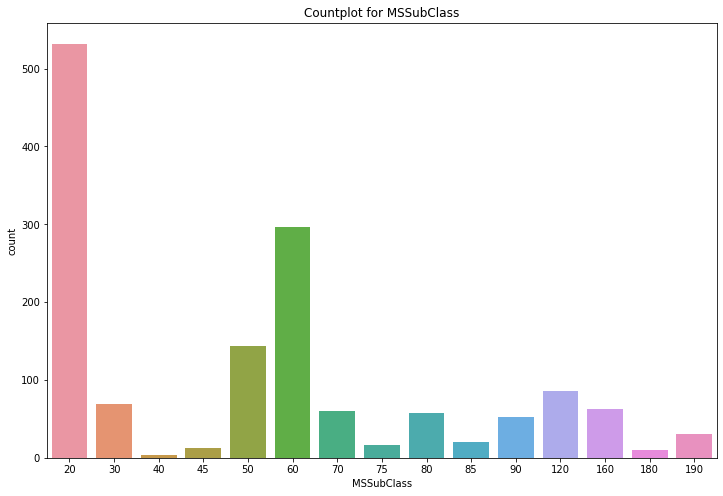

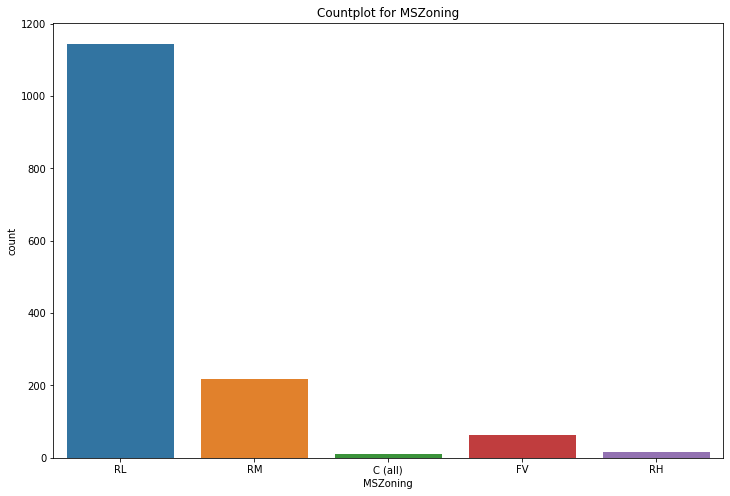

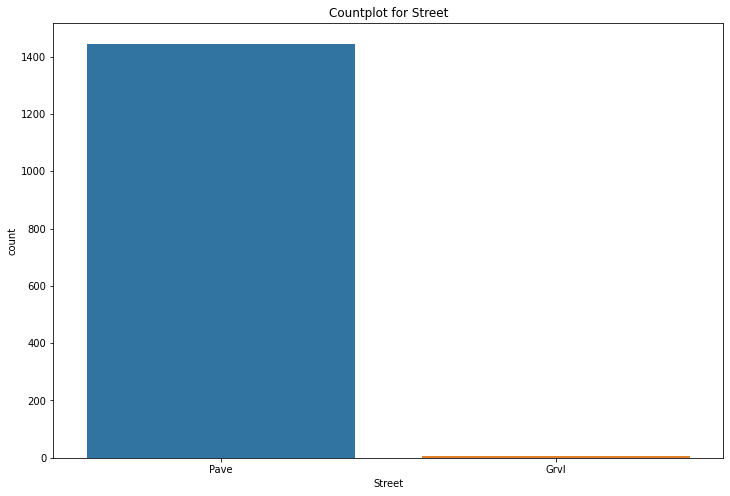

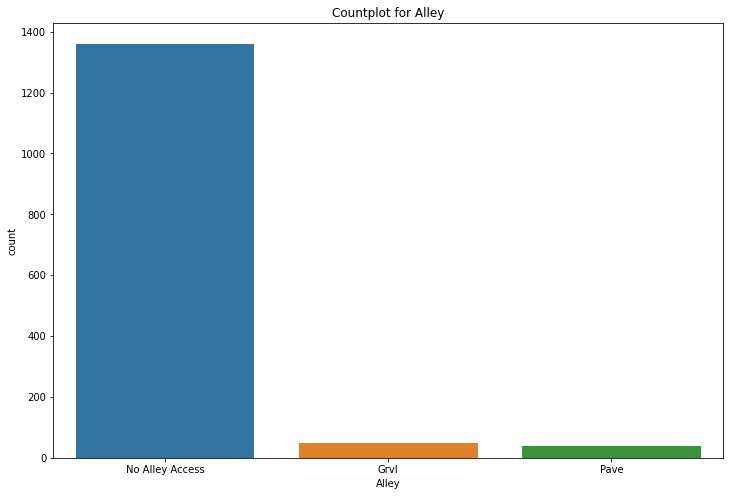

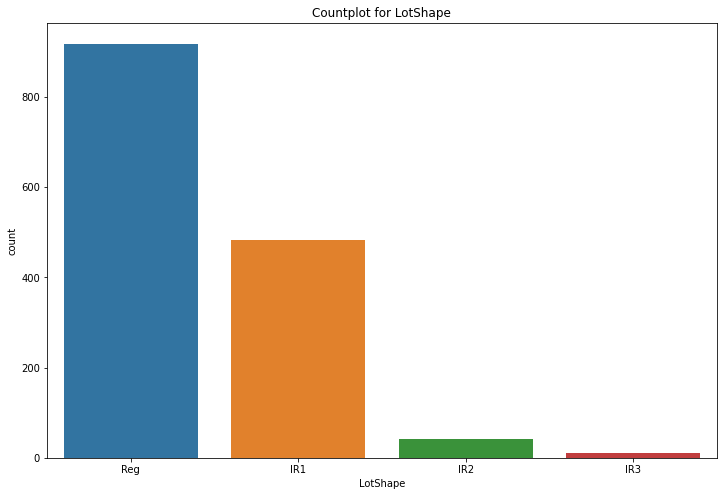

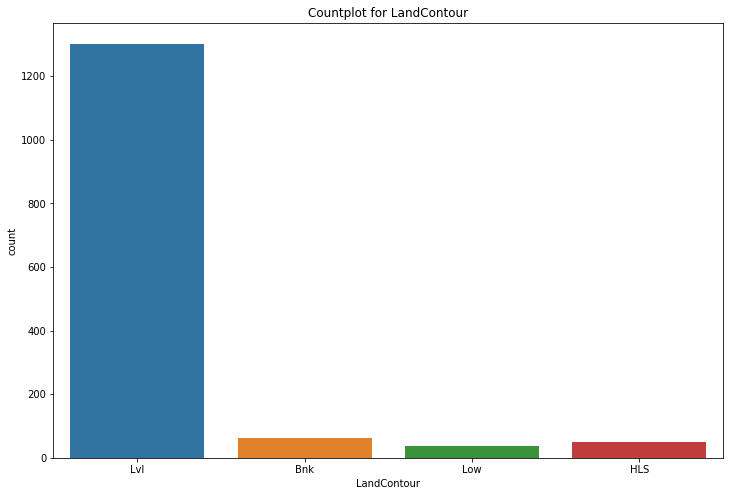

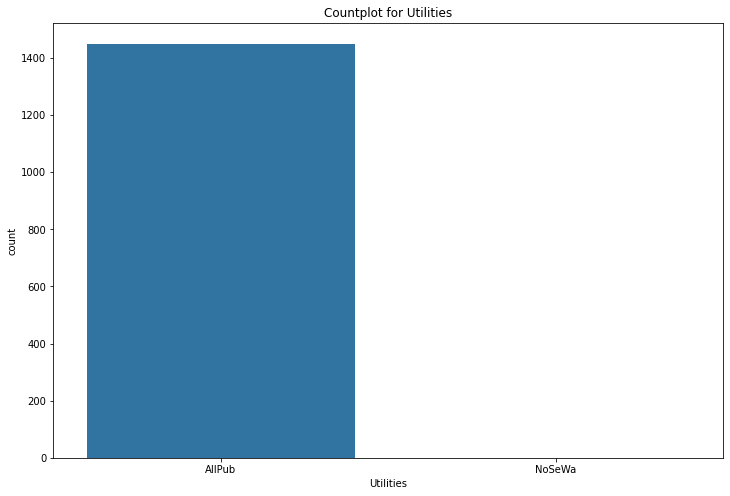

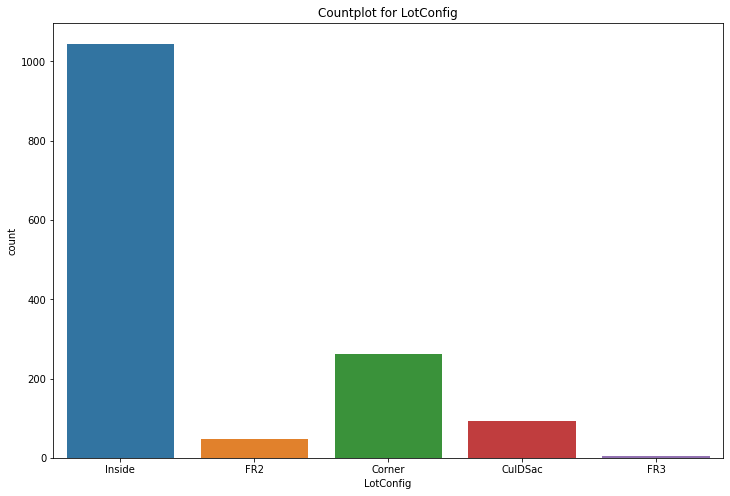

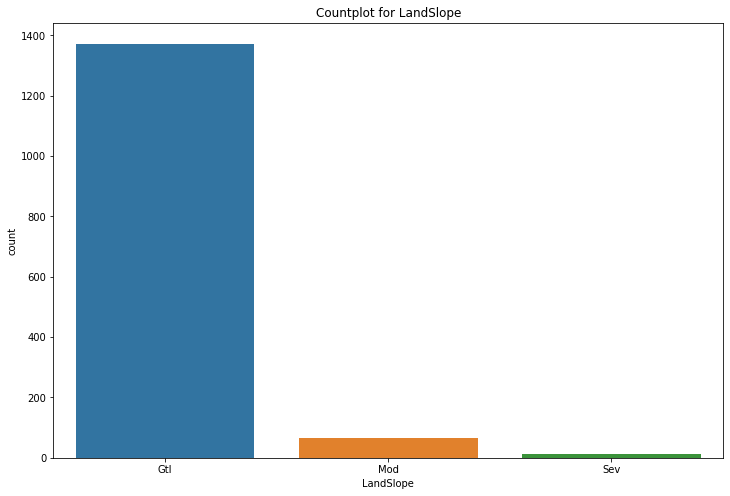

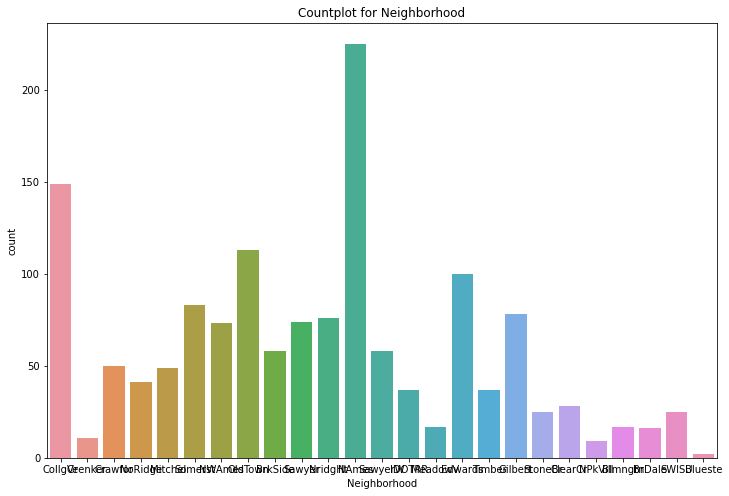

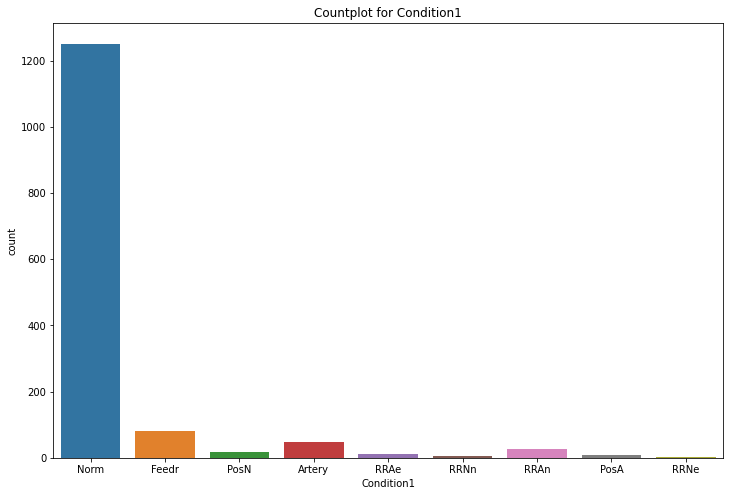

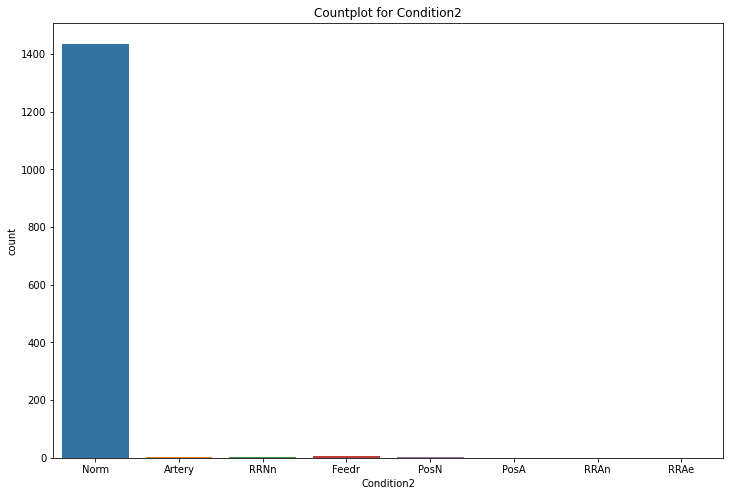

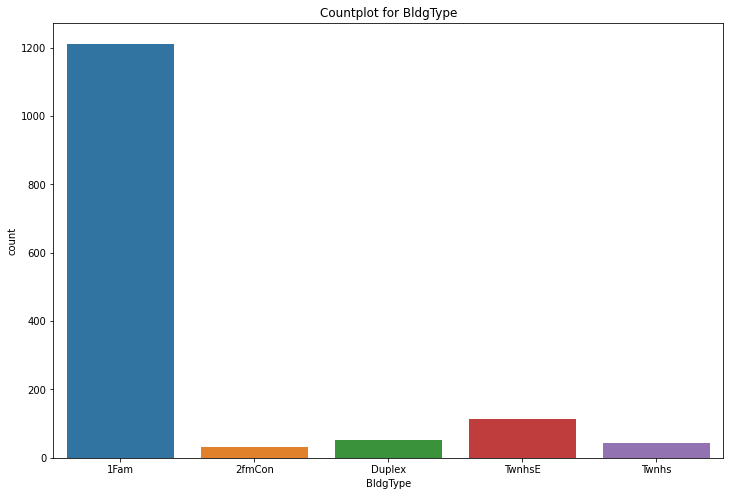

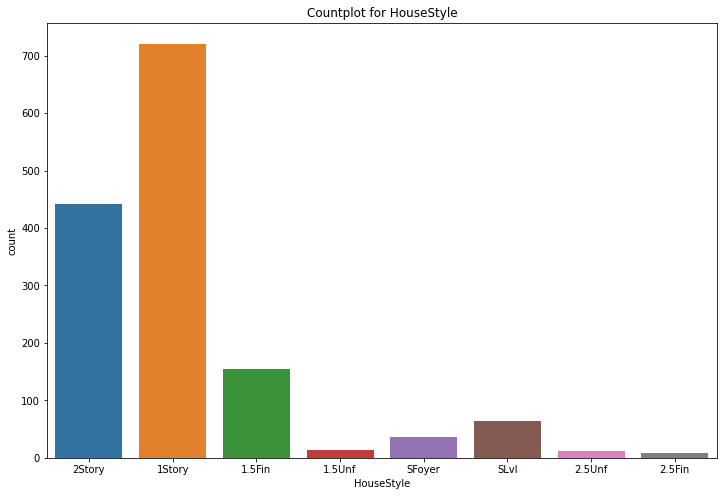

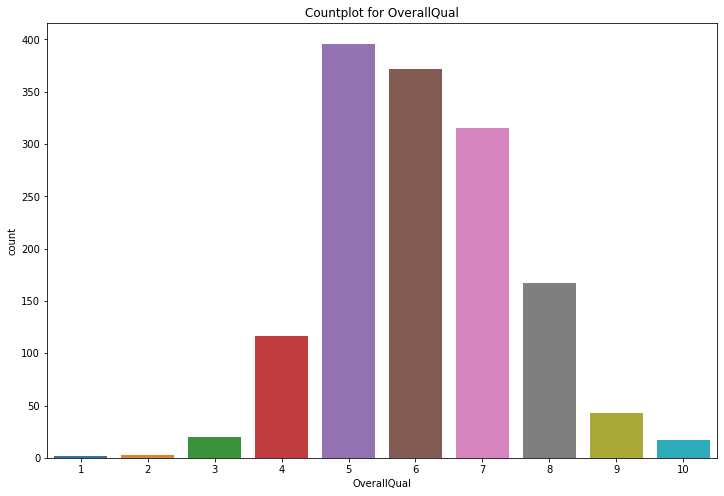

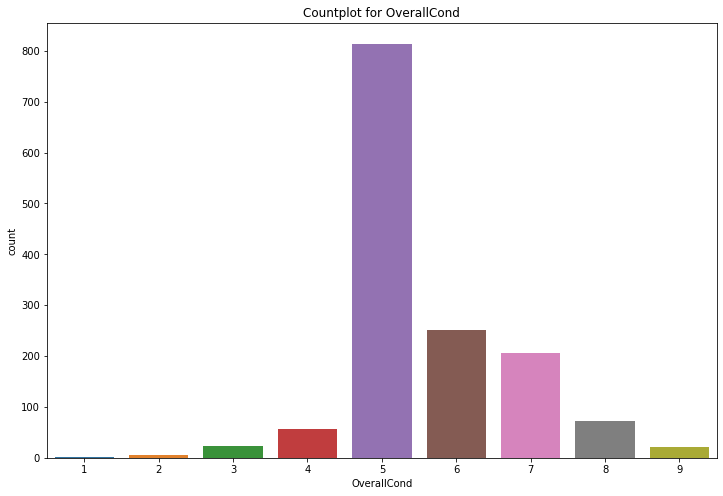

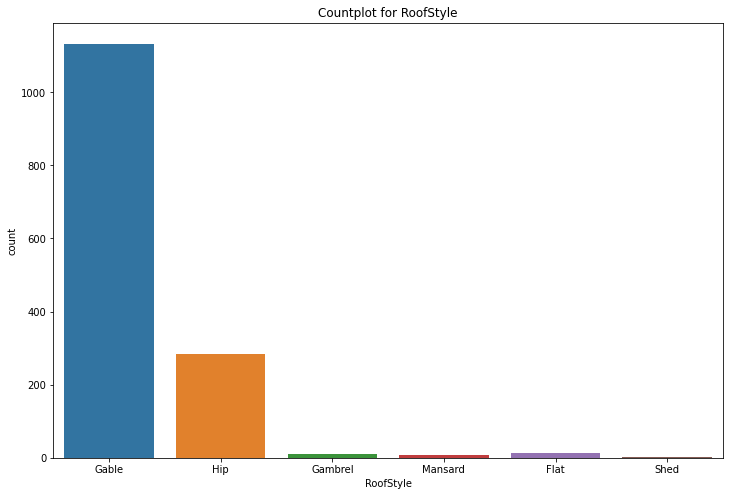

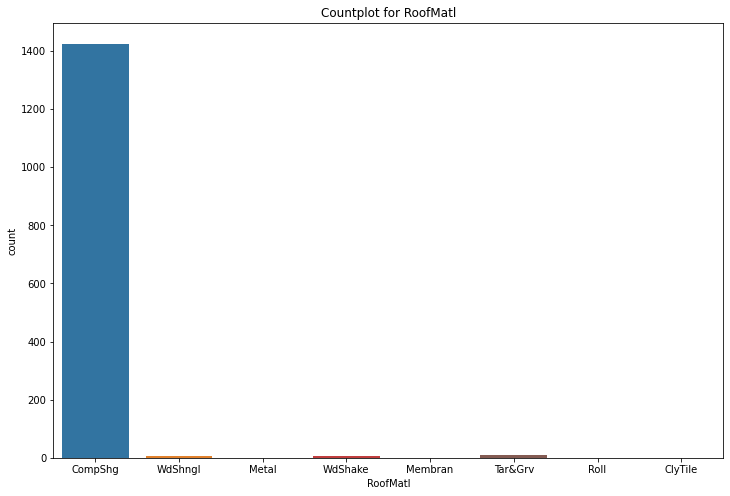

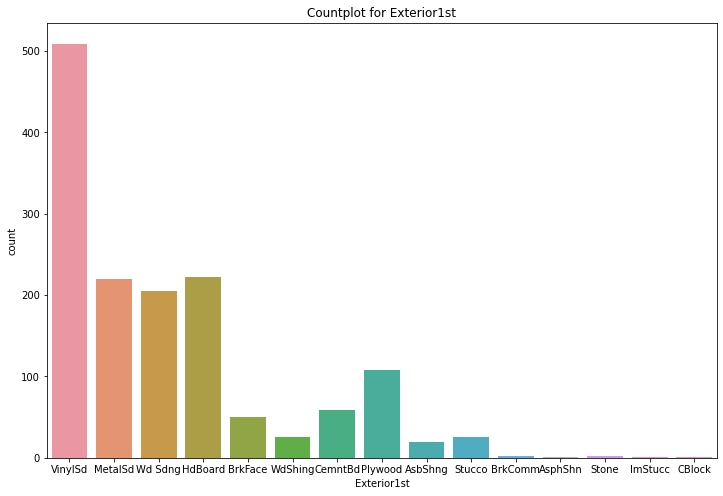

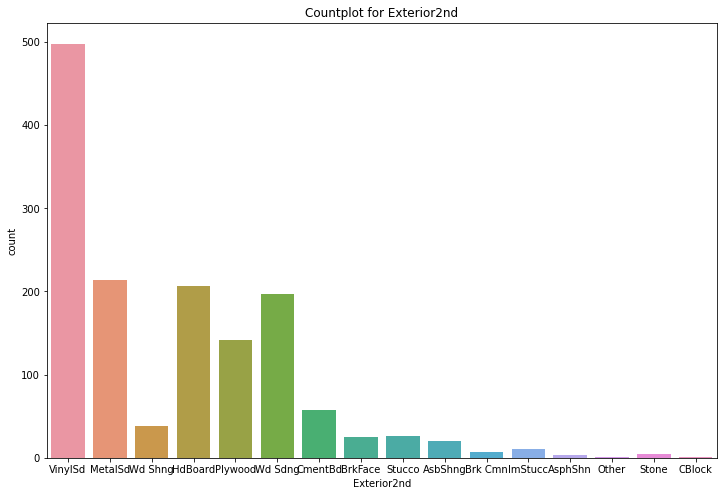

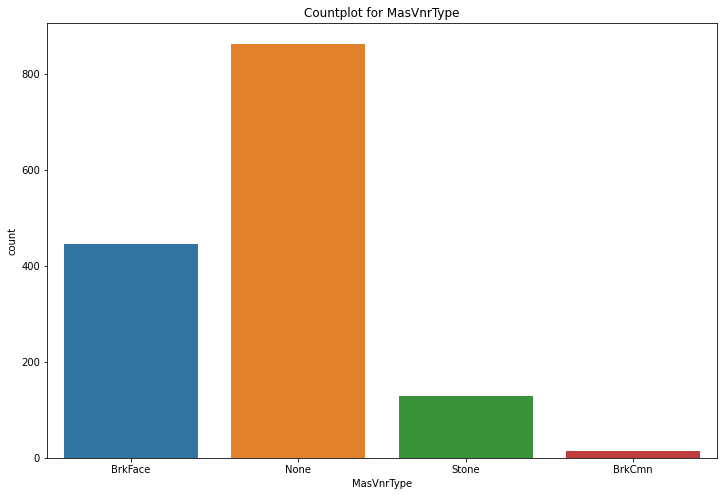

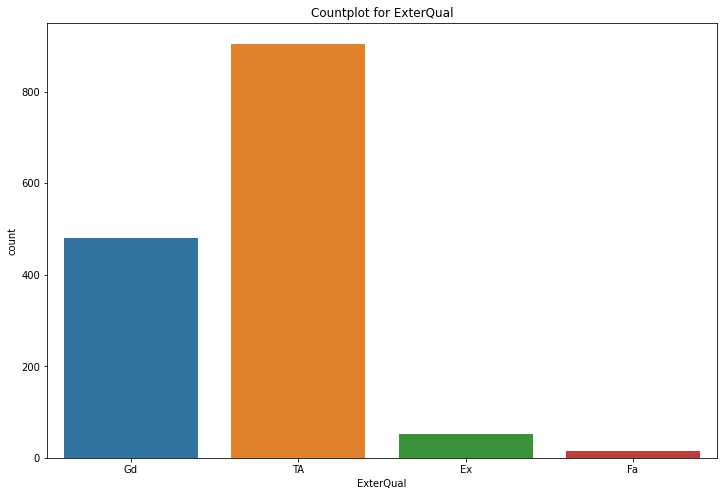

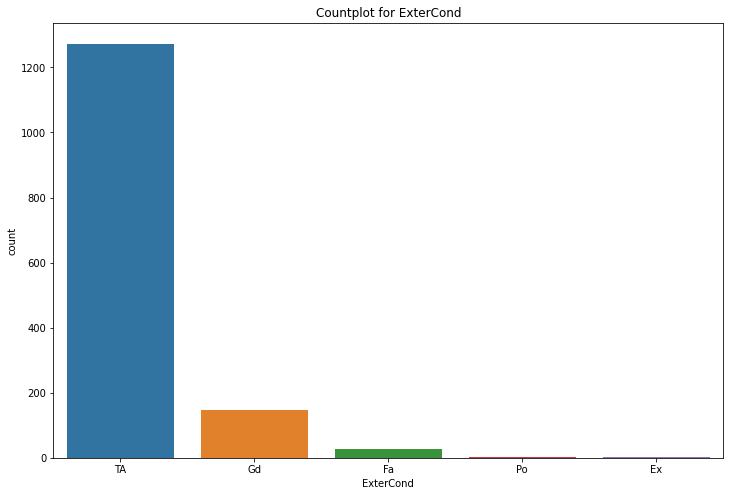

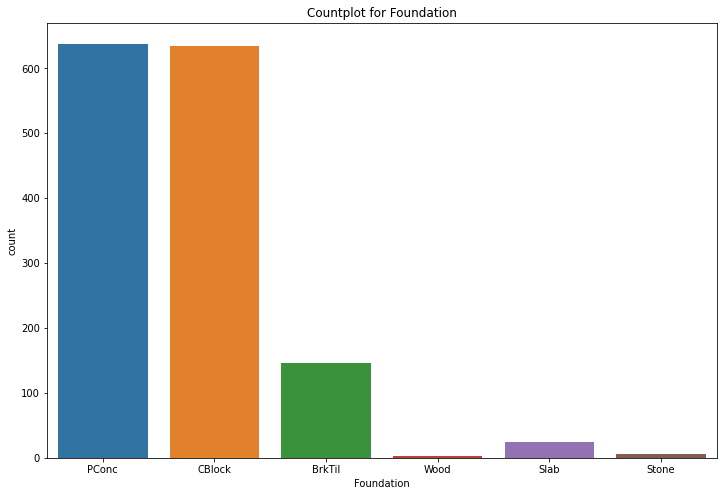

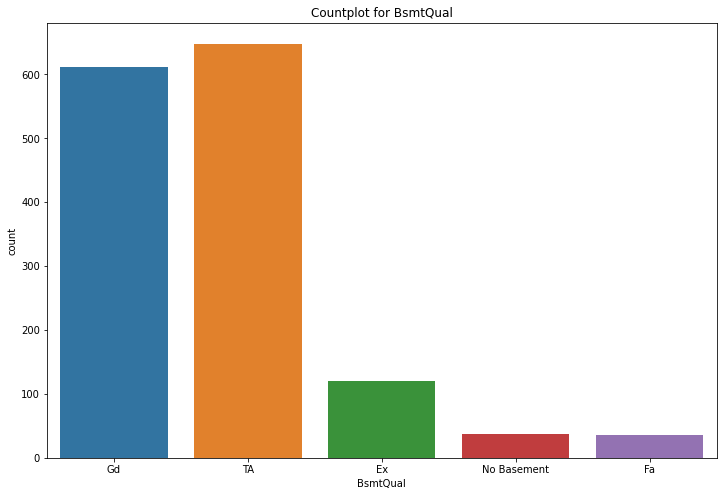

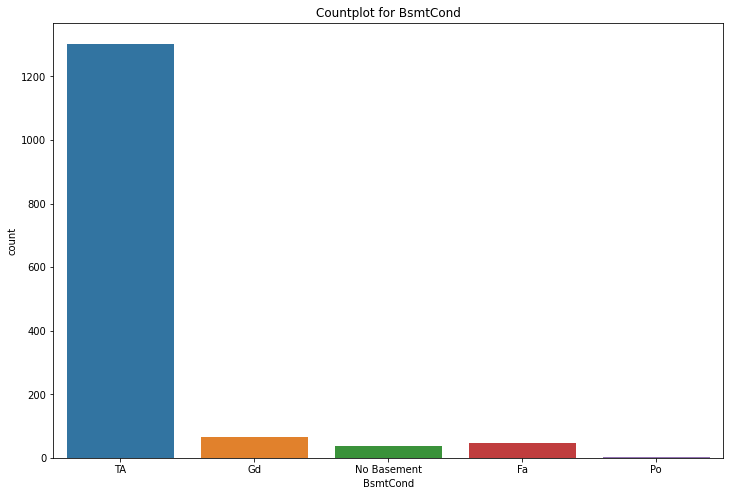

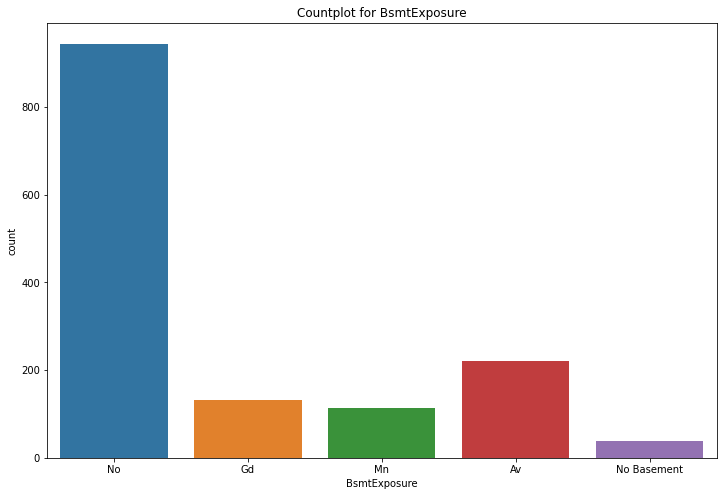

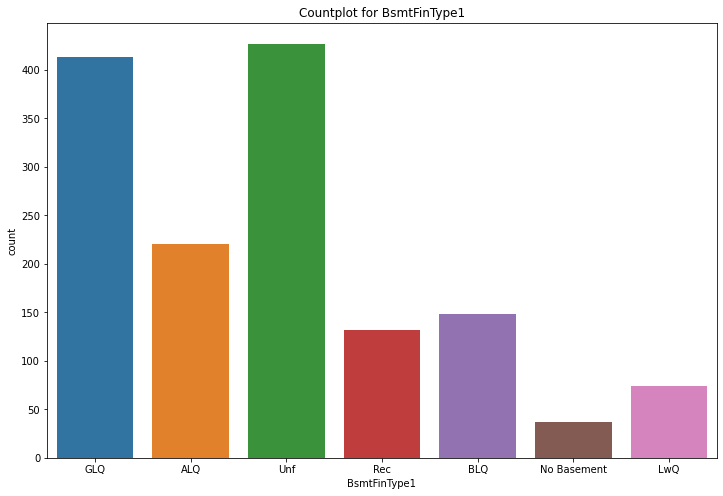

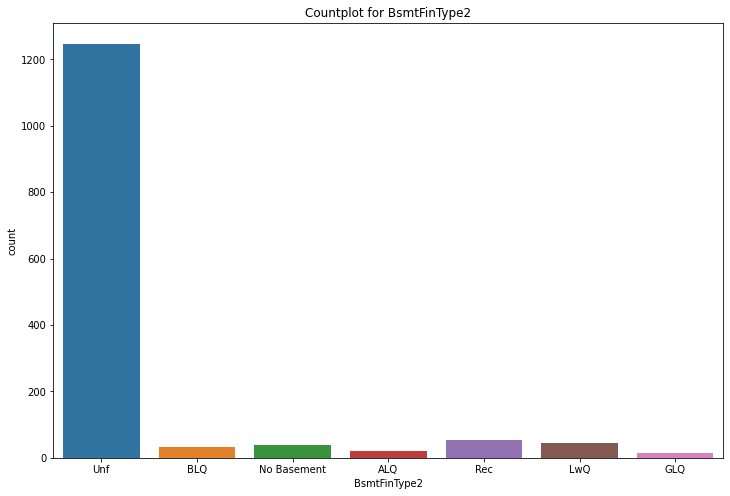

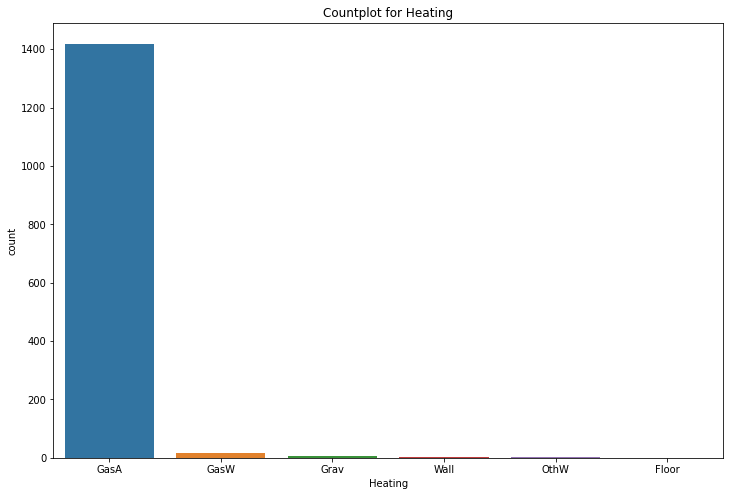

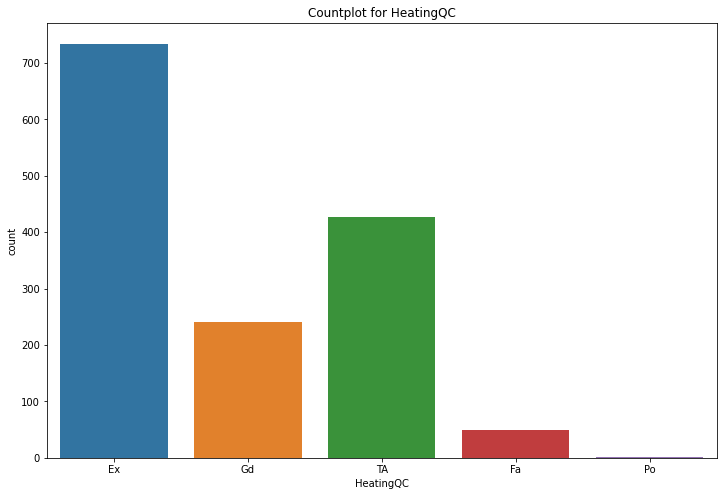

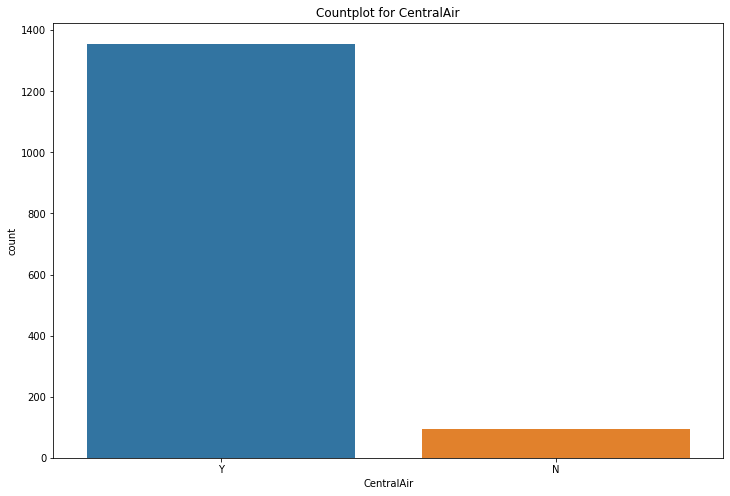

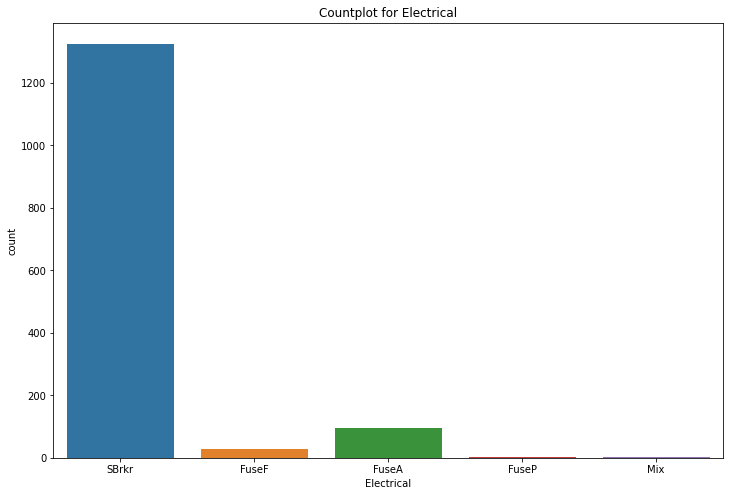

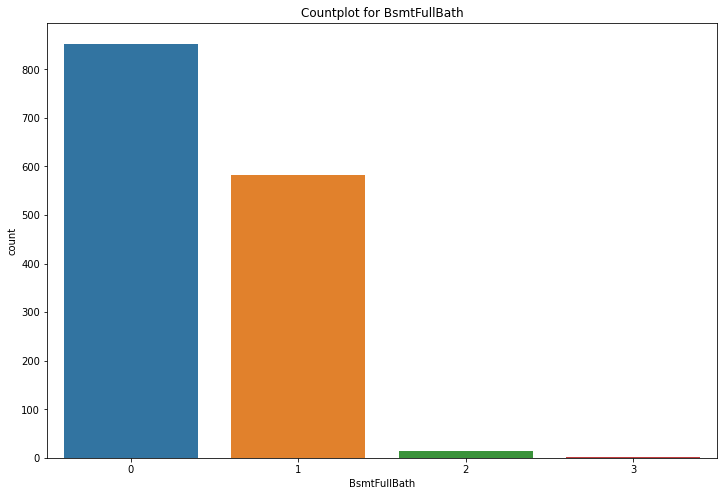

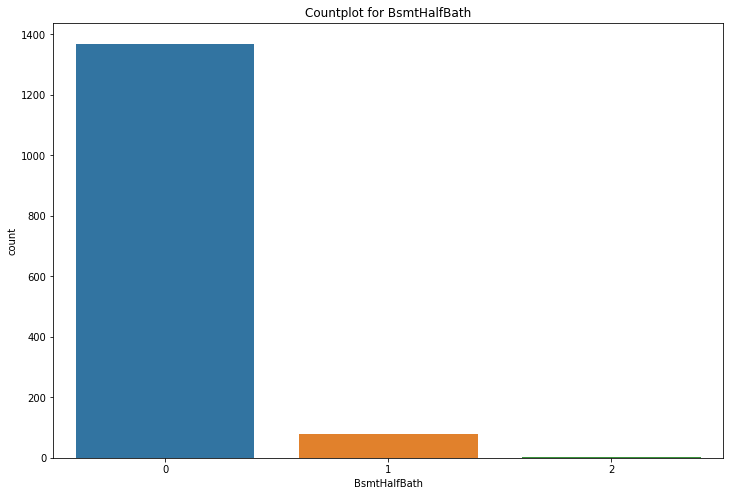

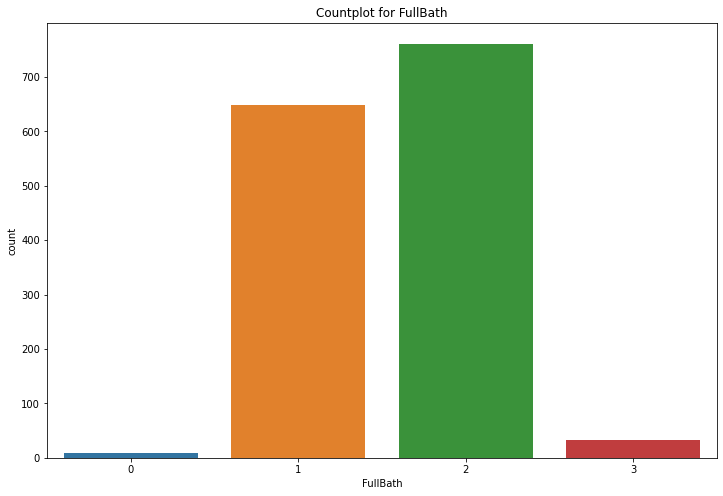

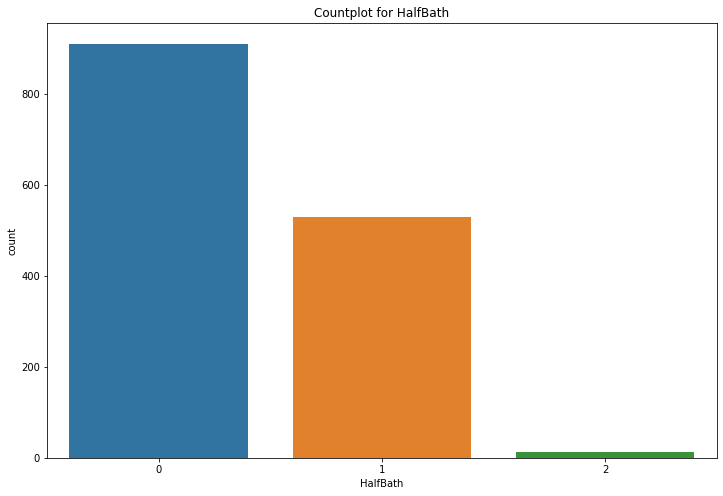

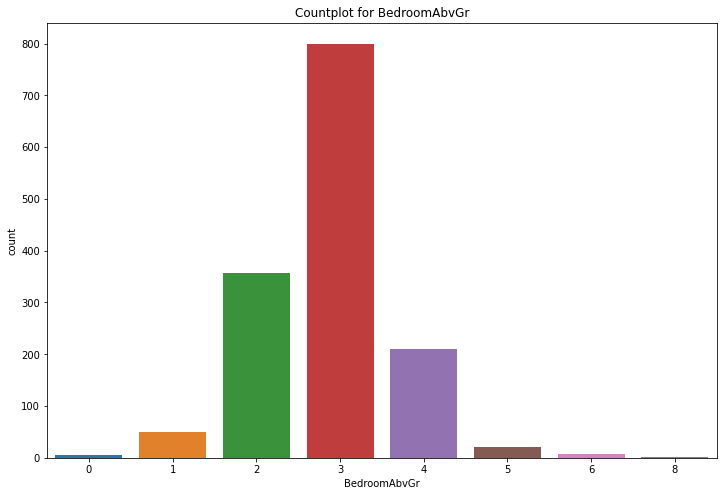

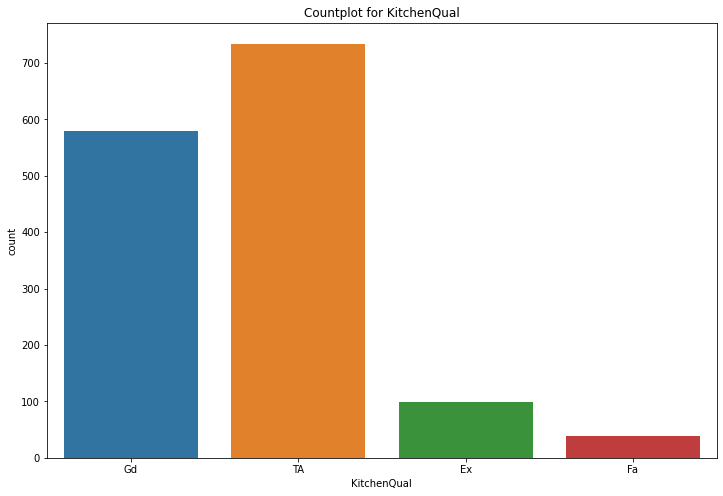

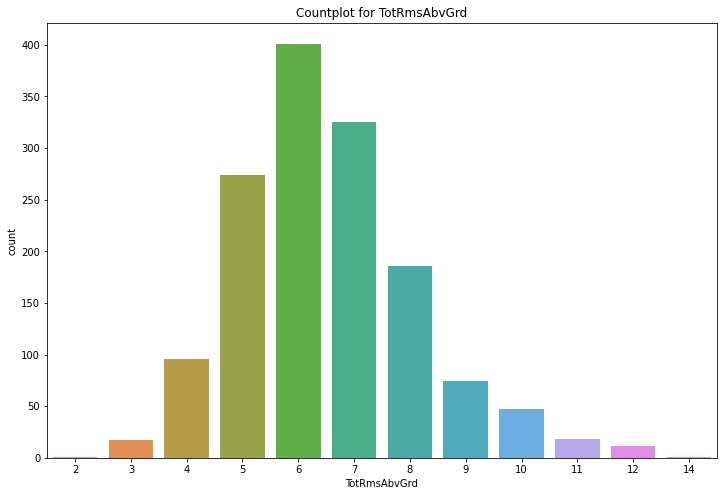

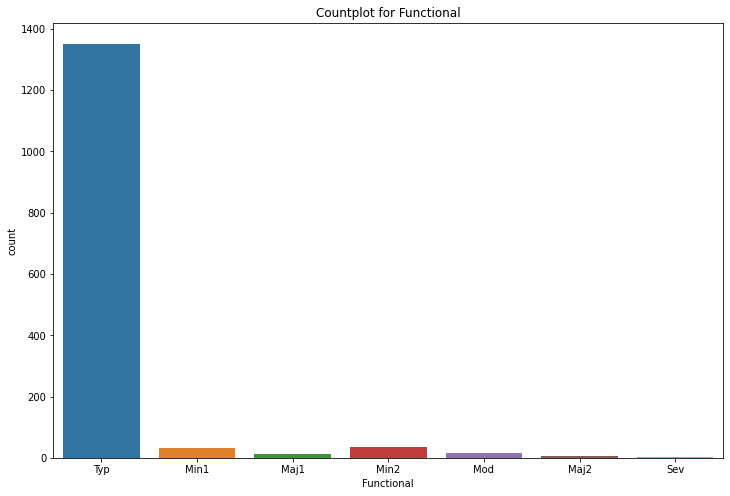

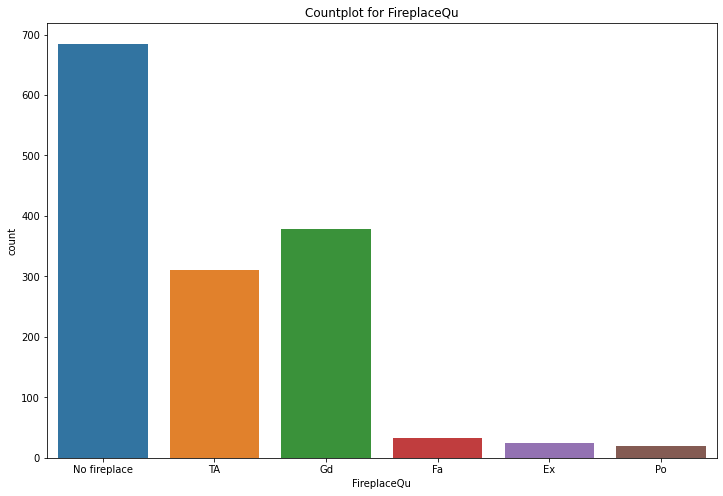

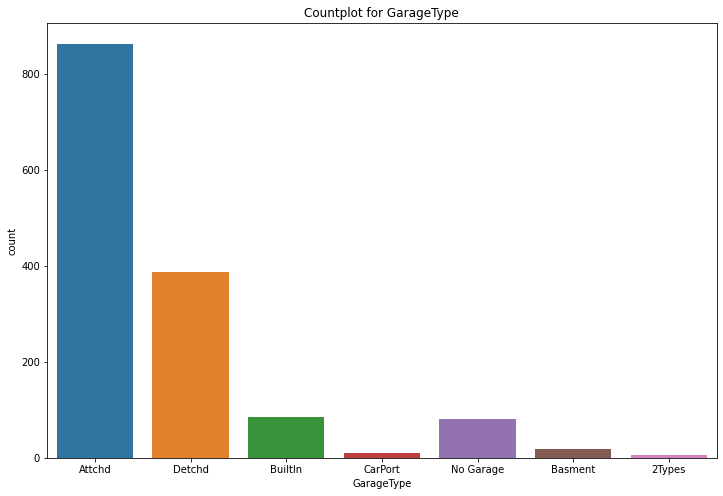

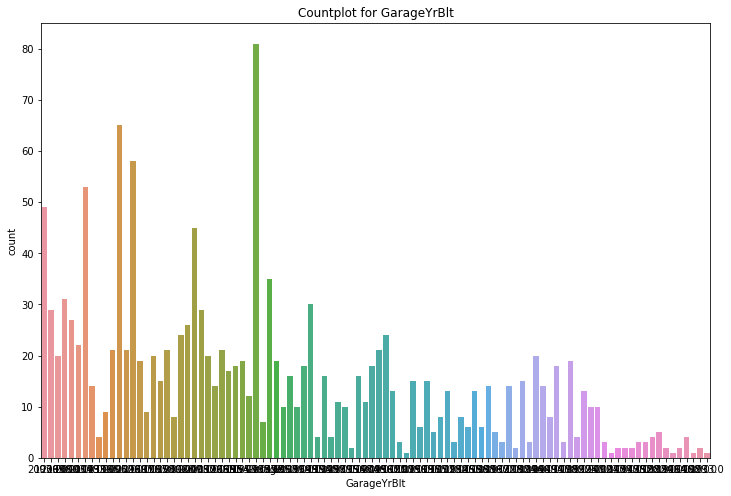

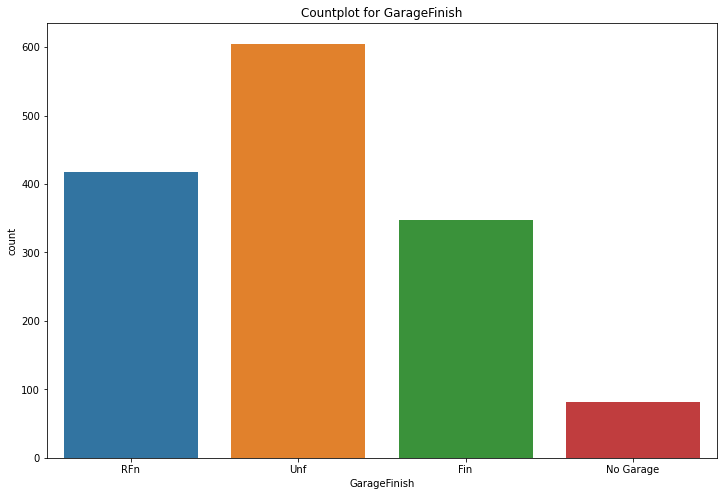

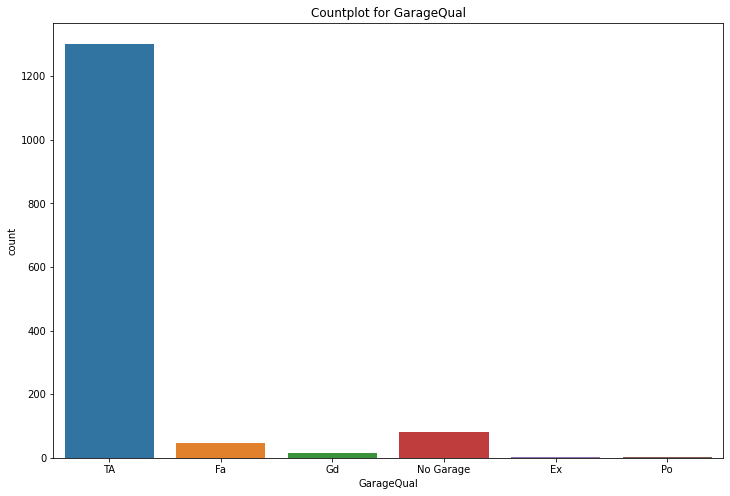

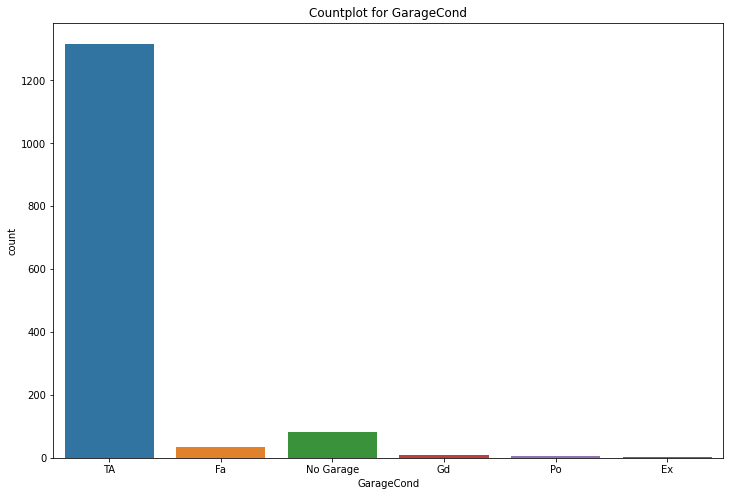

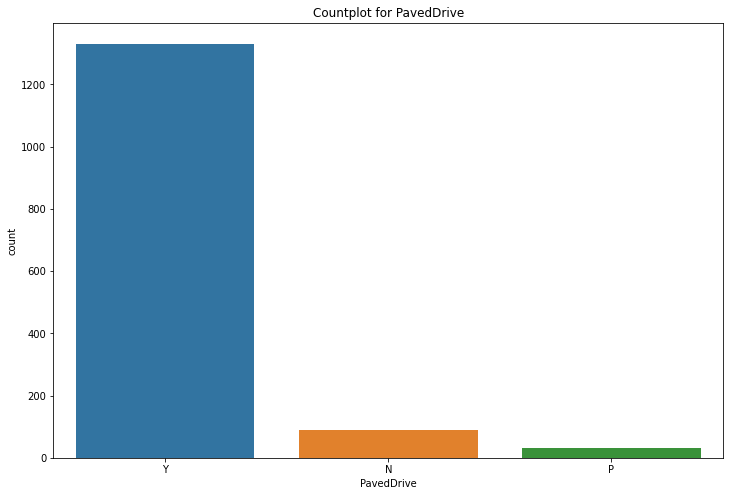

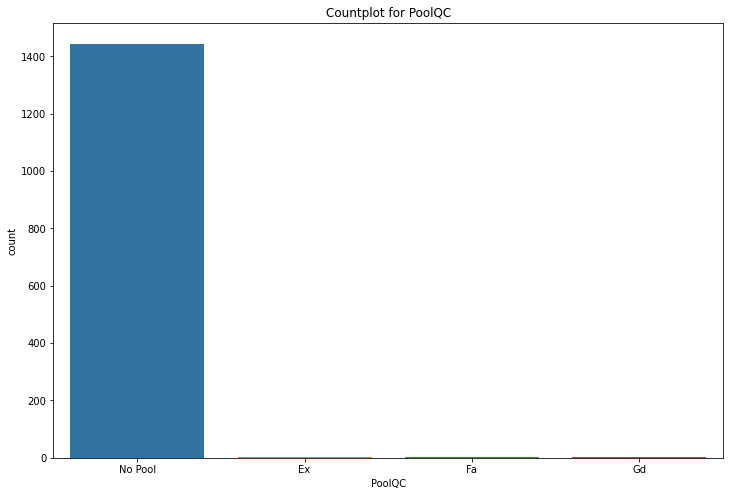

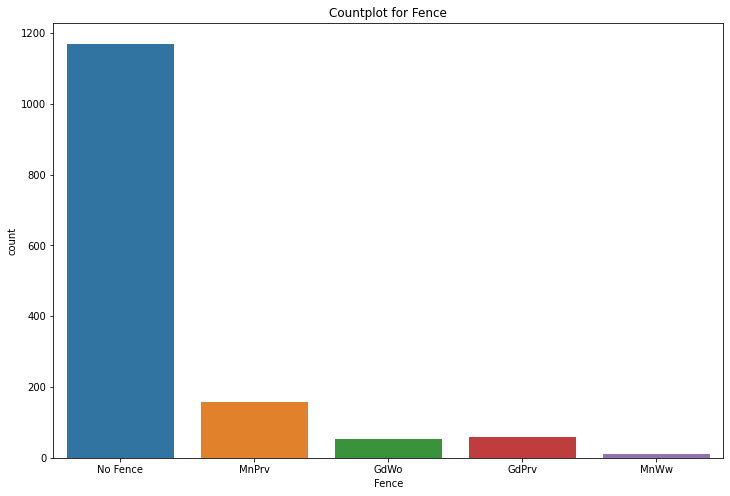

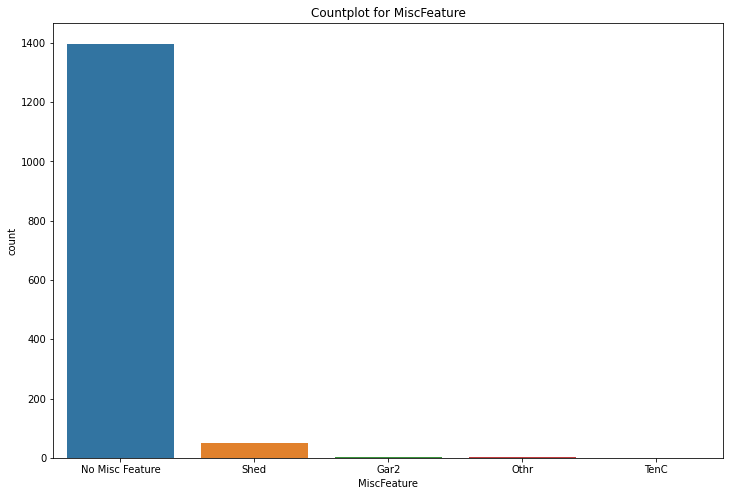

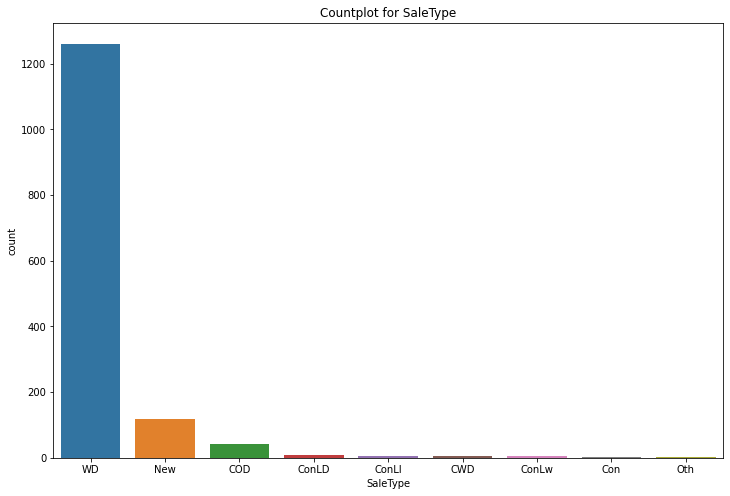

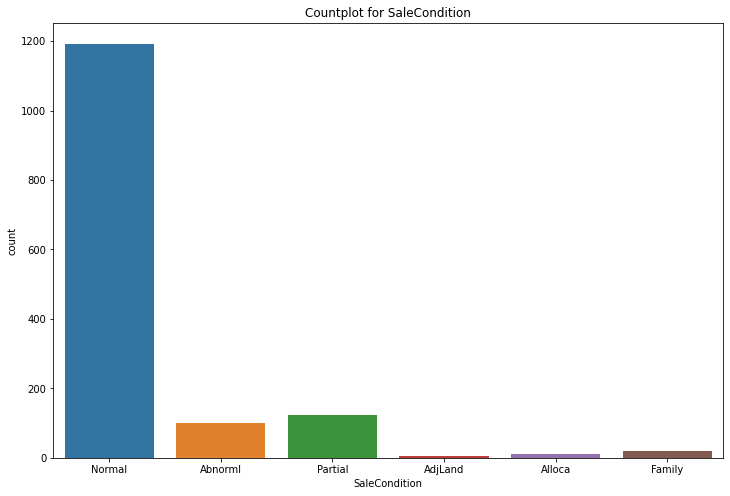

In [23]:
#### create a count plot for the following categories
for i in categorical_cols:
    plt.figure(figsize=(12,8))
    plt.title(f'Countplot for {i}')
    sb.countplot(data=train_df,x=i)
    plt.show()

#### Observations:

1. Almost all categories are un equally distributed in general

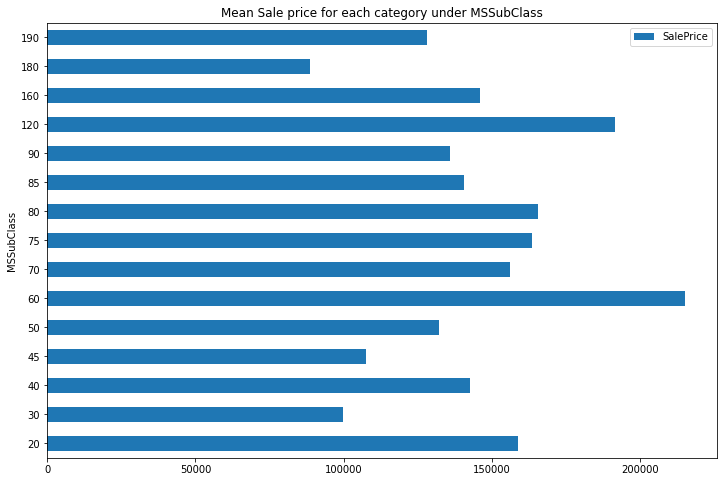

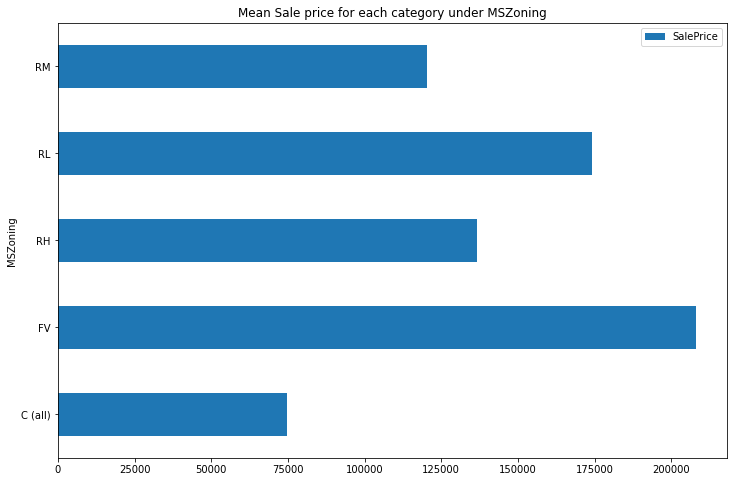

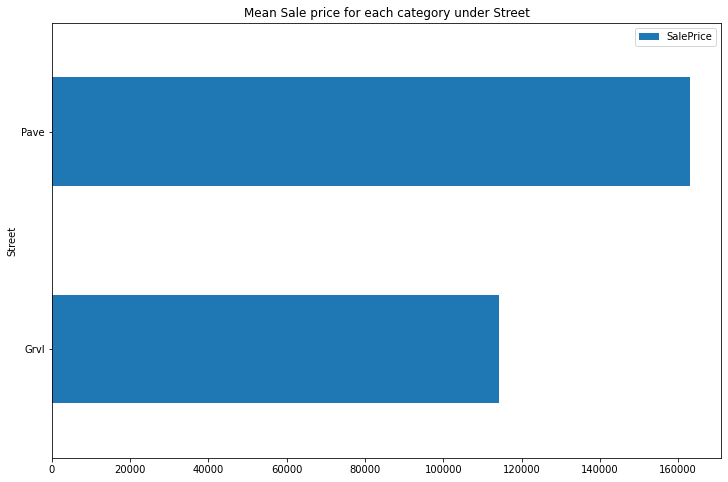

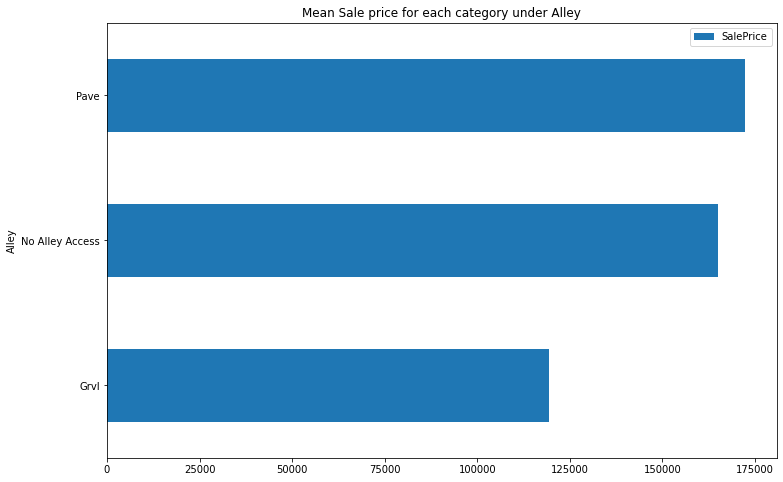

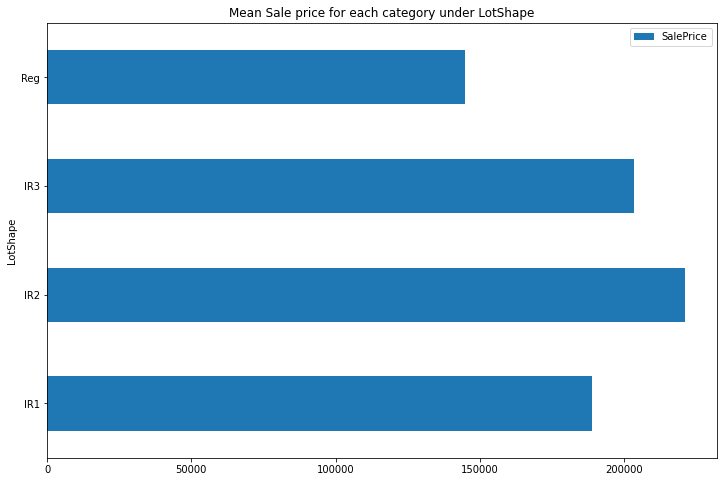

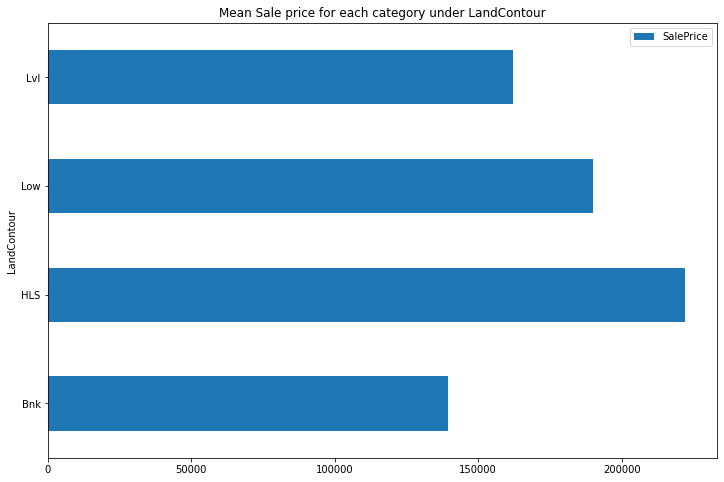

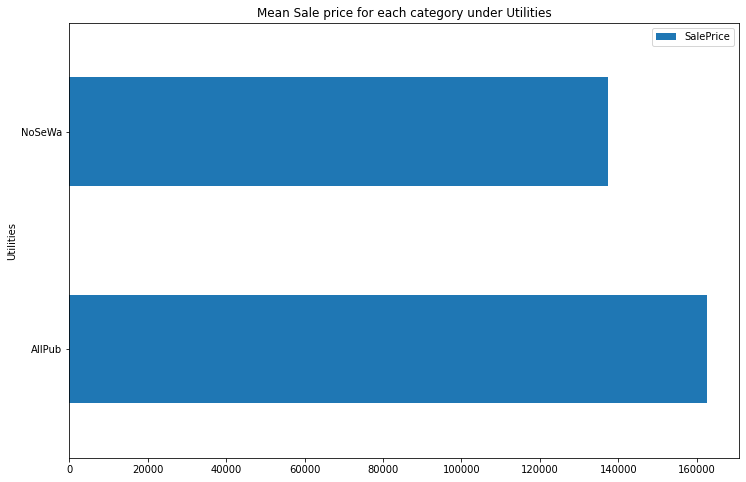

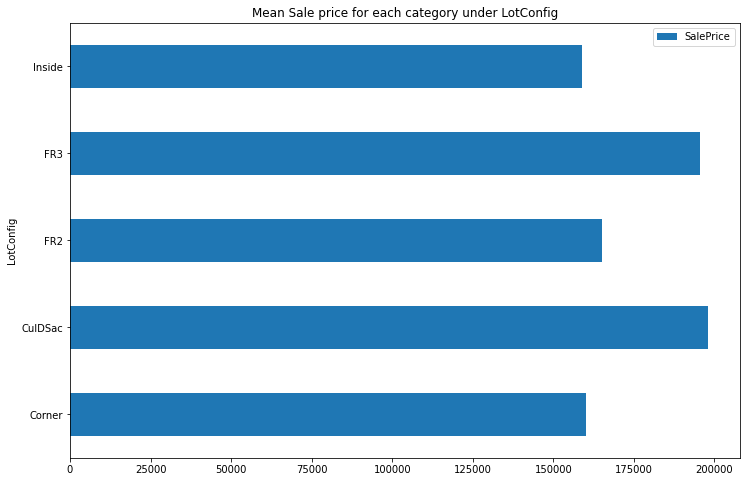

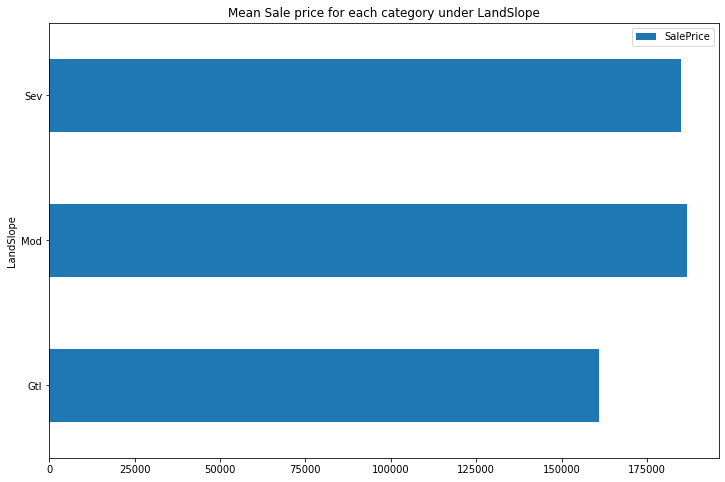

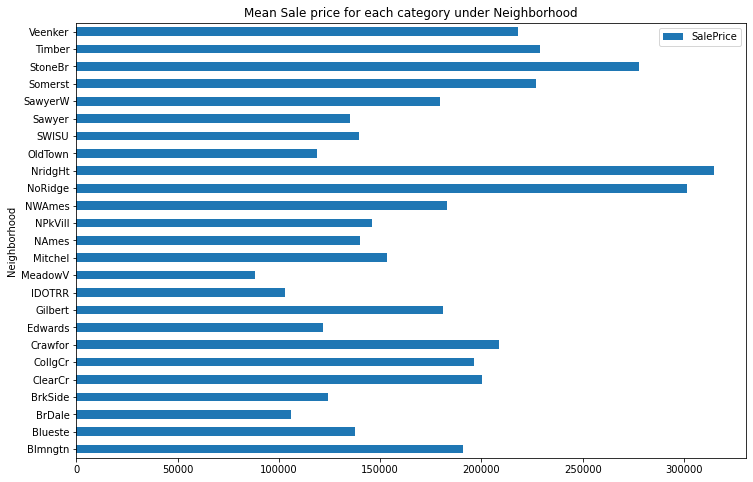

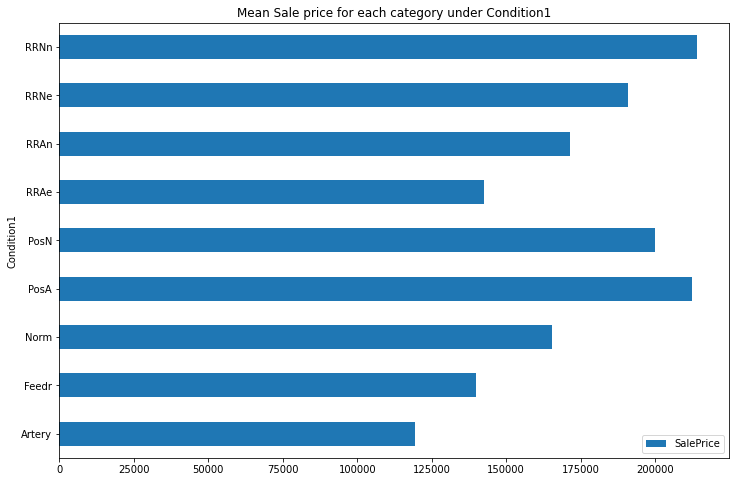

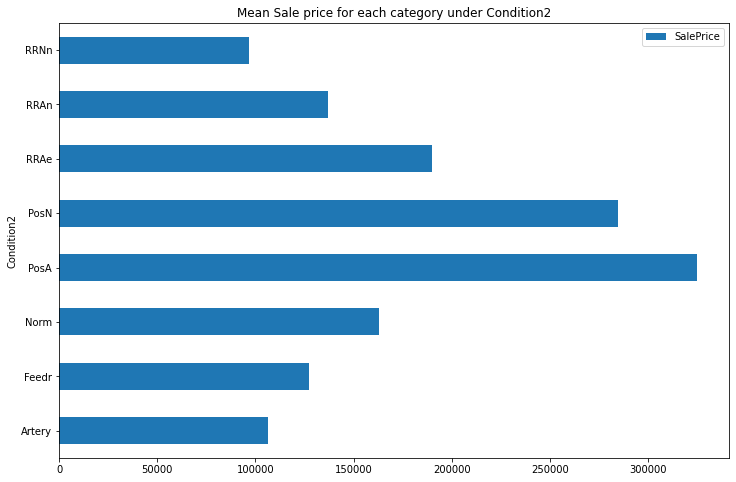

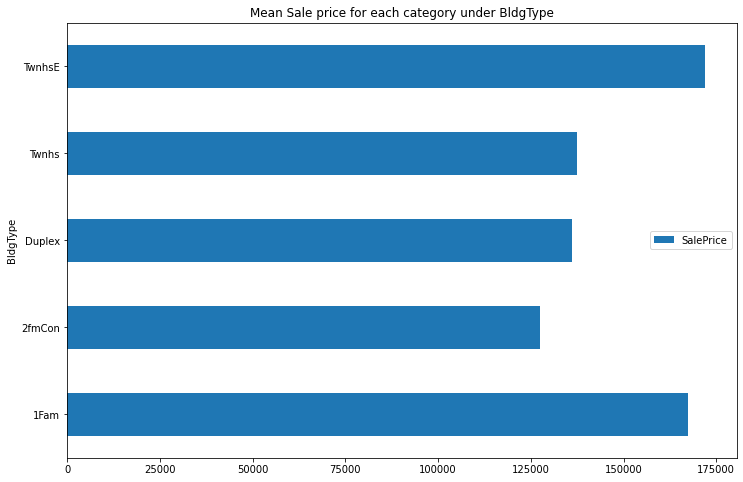

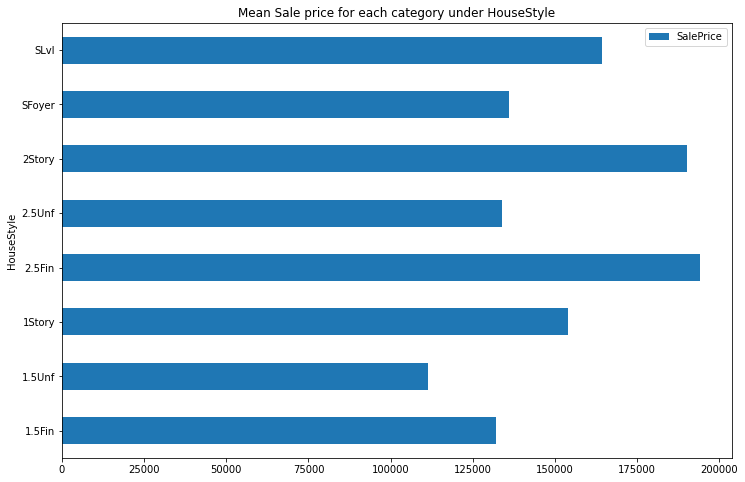

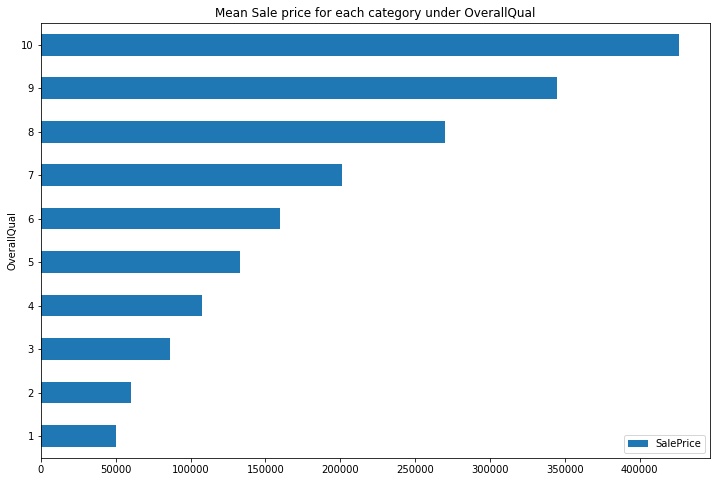

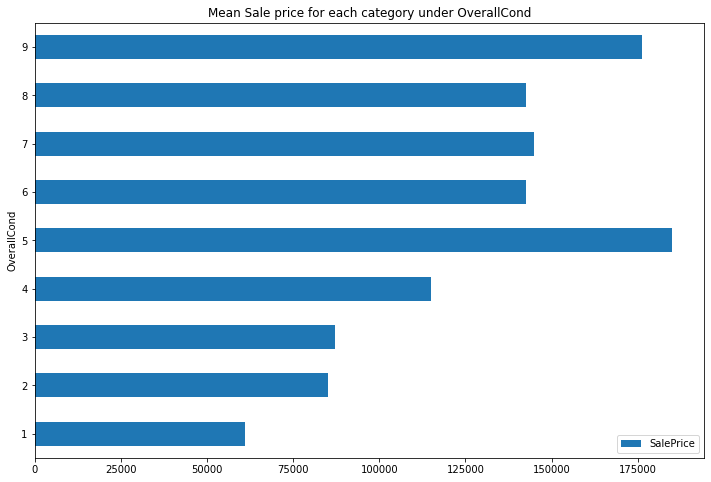

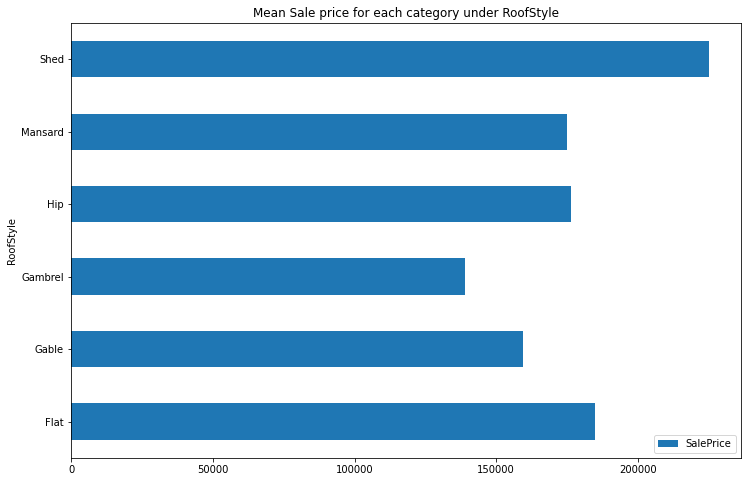

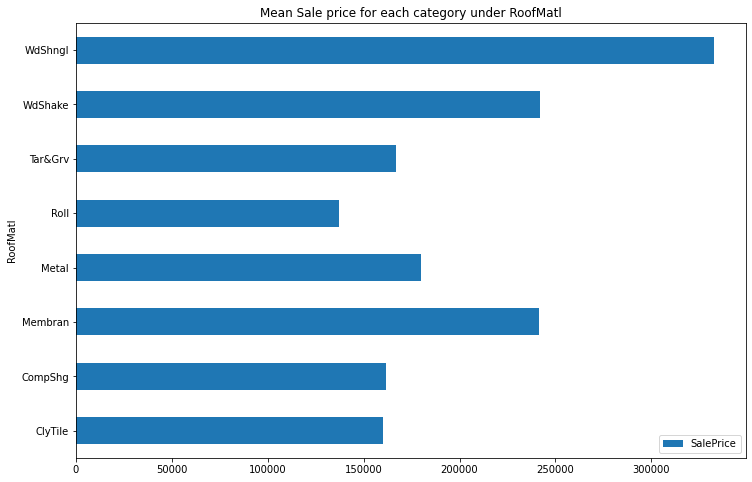

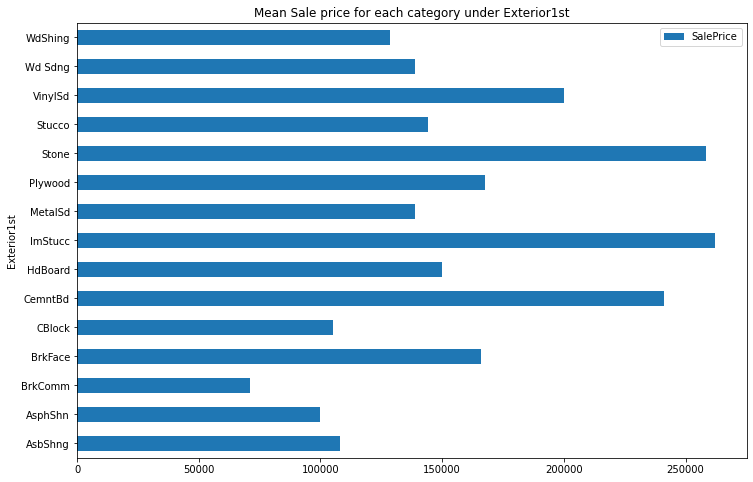

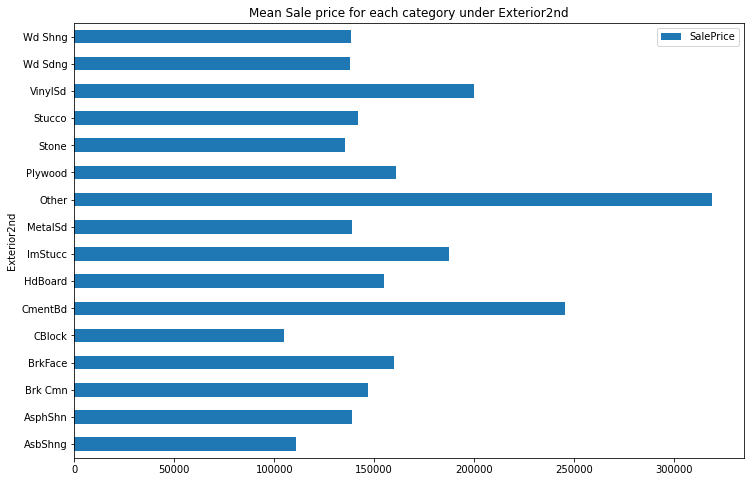

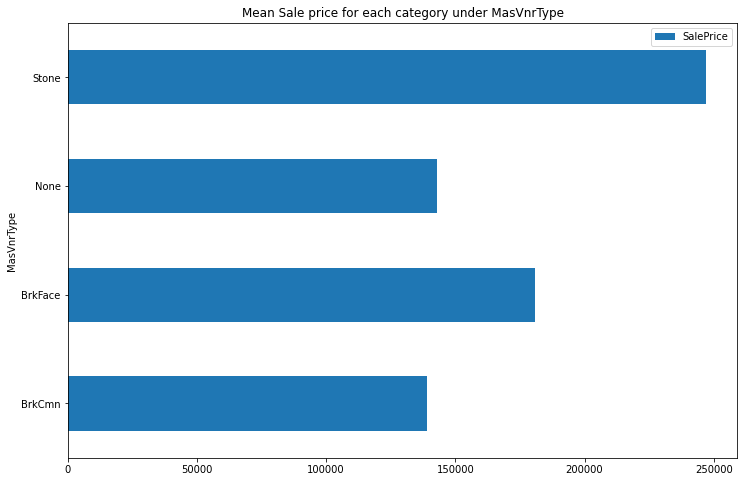

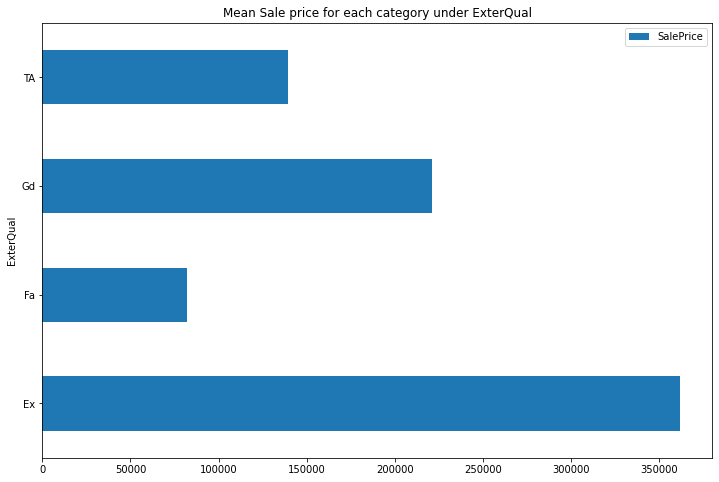

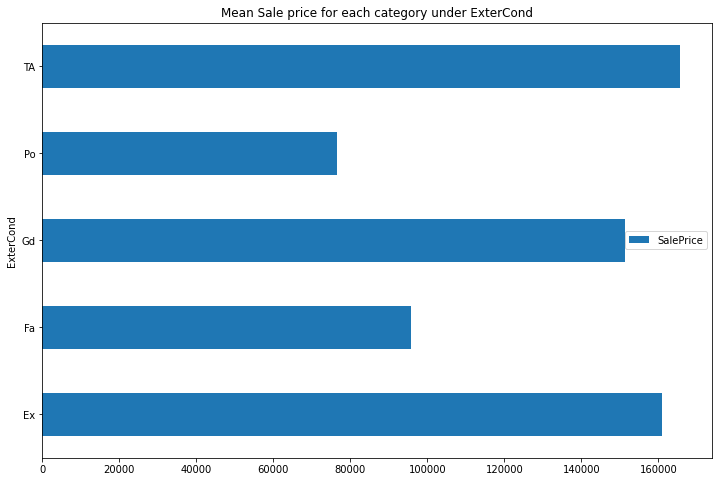

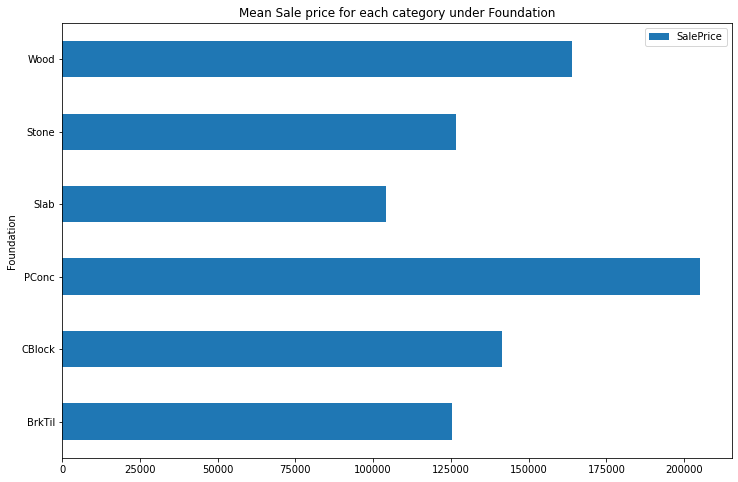

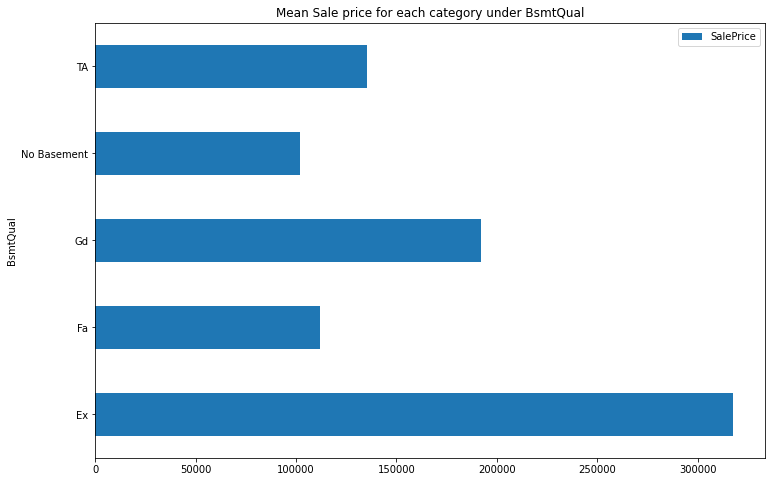

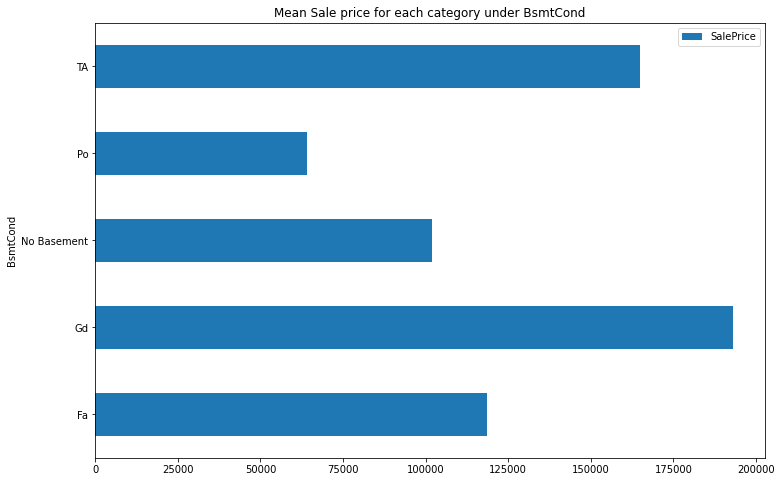

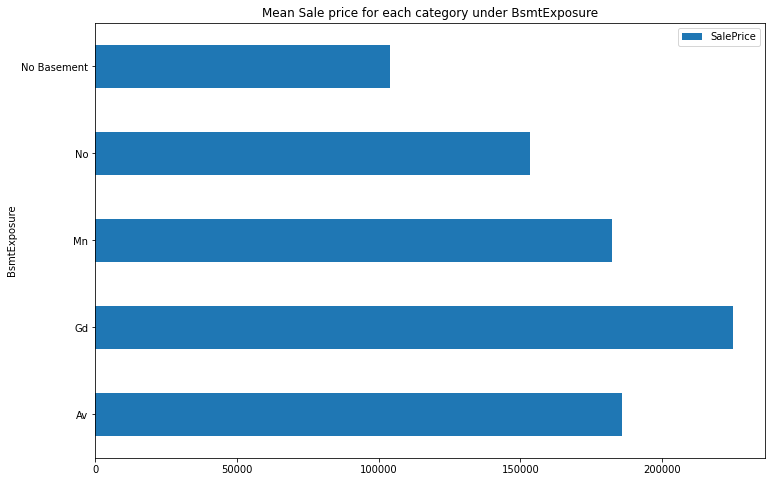

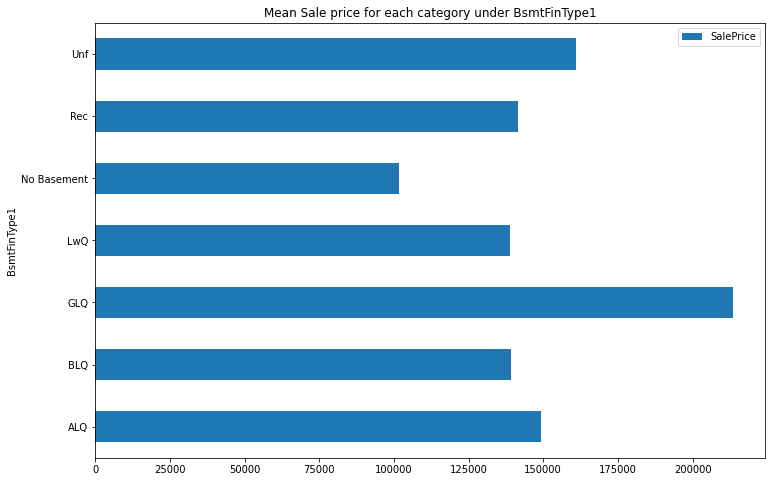

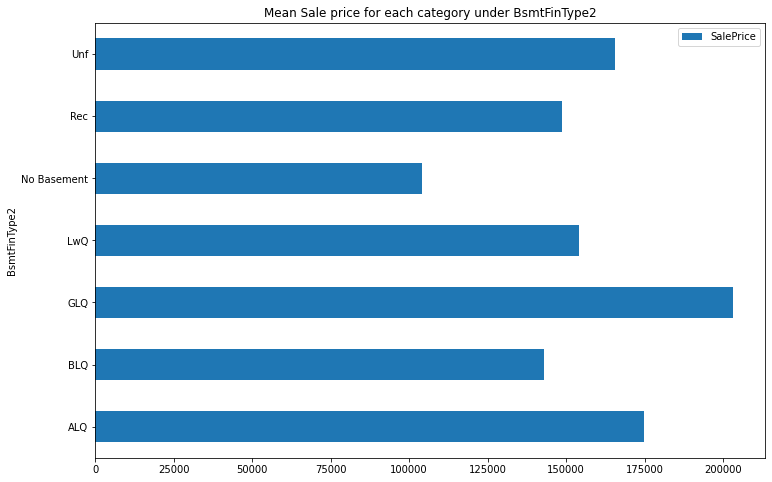

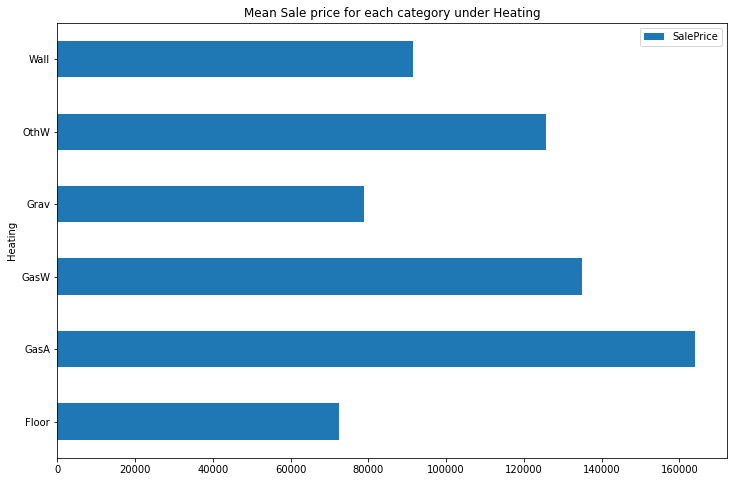

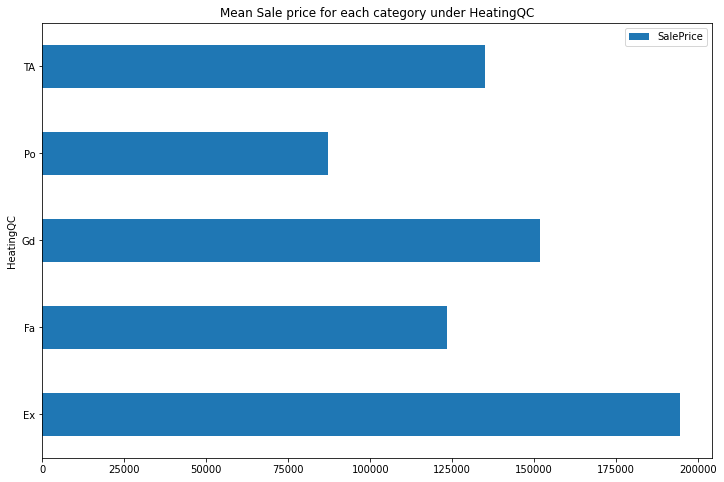

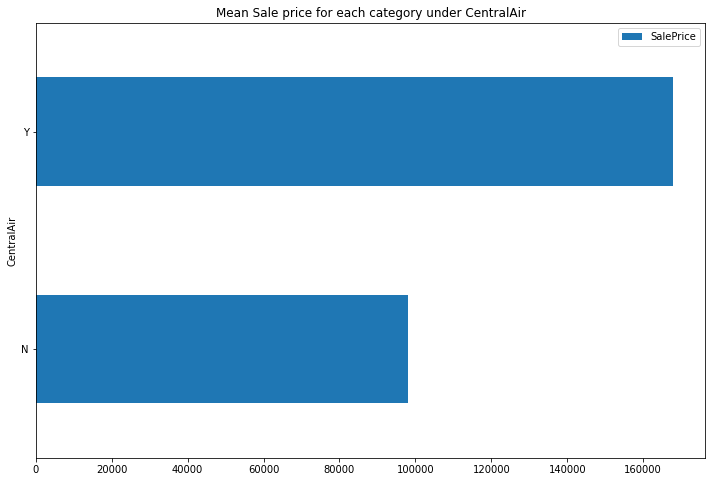

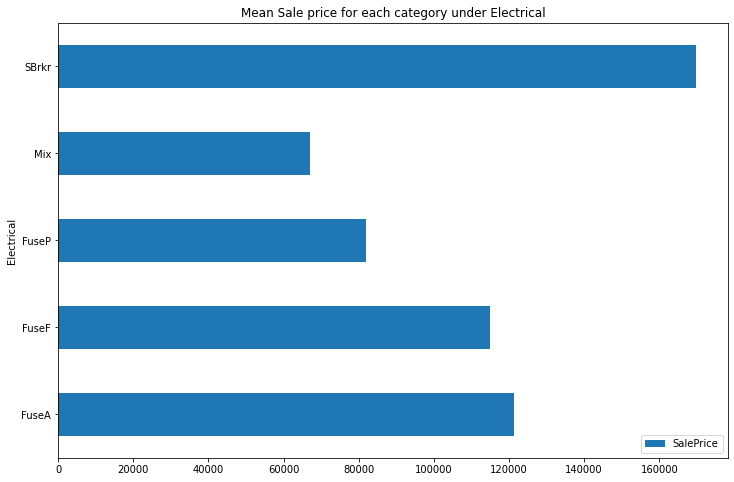

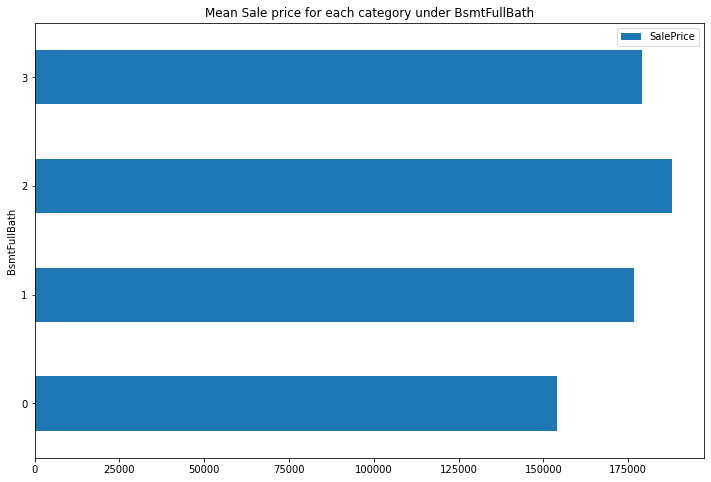

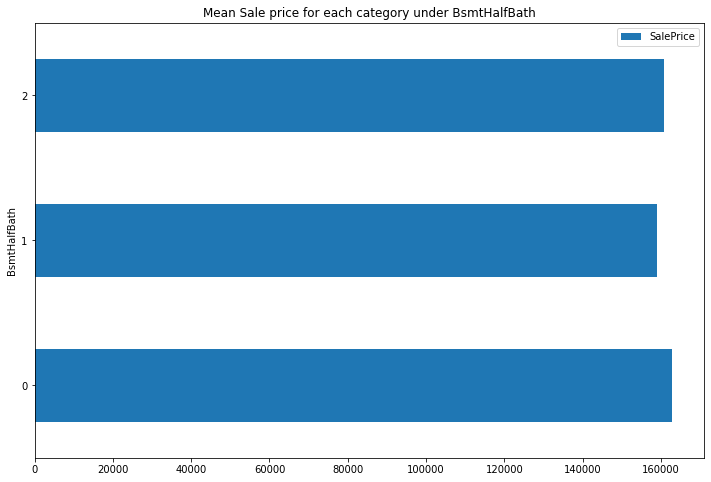

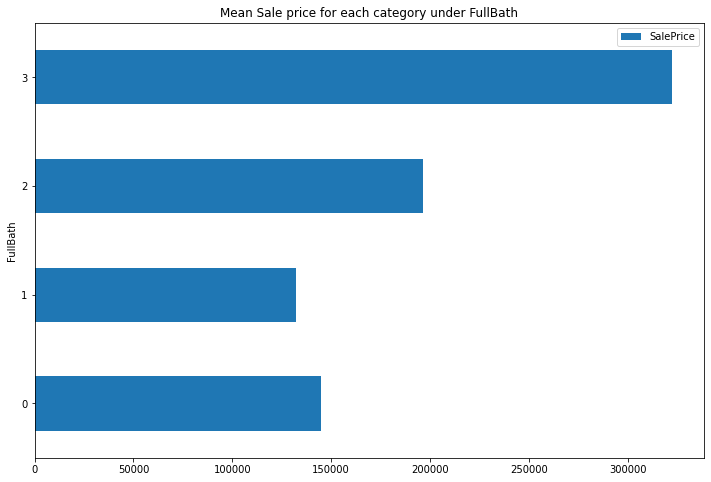

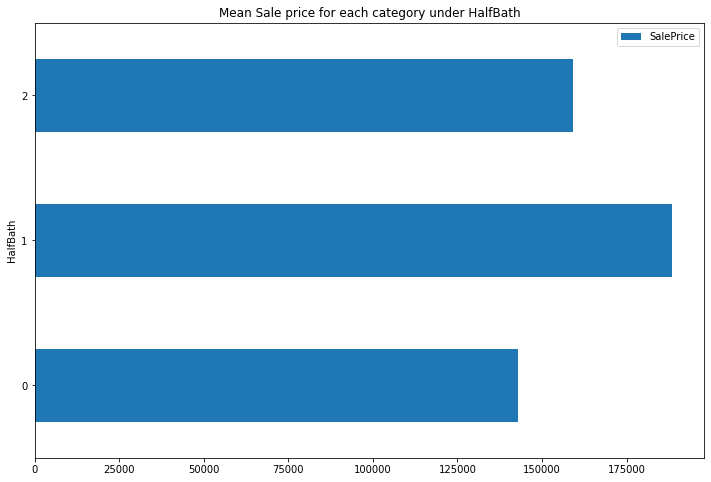

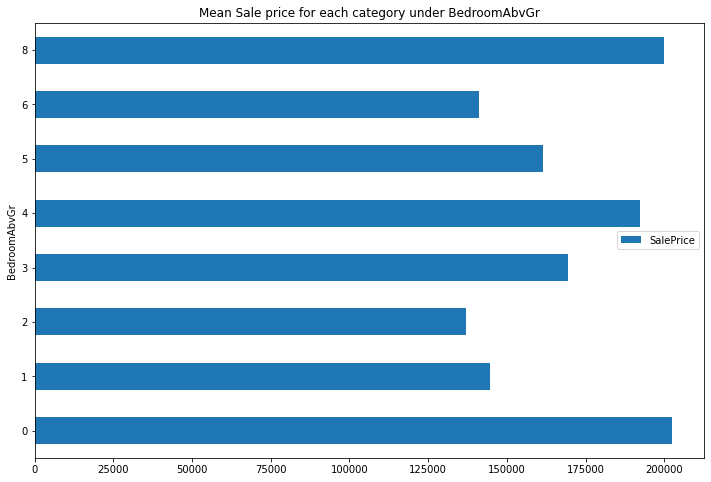

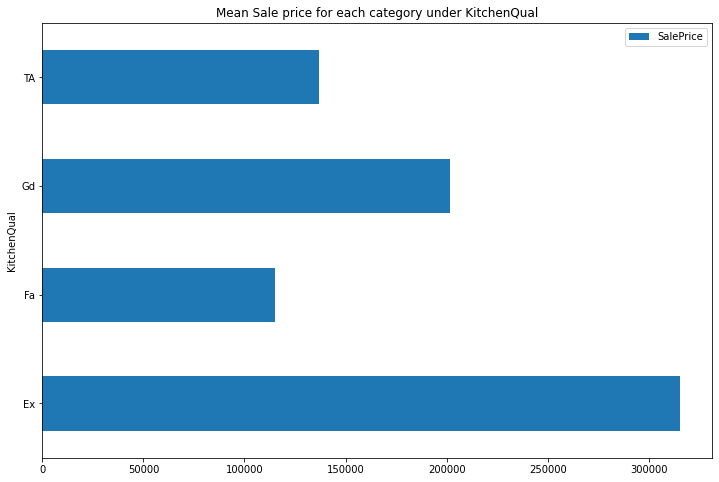

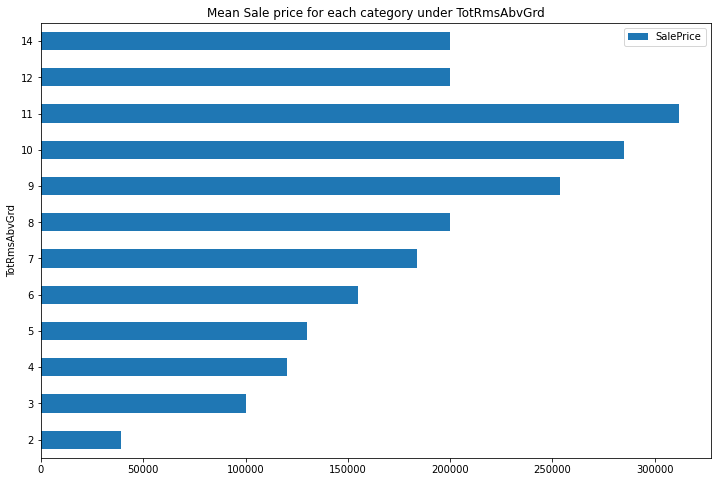

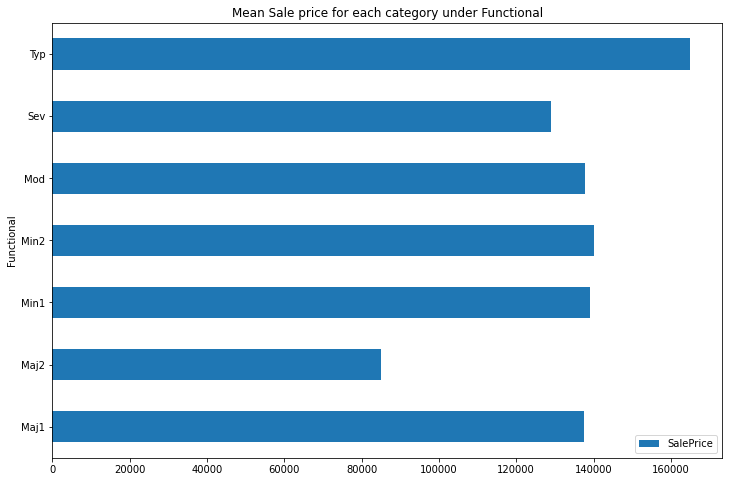

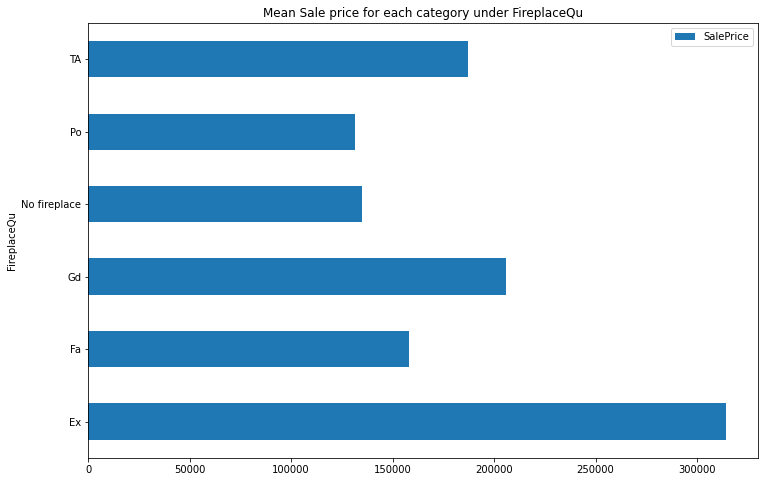

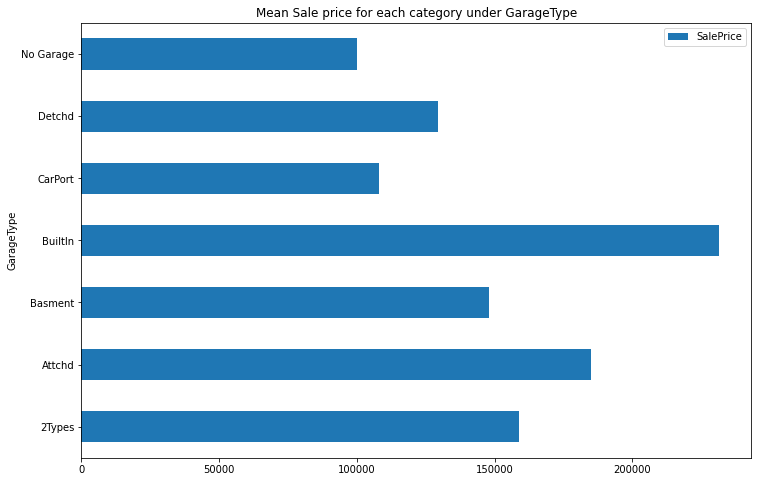

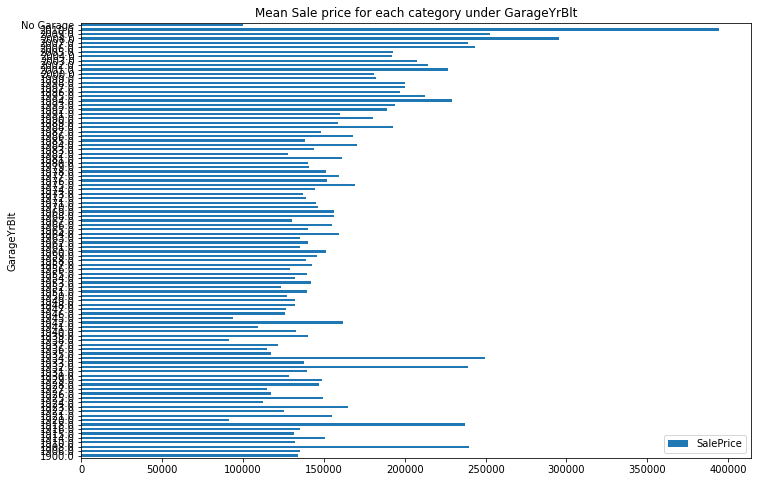

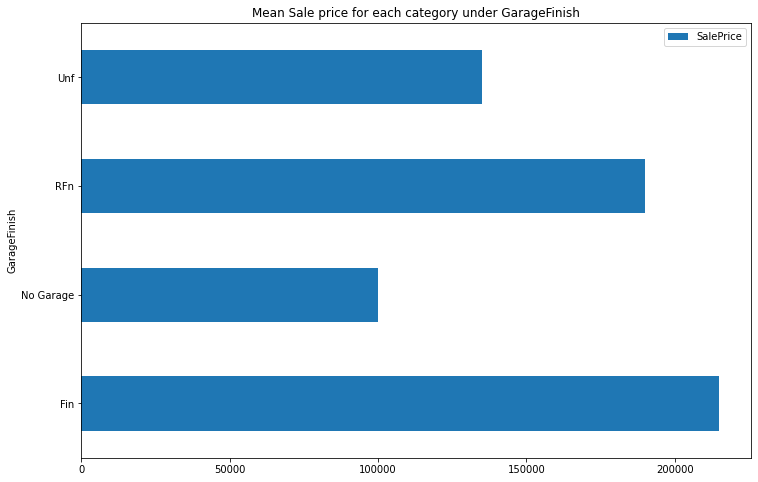

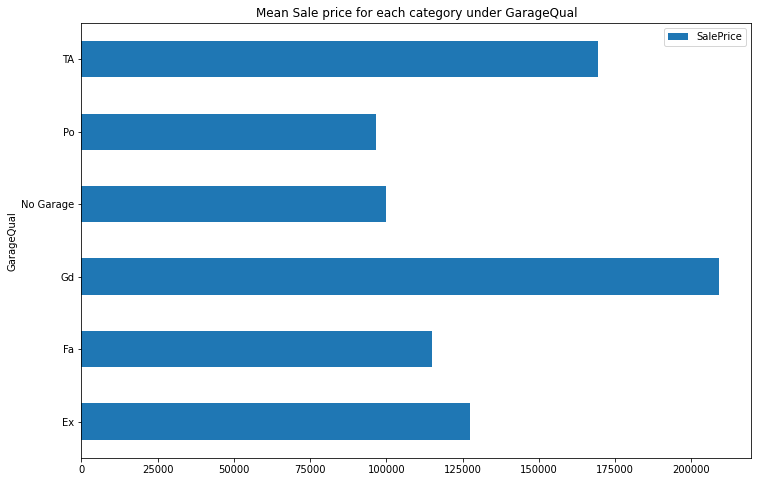

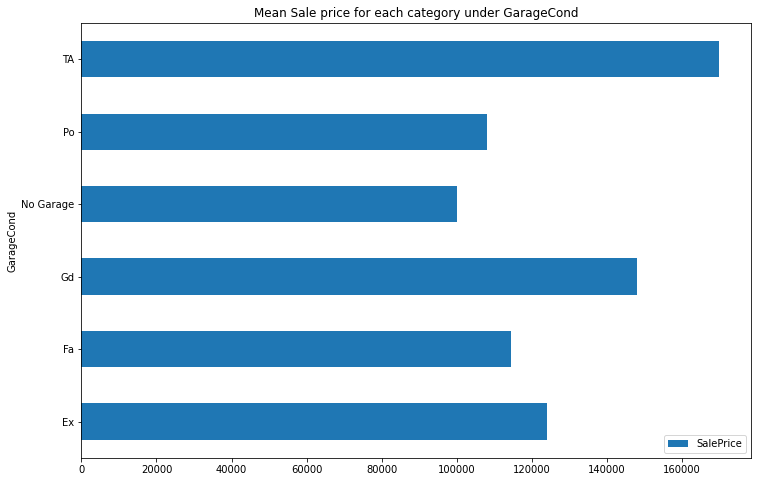

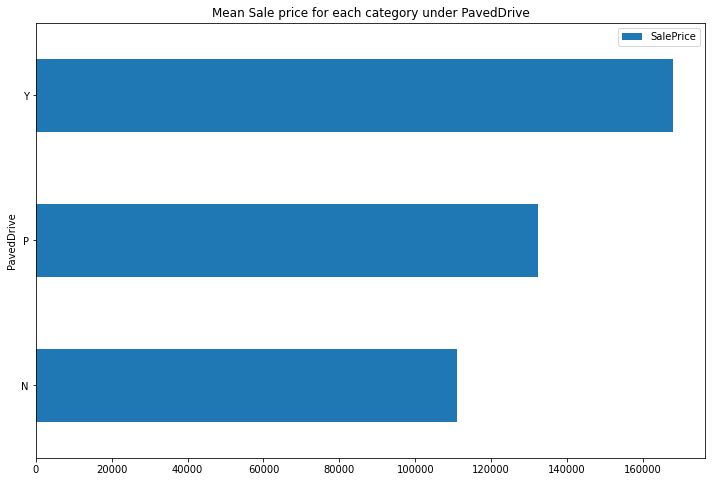

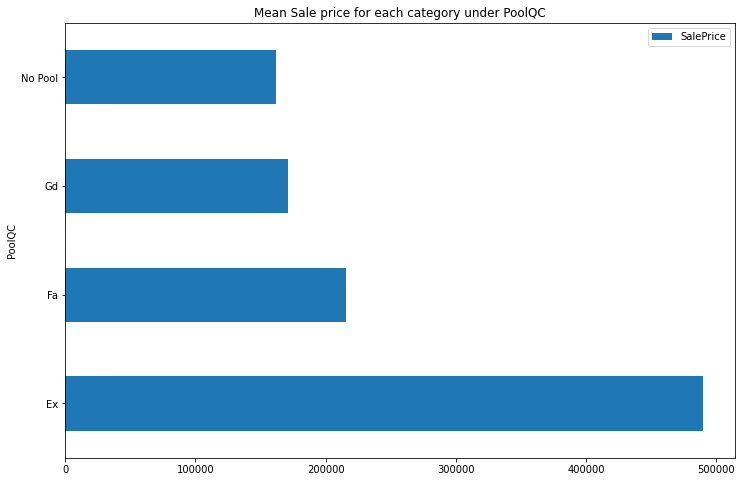

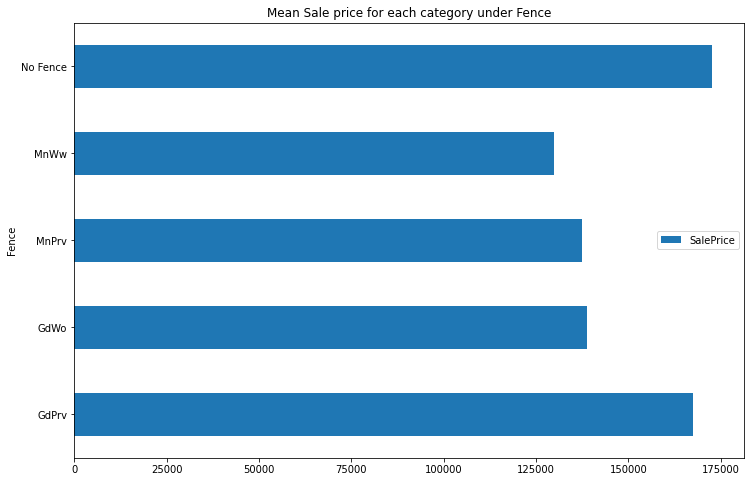

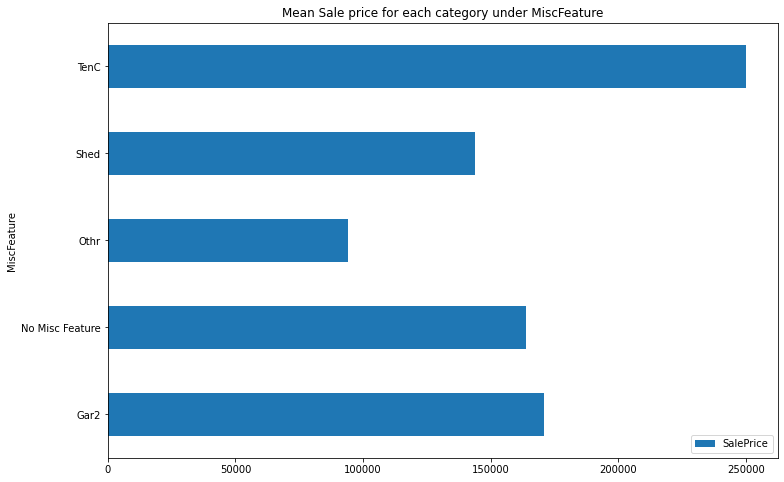

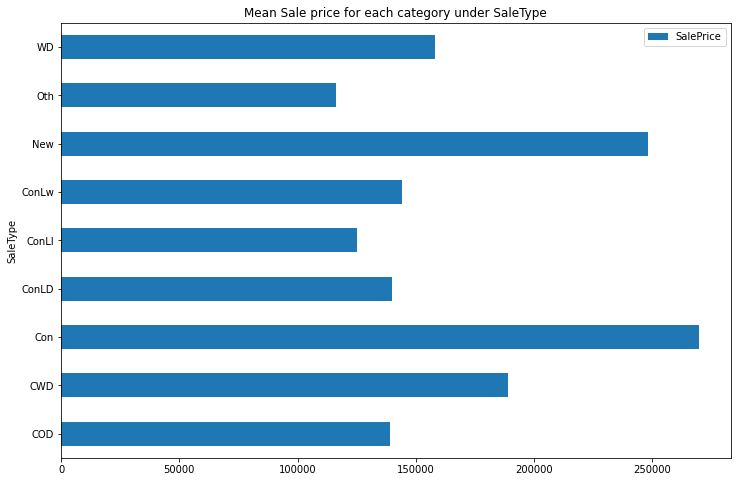

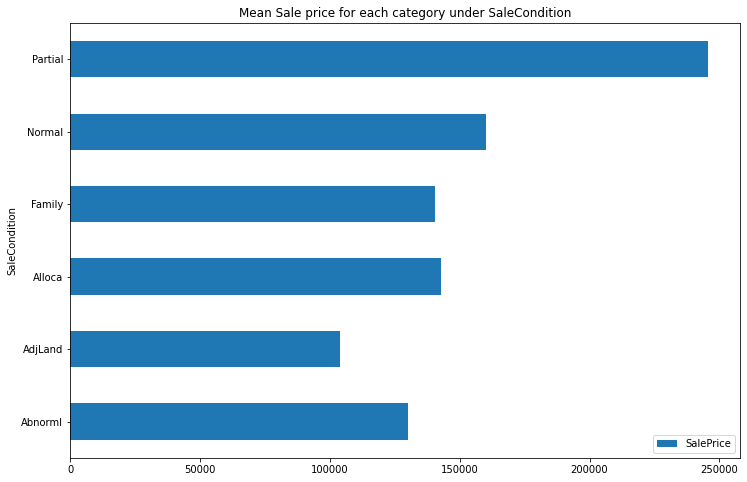

In [24]:
#### computing sale price of house (average) for each category
for c in categorical_cols:
    tempdf= train_df.groupby(c).aggregate({'SalePrice':'median'})
    tempdf.plot(kind='barh',figsize=(12,8),title=f'Mean Sale price for each category under {c}')
    

#### Observations:

1.  Among MSSubClass categories, the Class 60 (2-STORY 1946 & NEWER) has highest median price


2.  Among MSZoning class, FV (Floating Village Residential has highest median sale price)


3.  Among the sreet category, street with paved road has highesh median sale price


4.  Among alley category, paved alley has more sale price than no alley access 


5.  Among Lotshape, irregular plot cost more than regular (why so)


6.  Among utlities, house with all public services available are more costlier than less utitlies available near to them.


7.  Among LotConfig, CulDSac has most median sale price


8.  AMong LandSlop, house with medium slope and severely sloped has higher sale price


9.  Among condition 1, RRNn & PosA has highest median sale price


10. Among condition 2, PosN, PosA has highest median sale price.


11. Among BldgType, Twnhse has highest sale price.


12. Among HouseStyle, 2 storied building and 2.5  fin has highest sale price.


13. Coming to overallquality, house having excellent has highest sale price, while it is decreasing down when the overallquality decreases


14. Based on overall condition, 9 th category has highest sale price and it is decreasing down as condition quality reduces, (but at 5 overall condition, it is increasing, need to study why ot occurs: keeping as special case)


15. Based on roof design, shed roof design has higher sale price than flat roof design


16. Based on material used for roof, it is seen that roof made of wood shingles have higher median price


17. Based on exterior1st, stone & imstucc materials based house has high median sale price


18. Based on masvnrtype, stone material based houses cost more in average


19. Based on exterior material quality, excellent house cost more 


20.  Based on foundation material, poured concrete based foundation house cost more.


21. Coming under heating type, gas furnance forced heating based houses cost more in average


22. Houses having central air conditioing cost more in average




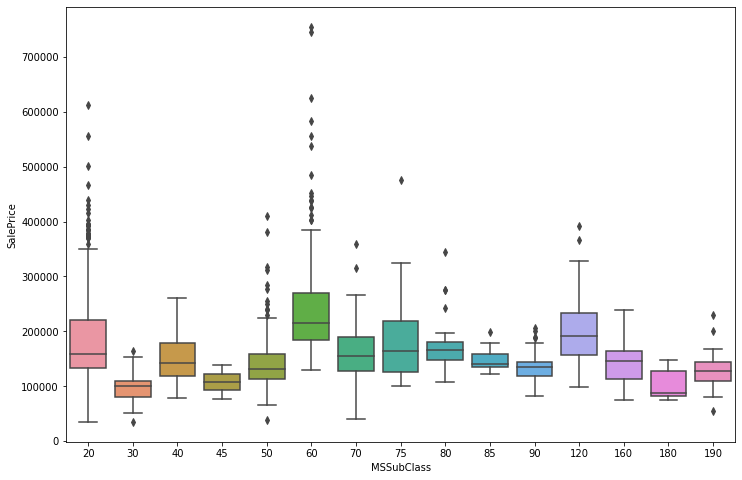

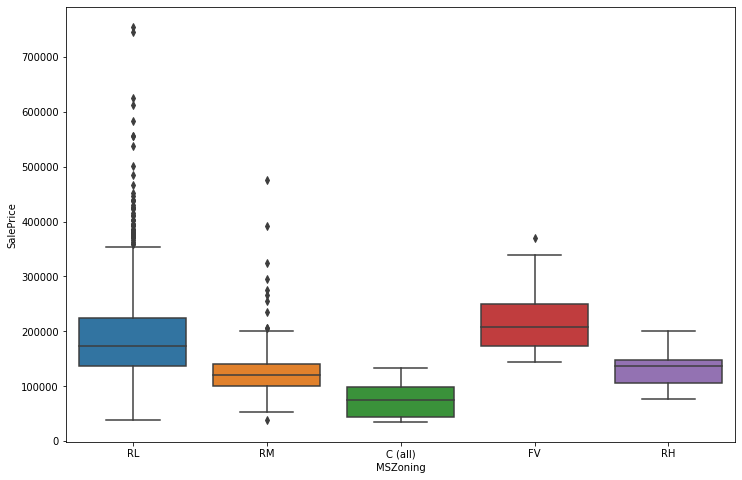

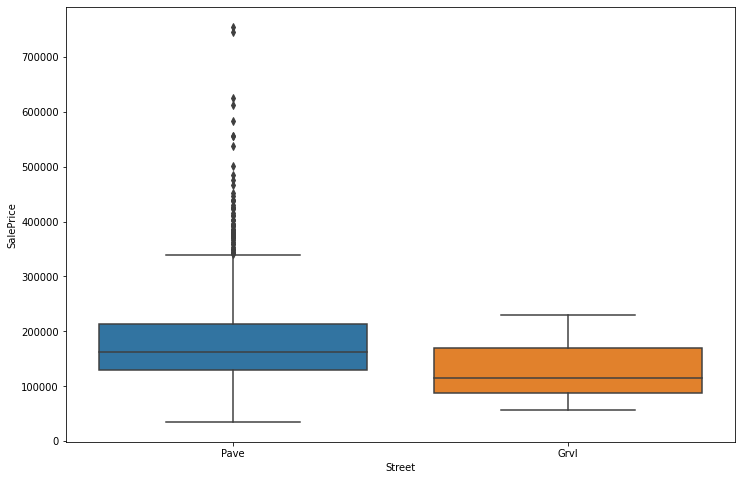

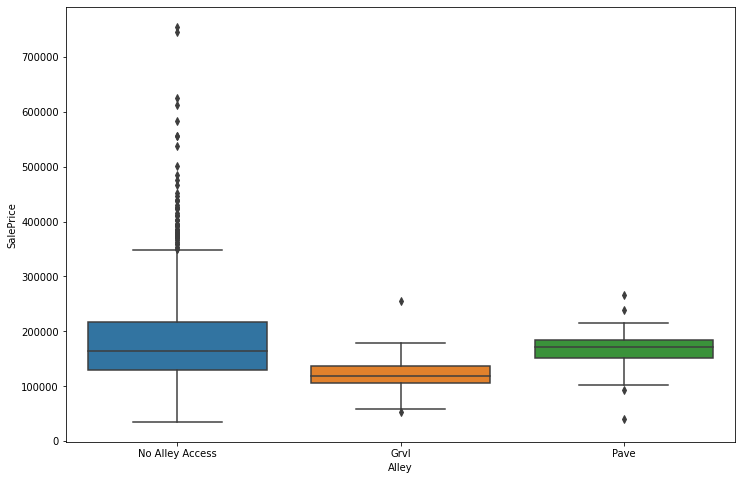

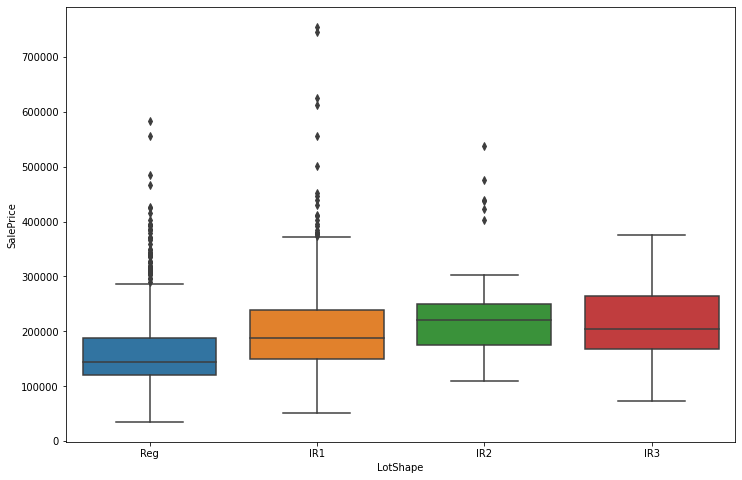

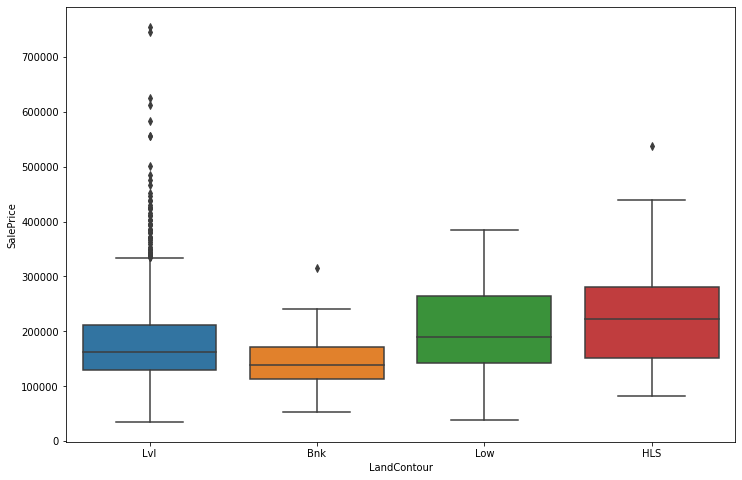

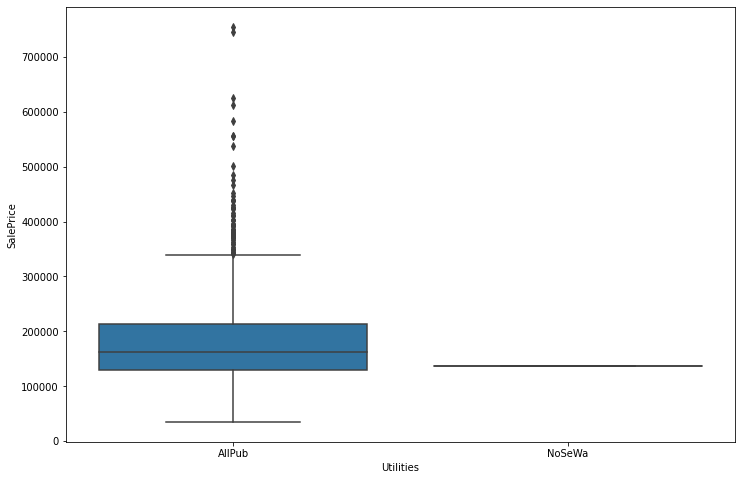

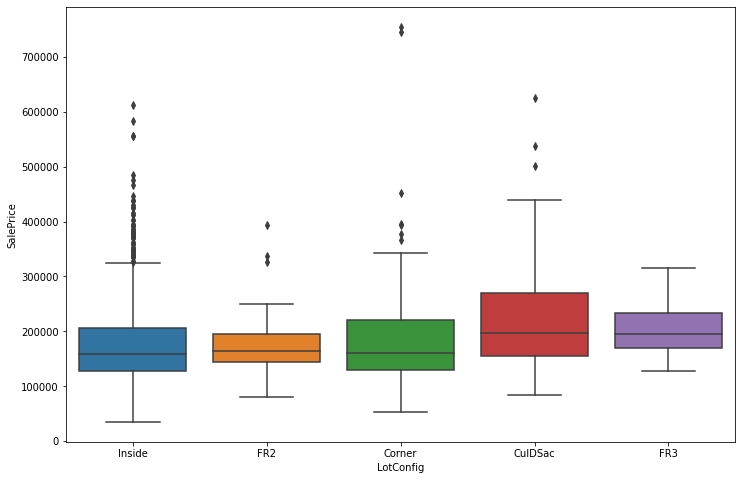

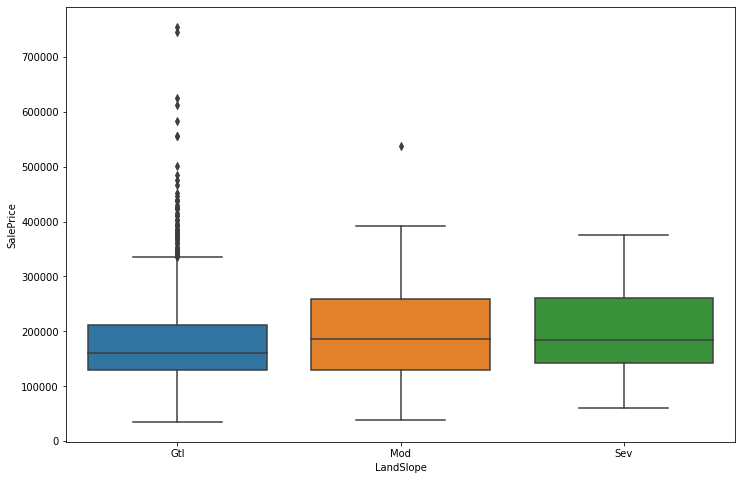

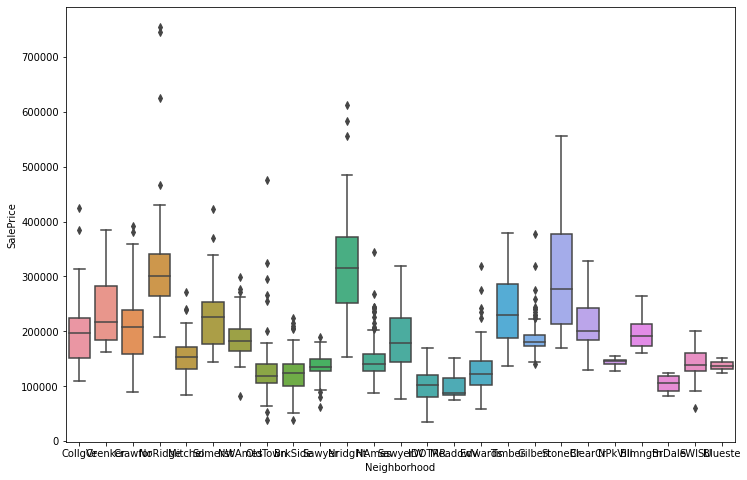

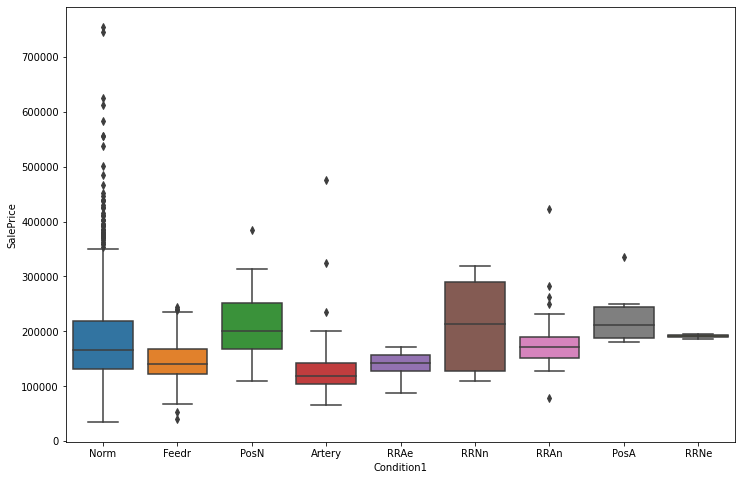

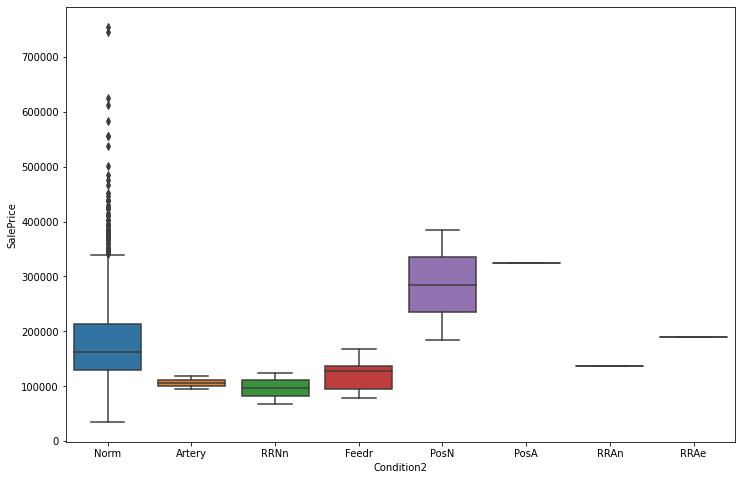

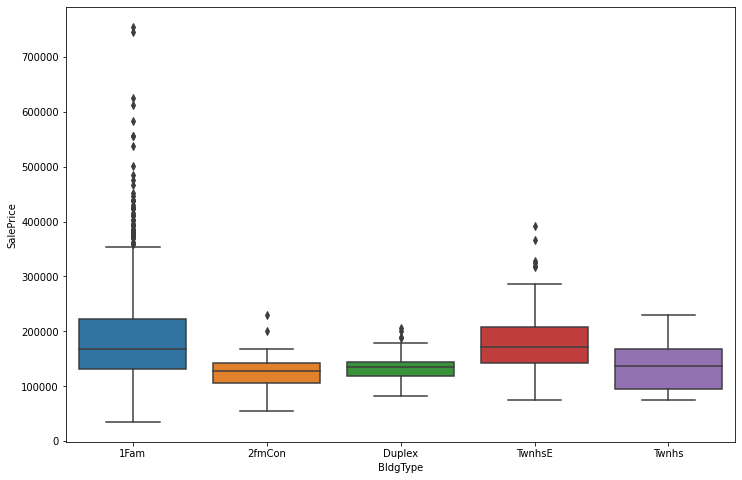

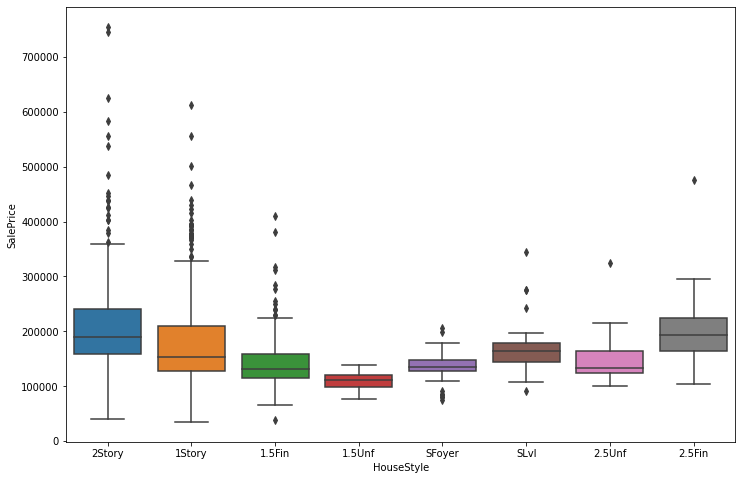

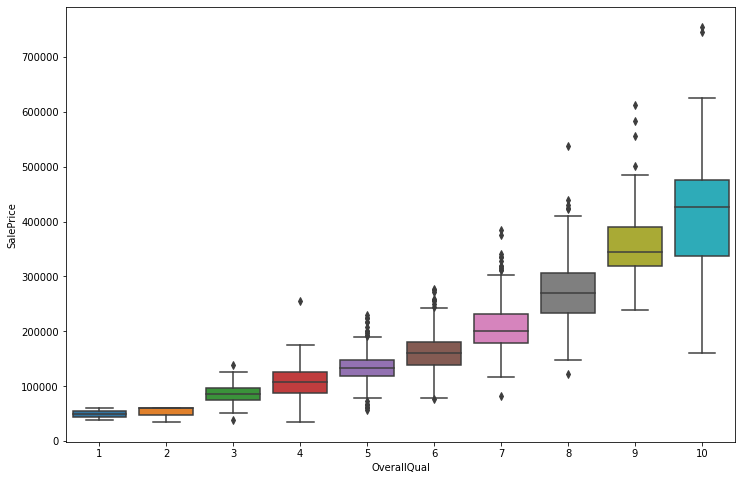

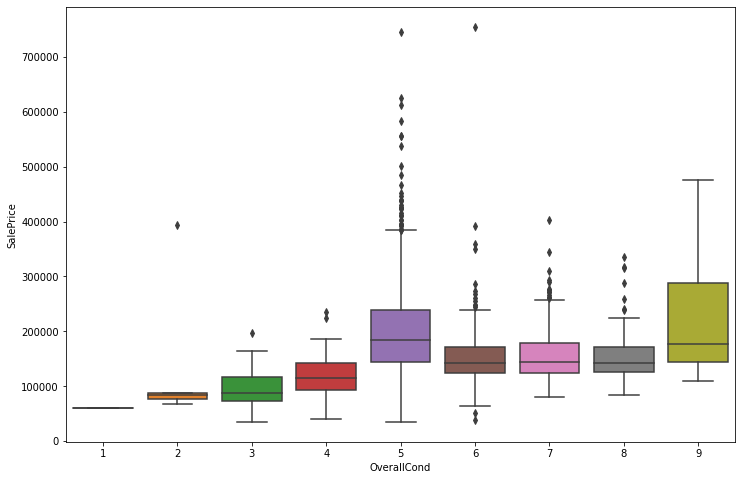

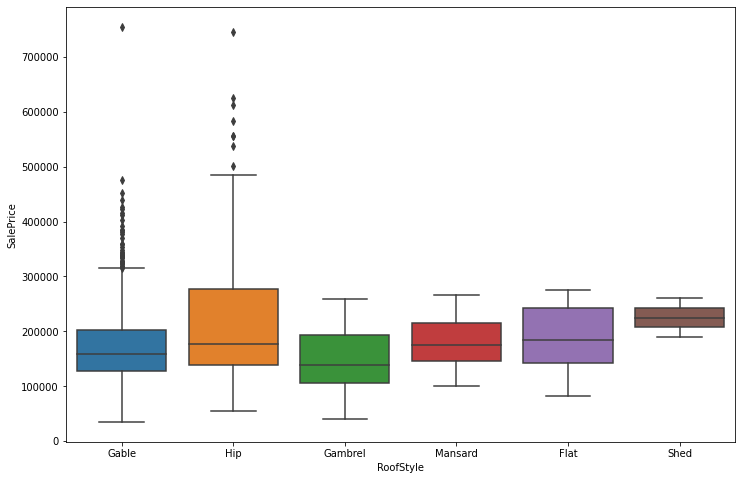

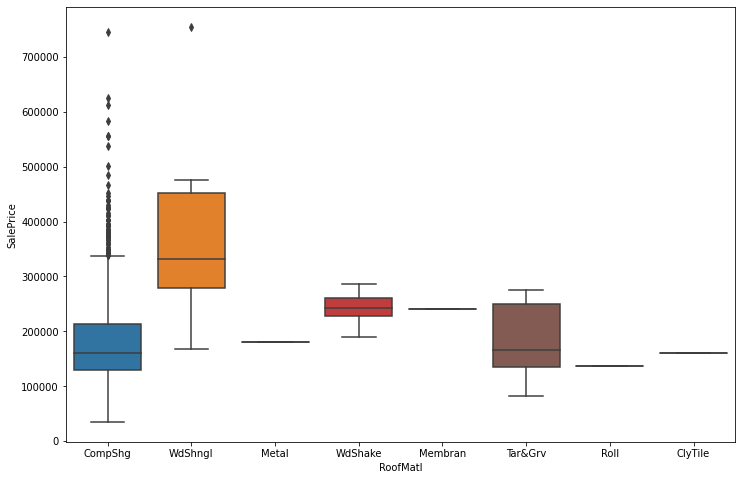

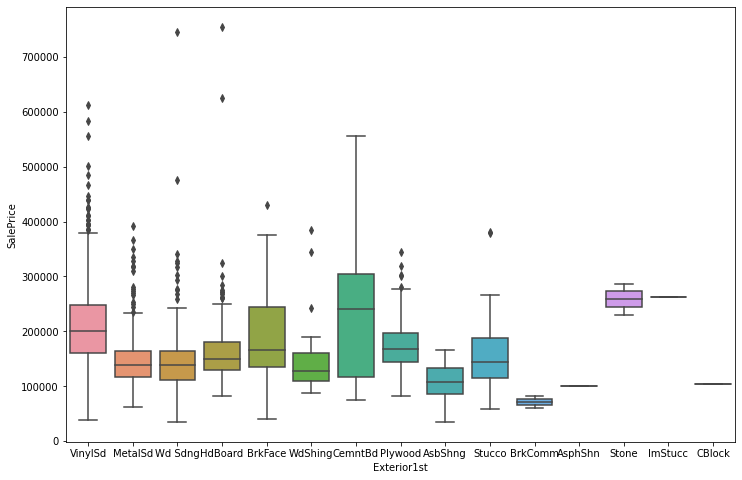

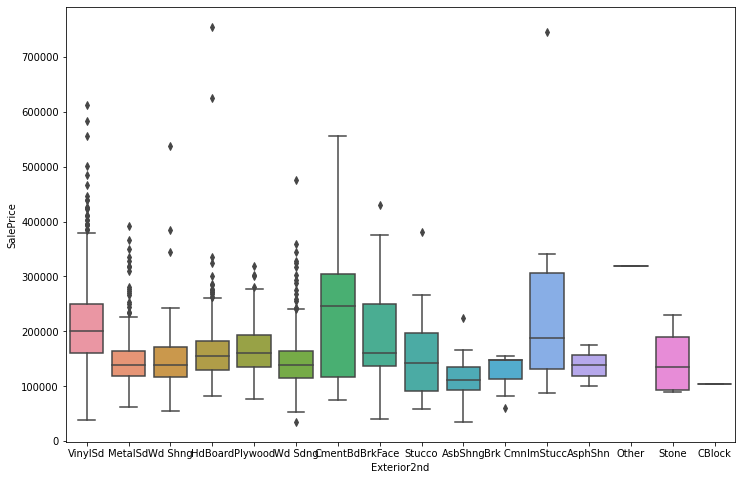

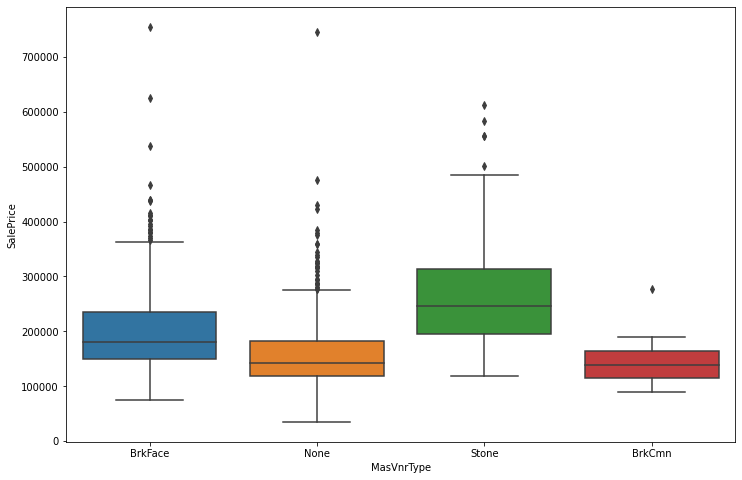

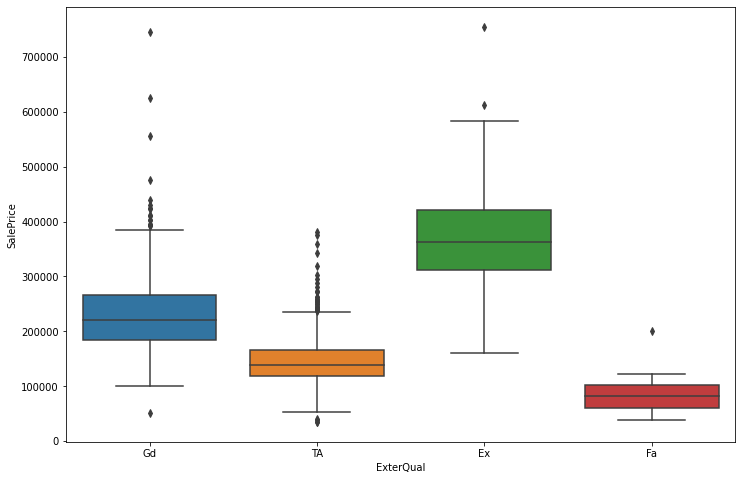

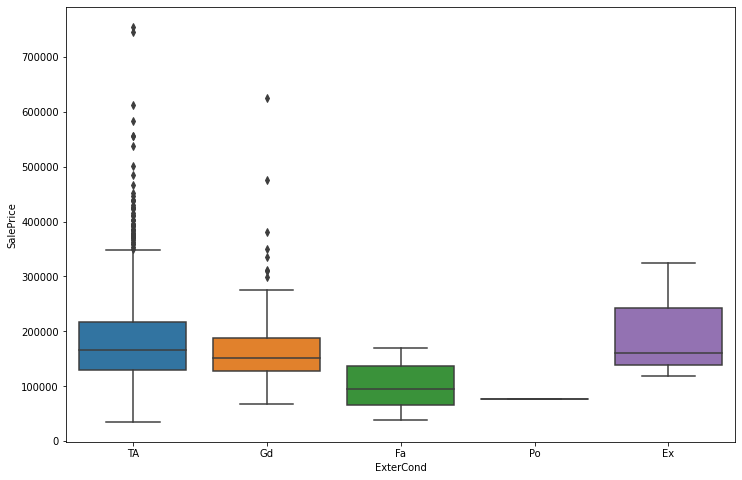

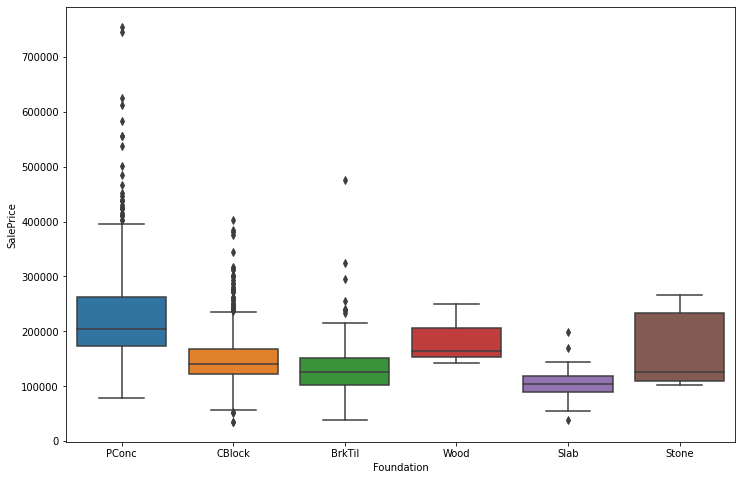

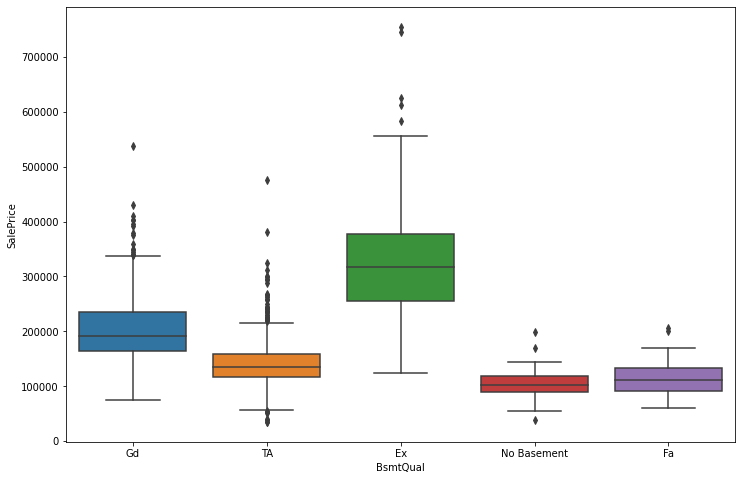

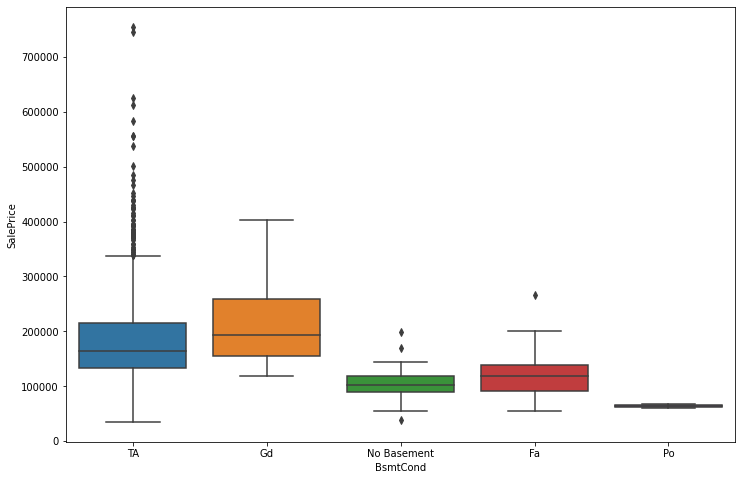

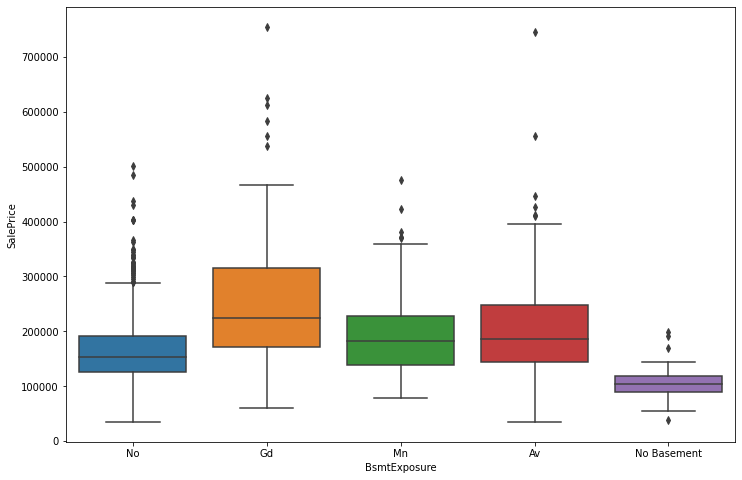

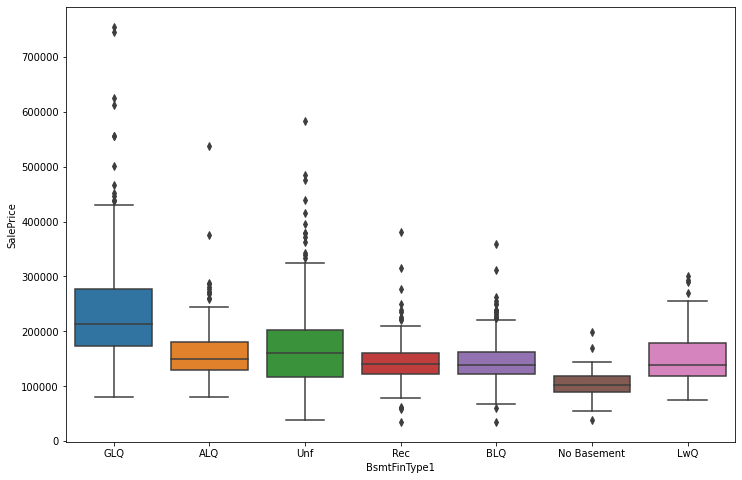

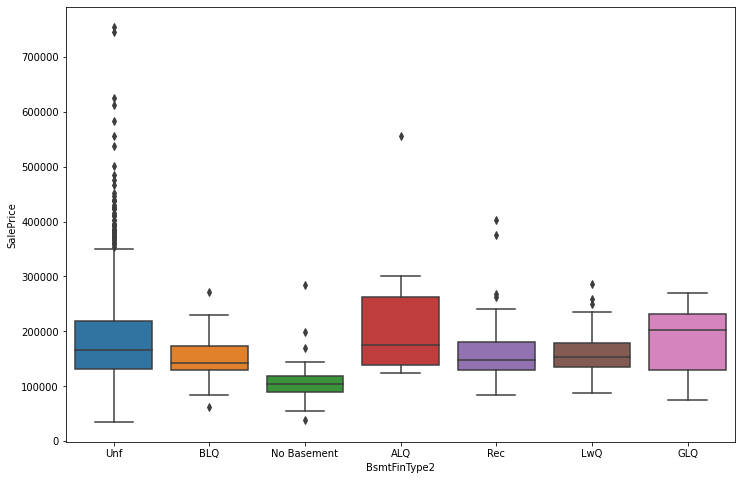

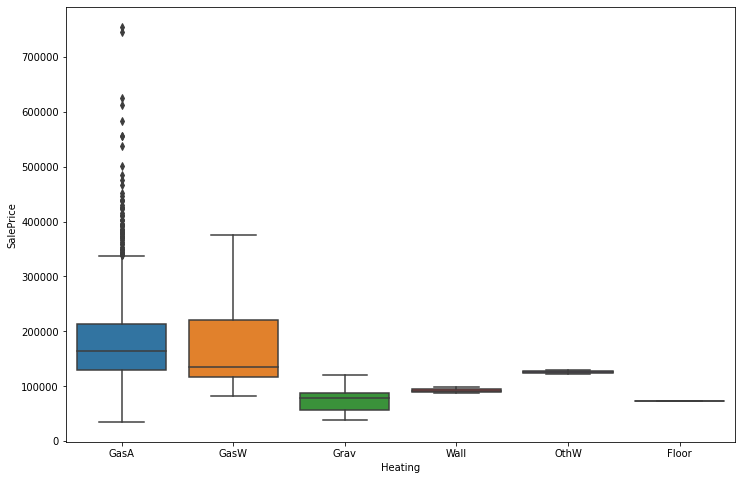

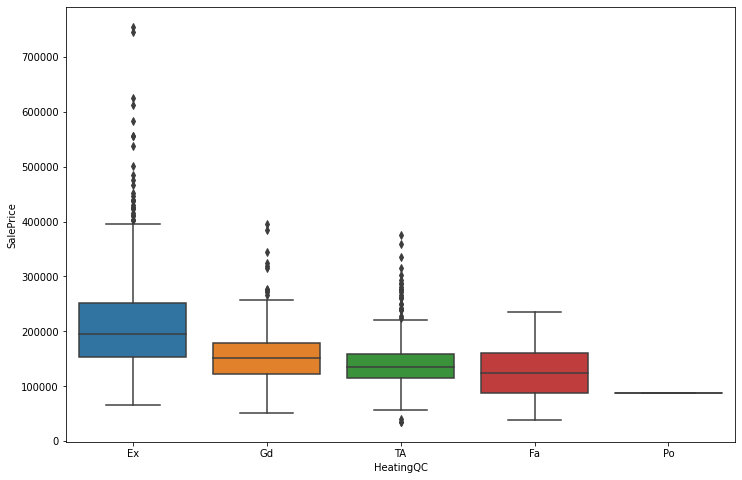

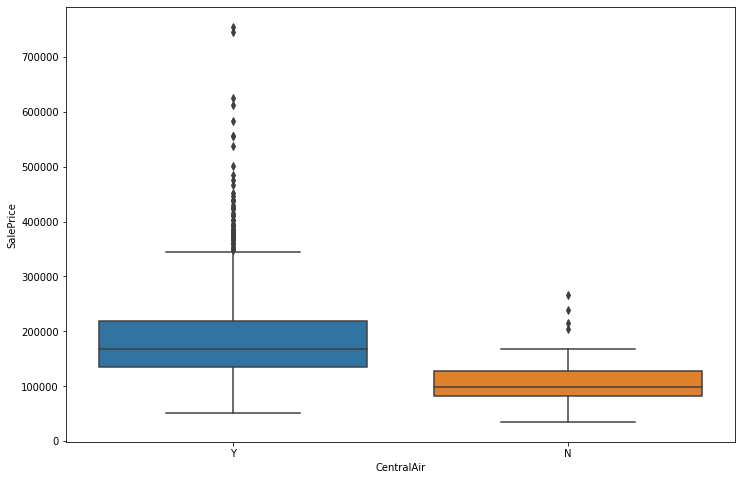

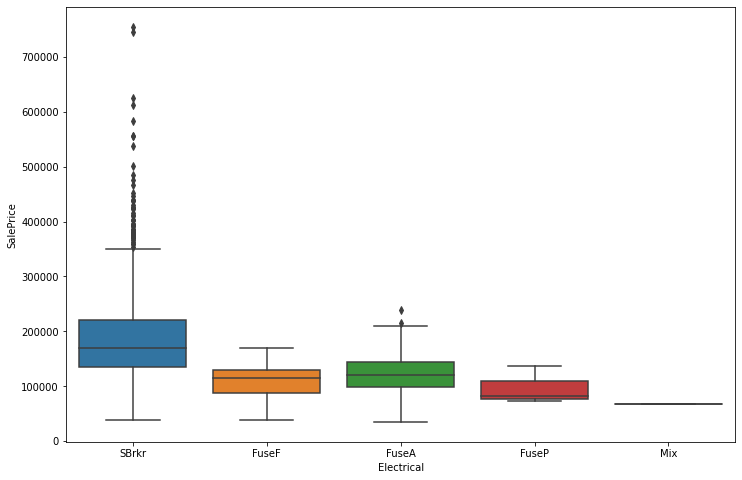

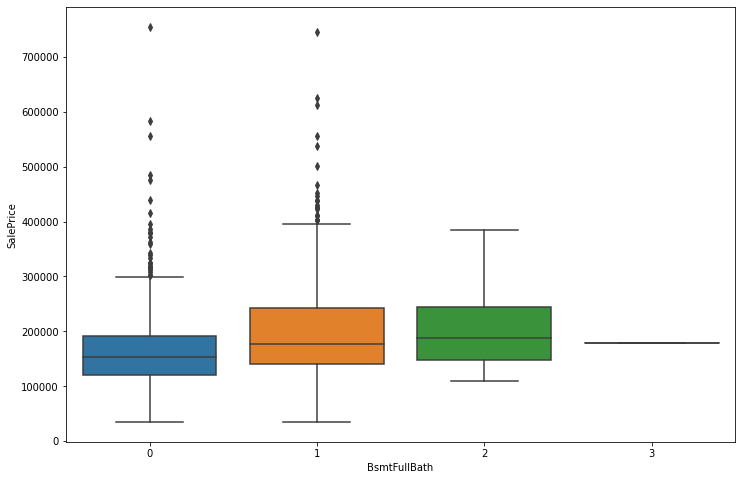

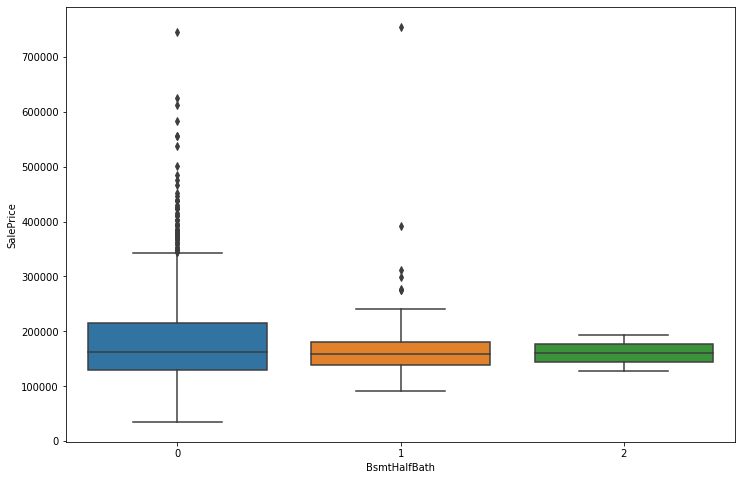

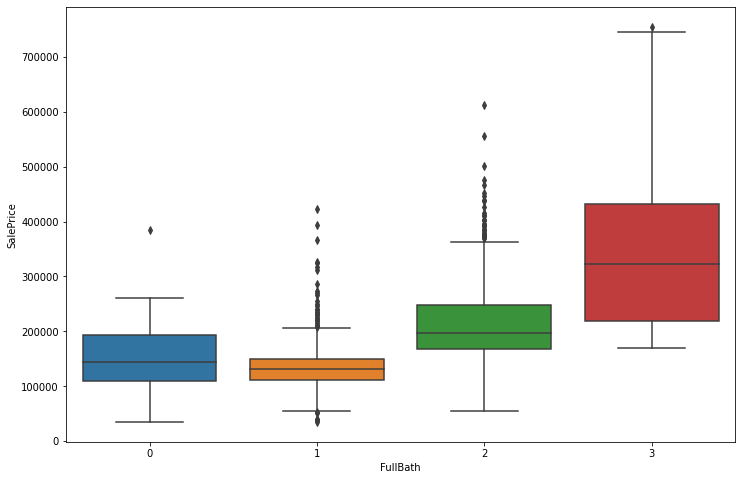

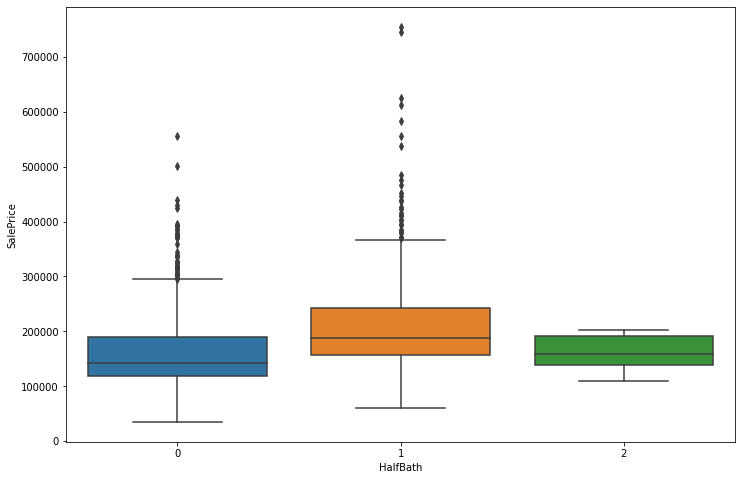

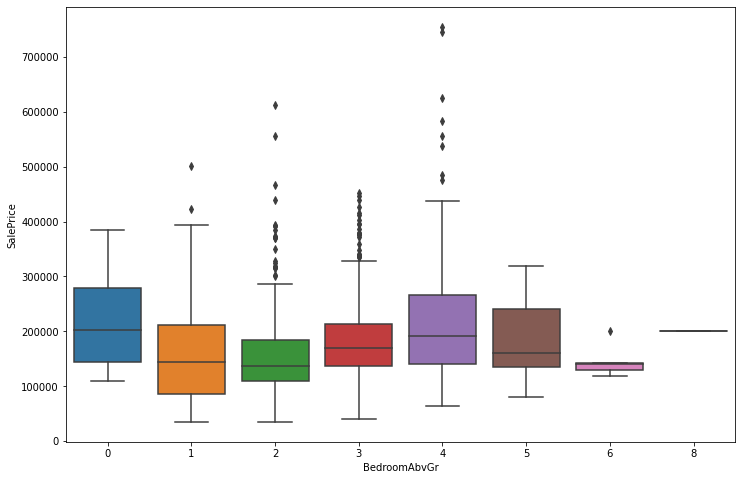

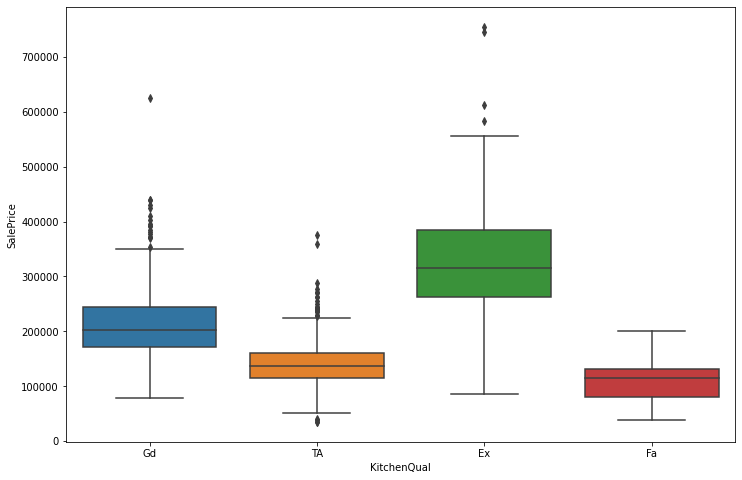

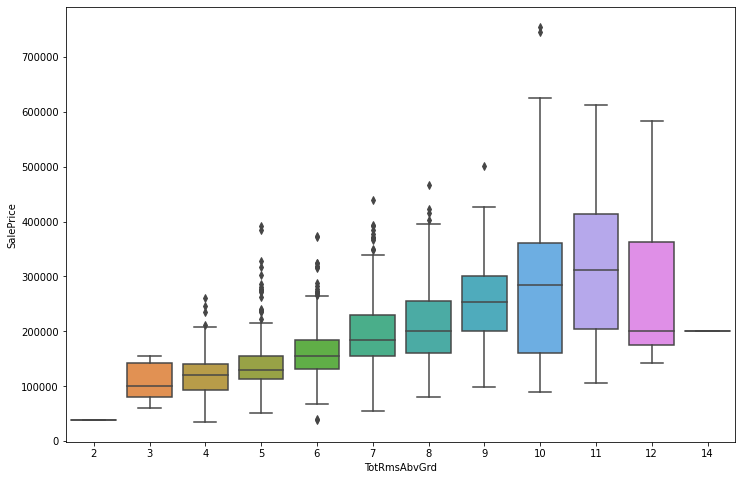

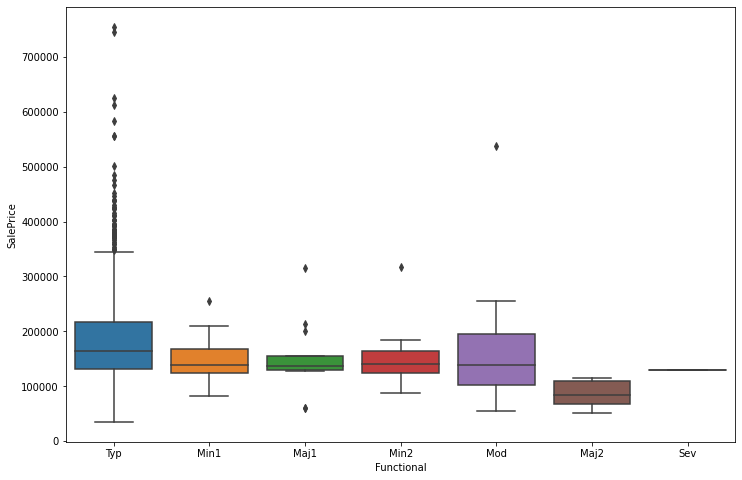

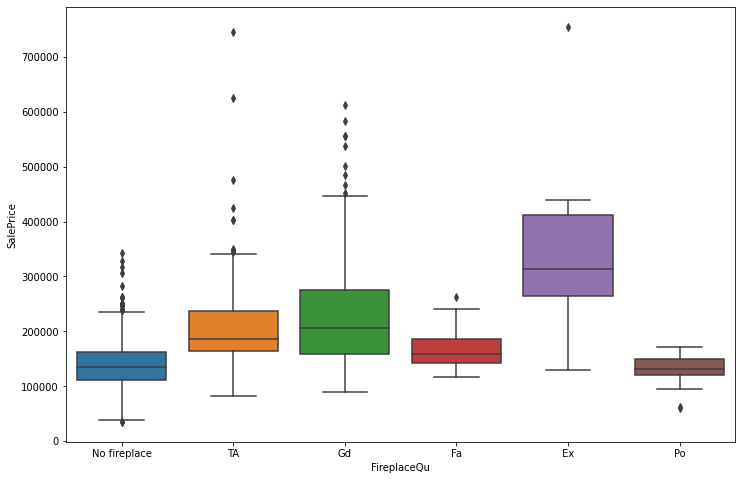

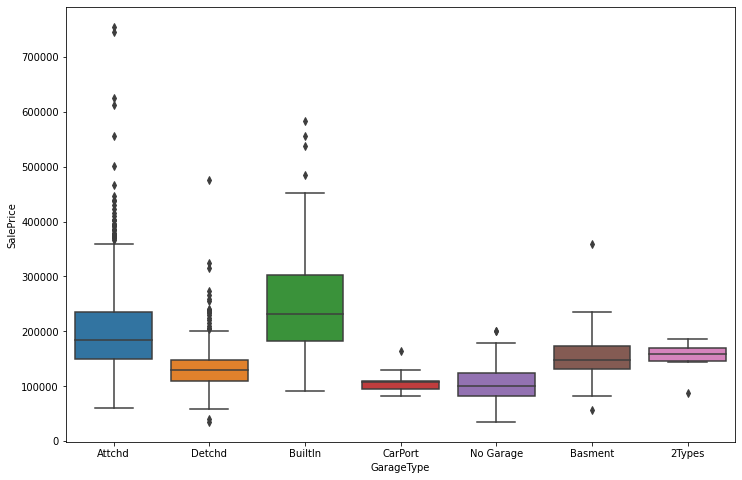

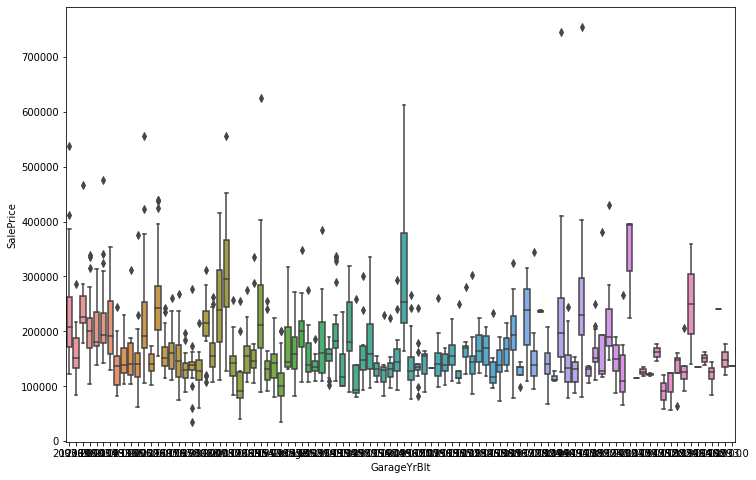

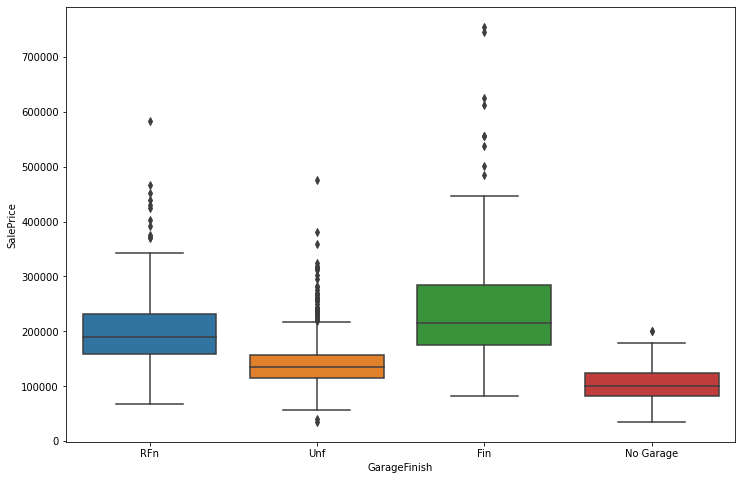

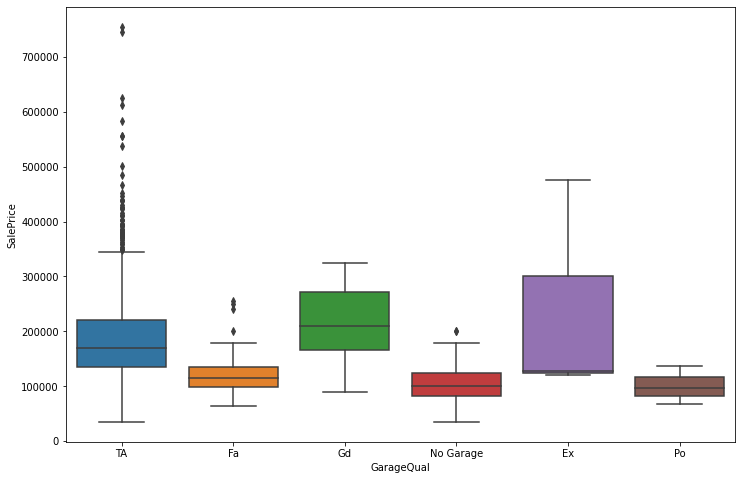

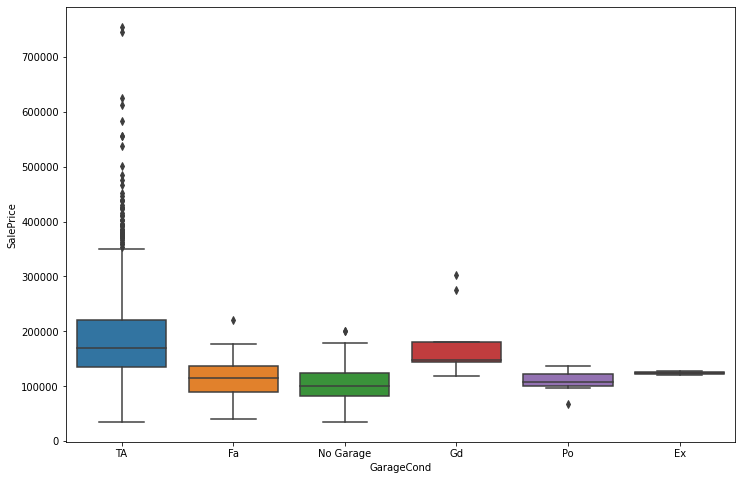

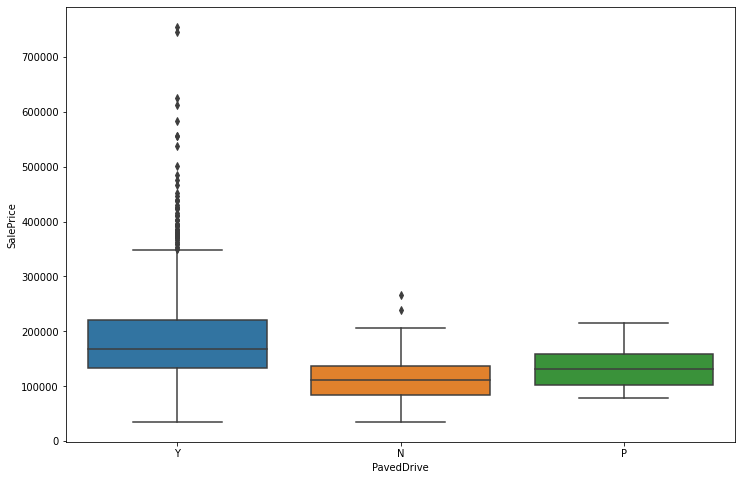

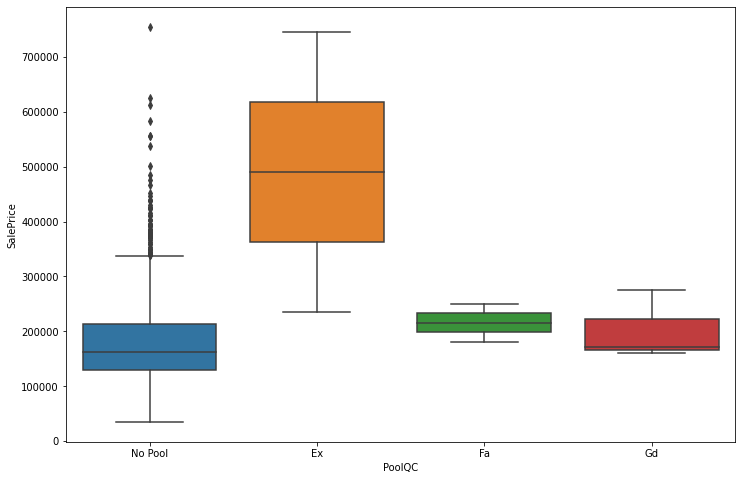

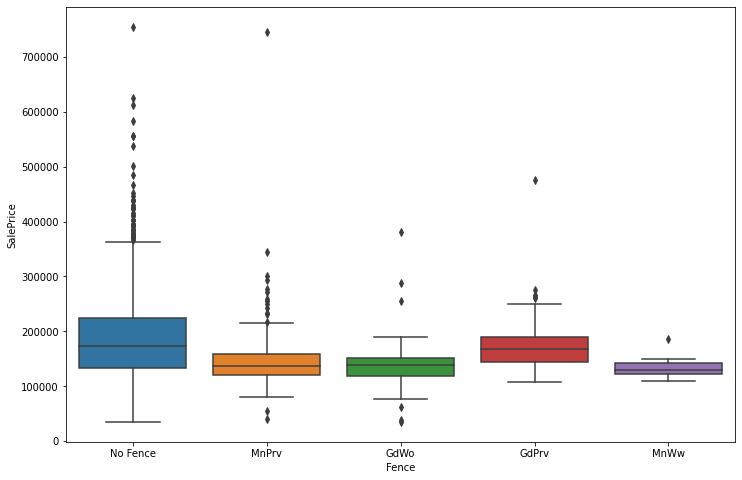

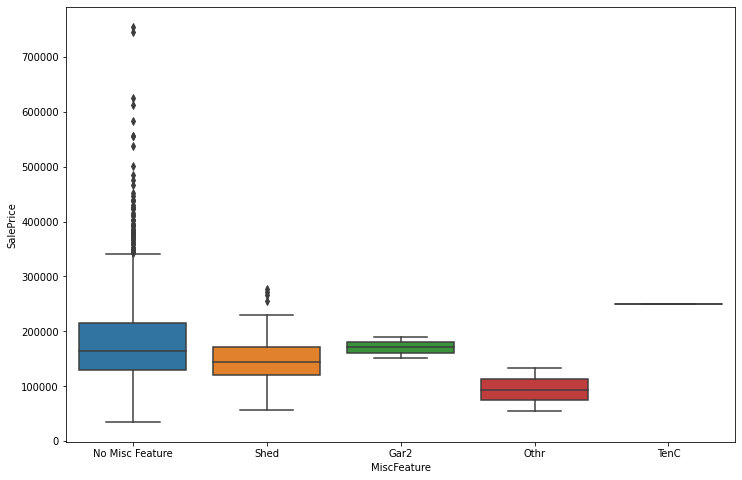

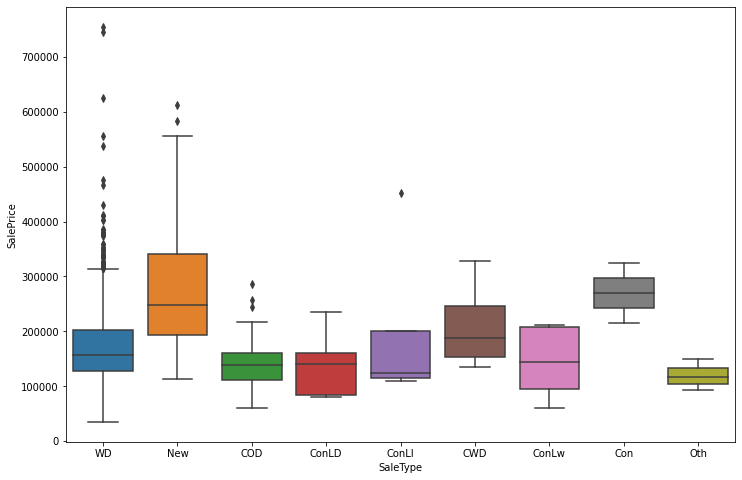

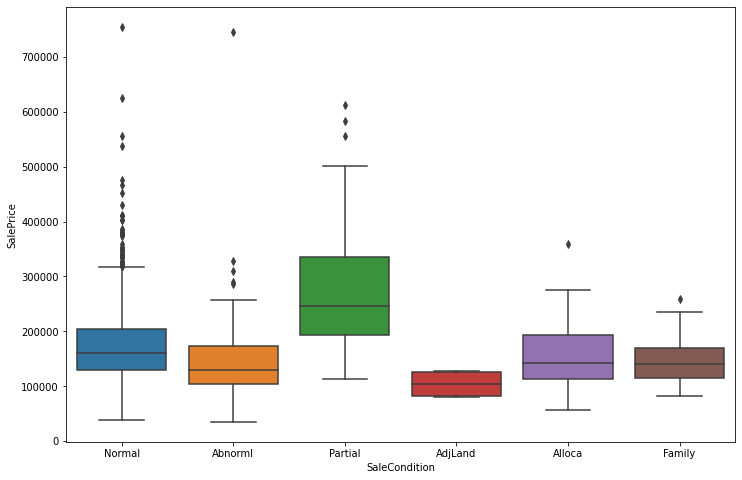

In [25]:
#### drawing the boxplot for each categorical feature against sale price
for c in categorical_cols:
    plt.figure(figsize=(12,8))
    sb.boxplot(data=train_df,x=c,y='SalePrice')
    plt.show()

In [26]:
#### take numerical columns data 

numerical_cols= [i for i in train_df.columns if i not in categorical_cols and i!='Id']
numerical_cols

['LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

<AxesSubplot:>

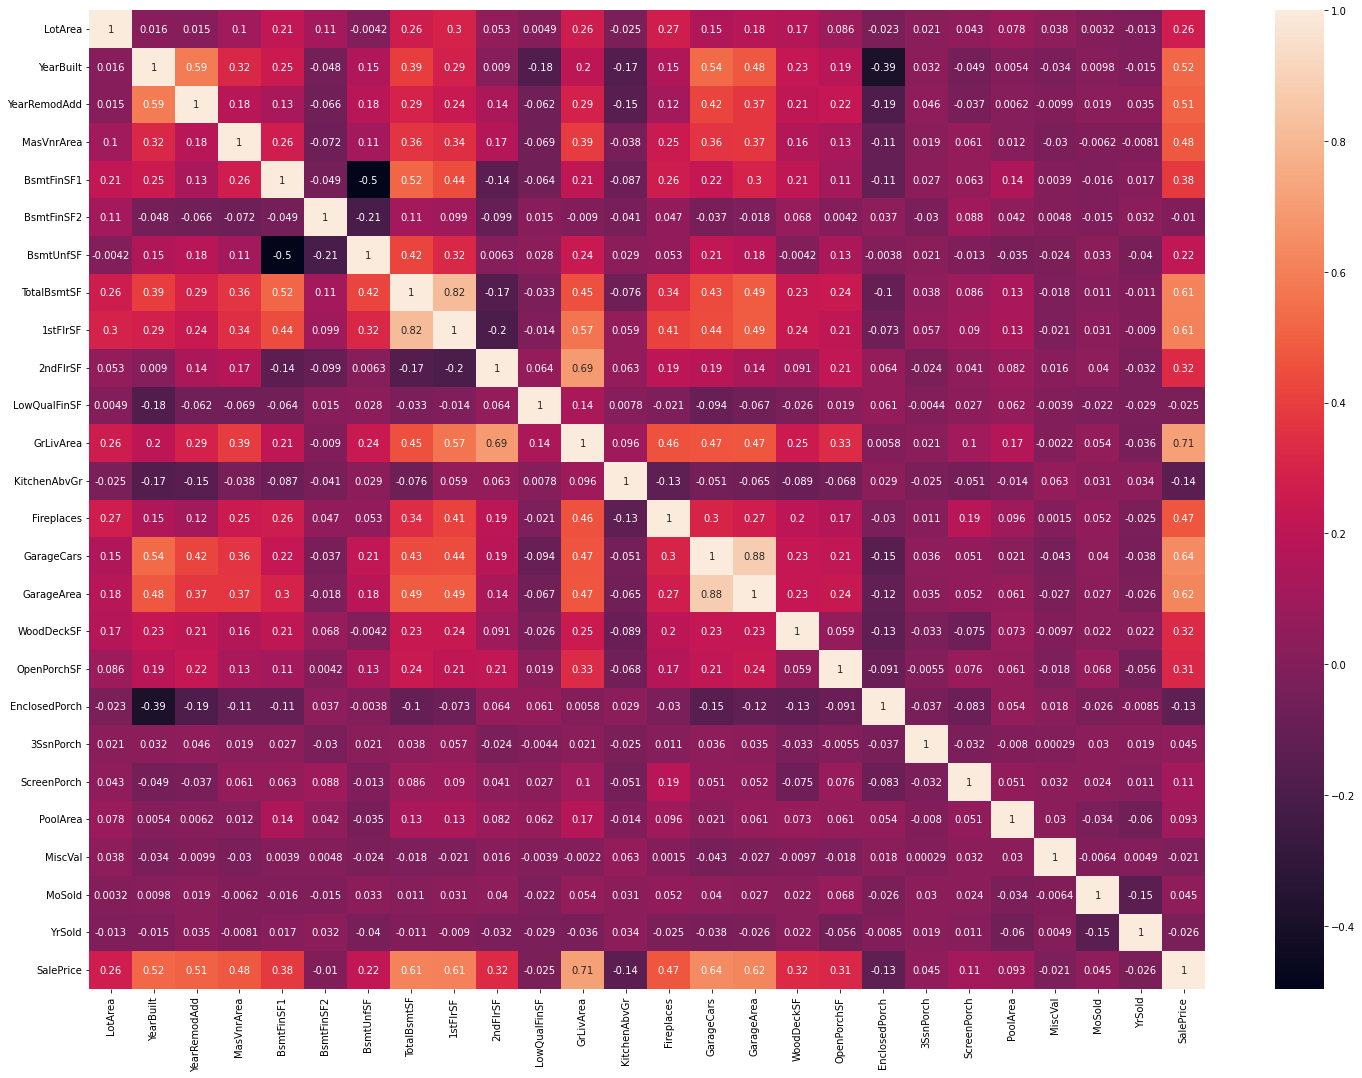

In [27]:
### draw heatmap for correlation 
plt.figure(figsize=(25,18))
sb.heatmap(train_df[numerical_cols].corr(),annot=True)

##### Observations

1. From the heatmap, it could be summarised as there is some correlation existing b/w independent features [exclude Saleprice].

2. Also it could be summarised as correlation b/w some independent features & dependent feature [saleprice] is good.

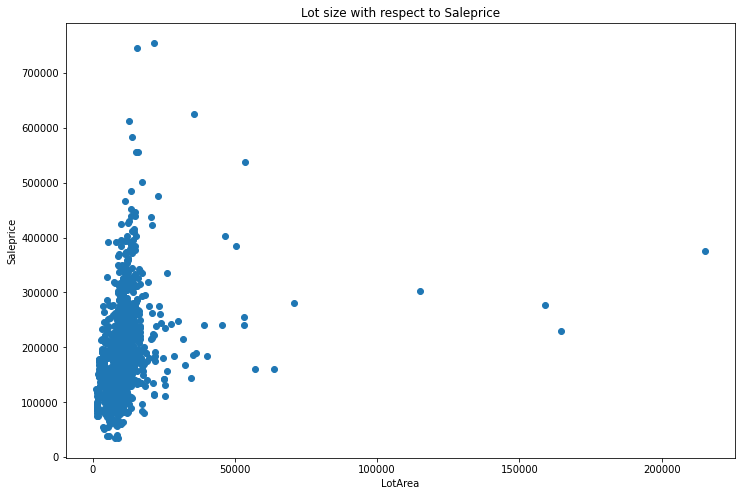

In [28]:
##### Studying the Lot Area feature with respect to sale price

plt.figure(figsize=(12,8))
plt.title('Lot size with respect to Saleprice')
plt.scatter(x=train_df['LotArea'],y=train_df['SalePrice'])
plt.xlabel('LotArea')
plt.ylabel('Saleprice')
plt.show()

#### observations

1. Normally the lotarea should have higher influence (not major) on salesprice

**2. Would need to see why the lotarea>50,000 sq feet price is lower than expected & saleprice> 5,00,000 USD is higher for lower lotarea under 50,000 sq.**



<AxesSubplot:title={'center':'Lot Area with dwell class'}, ylabel='MSSubClass'>

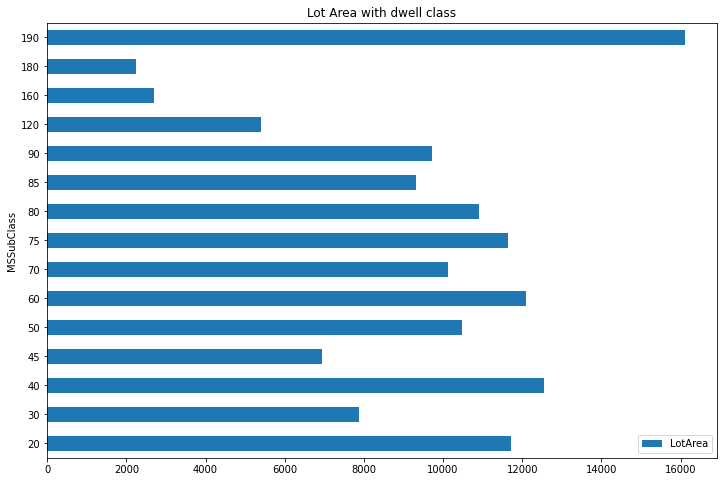

In [29]:
##### Studying the Lot Area feature with respect to MsDwelling

pd.DataFrame(train_df.groupby('MSSubClass').aggregate({'LotArea':'mean'})).plot(kind='barh',figsize=(12,8),title='Lot Area with dwell class')

<AxesSubplot:title={'center':'Lot Area with LandContour'}, ylabel='LandContour'>

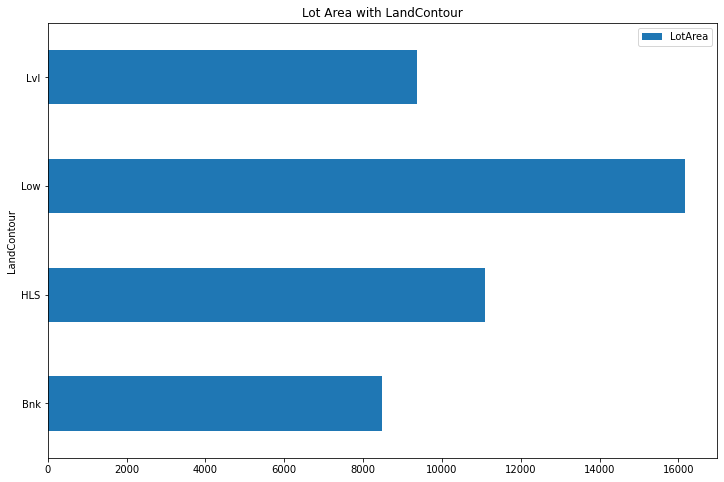

In [30]:
##### Studying the Lot Area feature with respect to LandContour

pd.DataFrame(train_df.groupby('LandContour').aggregate({'LotArea':'median'})).plot(kind='barh',figsize=(12,8),title='Lot Area with LandContour')

<AxesSubplot:title={'center':'YearBuilt with sale price'}, ylabel='YearBuilt'>

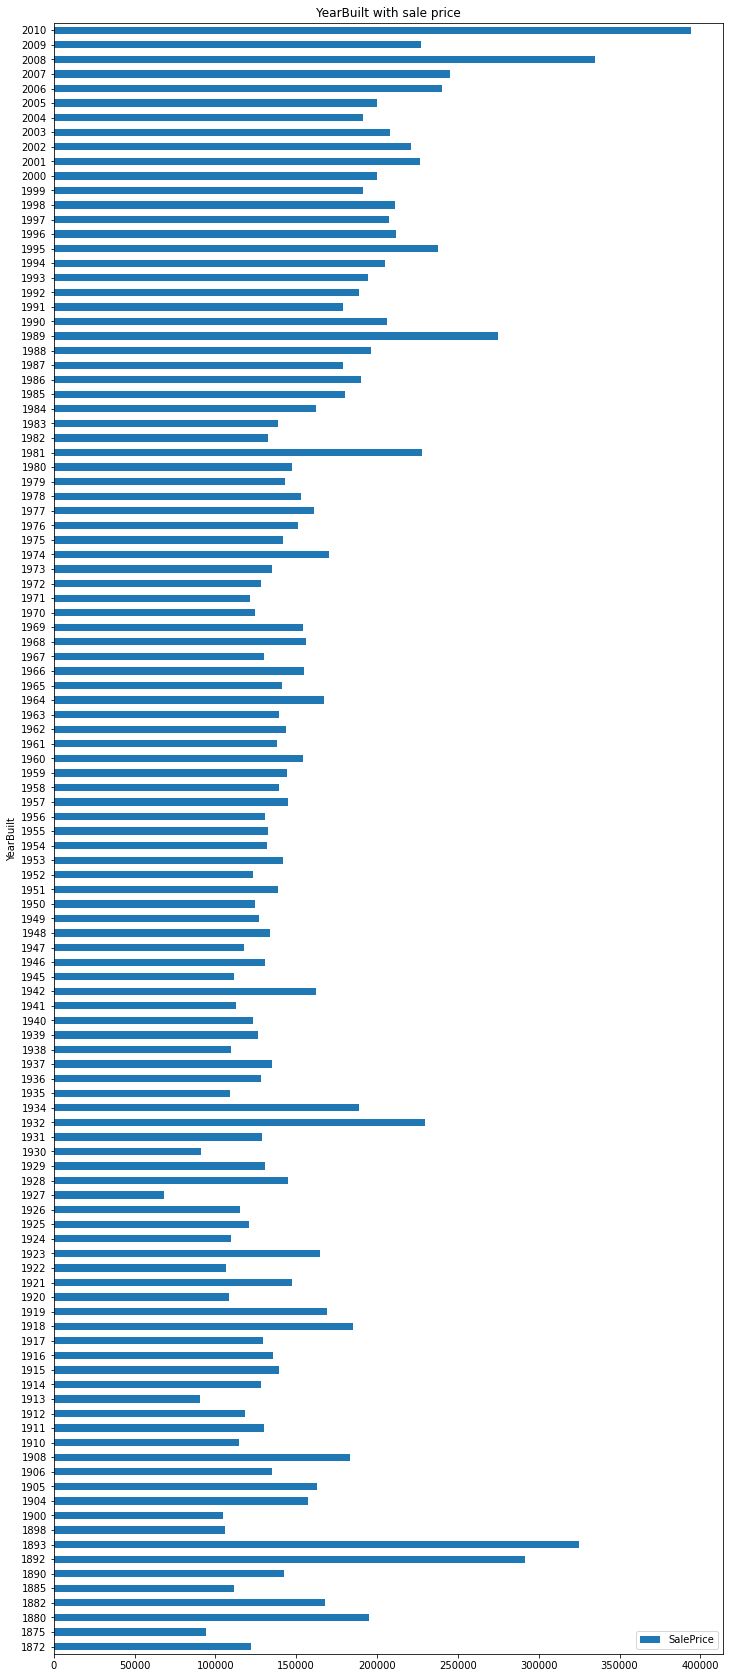

In [31]:
##### ploting sale price with respect to yearbuilt
pd.DataFrame(train_df.groupby('YearBuilt').aggregate({'SalePrice':'median'})).plot(kind='barh',figsize=(12,30),title='YearBuilt with sale price')

<AxesSubplot:title={'center':'YearModified with sale price'}, ylabel='YearRemodAdd'>

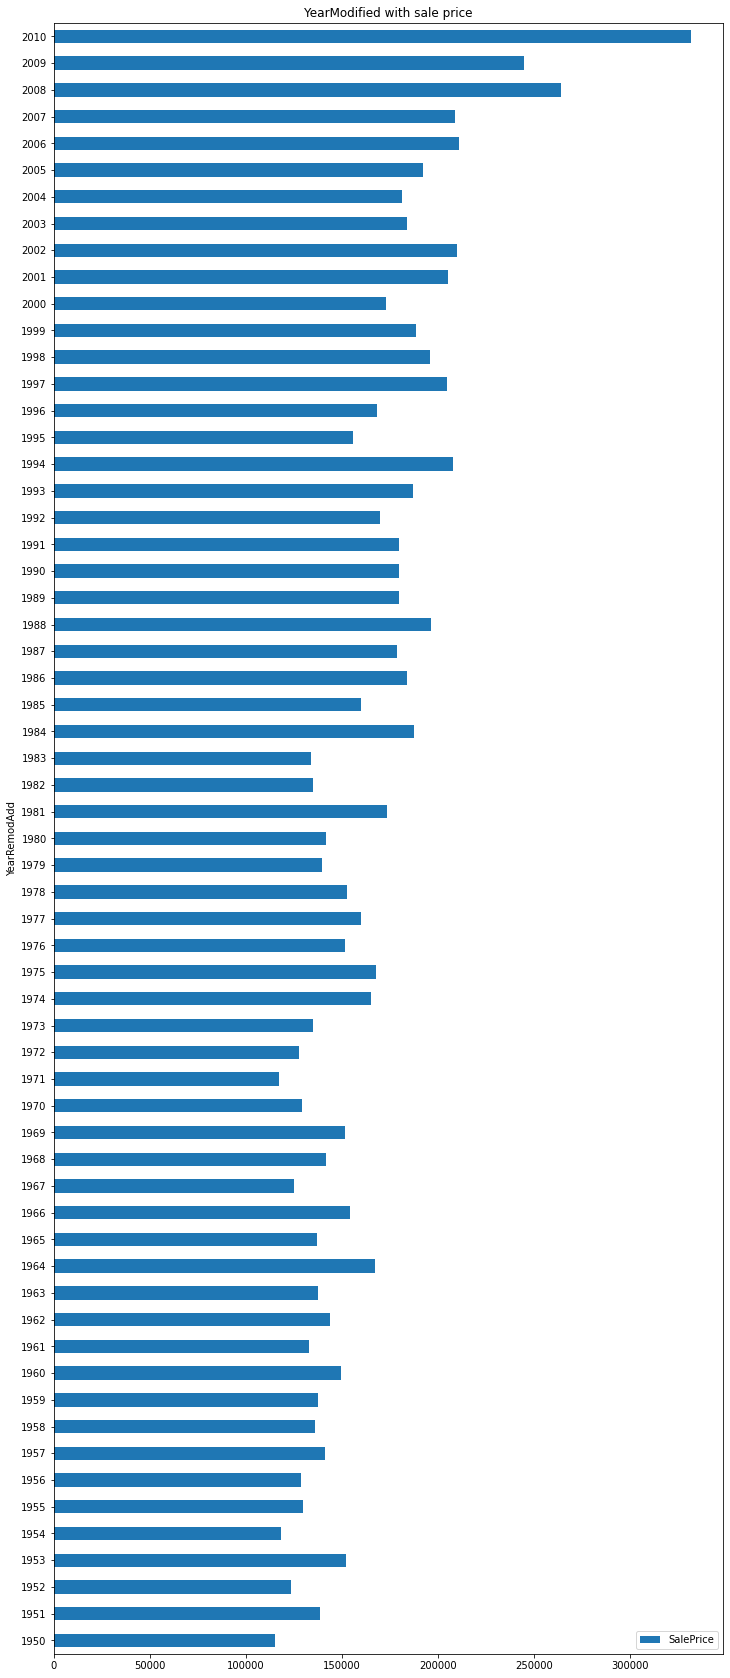

In [32]:
##### ploting sale price with respect to modified year 
pd.DataFrame(train_df.groupby('YearRemodAdd').aggregate({'SalePrice':'median'})).plot(kind='barh',figsize=(12,30),title='YearModified with sale price')

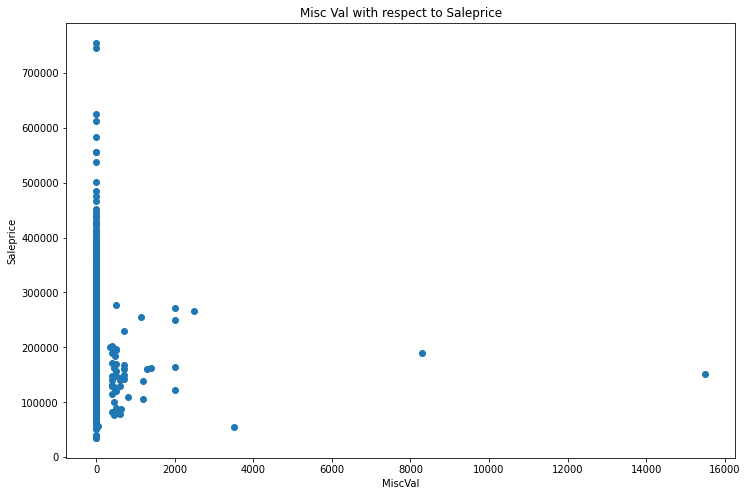

In [33]:
plt.figure(figsize=(12,8))
plt.title('Misc Val with respect to Saleprice')
plt.scatter(x=train_df['MiscVal'],y=train_df['SalePrice'])
plt.xlabel('MiscVal')
plt.ylabel('Saleprice')
plt.show()

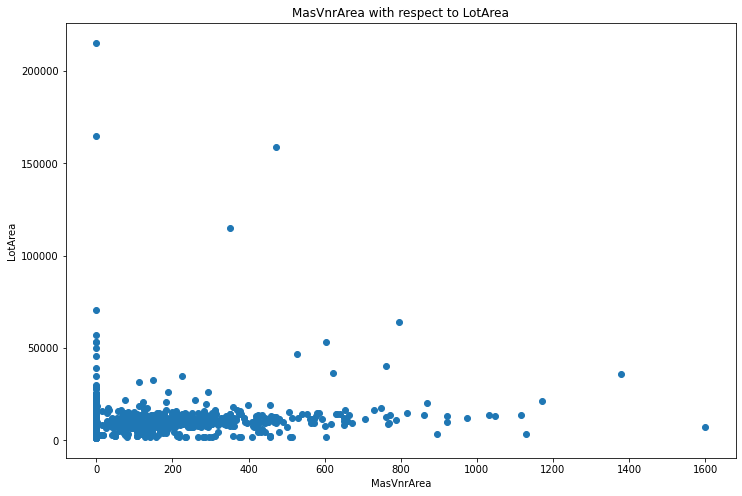

In [34]:
plt.figure(figsize=(12,8))
plt.title('MasVnrArea with respect to LotArea')
plt.scatter(x=train_df['MasVnrArea'],y=train_df['LotArea'])
plt.xlabel('MasVnrArea')
plt.ylabel('LotArea')
plt.show()

#### LotArea and MasVnrArea are independent almost

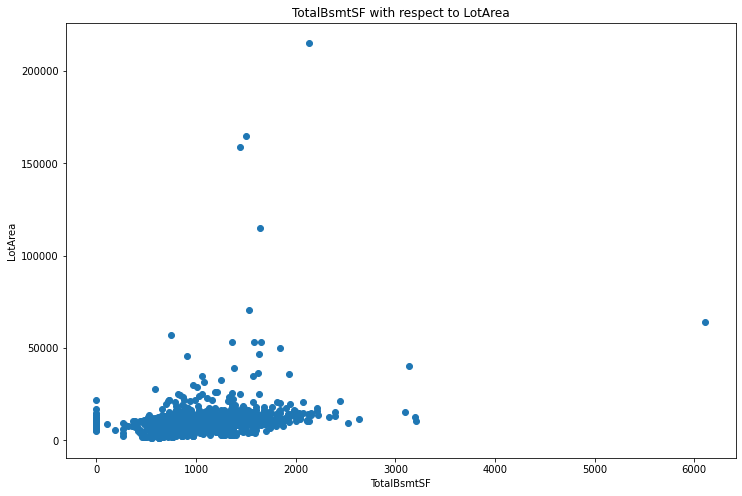

In [35]:
plt.figure(figsize=(12,8))
plt.title('TotalBsmtSF with respect to LotArea')
plt.scatter(x=train_df['TotalBsmtSF'],y=train_df['LotArea'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('LotArea')
plt.show()

##### Observations

1. TotalBasementArea and LotArea are almost independent 

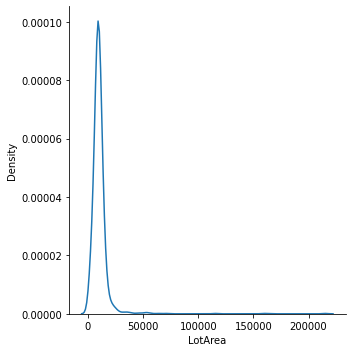

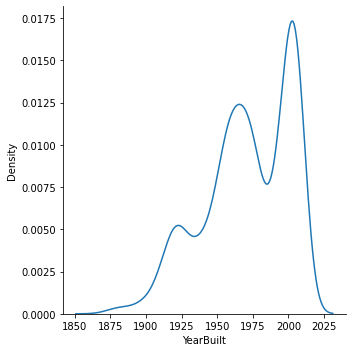

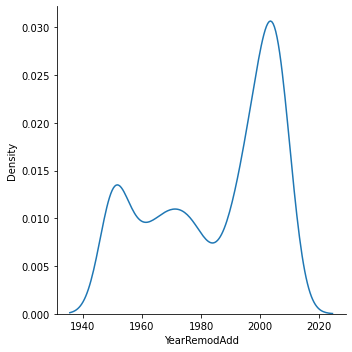

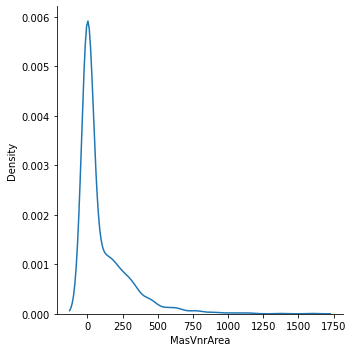

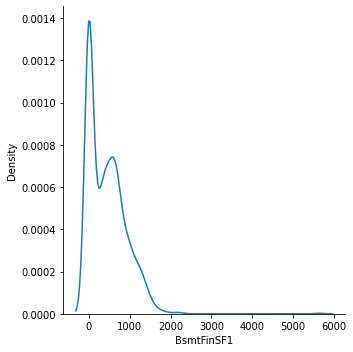

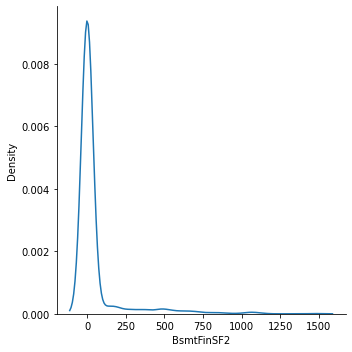

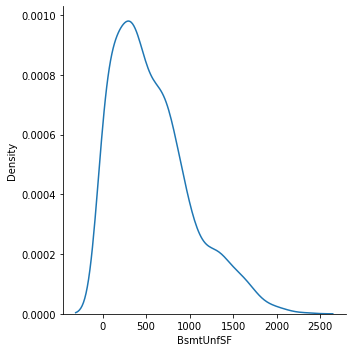

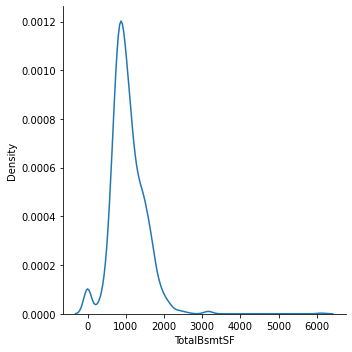

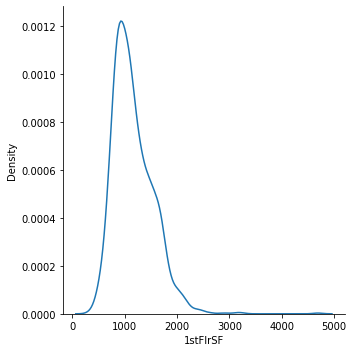

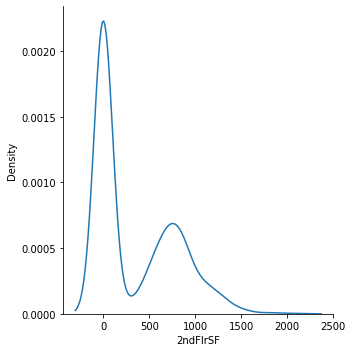

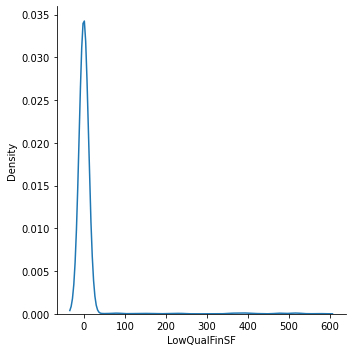

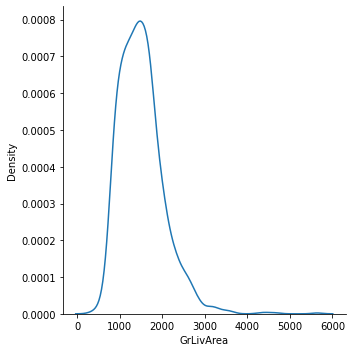

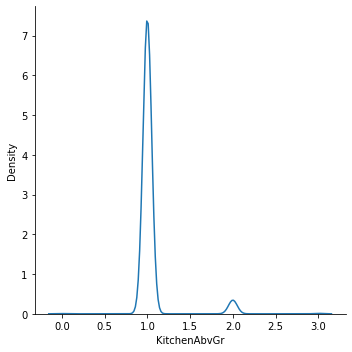

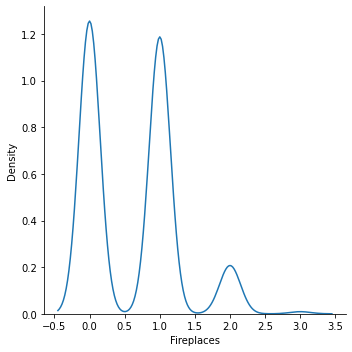

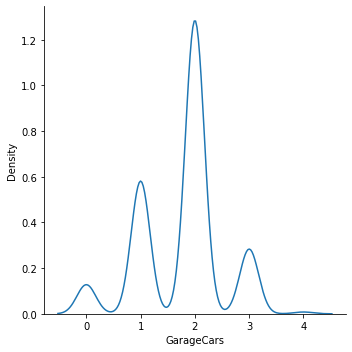

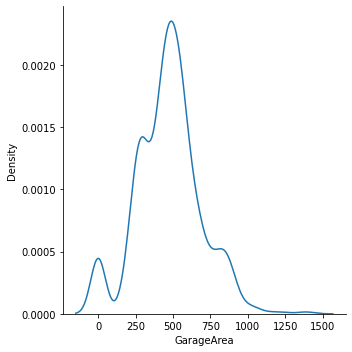

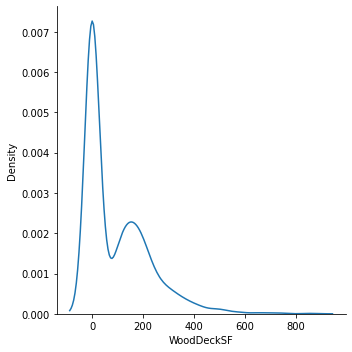

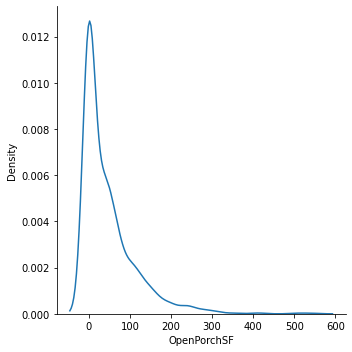

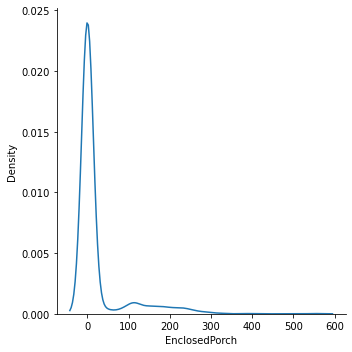

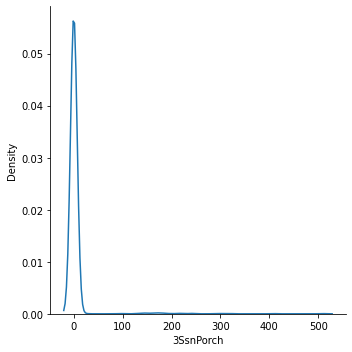

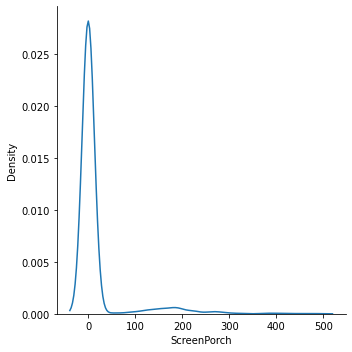

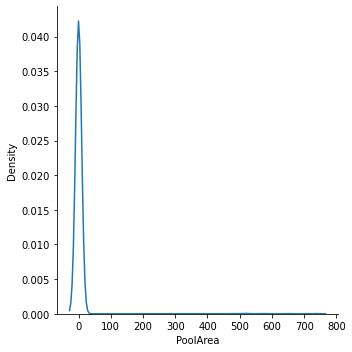

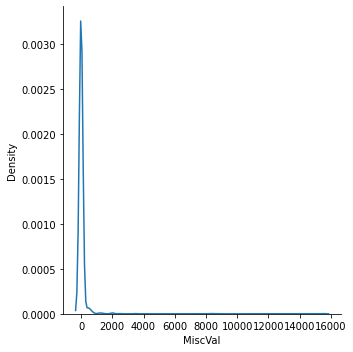

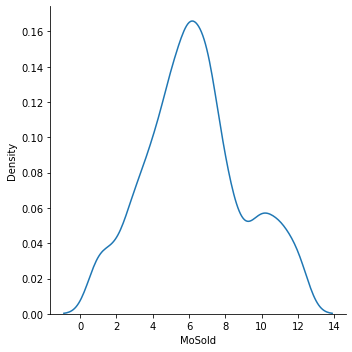

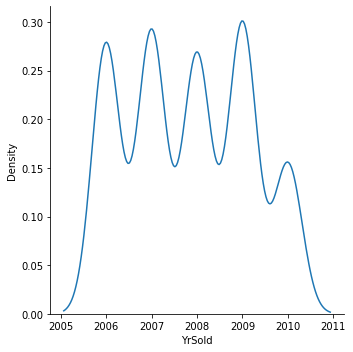

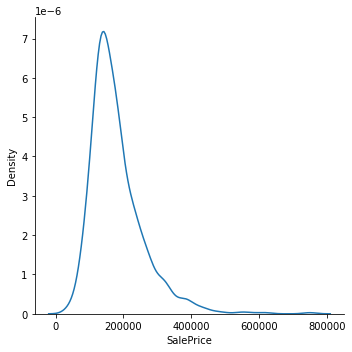

In [36]:
##### studying the distribution of numerical data
for c in numerical_cols:
    sb.displot(train_df[c],kind='kde')

##### Observations

1. LotArea distribution is left skewed

2. YearBuilt distribution is bimodal

3. YearRemodAdd is bimodal

4. MasVnrArea is left skewed distribution

5.  Basement Surface Area finished is bimodal

6. Basement Unifinished Area is left skewed.

7. TotalBasement Surface Area is left skewed.

8. 2nd floor surface area is bimodal

9. Garage Cars are multimodal

10. GarageArea is normally distributed

11. SalePrice has a left skewed distribution

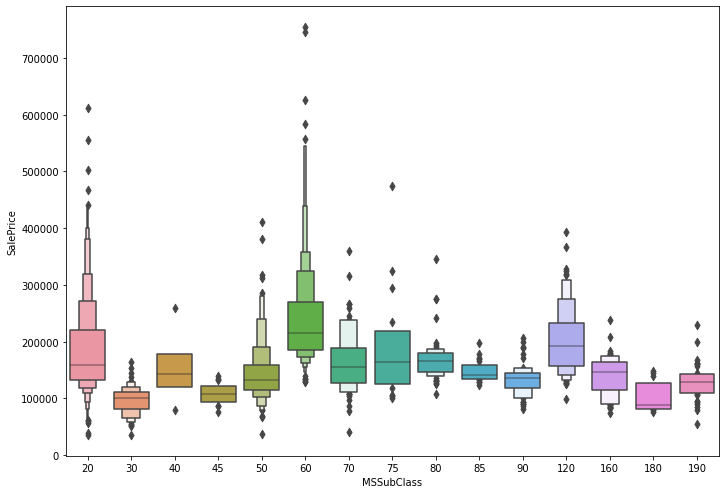

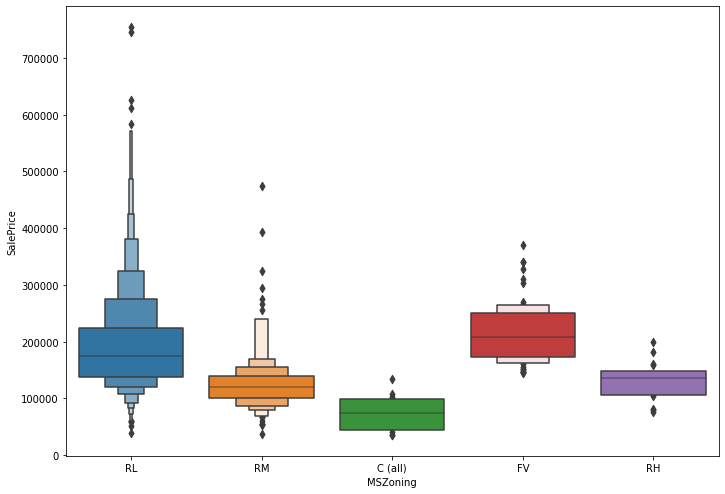

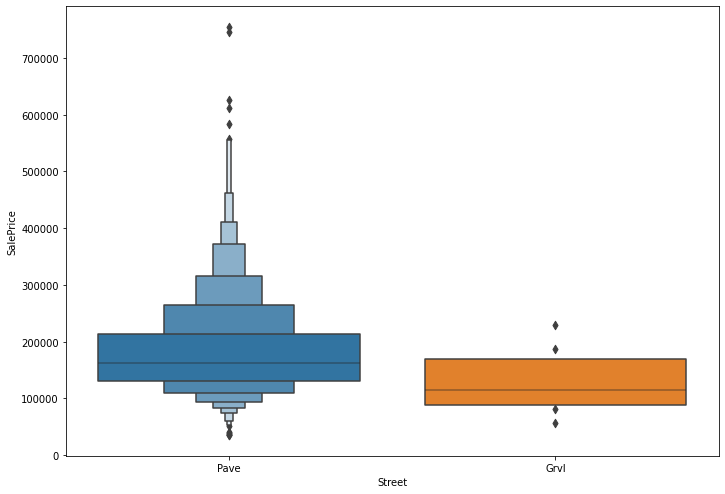

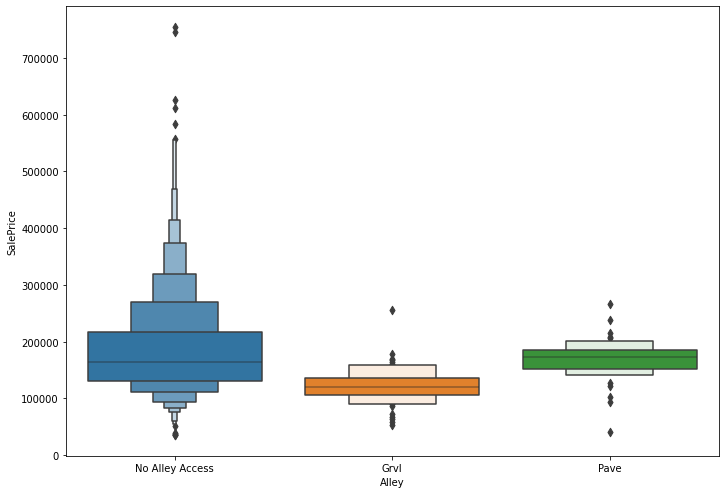

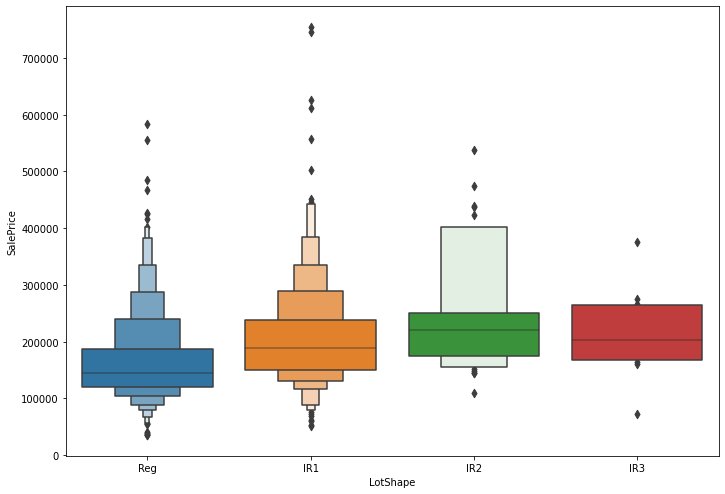

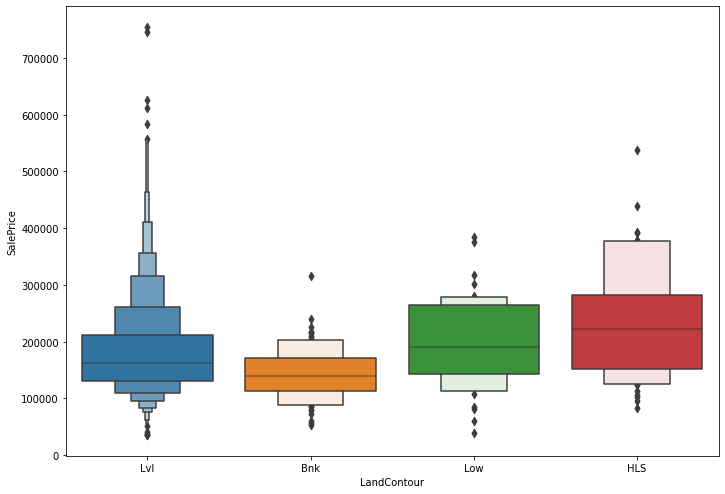

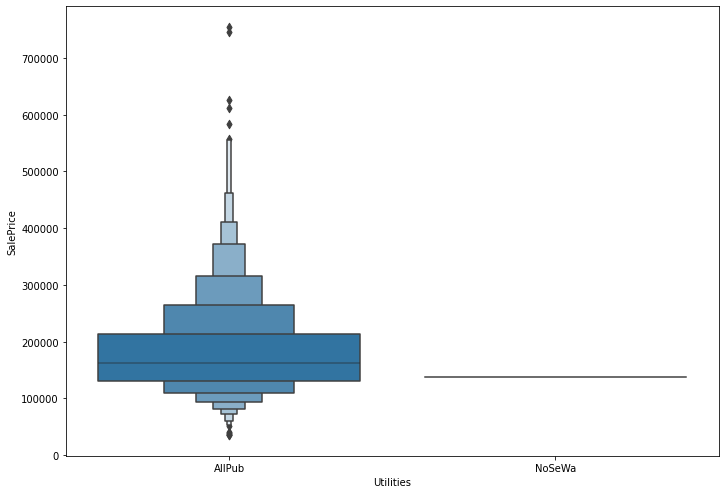

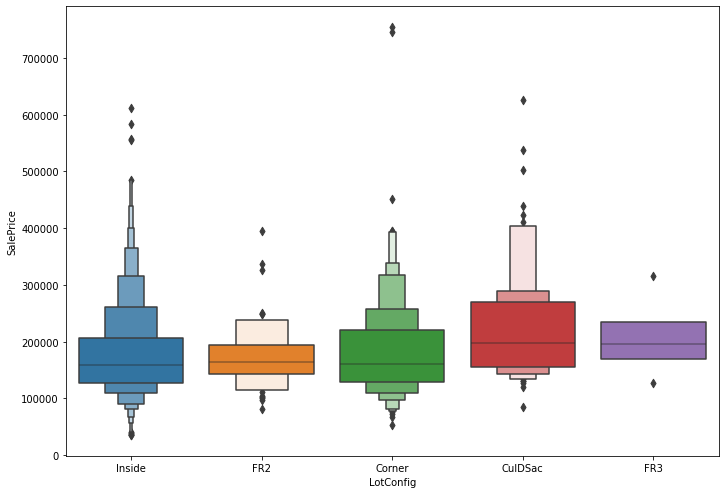

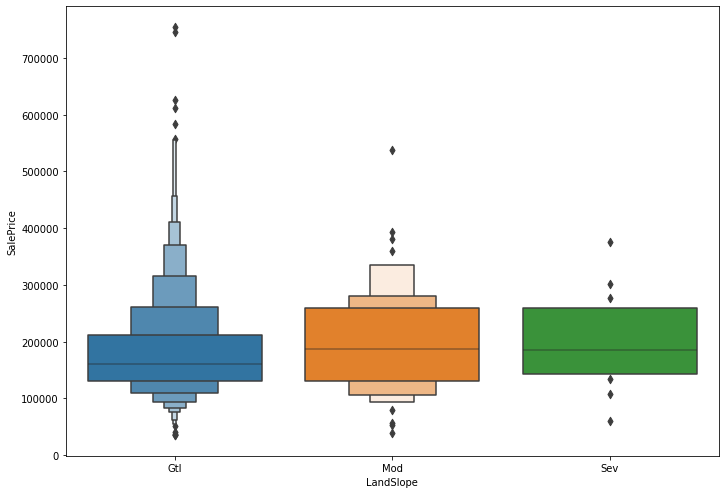

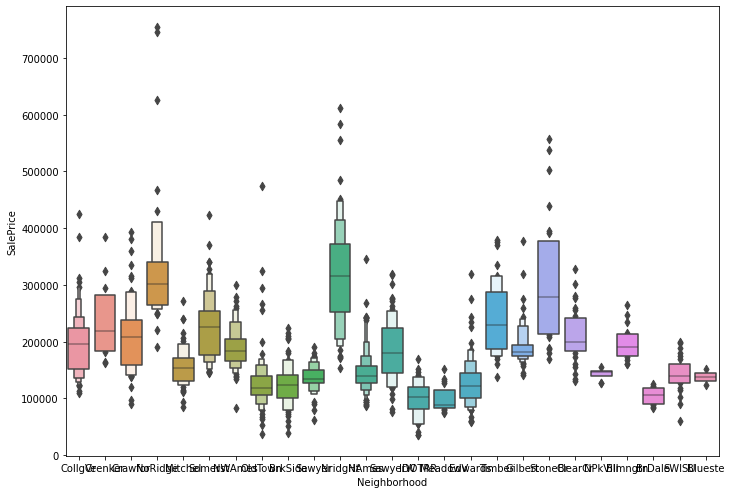

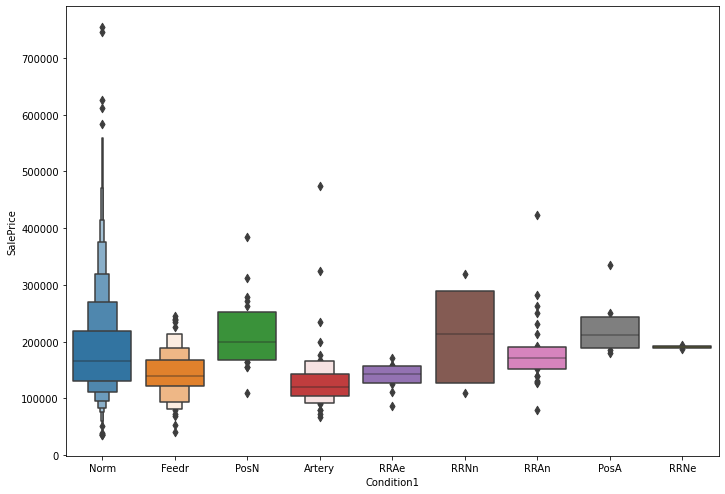

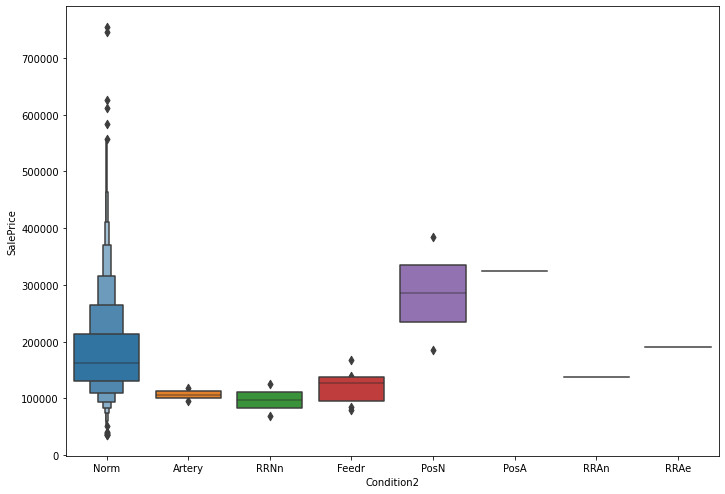

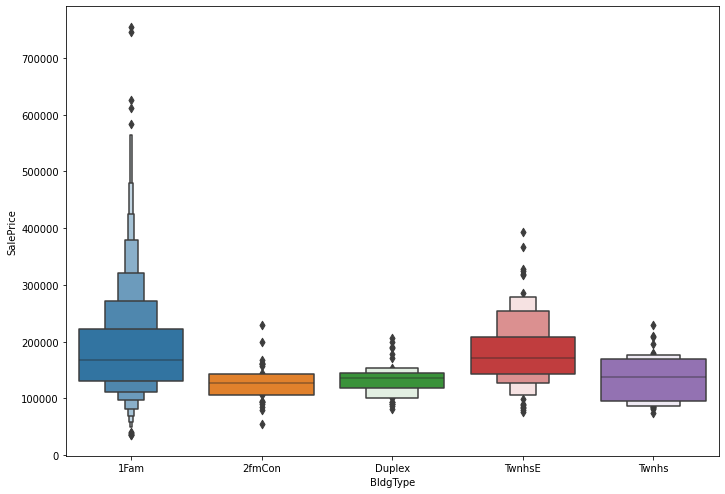

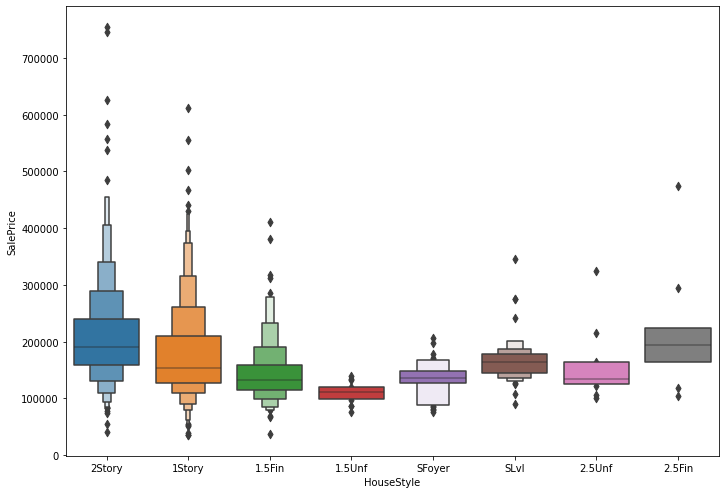

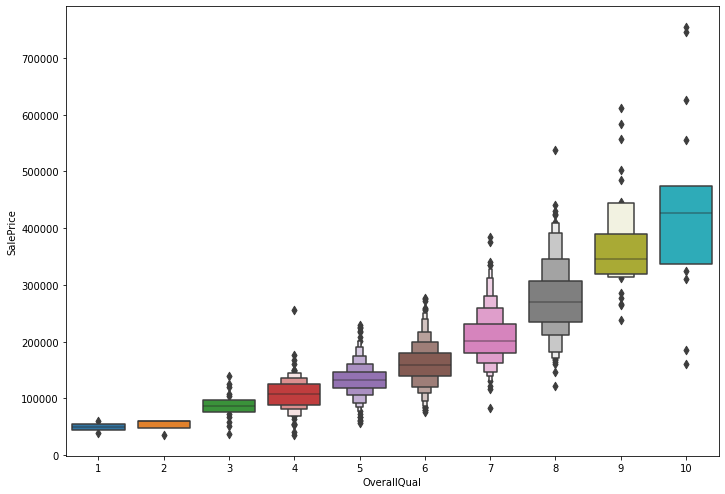

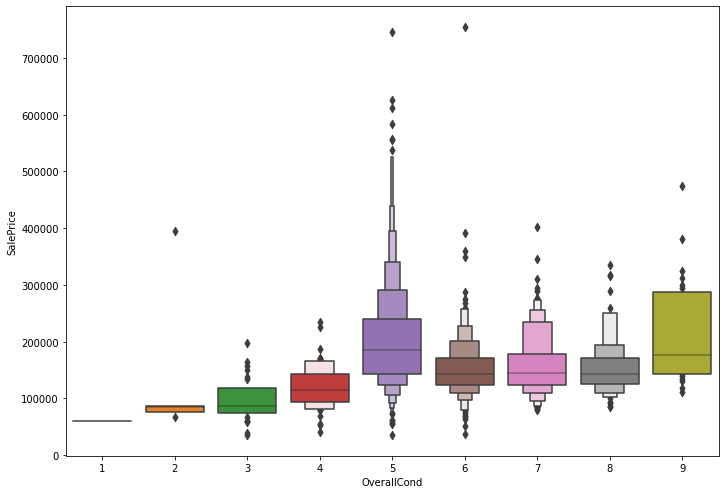

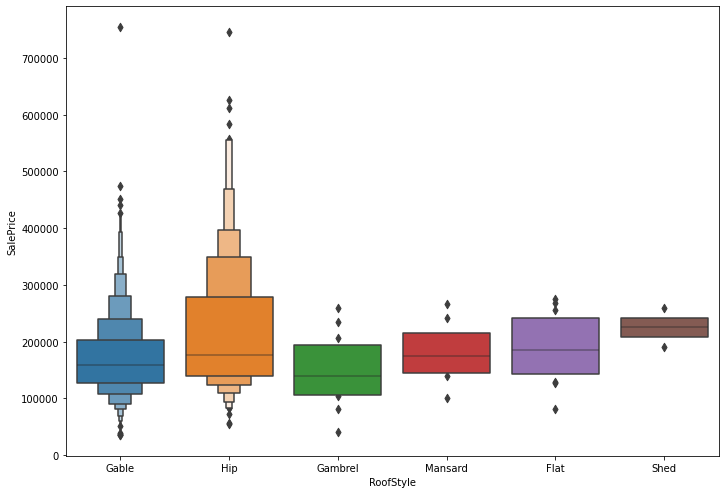

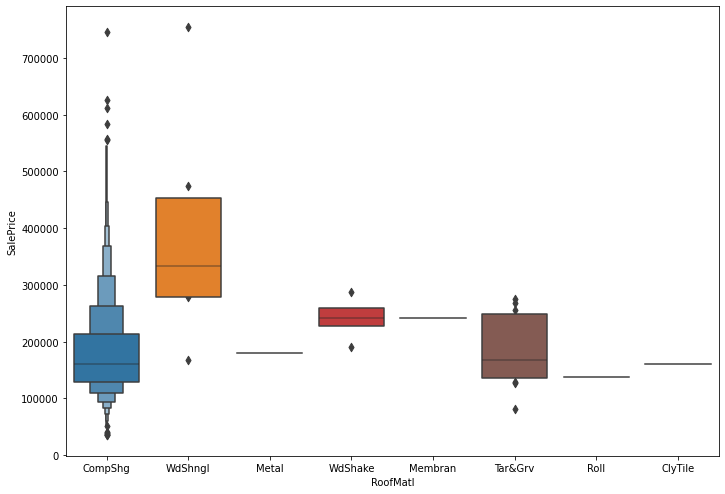

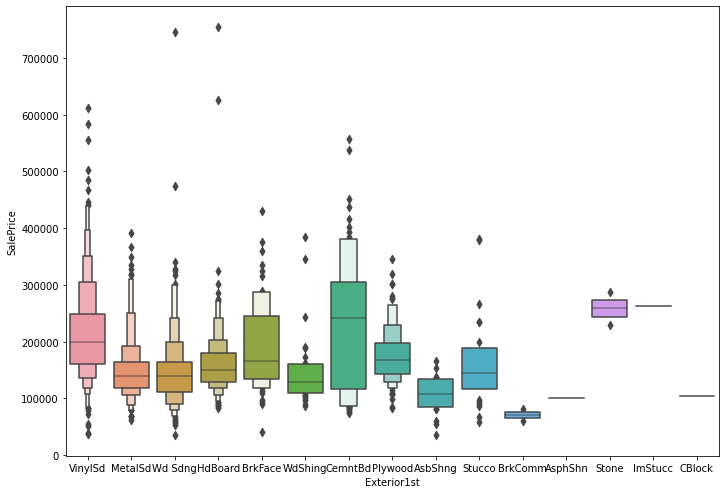

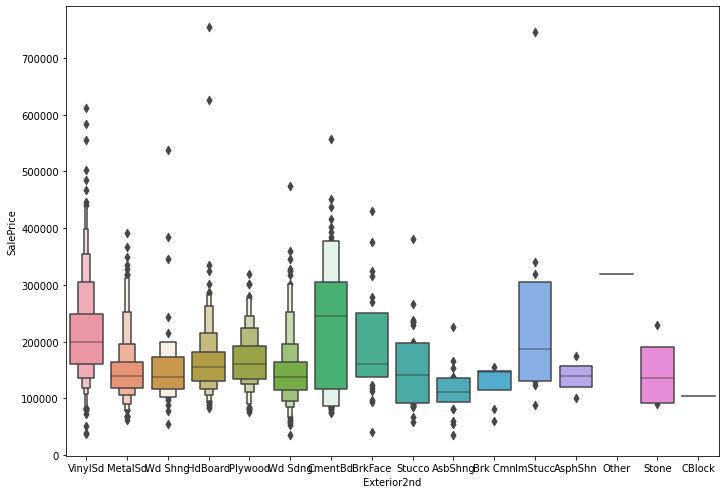

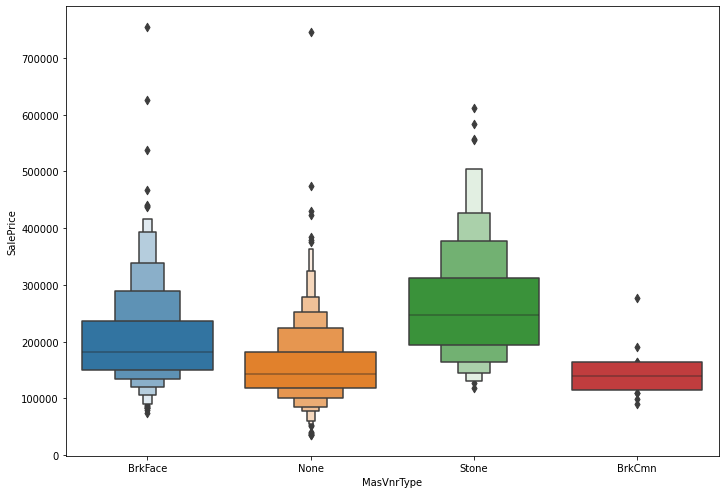

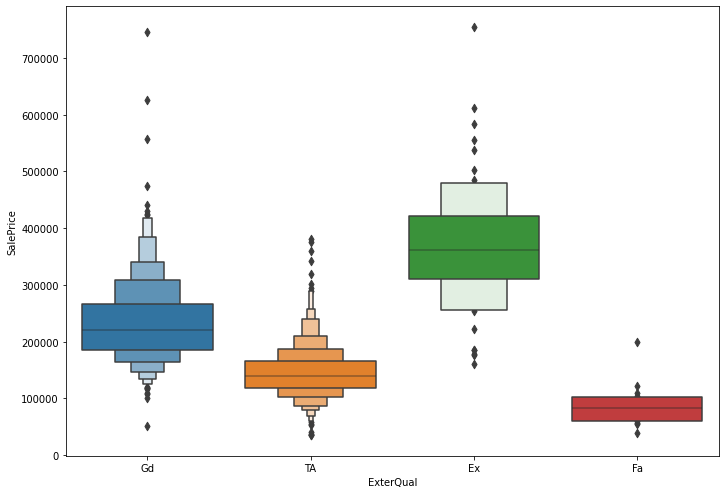

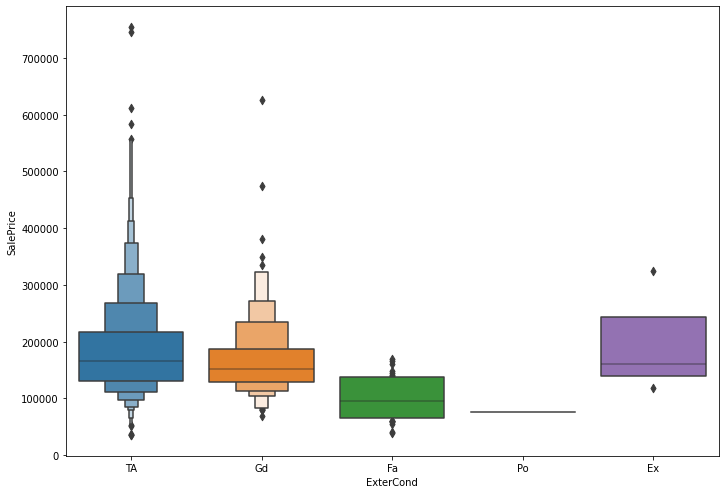

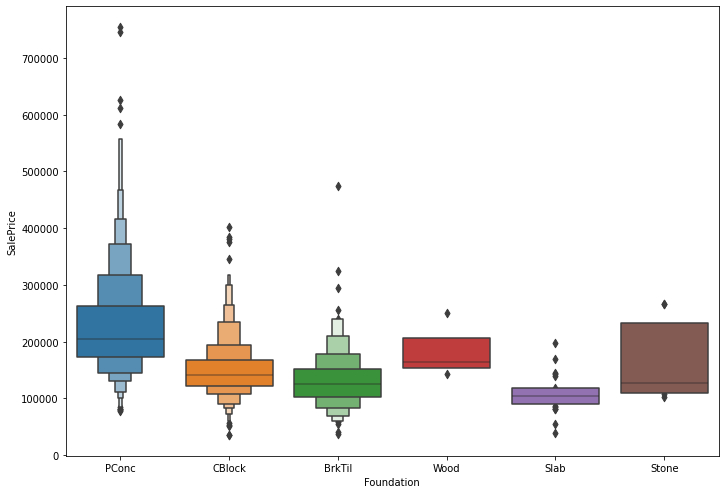

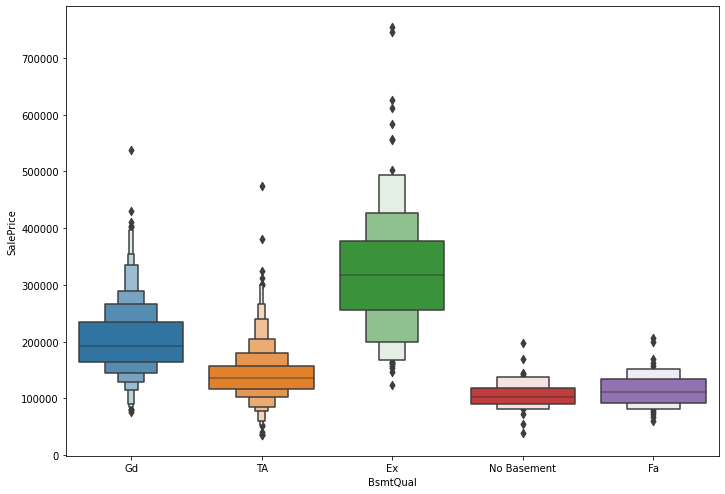

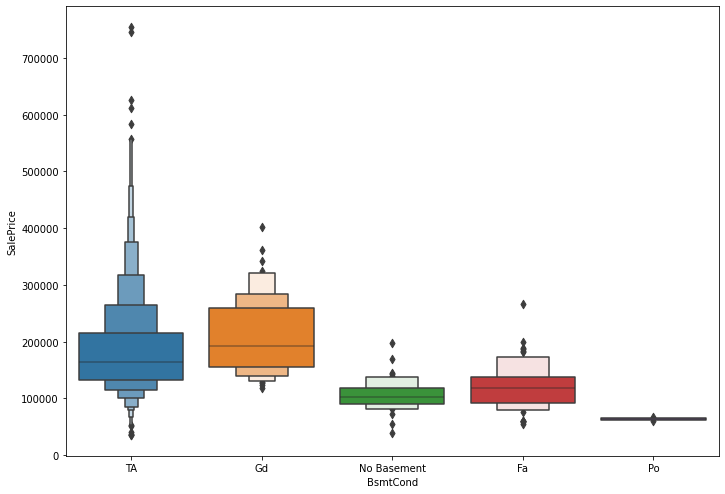

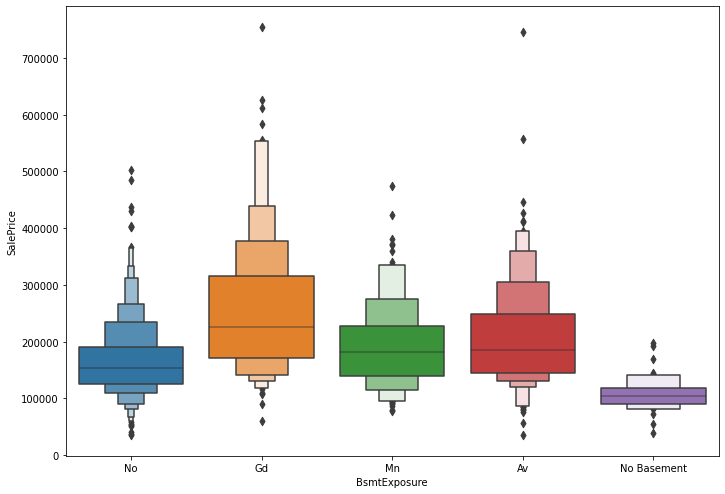

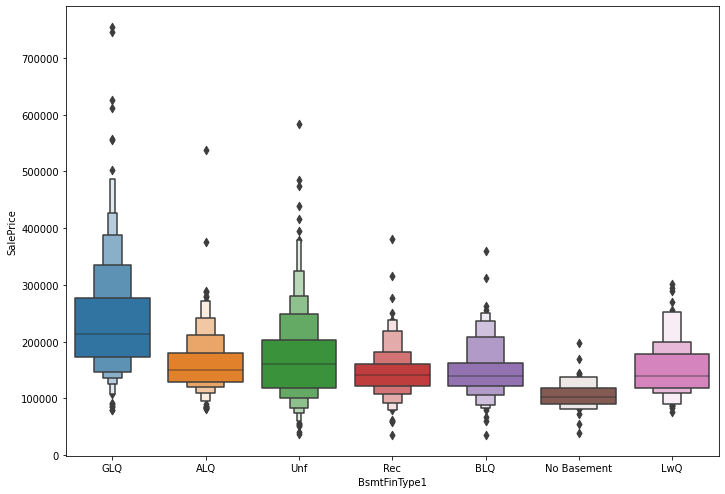

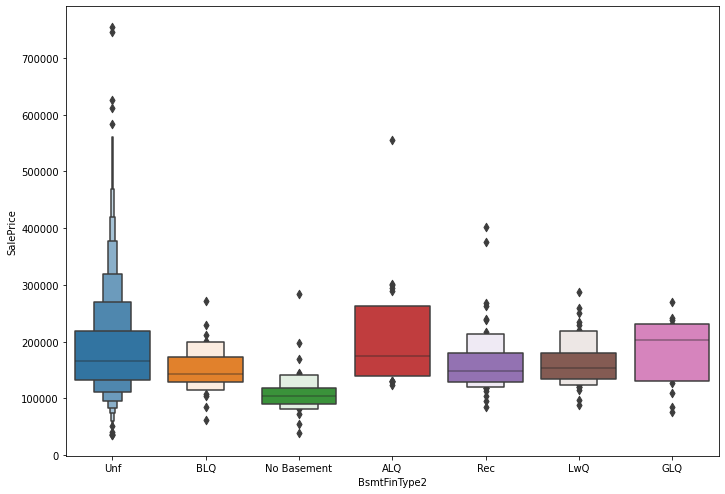

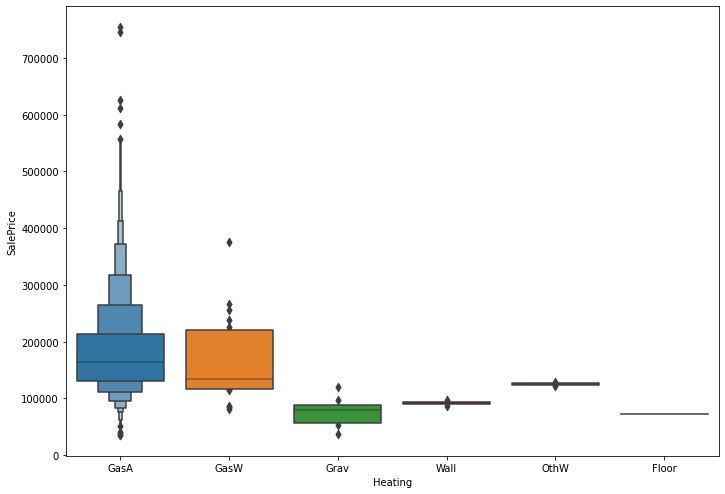

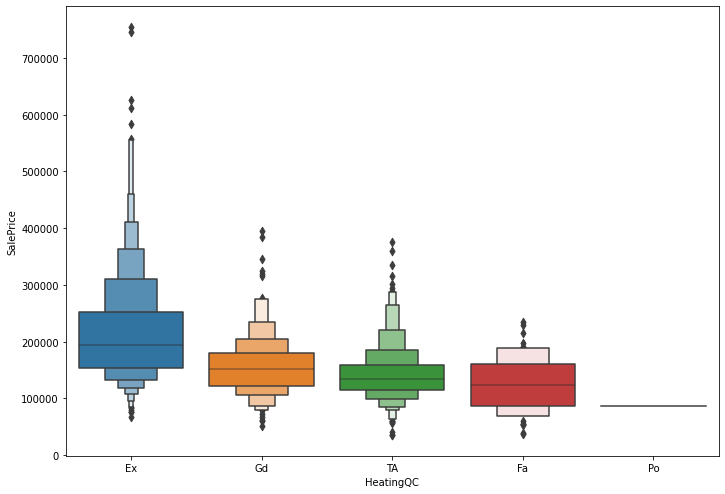

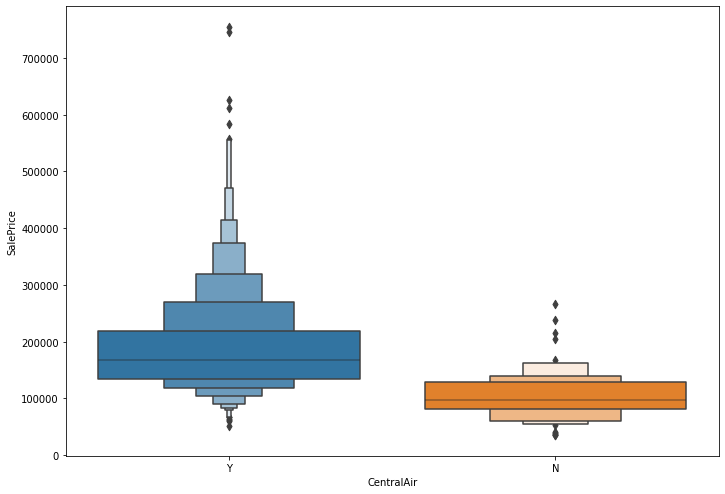

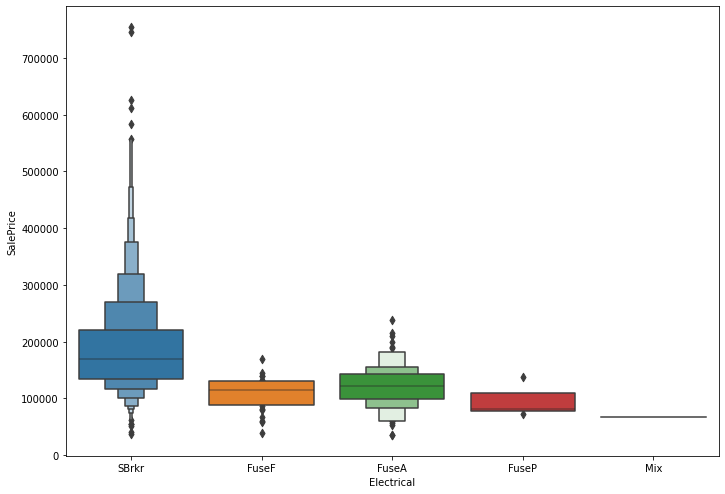

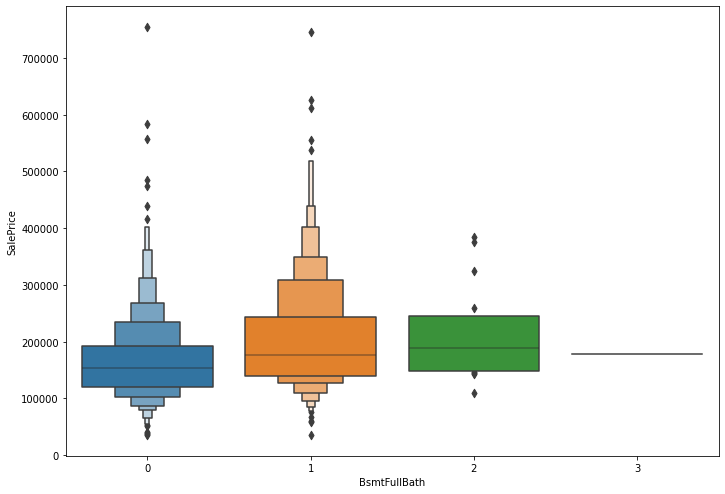

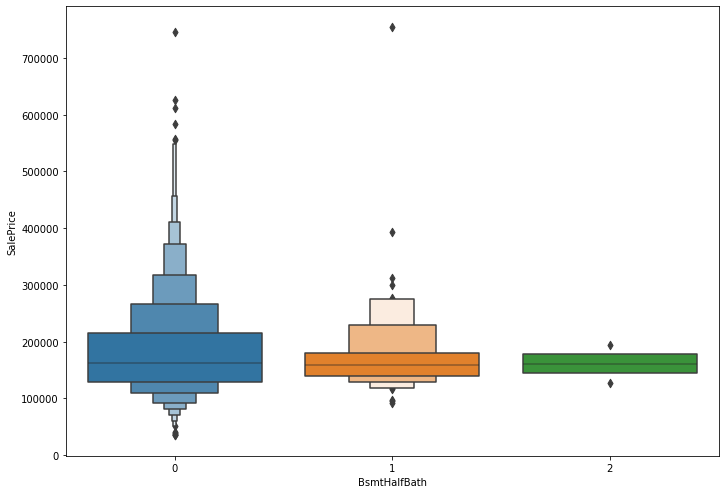

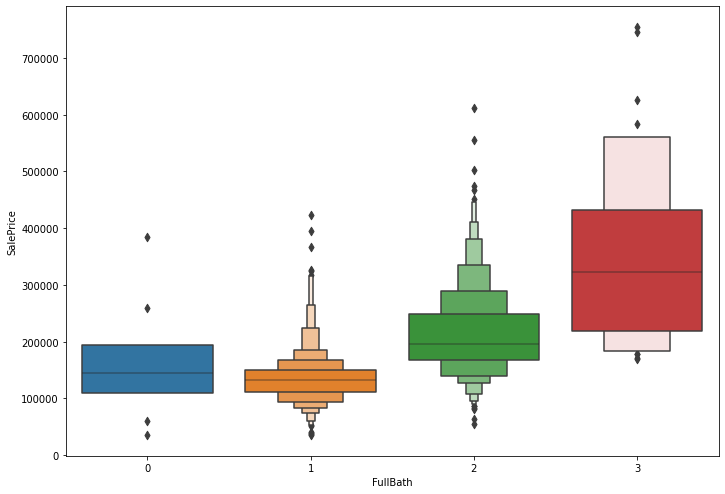

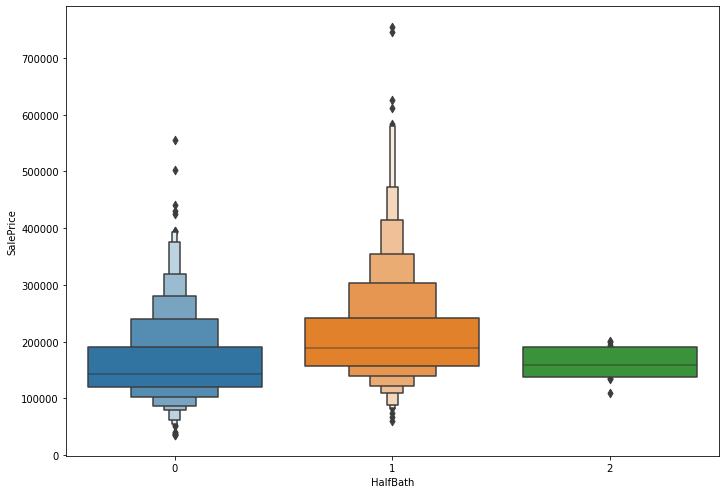

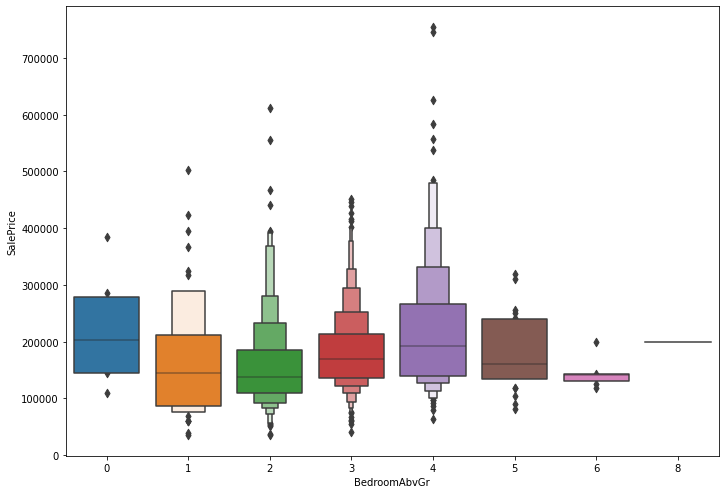

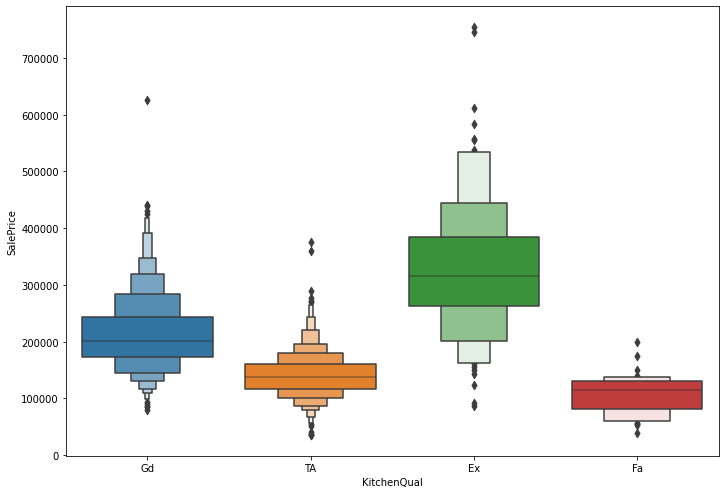

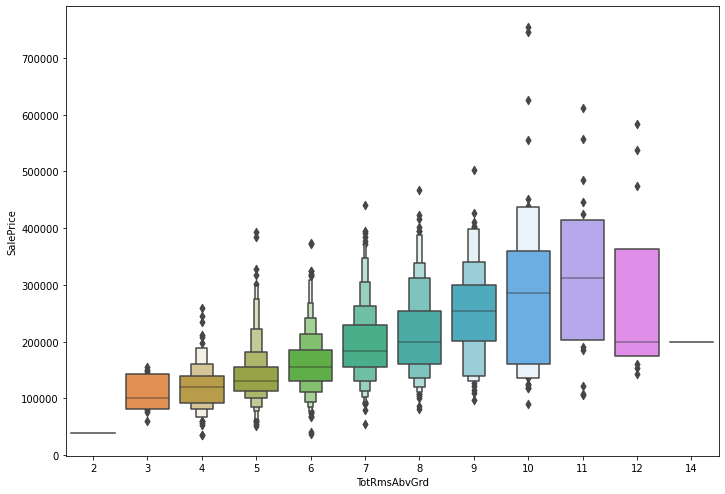

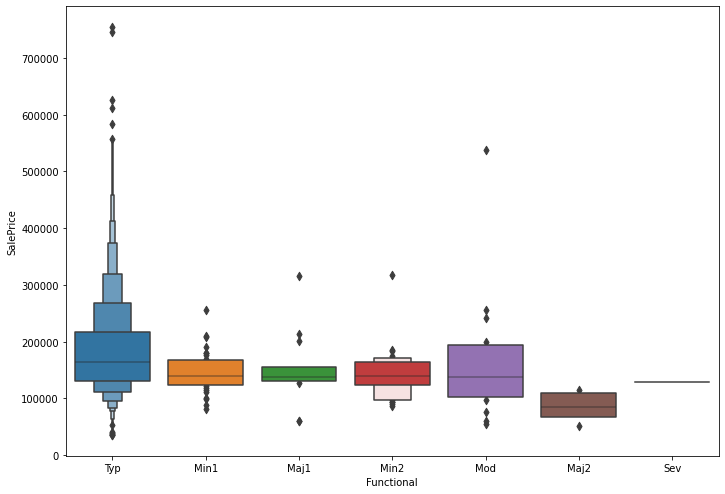

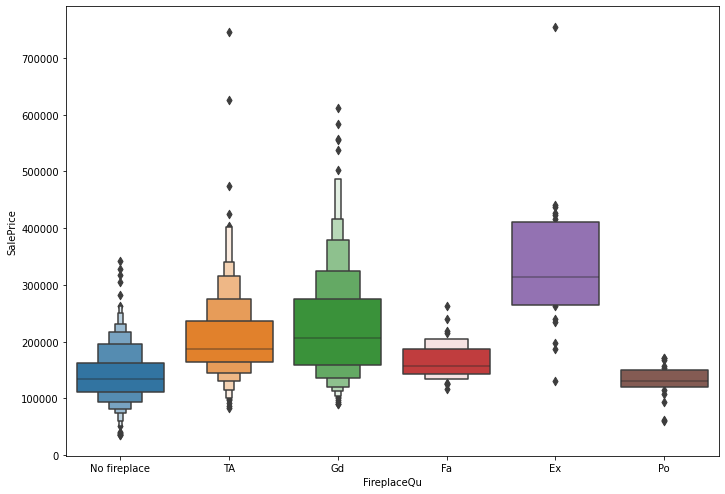

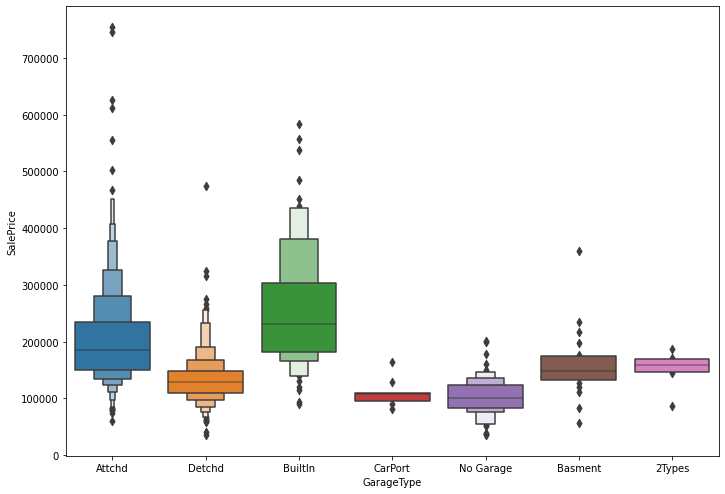

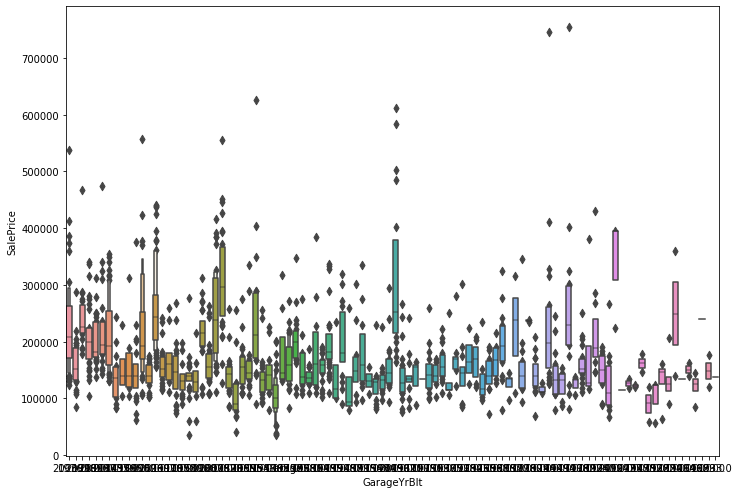

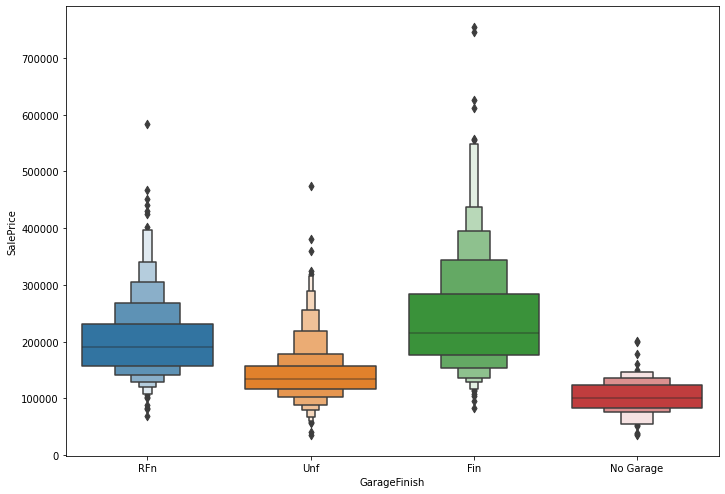

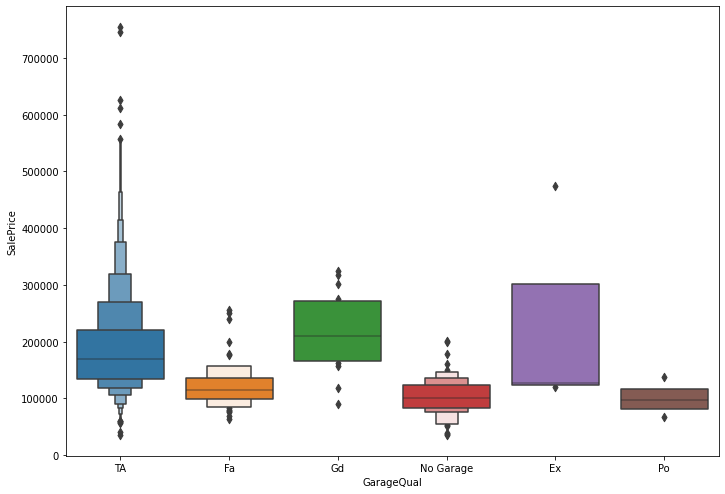

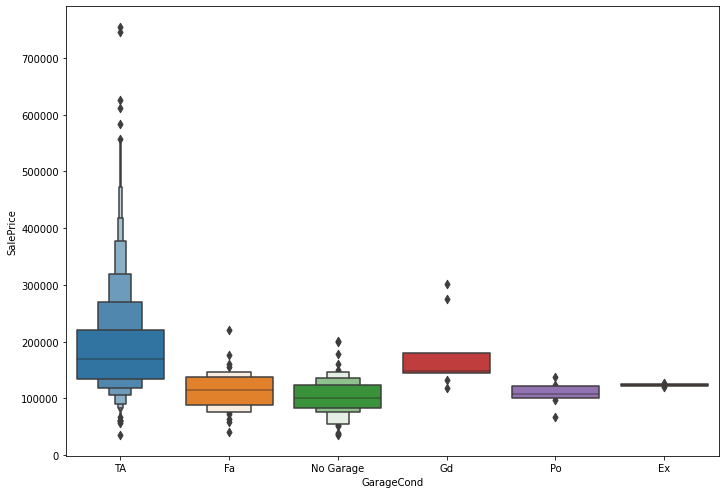

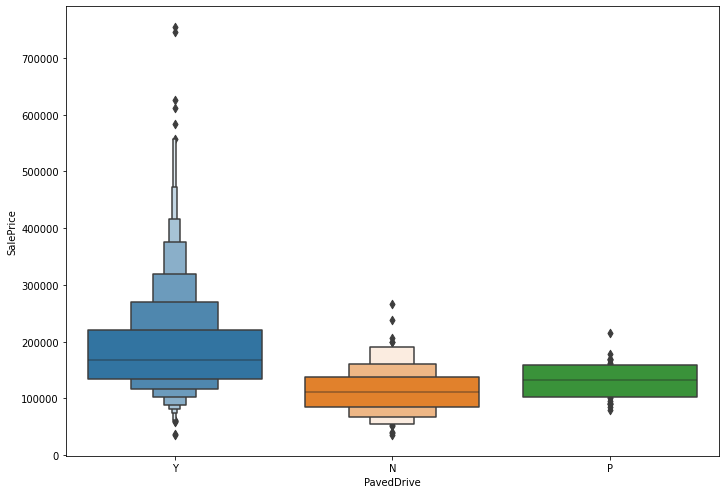

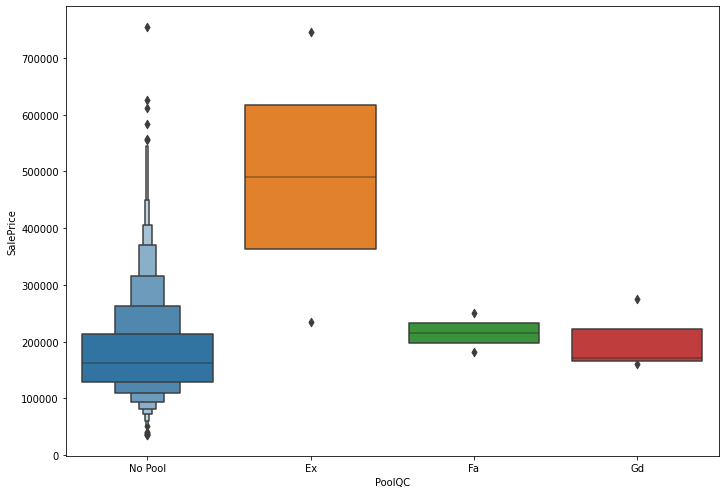

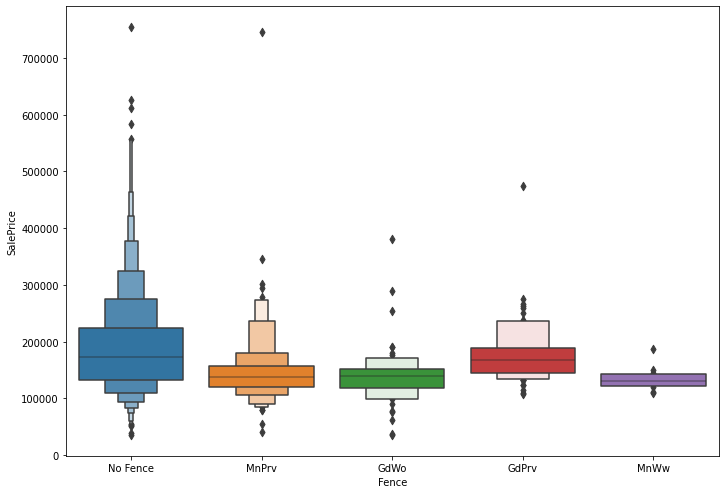

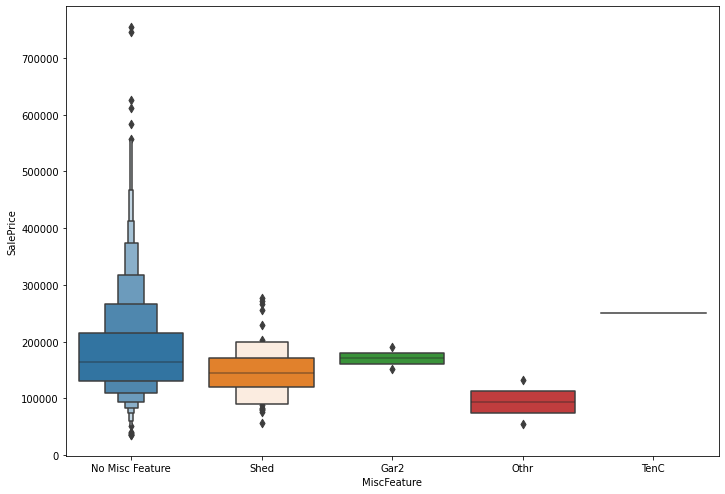

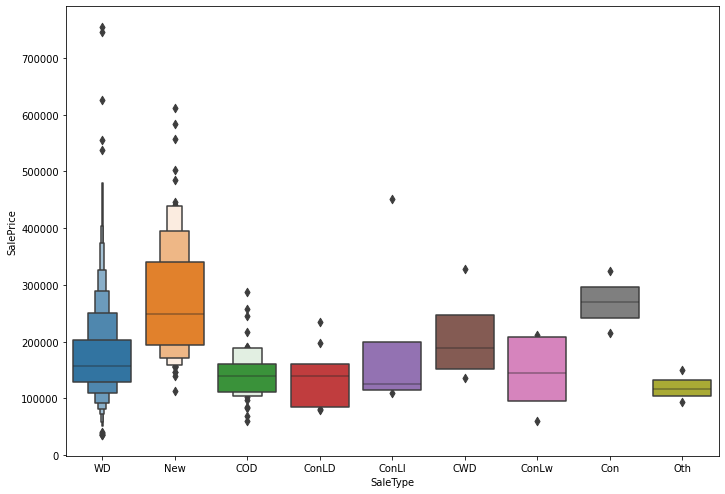

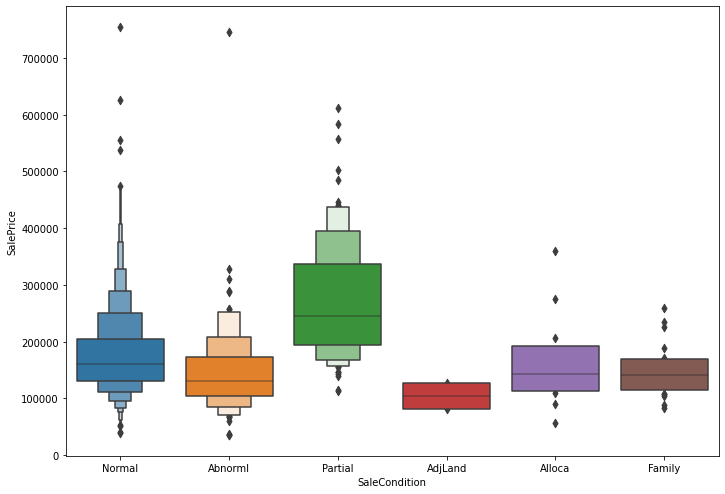

In [37]:
#### drawing a boxenplot for each categorical data w.r.t saleprice
for c in categorical_cols:
    sb.boxenplot(data=train_df,x=c,y='SalePrice')
    plt.show()

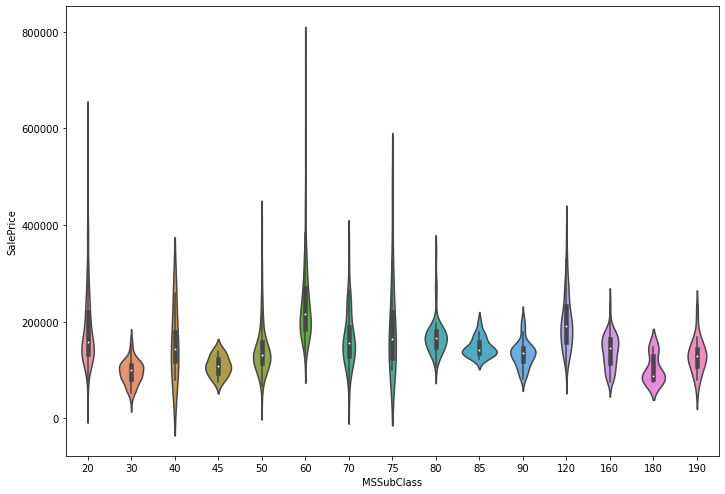

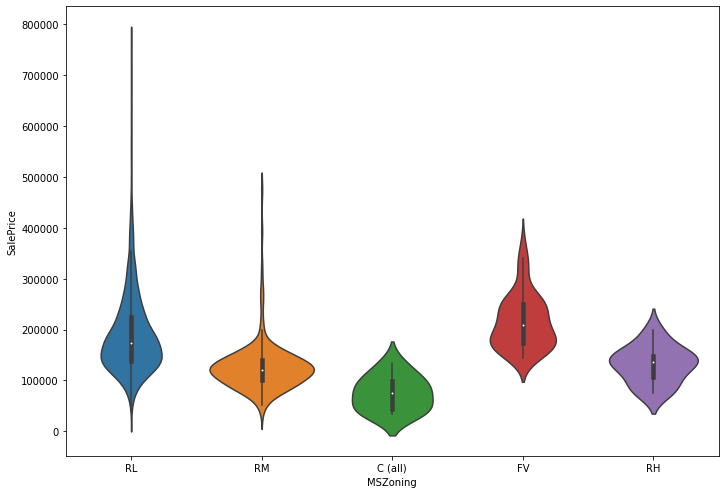

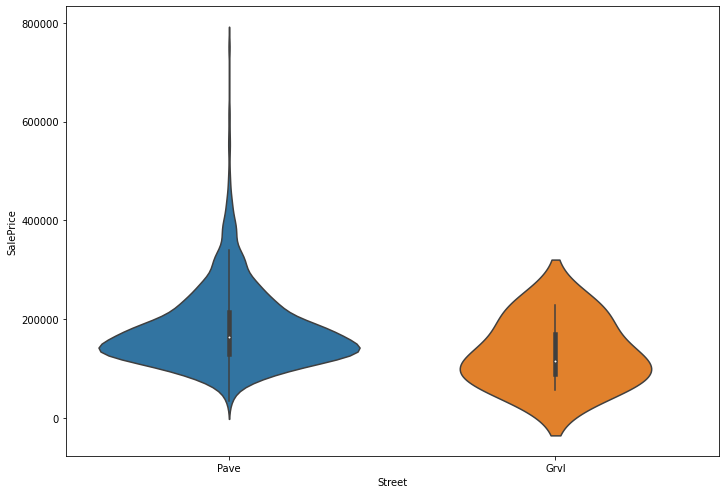

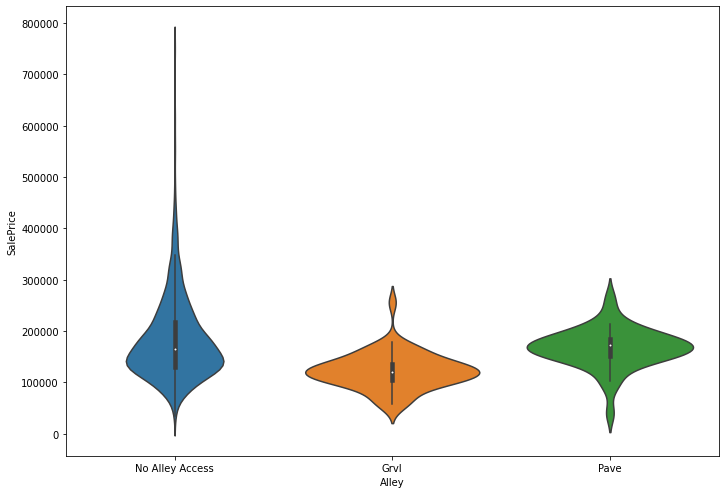

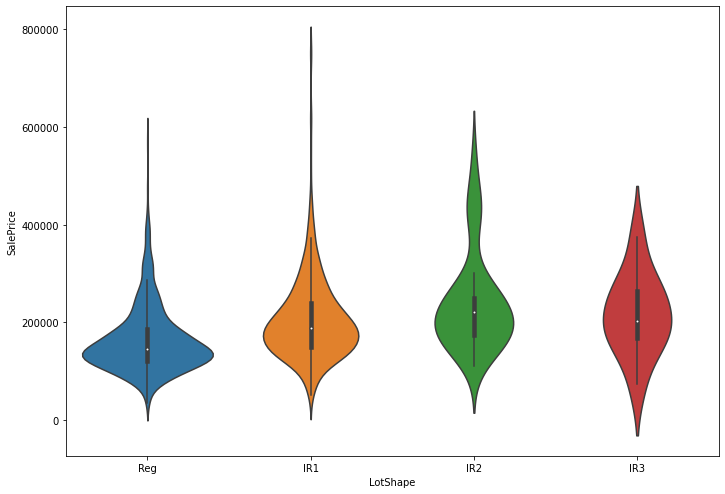

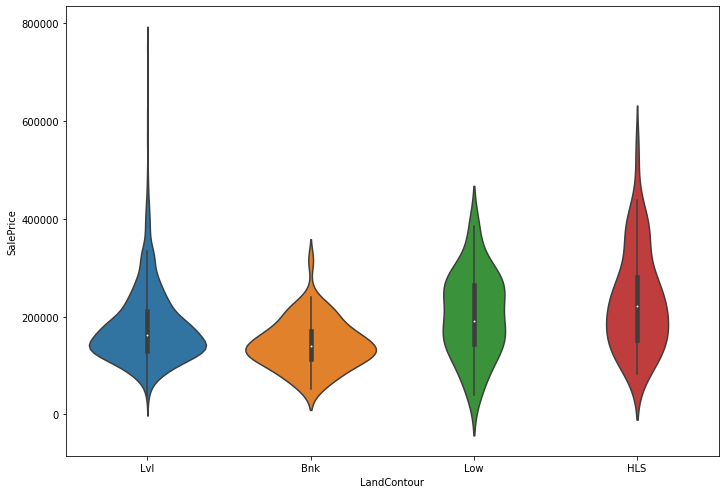

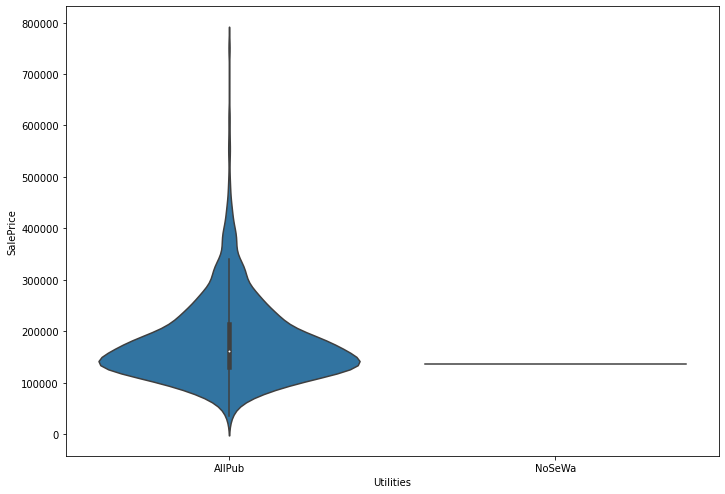

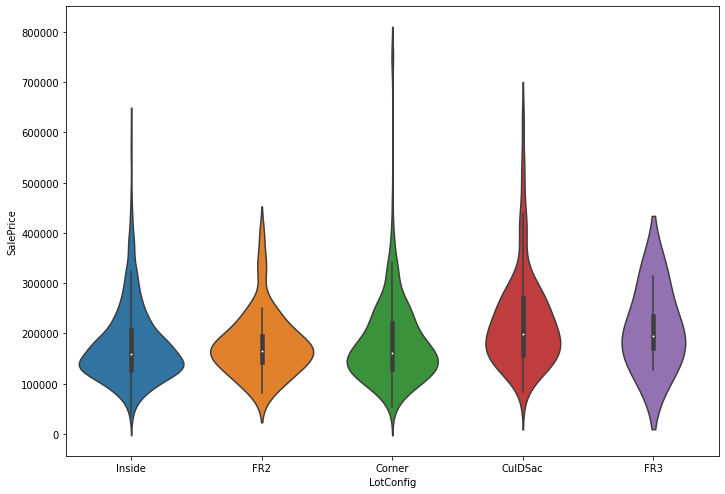

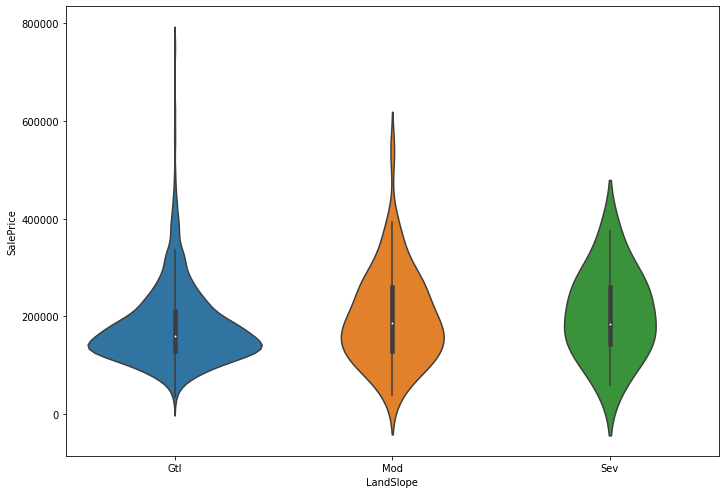

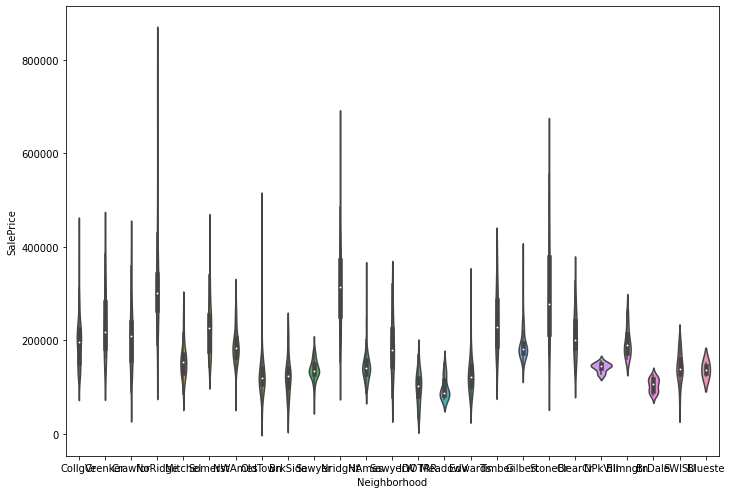

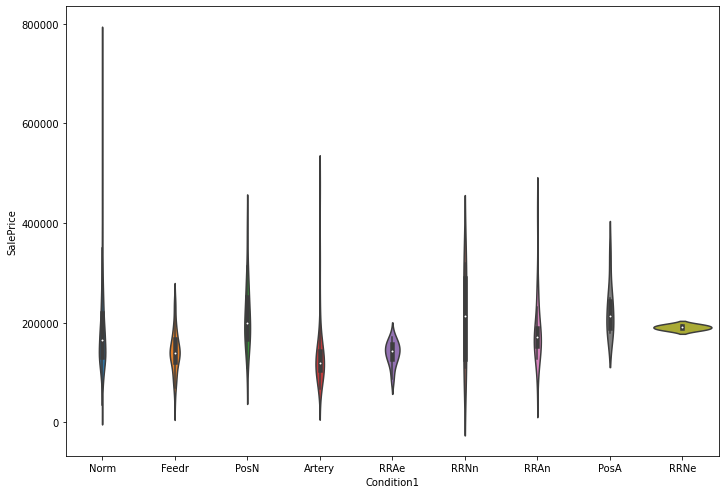

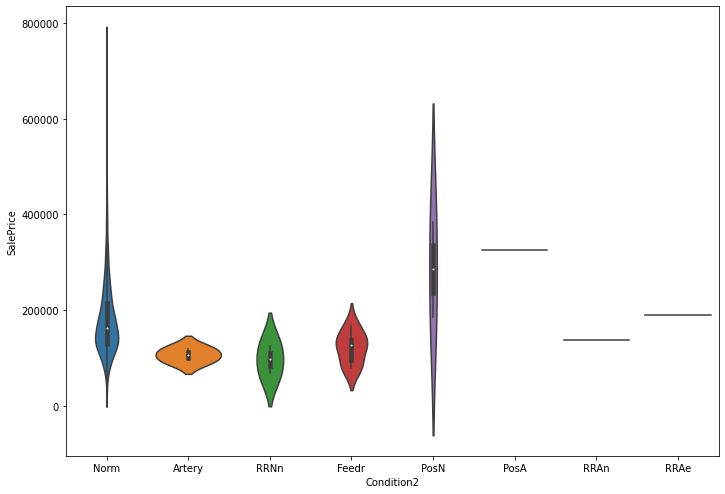

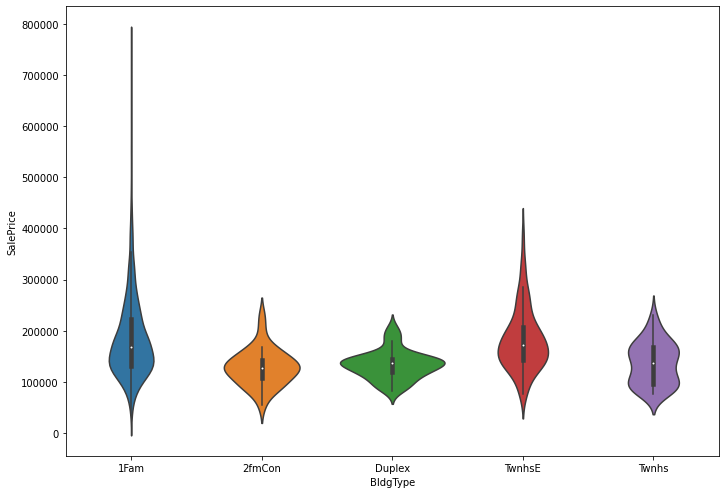

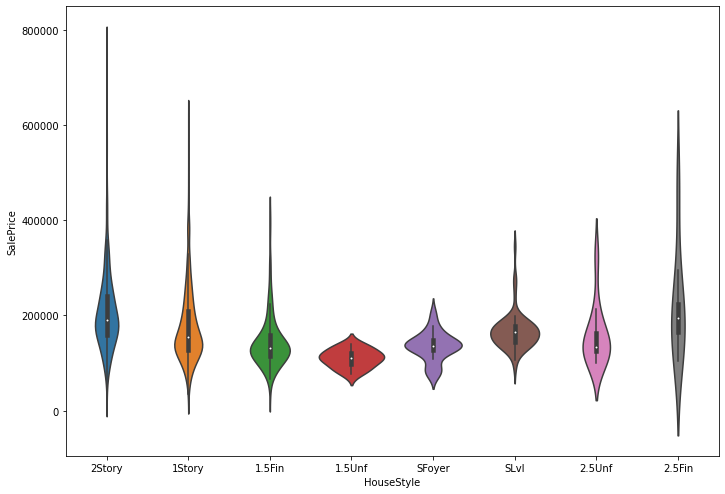

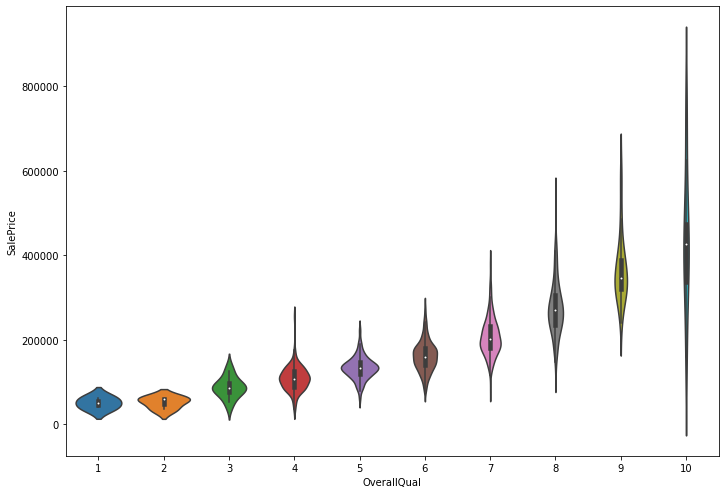

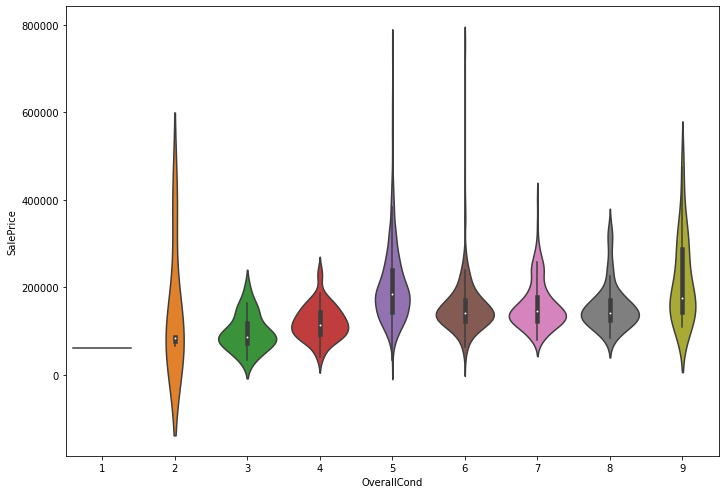

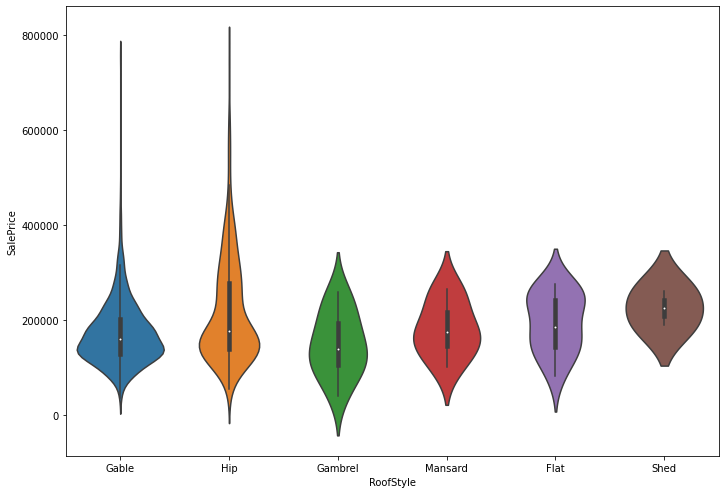

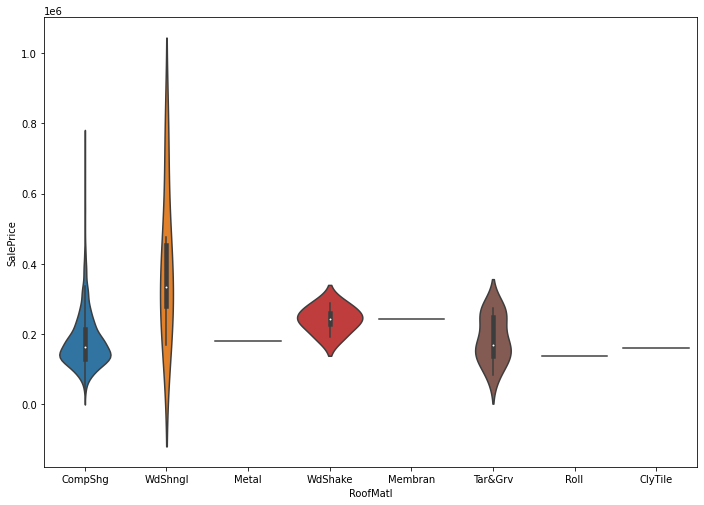

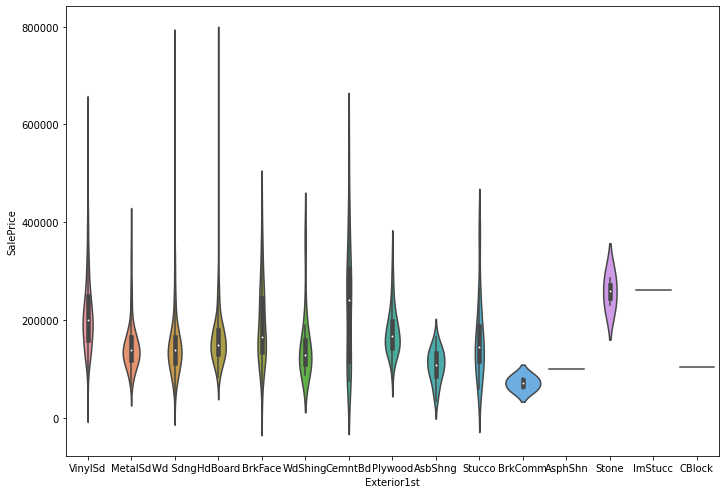

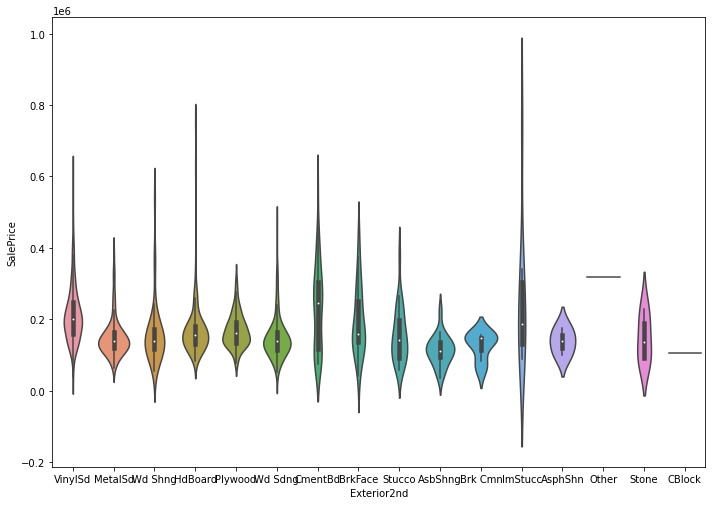

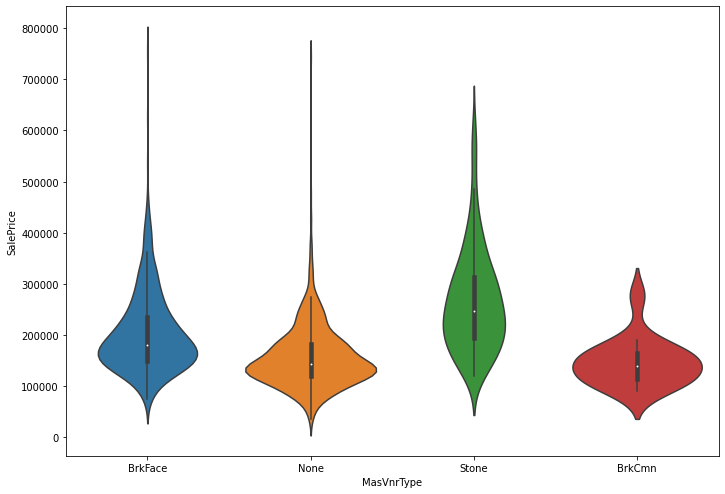

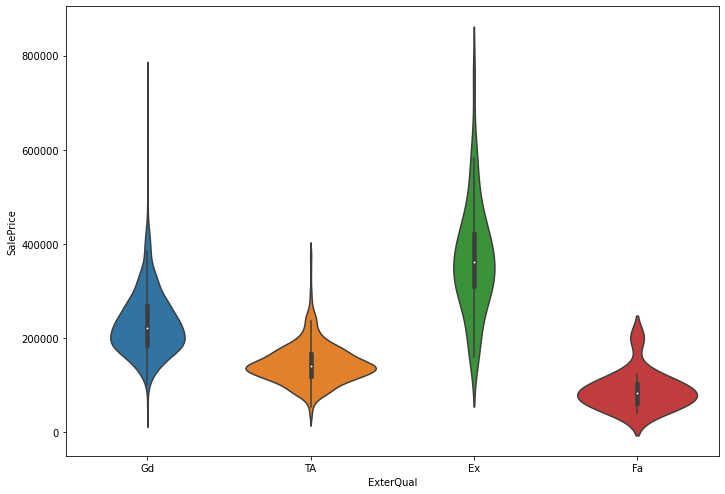

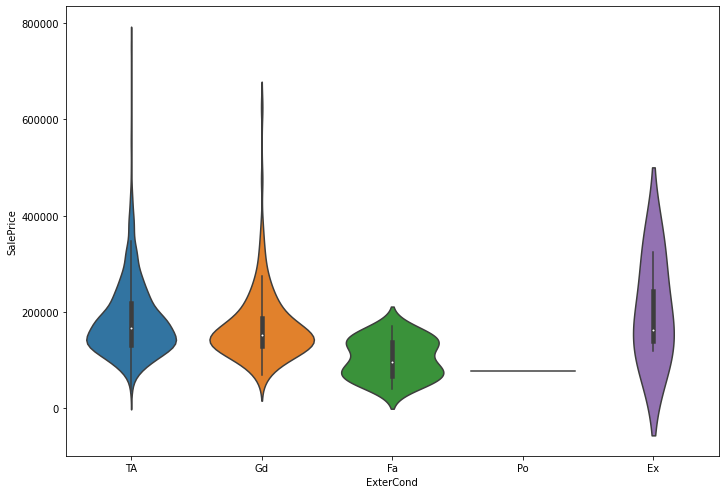

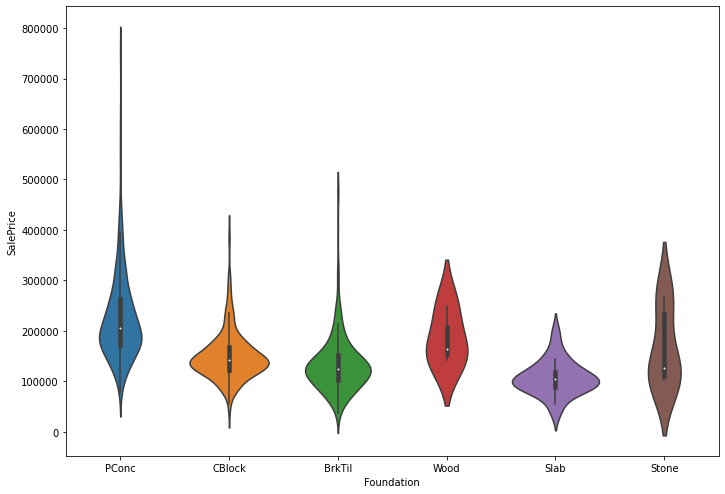

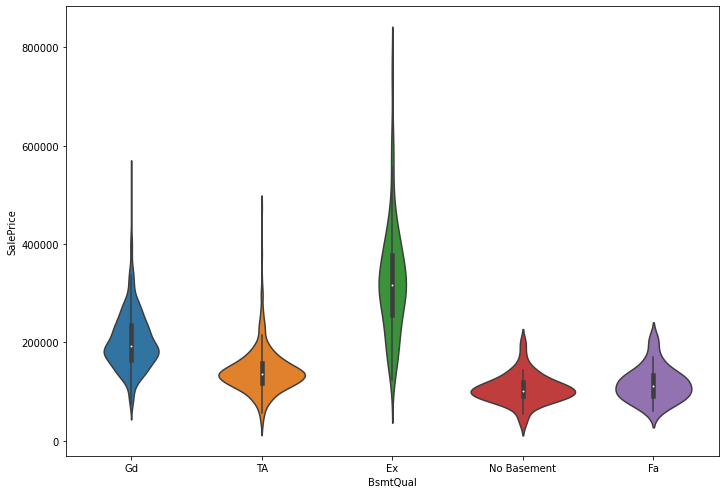

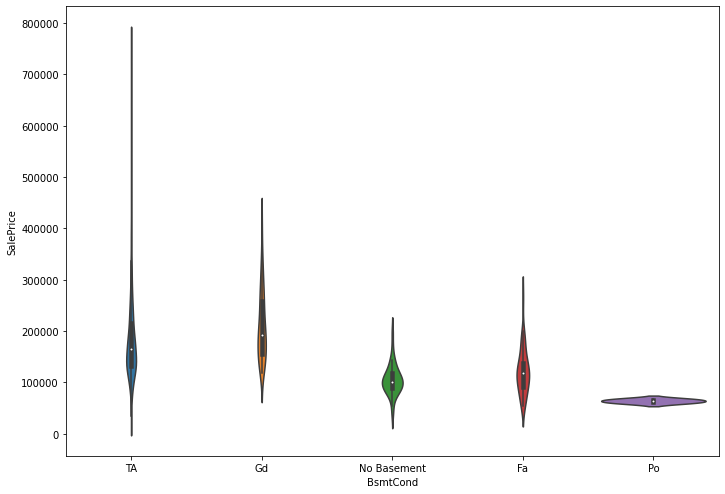

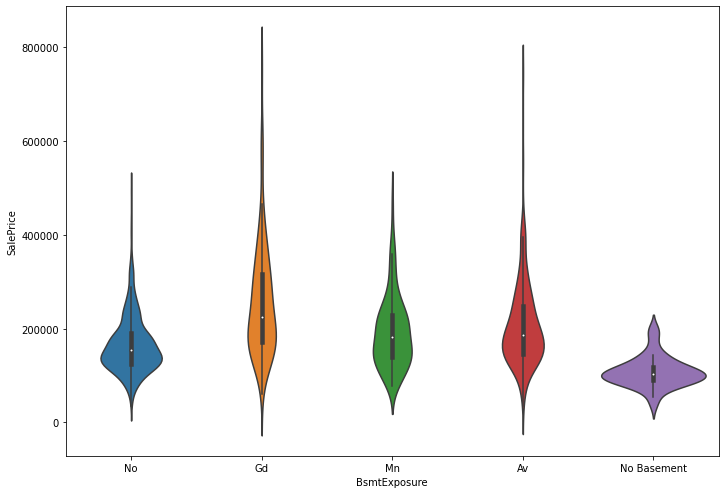

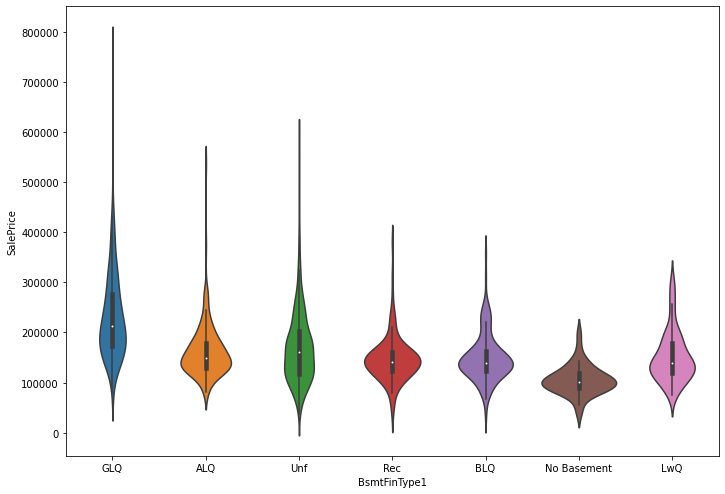

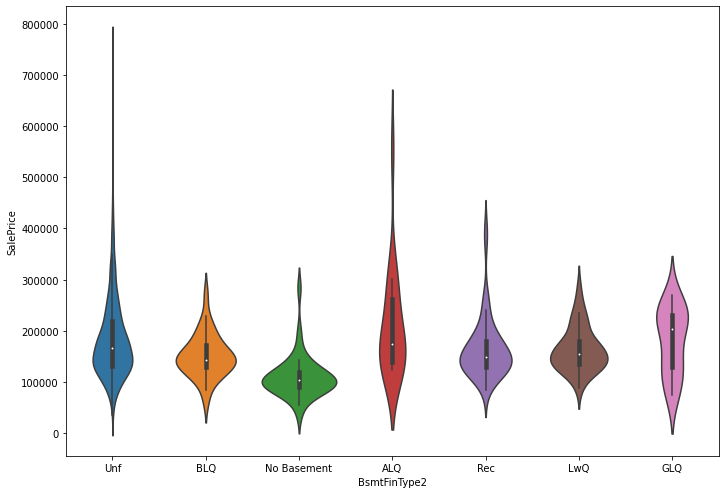

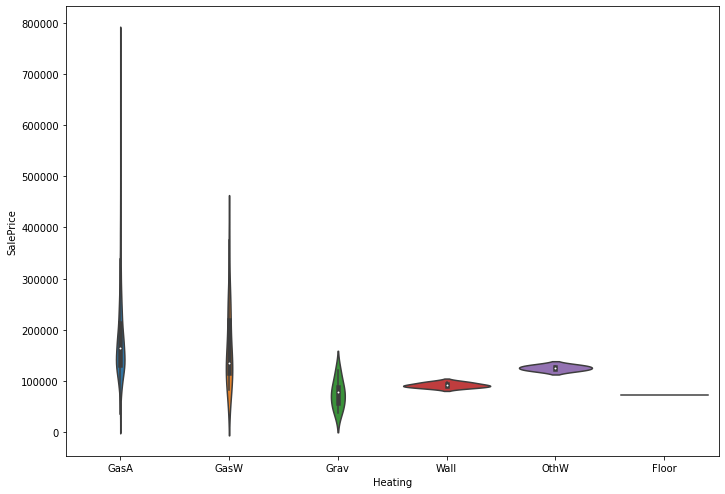

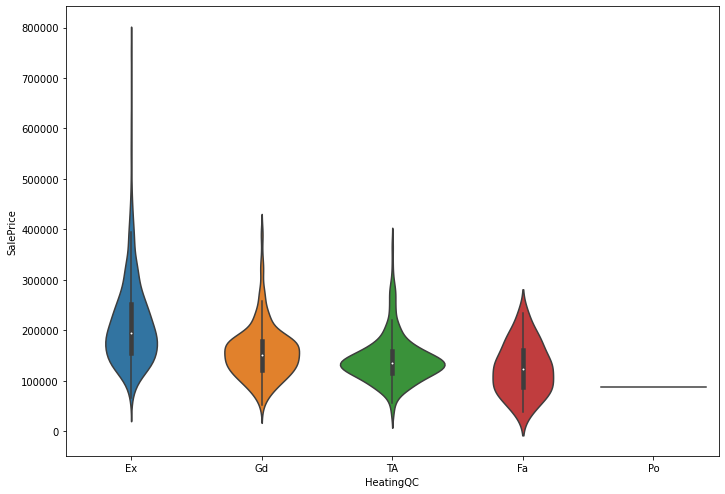

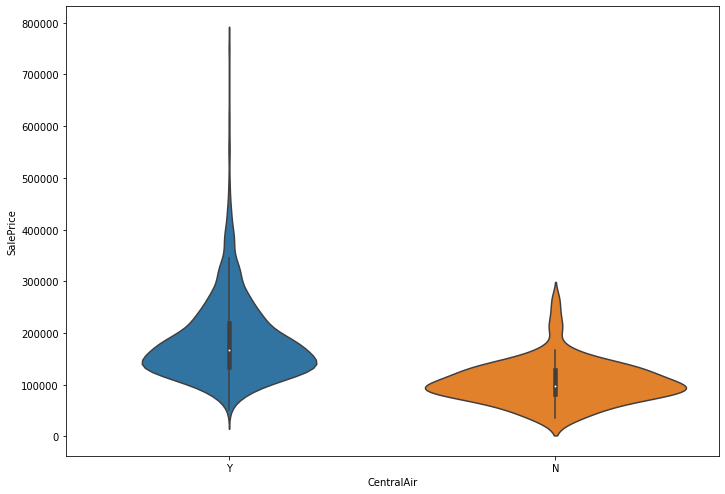

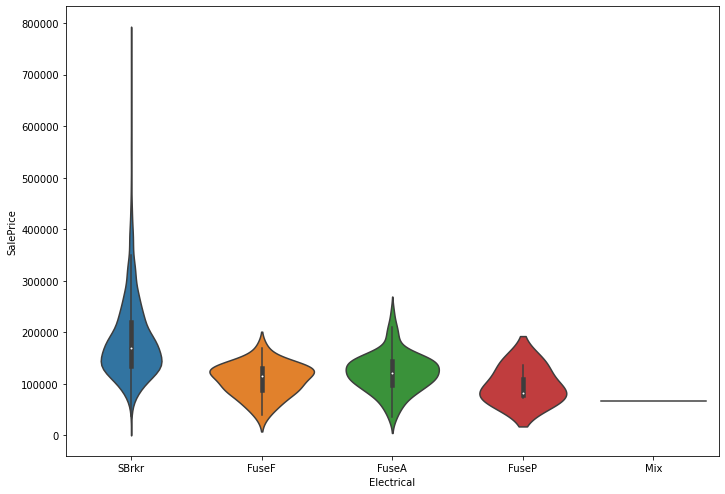

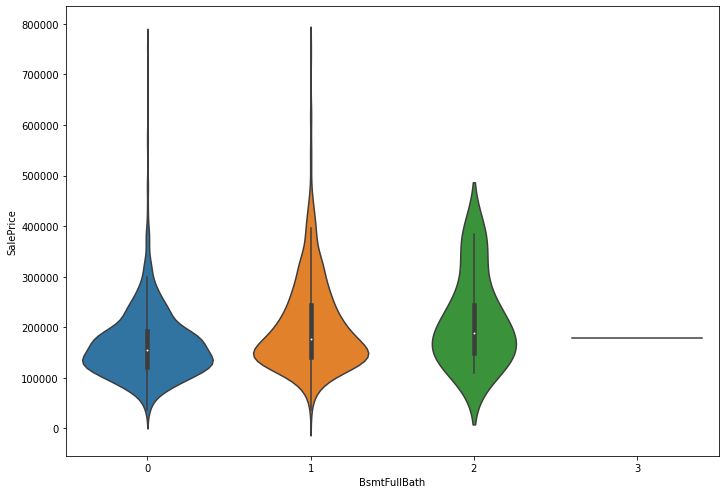

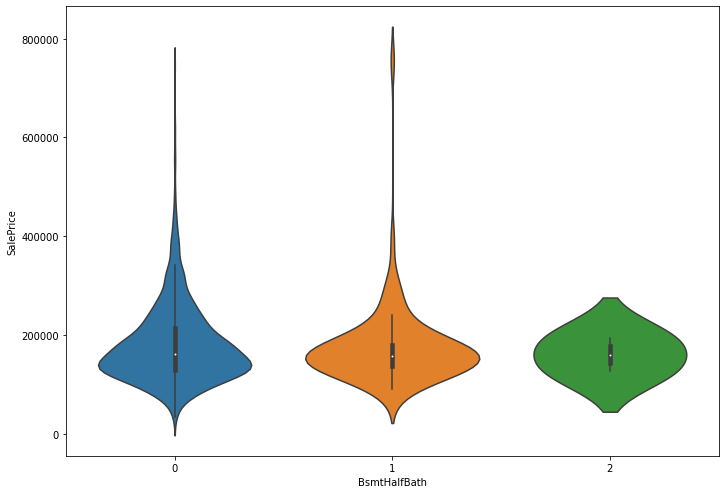

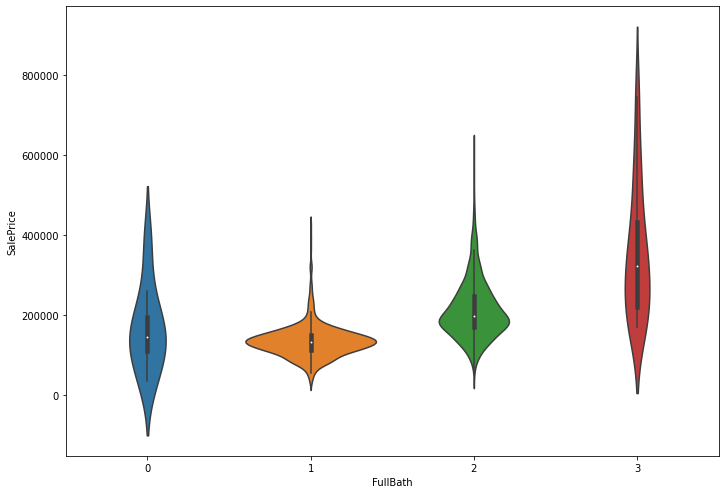

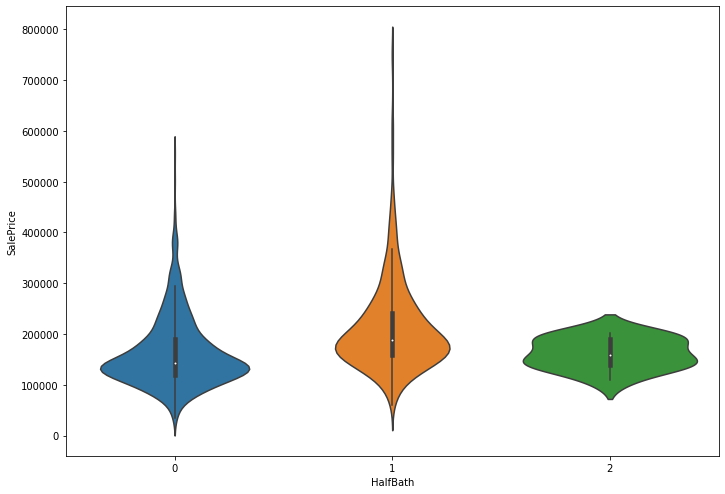

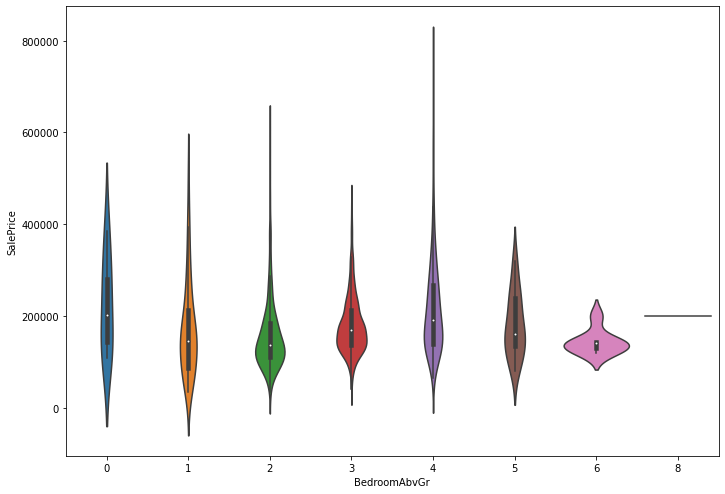

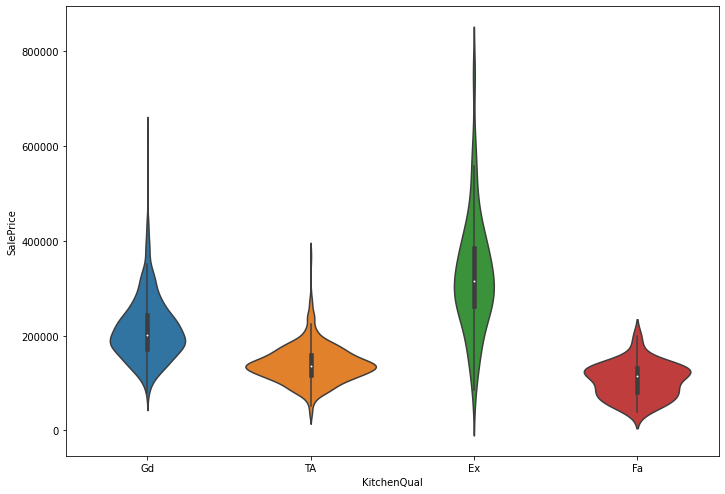

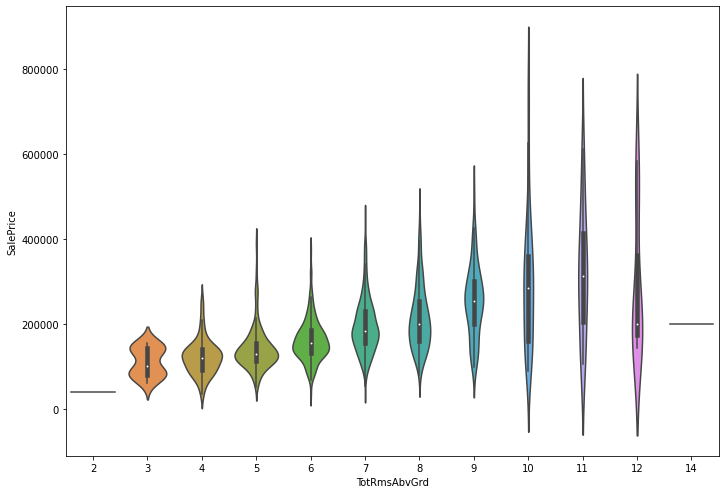

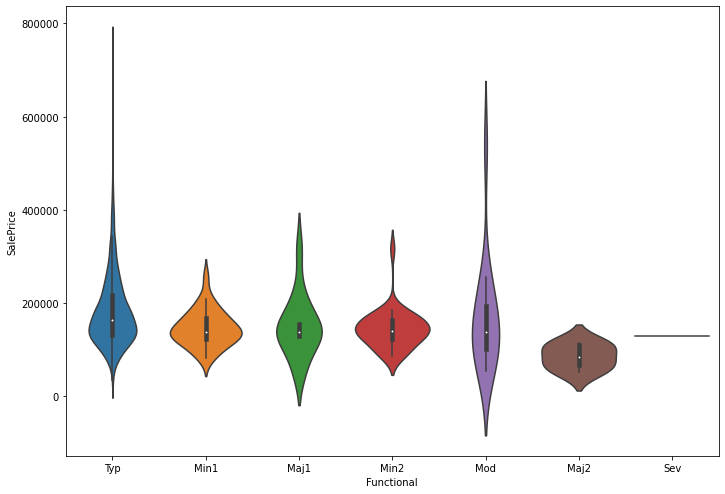

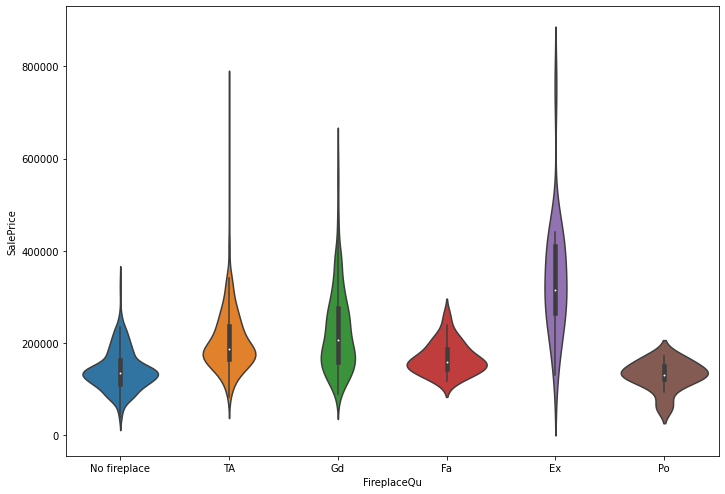

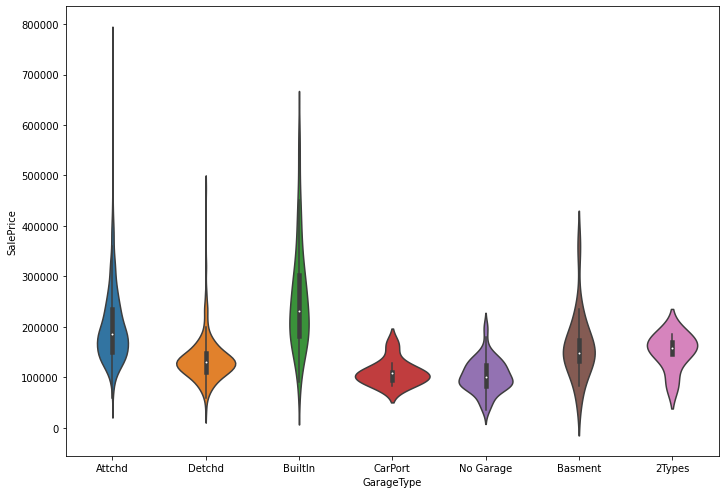

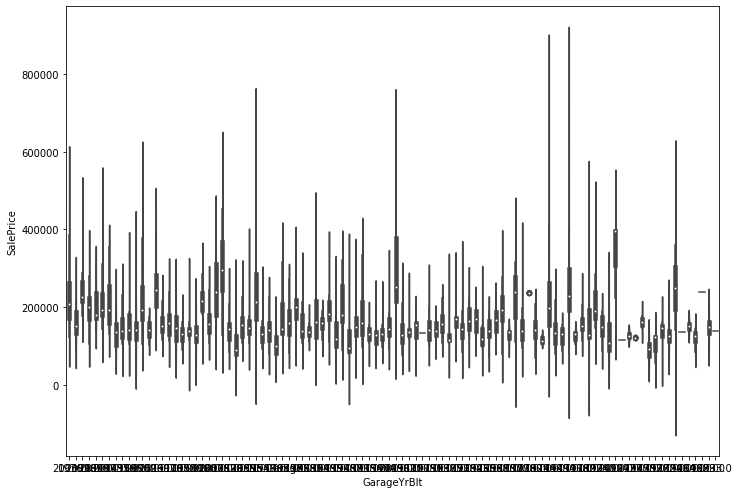

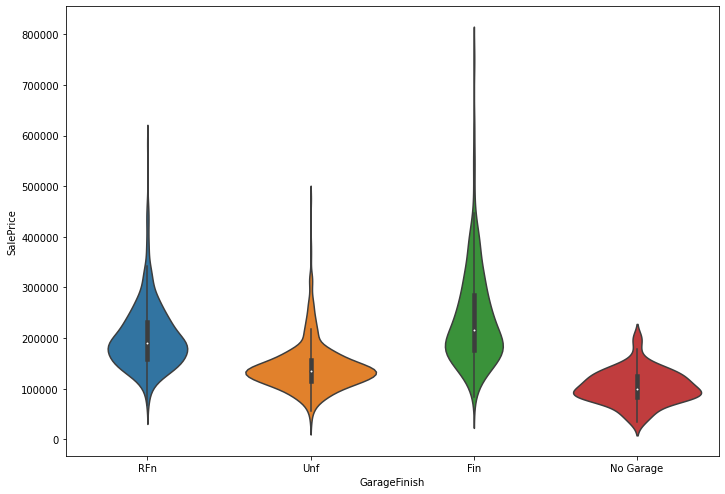

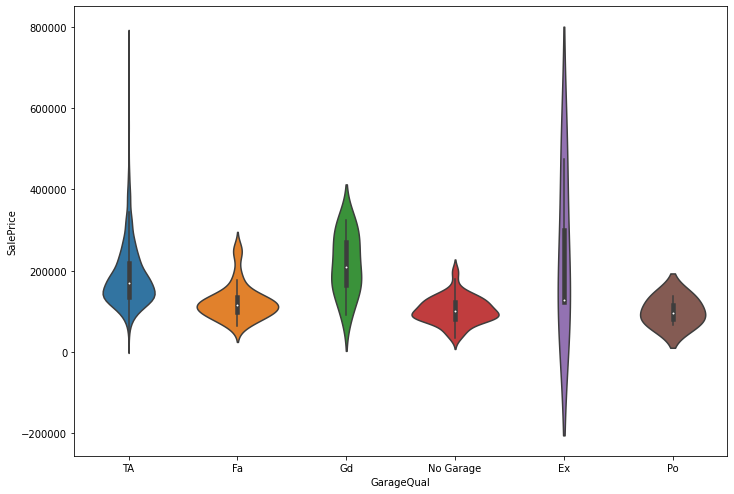

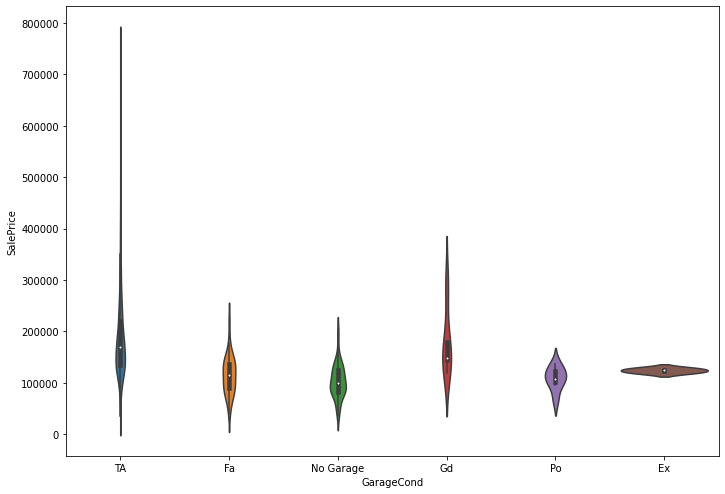

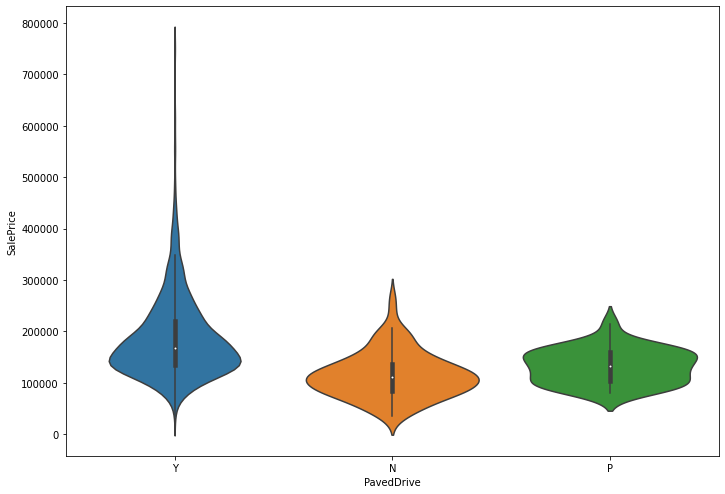

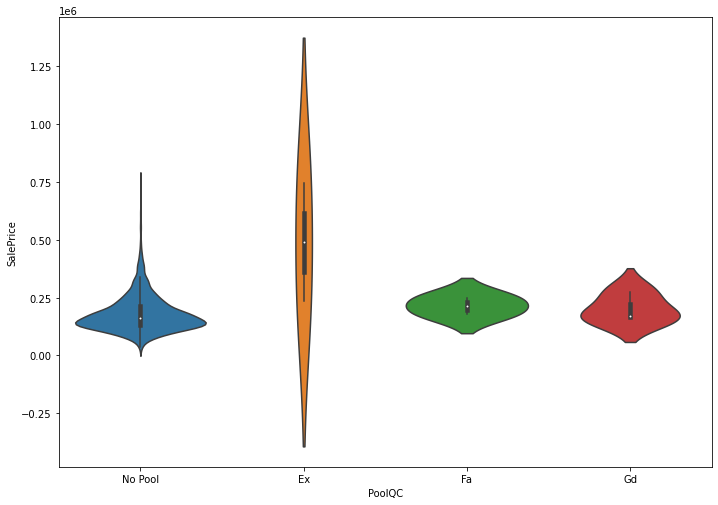

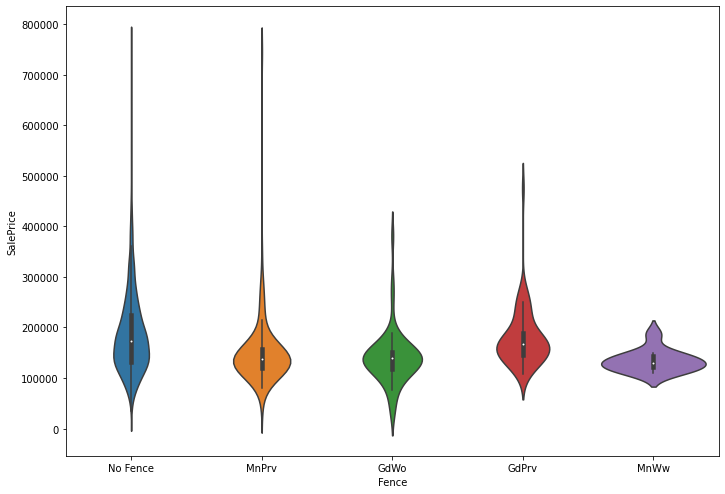

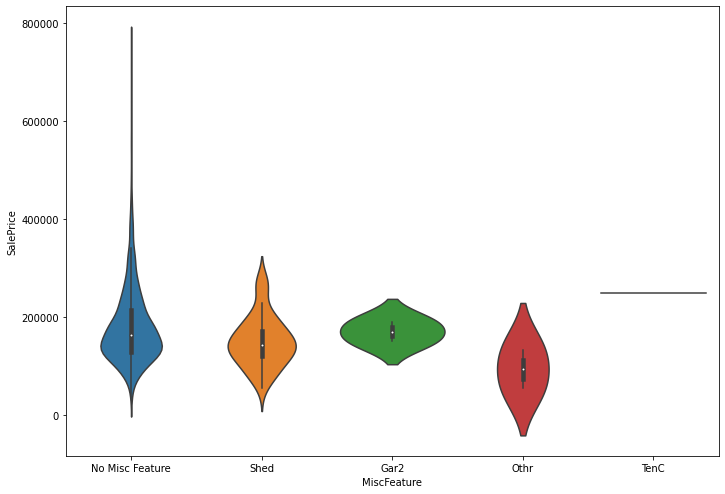

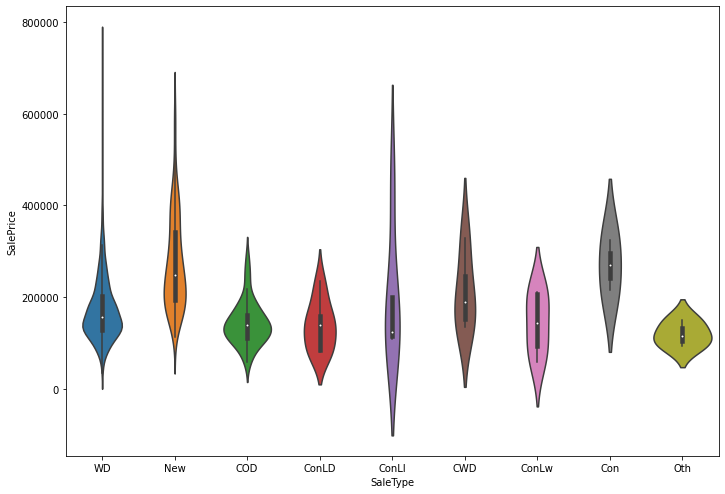

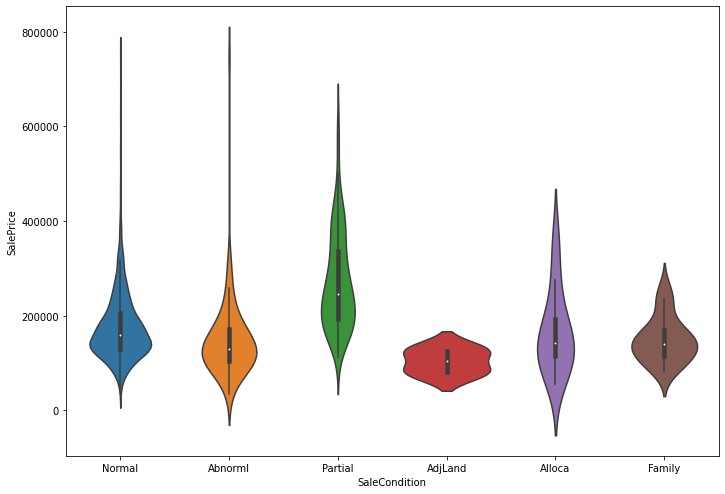

In [38]:
#### plotting violin plot
for c in categorical_cols:
    sb.violinplot(data=train_df,x=c,y='SalePrice')
    plt.show()
    

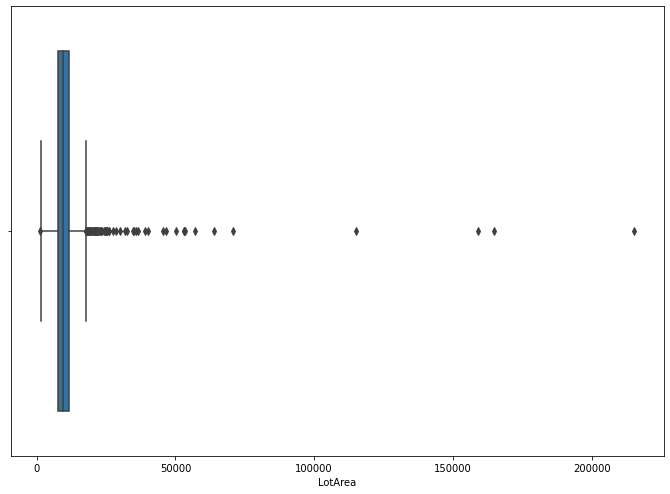

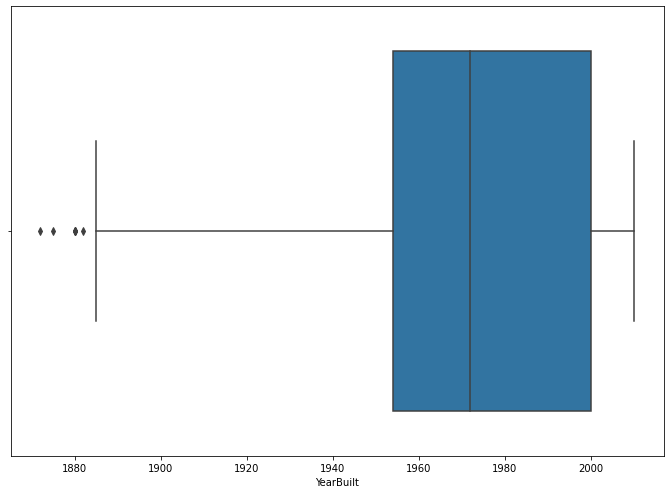

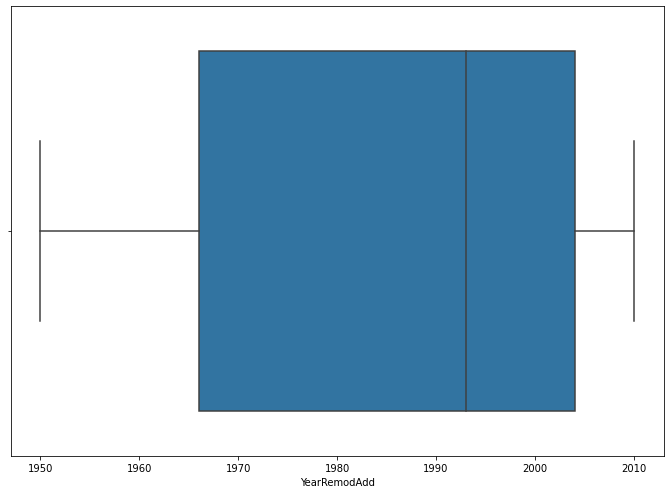

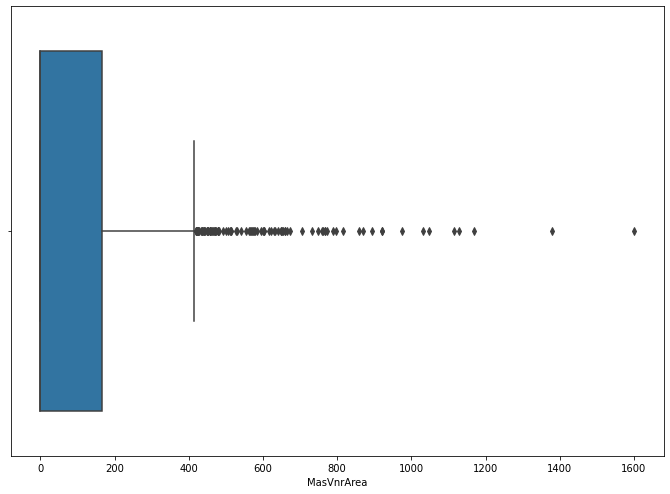

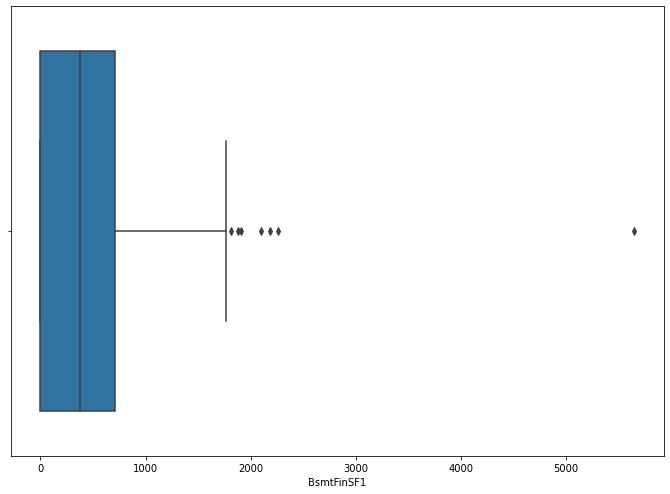

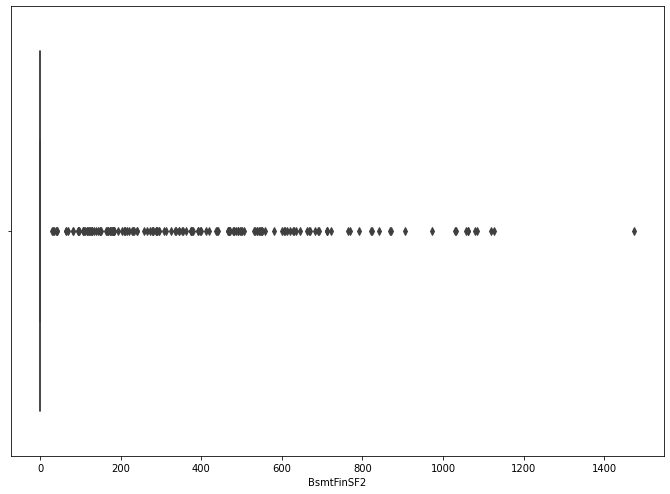

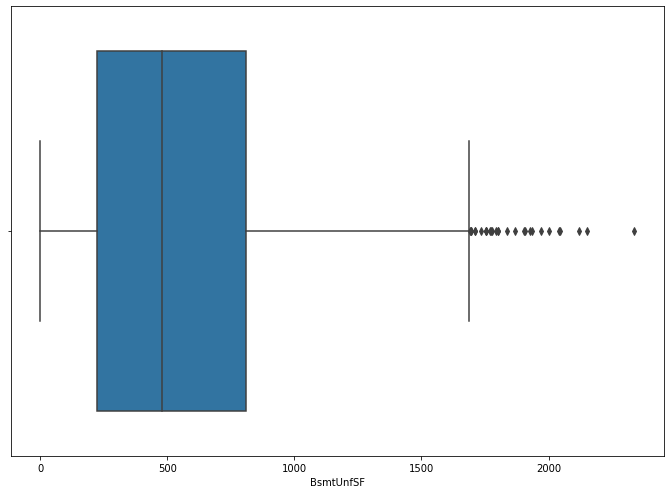

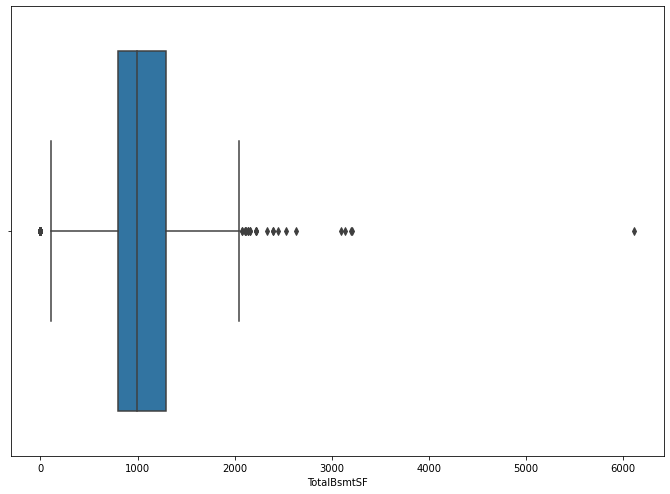

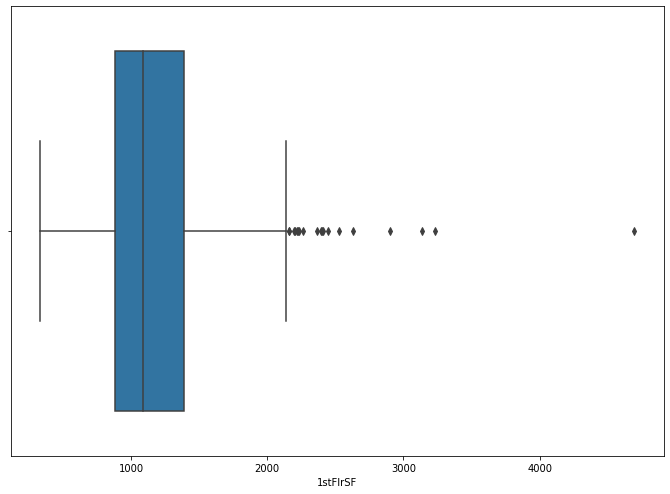

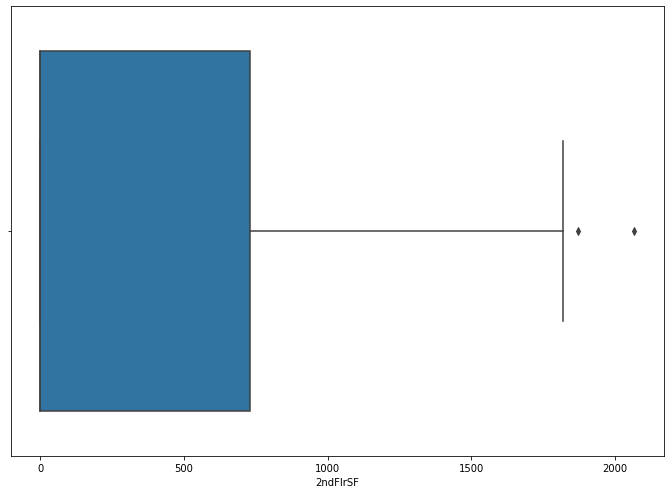

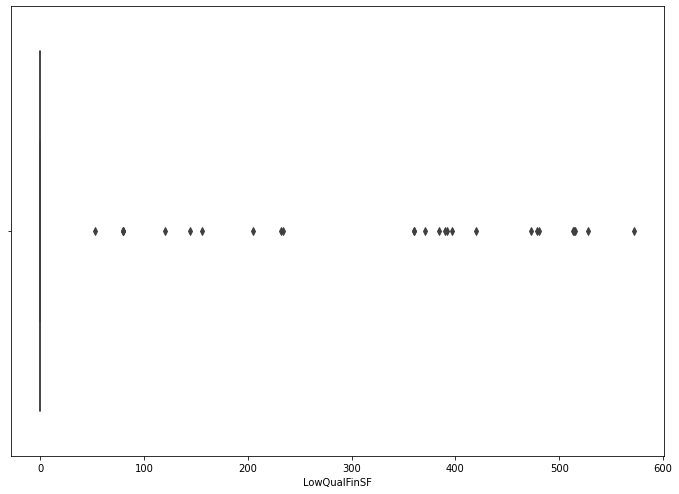

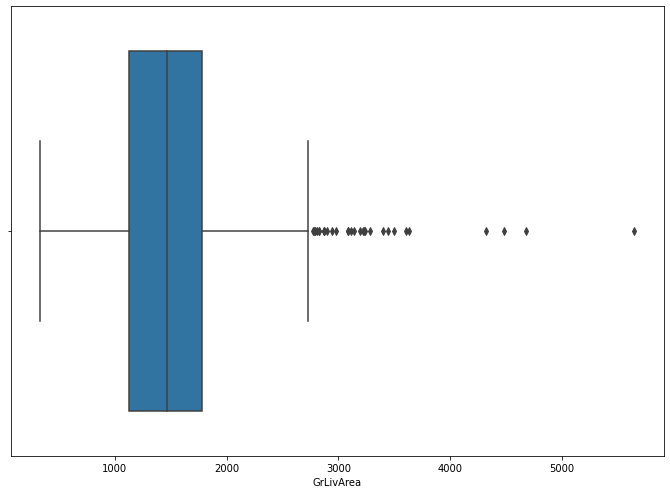

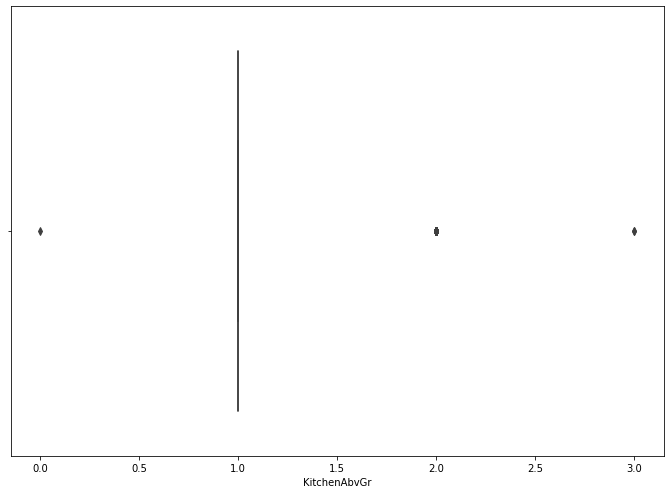

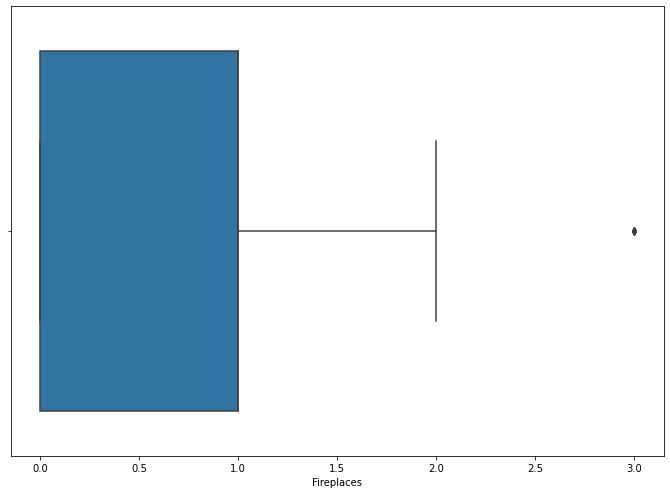

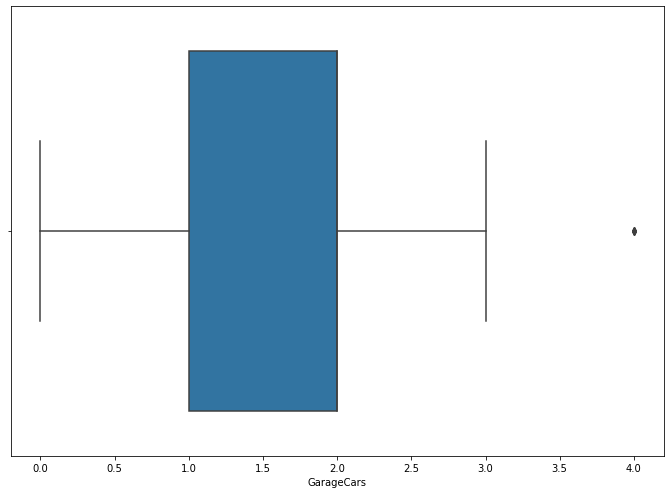

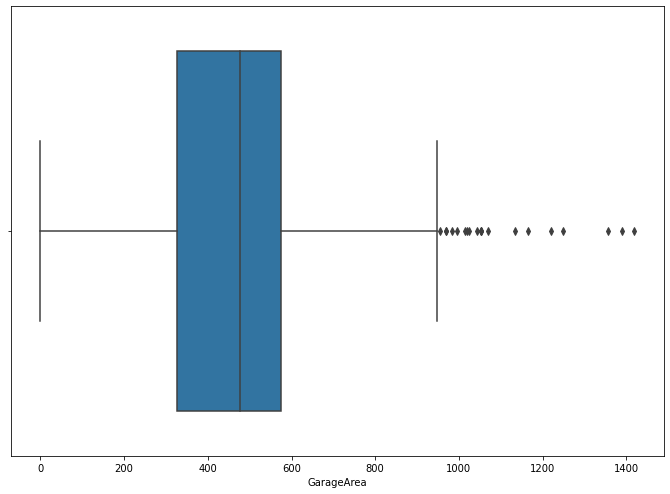

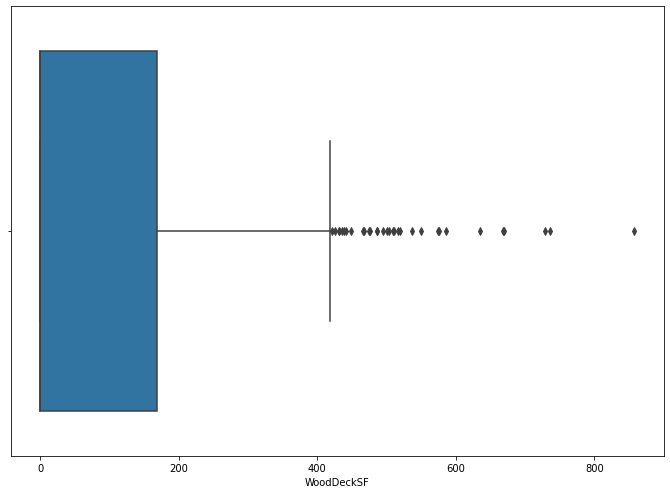

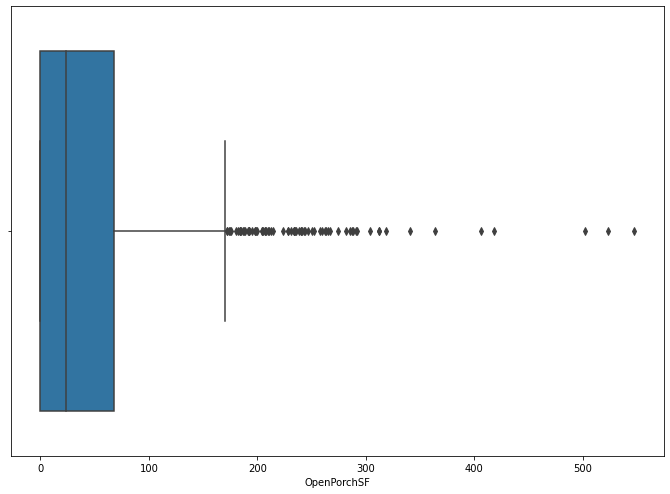

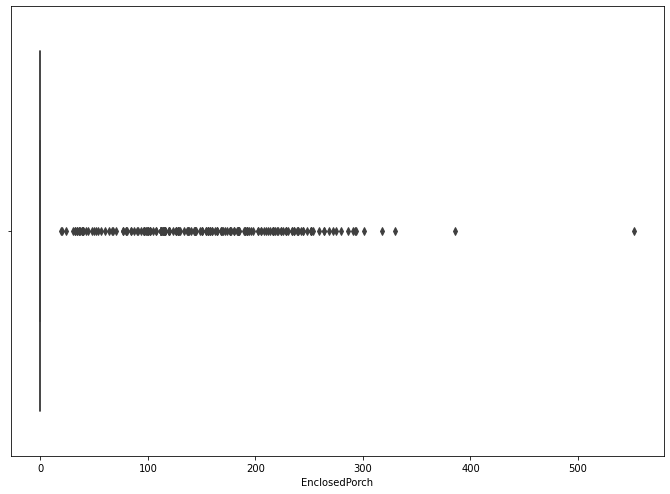

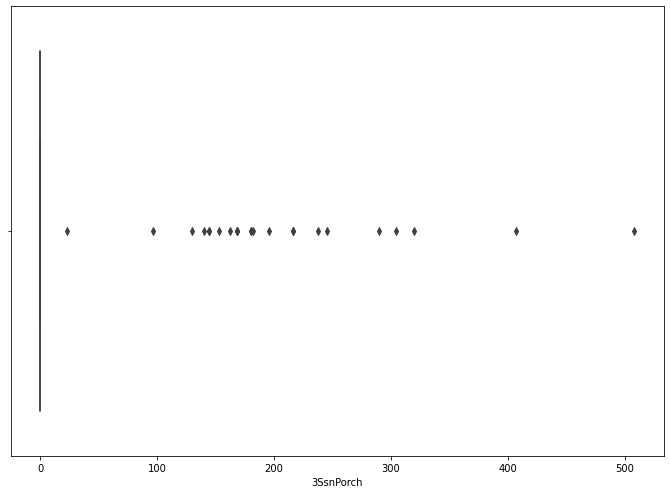

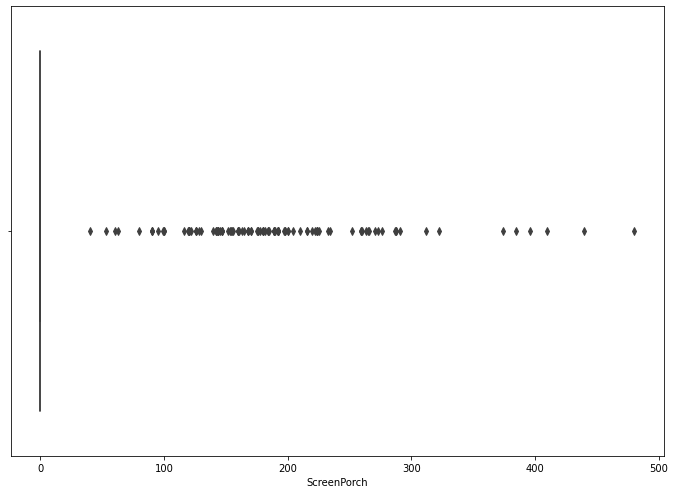

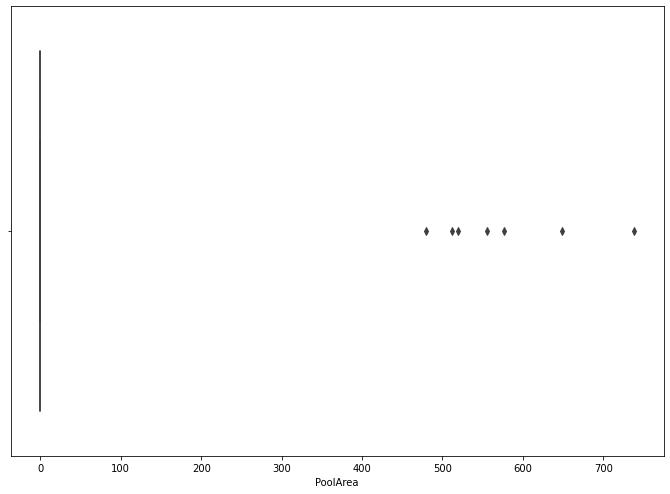

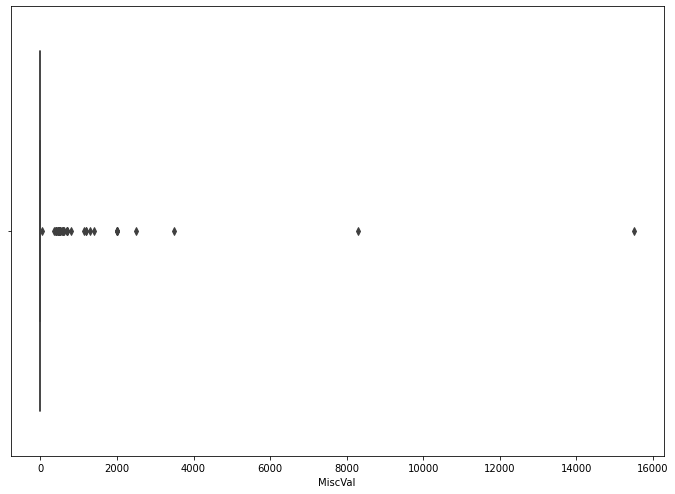

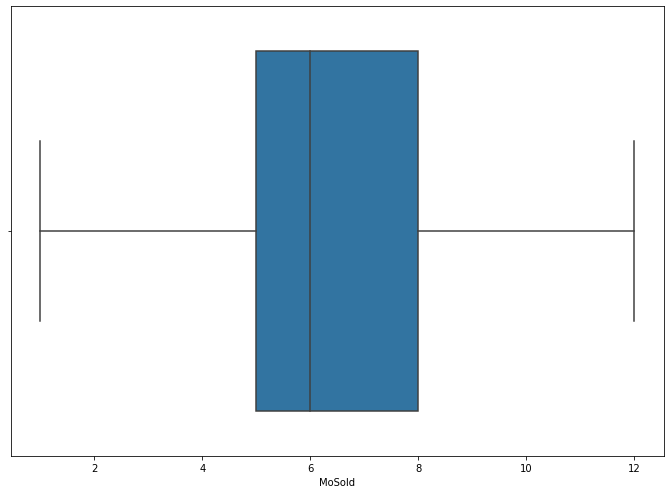

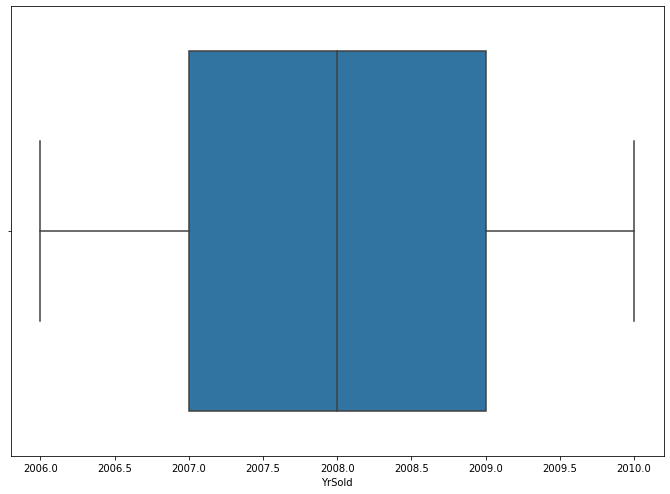

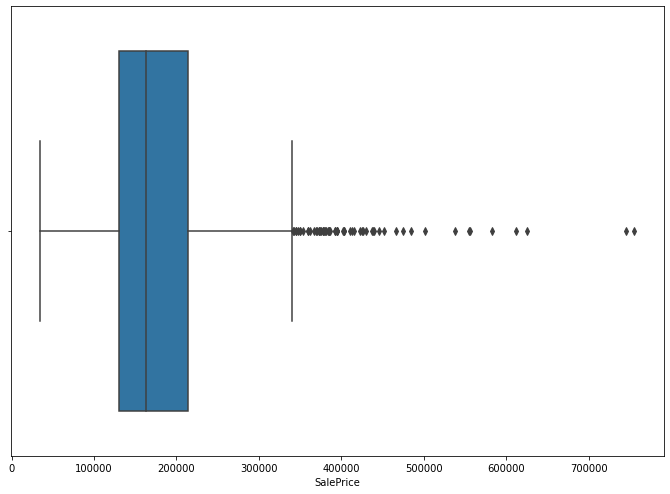

In [39]:
#### plotting the boxplot for numerical data
for c in numerical_cols:
    sb.boxplot(data=train_df,x=c)
    plt.show()

##### observations

1. There are some outliers for the numerical features.

In [40]:
#### considering lotarea>50,000 sq ft
temp_df_lotarea= train_df[train_df['LotArea']>=50000]
temp_df_lotarea

Id MSSubClass MSZoning  LotArea Street            Alley LotShape  \
53      54         20       RL    50271   Pave  No Alley Access      IR1   
249    250         50       RL   159000   Pave  No Alley Access      IR2   
313    314         20       RL   215245   Pave  No Alley Access      IR3   
335    336        190       RL   164660   Grvl  No Alley Access      IR1   
384    385         60       RL    53107   Pave  No Alley Access      IR2   
451    452         20       RL    70761   Pave  No Alley Access      IR1   
457    458         20       RL    53227   Pave  No Alley Access      IR1   
706    707         20       RL   115149   Pave  No Alley Access      IR2   
769    770         60       RL    53504   Pave  No Alley Access      IR2   
1298  1299         60       RL    63887   Pave  No Alley Access      IR3   
1396  1397         20       RL    57200   Pave  No Alley Access      IR1   

     LandContour Utilities LotConfig  ... PoolArea   PoolQC     Fence  \
53           Low    AllPub    Inside  ...        0  No Pool  No Fence   
249          Low    AllPub   CulDSac  ...        0  No Pool  No Fence   
313          Low    AllPub    Inside  ...        0  No Pool  No Fence   
335          HLS    AllPub    Corner  ...        0  No Pool  No Fence   
384          Low    AllPub    Corner  ...        0  No Pool  No Fence   
451          Low    AllPub    Inside  ...        0  No Pool  No Fence   
457          Low    AllPub   CulDSac  ...        0  No Pool  No Fence   
706          Low    AllPub   CulDSac  ...        0  No Pool  No Fence   
769          HLS    AllPub   CulDSac  ...        0  No Pool  No Fence   
1298         Bnk    AllPub    Corner  ...      480       Gd  No Fence   
1396         Bnk    AllPub    Inside  ...        0  No Pool  No Fence   

          MiscFeature MiscVal MoSold YrSold SaleType  SaleCondition  SalePrice  
53    No Misc Feature       0     11   2006       WD         Normal     385000  
249              Shed     500      6   2007       WD         Normal     277000  
313   No Misc Feature       0      6   2009       WD         Normal     375000  
335              Shed     700      8   2008       WD         Normal     228950  
384   No Misc Feature       0      6   2007       WD         Normal     240000  
451   No Misc Feature       0     12   2006       WD         Normal     280000  
457   No Misc Feature       0      3   2008       WD         Normal     256000  
706   No Misc Feature       0      6   2007       WD         Normal     302000  
769   No Misc Feature       0      6   2010       WD         Normal     538000  
1298  No Misc Feature       0      1   2008      New        Partial     160000  
1396  No Misc Feature       0      6   2010       WD         Normal     160000  

[11 rows x 80 columns]

In [41]:
#### comparing of the original train_df data statitics
train_df[['LotArea','SalePrice']].describe()

LotArea      SalePrice
count    1451.000000    1451.000000
mean    10507.808408  180624.101999
std      9992.987081   79312.128273
min      1300.000000   34900.000000
25%      7537.500000  129900.000000
50%      9477.000000  162500.000000
75%     11600.000000  214000.000000
max    215245.000000  755000.000000

In [42]:
temp_df_lotarea[['LotArea','SalePrice']].describe()

LotArea      SalePrice
count      11.000000      11.000000
mean    96001.000000  291086.363636
std     58317.520643  109241.530772
min     50271.000000  160000.000000
25%     53365.500000  234475.000000
50%     63887.000000  277000.000000
75%    137074.500000  338500.000000
max    215245.000000  538000.000000

#### My question, in general lot area should be a dominating factor for house price, but why higher lot area has low price?

#### Taking this later to study

## Feature Engineering & Feature Selection

In [43]:
##### creating new features out of existing features
### 1. Calculating age of house
train_df['Age_of_House'] = np.where(train_df['YearBuilt']==train_df['YearRemodAdd'],(train_df['YrSold']-train_df['YearBuilt']),((train_df['YrSold']-train_df['YearBuilt'])-(train_df['YrSold']-train_df['YearRemodAdd'])))
train_df[['LotArea','Age_of_House','SalePrice']]


LotArea  Age_of_House  SalePrice
0        8450             5     208500
1        9600            31     181500
2       11250             1     223500
3        9550            55     140000
4       14260             8     250000
...       ...           ...        ...
1455     7917             1     175000
1456    13175            10     210000
1457     9042            65     266500
1458     9717            46     142125
1459     9937            43     147500

[1451 rows x 3 columns]

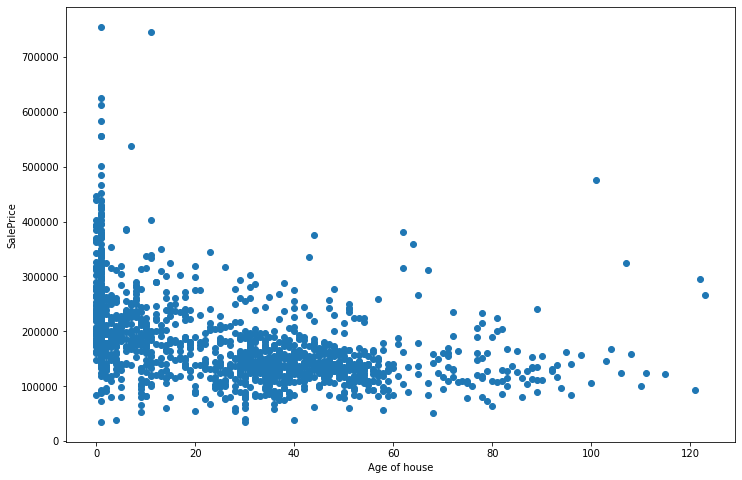

In [44]:
##### plotting age & saleprice
plt.figure(figsize=(12,8))
plt.scatter(train_df['Age_of_House'],train_df['SalePrice'])
plt.xlabel('Age of house')
plt.ylabel('SalePrice')
plt.show()

#### as age of house increases, sale price of house is decreasing


In [45]:
#### dropping the year based columns,
train_df.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

In [46]:
numerical_cols_updated= [i for i in train_df.columns if i not in categorical_cols and i!='Id']
numerical_cols_updated

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice',
 'Age_of_House']

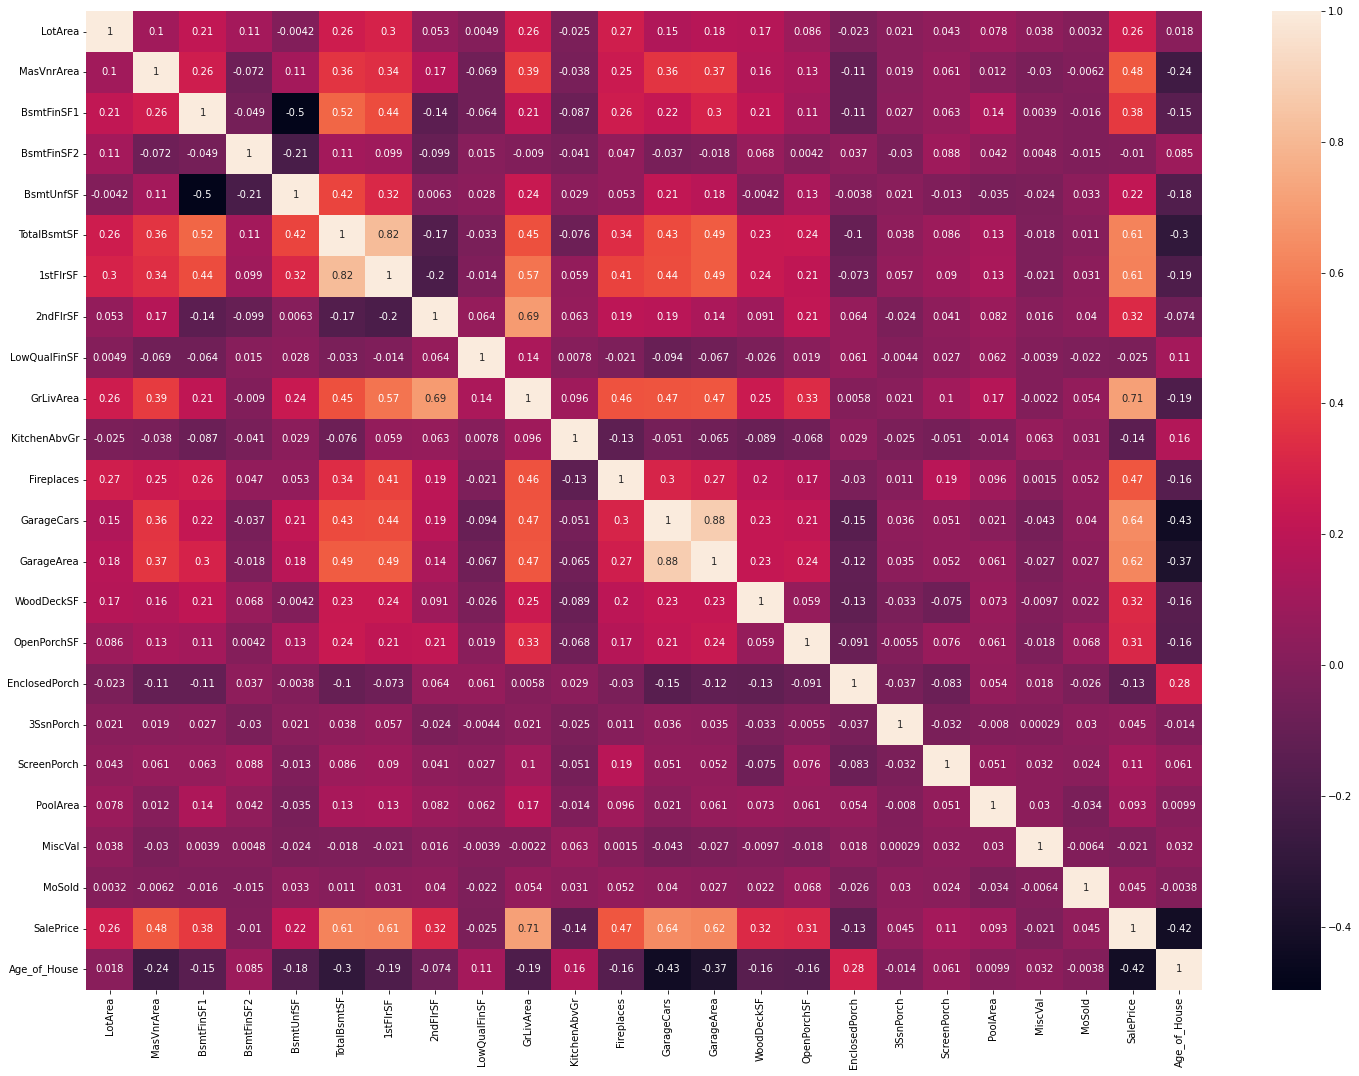

In [47]:
### draw heatmap for correlation for updated train dataset

plt.figure(figsize=(25,18))
sb.heatmap(train_df[numerical_cols_updated].corr(),annot=True)
plt.savefig('./data.png')

##### Feature Selection/ Studying the importance of features

In [48]:
X= train_df.drop(['SalePrice'],axis=1)
y= train_df['SalePrice']


In [49]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   object 
 2   MSZoning       1451 non-null   object 
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   Alley          1451 non-null   object 
 6   LotShape       1451 non-null   object 
 7   LandContour    1451 non-null   object 
 8   Utilities      1451 non-null   object 
 9   LotConfig      1451 non-null   object 
 10  LandSlope      1451 non-null   object 
 11  Neighborhood   1451 non-null   object 
 12  Condition1     1451 non-null   object 
 13  Condition2     1451 non-null   object 
 14  BldgType       1451 non-null   object 
 15  HouseStyle     1451 non-null   object 
 16  OverallQual    1451 non-null   object 
 17  OverallCond    1451 non-null   object 
 18  RoofStyl

In [50]:
numerical_cols_updated_features= [i for i in numerical_cols_updated if i!='SalePrice']
numerical_cols_updated_features

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age_of_House']

#### Studying the multicolinearity b/w features 

In [51]:
X_vif= X.copy()

X_vif[numerical_cols_updated_features].skew()

LotArea          12.235742
MasVnrArea        2.668016
BsmtFinSF1        1.702582
BsmtFinSF2        4.240230
BsmtUnfSF         0.919977
TotalBsmtSF       1.535566
1stFlrSF          1.373142
2ndFlrSF          0.815766
LowQualFinSF      8.982567
GrLivArea         1.373512
KitchenAbvGr      4.512817
Fireplaces        0.647744
GarageCars       -0.337419
GarageArea        0.182585
WoodDeckSF        1.541872
OpenPorchSF       2.384908
EnclosedPorch     3.094001
3SsnPorch        10.271742
ScreenPorch       4.107411
PoolArea         14.782069
MiscVal          24.401513
MoSold            0.209257
Age_of_House      0.863635
dtype: float64

In [52]:
X_vif[numerical_cols_updated_features].describe()

LotArea  MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  \
count    1451.000000  1451.00000  1451.000000  1451.000000  1451.000000   
mean    10507.808408   103.75672   442.274983    46.838043   567.197105   
std      9992.987081   181.10815   455.369276   161.777324   442.209192   
min      1300.000000     0.00000     0.000000     0.000000     0.000000   
25%      7537.500000     0.00000     0.000000     0.000000   222.000000   
50%      9477.000000     0.00000   381.000000     0.000000   479.000000   
75%     11600.000000   166.00000   707.000000     0.000000   808.000000   
max    215245.000000  1600.00000  5644.000000  1474.000000  2336.000000   

       TotalBsmtSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  ...  \
count  1451.000000  1451.000000  1451.000000   1451.000000  1451.000000  ...   
mean   1056.310131  1161.551344   346.742247      5.880772  1514.174363  ...   
std     437.914609   385.002532   436.453277     48.771560   525.799521  ...   
min       0.000000   334.000000     0.000000      0.000000   334.000000  ...   
25%     795.000000   882.000000     0.000000      0.000000  1128.000000  ...   
50%     991.000000  1086.000000     0.000000      0.000000  1464.000000  ...   
75%    1297.500000  1391.000000   728.000000      0.000000  1776.000000  ...   
max    6110.000000  4692.000000  2065.000000    572.000000  5642.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1451.000000  1451.000000  1451.000000    1451.000000  1451.000000   
mean    472.525155    94.412819    46.422467      21.952447     3.430737   
std     214.171752   125.436852    66.060150      61.108223    29.406940   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     327.500000     0.000000     0.000000       0.000000     0.000000   
50%     478.000000     0.000000    24.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold  Age_of_House  
count  1451.000000  1451.000000   1451.000000  1451.000000   1451.000000  
mean     15.154376     2.776017     43.758787     6.319090     26.587181  
std      55.917522    40.301212    497.648467     2.700353     24.259143  
min       0.000000     0.000000      0.000000     1.000000      0.000000  
25%       0.000000     0.000000      0.000000     5.000000      3.000000  
50%       0.000000     0.000000      0.000000     6.000000     25.000000  
75%       0.000000     0.000000      0.000000     8.000000     42.000000  
max     480.000000   738.000000  15500.000000    12.000000    123.000000  

[8 rows x 23 columns]

In [53]:
 #### scale the value via standerisation
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_scaler= StandardScaler()
X_vif[numerical_cols_updated_features]= sc_scaler.fit_transform(X_vif[numerical_cols_updated_features])


In [54]:
X_vif[numerical_cols_updated_features].describe()

LotArea    MasVnrArea    BsmtFinSF1    BsmtFinSF2     BsmtUnfSF  \
count  1.451000e+03  1.451000e+03  1.451000e+03  1.451000e+03  1.451000e+03   
mean  -9.548989e-17  4.896918e-18 -5.141763e-17 -9.181720e-18 -1.199745e-16   
std    1.000345e+00  1.000345e+00  1.000345e+00  1.000345e+00  1.000345e+00   
min   -9.217447e-01 -5.730967e-01 -9.715795e-01 -2.896215e-01 -1.283087e+00   
25%   -2.973418e-01 -5.730967e-01 -9.715795e-01 -2.896215e-01 -7.808886e-01   
50%   -1.031887e-01 -5.730967e-01 -1.346075e-01 -2.896215e-01 -1.995153e-01   
75%    1.093335e-01  3.437987e-01  5.815418e-01 -2.896215e-01  5.447329e-01   
max    2.049515e+01  8.264449e+00  1.142703e+01  8.824809e+00  4.001302e+00   

        TotalBsmtSF      1stFlrSF      2ndFlrSF  LowQualFinSF     GrLivArea  \
count  1.451000e+03  1.451000e+03  1.451000e+03   1451.000000  1.451000e+03   
mean  -2.301551e-16 -2.301551e-16 -2.326036e-17      0.000000  1.909798e-16   
std    1.000345e+00  1.000345e+00  1.000345e+00      1.000345  1.000345e+00   
min   -2.412969e+00 -2.150211e+00 -7.947283e-01     -0.120619 -2.245307e+00   
25%   -5.969205e-01 -7.263529e-01 -7.947283e-01     -0.120619 -7.347049e-01   
50%   -1.491904e-01 -1.963036e-01 -7.947283e-01     -0.120619 -9.545779e-02   
75%    5.509591e-01  5.961721e-01  8.738374e-01     -0.120619  4.981288e-01   
max    1.154433e+01  9.173098e+00  3.938223e+00     11.611570  7.853276e+00   

       ...    GarageArea    WoodDeckSF   OpenPorchSF  EnclosedPorch  \
count  ...  1.451000e+03  1.451000e+03  1.451000e+03   1.451000e+03   
mean   ...  1.248714e-16 -4.896918e-17 -2.019978e-17   4.896918e-17   
std    ...  1.000345e+00  1.000345e+00  1.000345e+00   1.000345e+00   
min    ... -2.207051e+00 -7.529316e-01 -7.029725e-01  -3.593627e-01   
25%    ... -6.773776e-01 -7.529316e-01 -7.029725e-01  -3.593627e-01   
50%    ...  2.557168e-02 -7.529316e-01 -3.395420e-01  -3.593627e-01   
75%    ...  4.833061e-01  5.868495e-01  3.267472e-01  -3.593627e-01   
max    ...  4.416086e+00  6.081547e+00  7.580215e+00   8.676906e+00   

          3SsnPorch   ScreenPorch      PoolArea       MiscVal        MoSold  \
count  1.451000e+03  1.451000e+03  1.451000e+03  1.451000e+03  1.451000e+03   
mean  -2.448459e-17 -7.131136e-17 -9.793835e-18  1.101806e-17 -1.003868e-16   
std    1.000345e+00  1.000345e+00  1.000345e+00  1.000345e+00  1.000345e+00   
min   -1.167044e-01 -2.711065e-01 -6.890546e-02 -8.796144e-02 -1.970455e+00   
25%   -1.167044e-01 -2.711065e-01 -6.890546e-02 -8.796144e-02 -4.886566e-01   
50%   -1.167044e-01 -2.711065e-01 -6.890546e-02 -8.796144e-02 -1.182069e-01   
75%   -1.167044e-01 -2.711065e-01 -6.890546e-02 -8.796144e-02  6.226925e-01   
max    1.716409e+01  8.315924e+00  1.824951e+01  3.106926e+01  2.104491e+00   

       Age_of_House  
count  1.451000e+03  
mean   7.345376e-18  
std    1.000345e+00  
min   -1.096343e+00  
25%   -9.726359e-01  
50%   -6.544866e-02  
75%    6.355597e-01  
max    3.975658e+00  

[8 rows x 23 columns]

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['Feature']= numerical_cols_updated_features
vif['VIF']= [variance_inflation_factor(X_vif[numerical_cols_updated_features].values,i) for i in range(X_vif[numerical_cols_updated_features].shape[1])]

vif

Feature       VIF
0         LotArea  1.184072
1      MasVnrArea  1.345650
2      BsmtFinSF1       inf
3      BsmtFinSF2       inf
4       BsmtUnfSF       inf
5     TotalBsmtSF       inf
6        1stFlrSF       inf
7        2ndFlrSF       inf
8    LowQualFinSF       inf
9       GrLivArea       inf
10   KitchenAbvGr  1.163046
11     Fireplaces  1.492850
12     GarageCars  5.082384
13     GarageArea  5.058036
14     WoodDeckSF  1.179107
15    OpenPorchSF  1.183849
16  EnclosedPorch  1.149398
17      3SsnPorch  1.013900
18    ScreenPorch  1.098727
19       PoolArea  1.068247
20        MiscVal  1.012541
21         MoSold  1.015811
22   Age_of_House  1.465340

In [56]:
train_df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea','SalePrice']].corr()

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  \
BsmtFinSF1      1.000000   -0.049498  -0.496605     0.520098  0.442838   
BsmtFinSF2     -0.049498    1.000000  -0.209806     0.106092  0.098654   
BsmtUnfSF      -0.496605   -0.209806   1.000000     0.415900  0.318053   
TotalBsmtSF     0.520098    0.106092   0.415900     1.000000  0.818107   
1stFlrSF        0.442838    0.098654   0.318053     0.818107  1.000000   
2ndFlrSF       -0.135330   -0.099445   0.006341    -0.171058 -0.198812   
LowQualFinSF   -0.064447    0.014596   0.028245    -0.033102 -0.014007   
GrLivArea       0.205944   -0.008956   0.240770     0.453975  0.565895   
SalePrice       0.383995   -0.010350   0.215707     0.613299  0.606969   

              2ndFlrSF  LowQualFinSF  GrLivArea  SalePrice  
BsmtFinSF1   -0.135330     -0.064447   0.205944   0.383995  
BsmtFinSF2   -0.099445      0.014596  -0.008956  -0.010350  
BsmtUnfSF     0.006341      0.028245   0.240770   0.215707  
TotalBsmtSF  -0.171058     -0.033102   0.453975   0.613299  
1stFlrSF     -0.198812     -0.014007   0.565895   0.606969  
2ndFlrSF      1.000000      0.063632   0.690403   0.322840  
LowQualFinSF  0.063632      1.000000   0.135320  -0.025277  
GrLivArea     0.690403      0.135320   1.000000   0.710073  
SalePrice     0.322840     -0.025277   0.710073   1.000000

##### observations

1. Features like BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea are vif equal to infinity, which means they are highly multicolinear. 
Also from correlation table above, it could be seen that some features like TotalBsmtSF, 1stFlrSF, GrLivArea are having good correlation with Saleprice, ie the target variable/feature

let remove the others and see what would be the value of vif of remaining

In [57]:
X_vif.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF', 'LowQualFinSF'],axis=1,inplace=True)

for i in ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF', 'LowQualFinSF']:
    numerical_cols_updated_features.remove(i)
    



In [58]:
vif= pd.DataFrame()
vif['Feature']= numerical_cols_updated_features
vif['VIF']= [variance_inflation_factor(X_vif[numerical_cols_updated_features].values,i) for i in range(X_vif[numerical_cols_updated_features].shape[1])]

vif

Feature       VIF
0         LotArea  1.169633
1      MasVnrArea  1.315457
2     TotalBsmtSF  3.501064
3        1stFlrSF  3.912711
4       GrLivArea  2.079770
5    KitchenAbvGr  1.158389
6      Fireplaces  1.471402
7      GarageCars  4.996626
8      GarageArea  4.989368
9      WoodDeckSF  1.163144
10    OpenPorchSF  1.183204
11  EnclosedPorch  1.145197
12      3SsnPorch  1.013020
13    ScreenPorch  1.090744
14       PoolArea  1.057470
15        MiscVal  1.012229
16         MoSold  1.014349
17   Age_of_House  1.450277

##### now vif of features seems to be fine :), eventhough there are some features having little high vif values but less than 5, we can ignore them now.

In [59]:
#### let's drop the COLUMNS/ Features from train_df
X.drop(['Id','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF', 'LowQualFinSF'],axis=1,inplace=True)
X



MSSubClass MSZoning  LotArea Street            Alley LotShape  \
0            60       RL     8450   Pave  No Alley Access      Reg   
1            20       RL     9600   Pave  No Alley Access      Reg   
2            60       RL    11250   Pave  No Alley Access      IR1   
3            70       RL     9550   Pave  No Alley Access      IR1   
4            60       RL    14260   Pave  No Alley Access      IR1   
...         ...      ...      ...    ...              ...      ...   
1455         60       RL     7917   Pave  No Alley Access      Reg   
1456         20       RL    13175   Pave  No Alley Access      Reg   
1457         70       RL     9042   Pave  No Alley Access      Reg   
1458         20       RL     9717   Pave  No Alley Access      Reg   
1459         20       RL     9937   Pave  No Alley Access      Reg   

     LandContour Utilities LotConfig LandSlope  ... ScreenPorch PoolArea  \
0            Lvl    AllPub    Inside       Gtl  ...           0        0   
1            Lvl    AllPub       FR2       Gtl  ...           0        0   
2            Lvl    AllPub    Inside       Gtl  ...           0        0   
3            Lvl    AllPub    Corner       Gtl  ...           0        0   
4            Lvl    AllPub       FR2       Gtl  ...           0        0   
...          ...       ...       ...       ...  ...         ...      ...   
1455         Lvl    AllPub    Inside       Gtl  ...           0        0   
1456         Lvl    AllPub    Inside       Gtl  ...           0        0   
1457         Lvl    AllPub    Inside       Gtl  ...           0        0   
1458         Lvl    AllPub    Inside       Gtl  ...           0        0   
1459         Lvl    AllPub    Inside       Gtl  ...           0        0   

       PoolQC     Fence      MiscFeature MiscVal MoSold SaleType  \
0     No Pool  No Fence  No Misc Feature       0      2       WD   
1     No Pool  No Fence  No Misc Feature       0      5       WD   
2     No Pool  No Fence  No Misc Feature       0      9       WD   
3     No Pool  No Fence  No Misc Feature       0      2       WD   
4     No Pool  No Fence  No Misc Feature       0     12       WD   
...       ...       ...              ...     ...    ...      ...   
1455  No Pool  No Fence  No Misc Feature       0      8       WD   
1456  No Pool     MnPrv  No Misc Feature       0      2       WD   
1457  No Pool     GdPrv             Shed    2500      5       WD   
1458  No Pool  No Fence  No Misc Feature       0      4       WD   
1459  No Pool  No Fence  No Misc Feature       0      6       WD   

     SaleCondition Age_of_House  
0           Normal            5  
1           Normal           31  
2           Normal            1  
3          Abnorml           55  
4           Normal            8  
...            ...          ...  
1455        Normal            1  
1456        Normal           10  
1457        Normal           65  
1458        Normal           46  
1459        Normal           43  

[1451 rows x 71 columns]

In [60]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1451, dtype: int64

#### let's end the feature selection part here, will do later based on model's performance

In [61]:
### splitting the dataset into train and test....
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=0)


In [62]:
numerical_cols_updated_features

['LotArea',
 'MasVnrArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age_of_House']

In [63]:
#### standerdizing the train and test dataset
#sc_scaler= StandardScaler()
#X_train[numerical_cols_updated_features]= sc_scaler.fit_transform(X_train[numerical_cols_updated_features])
#X_test[numerical_cols_updated_features]= sc_scaler.transform(X_test[numerical_cols_updated_features])

In [64]:
for i in ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd']:
    X_train[i]= X_train[i].astype('int64')
    X_test[i]= X_test[i].astype('int64')
    

In [65]:
categorical_cols= [i for i in X.columns if X_train[i].dtype==object]
categorical_cols.remove('GarageYrBlt')

In [66]:
X_train[categorical_cols]

MSZoning Street            Alley LotShape LandContour Utilities  \
1082       RL   Pave  No Alley Access      Reg         Lvl    AllPub   
1377       RL   Pave             Grvl      Reg         Lvl    AllPub   
1223       RL   Pave  No Alley Access      Reg         Lvl    AllPub   
603        FV   Pave             Pave      Reg         Lvl    AllPub   
108        RM   Pave  No Alley Access      Reg         Lvl    AllPub   
...       ...    ...              ...      ...         ...       ...   
766        RL   Pave  No Alley Access      Reg         Lvl    AllPub   
838        RL   Pave  No Alley Access      Reg         Lvl    AllPub   
1222       RL   Pave  No Alley Access      Reg         Lvl    AllPub   
561        RL   Pave  No Alley Access      Reg         Lvl    AllPub   
687        FV   Pave  No Alley Access      IR2         Lvl    AllPub   

     LotConfig LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
1082    Inside       Gtl      CollgCr       Norm  ...     Attchd          RFn   
1377    Inside       Gtl      Edwards       Norm  ...     Detchd          Unf   
1223    Inside       Gtl        NAmes       Norm  ...     Detchd          Unf   
603     Inside       Gtl      Somerst       Norm  ...     Detchd          RFn   
108     Corner       Gtl       IDOTRR     Artery  ...  No Garage    No Garage   
...        ...       ...          ...        ...  ...        ...          ...   
766     Inside       Gtl       NWAmes       Norm  ...     Attchd          Unf   
838     Inside       Gtl      CollgCr       Norm  ...     Attchd          Unf   
1222    Inside       Gtl        NAmes     Artery  ...     Attchd          Unf   
561     Inside       Mod      Mitchel       Norm  ...     Attchd          RFn   
687        FR2       Gtl      Somerst       Norm  ...     Detchd          Unf   

     GarageQual GarageCond PavedDrive   PoolQC     Fence      MiscFeature  \
1082         TA         TA          Y  No Pool  No Fence  No Misc Feature   
1377         TA         TA          Y  No Pool  No Fence  No Misc Feature   
1223         TA         TA          Y  No Pool     MnPrv  No Misc Feature   
603          TA         TA          Y  No Pool  No Fence  No Misc Feature   
108   No Garage  No Garage          N  No Pool  No Fence  No Misc Feature   
...         ...        ...        ...      ...       ...              ...   
766          TA         TA          Y  No Pool     MnPrv             Shed   
838          TA         TA          Y  No Pool  No Fence  No Misc Feature   
1222         TA         TA          Y  No Pool      GdWo  No Misc Feature   
561          TA         TA          Y  No Pool  No Fence  No Misc Feature   
687          TA         TA          Y  No Pool  No Fence  No Misc Feature   

     SaleType SaleCondition  
1082       WD        Normal  
1377       WD        Normal  
1223       WD        Normal  
603        WD        Normal  
108        WD        Normal  
...       ...           ...  
766        WD        Normal  
838        WD        Normal  
1222       WD        Normal  
561        WD        Normal  
687        WD        Normal  

[1305 rows x 43 columns]

In [67]:
dict_1= {i:list(X[i].unique()) for i in categorical_cols}
temp1= pd.DataFrame.from_dict(dict_1, orient='index').T
temp1

MSZoning Street            Alley LotShape LandContour Utilities LotConfig  \
0        RL   Pave  No Alley Access      Reg         Lvl    AllPub    Inside   
1        RM   Grvl             Grvl      IR1         Bnk    NoSeWa       FR2   
2   C (all)   None             Pave      IR2         Low      None    Corner   
3        FV   None             None      IR3         HLS      None   CulDSac   
4        RH   None             None     None        None      None       FR3   
5      None   None             None     None        None      None      None   
6      None   None             None     None        None      None      None   
7      None   None             None     None        None      None      None   
8      None   None             None     None        None      None      None   
9      None   None             None     None        None      None      None   
10     None   None             None     None        None      None      None   
11     None   None             None     None        None      None      None   
12     None   None             None     None        None      None      None   
13     None   None             None     None        None      None      None   
14     None   None             None     None        None      None      None   
15     None   None             None     None        None      None      None   
16     None   None             None     None        None      None      None   
17     None   None             None     None        None      None      None   
18     None   None             None     None        None      None      None   
19     None   None             None     None        None      None      None   
20     None   None             None     None        None      None      None   
21     None   None             None     None        None      None      None   
22     None   None             None     None        None      None      None   
23     None   None             None     None        None      None      None   
24     None   None             None     None        None      None      None   

   LandSlope Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0        Gtl      CollgCr       Norm  ...     Attchd          RFn         TA   
1        Mod      Veenker      Feedr  ...     Detchd          Unf         Fa   
2        Sev      Crawfor       PosN  ...    BuiltIn          Fin         Gd   
3       None      NoRidge     Artery  ...    CarPort    No Garage  No Garage   
4       None      Mitchel       RRAe  ...  No Garage         None         Ex   
5       None      Somerst       RRNn  ...    Basment         None         Po   
6       None       NWAmes       RRAn  ...     2Types         None       None   
7       None      OldTown       PosA  ...       None         None       None   
8       None      BrkSide       RRNe  ...       None         None       None   
9       None       Sawyer       None  ...       None         None       None   
10      None      NridgHt       None  ...       None         None       None   
11      None        NAmes       None  ...       None         None       None   
12      None      SawyerW       None  ...       None         None       None   
13      None       IDOTRR       None  ...       None         None       None   
14      None      MeadowV       None  ...       None         None       None   
15      None      Edwards       None  ...       None         None       None   
16      None       Timber       None  ...       None         None       None   
17      None      Gilbert       None  ...       None         None       None   
18      None      StoneBr       None  ...       None         None       None   
19      None      ClearCr       None  ...       None         None       None   
20      None      NPkVill       None  ...       None         None       None   
21      None      Blmngtn       None  ...       None         None       None   
22      None       BrDale       None  ...       None         None       None   
23

In [68]:
#### label encoding the other object data
from sklearn.preprocessing import LabelEncoder
le_encoder_dict= {col:LabelEncoder() for col in temp1.columns}
for col in temp1.columns:
    temp1[col]= le_encoder_dict[col].fit_transform(temp1[col])
temp1

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
0          3       1      1         3            3          0          4   
1          4       0      0         0            0          1          2   
2          0       2      2         1            2          2          0   
3          1       2      3         2            1          2          1   
4          2       2      3         4            4          2          3   
5          5       2      3         4            4          2          5   
6          5       2      3         4            4          2          5   
7          5       2      3         4            4          2          5   
8          5       2      3         4            4          2          5   
9          5       2      3         4            4          2          5   
10         5       2      3         4            4          2          5   
11         5       2      3         4            4          2          5   
12         5       2      3         4            4          2          5   
13         5       2      3         4            4          2          5   
14         5       2      3         4            4          2          5   
15         5       2      3         4            4          2          5   
16         5       2      3         4            4          2          5   
17         5       2      3         4            4          2          5   
18         5       2      3         4            4          2          5   
19         5       2      3         4            4          2          5   
20         5       2      3         4            4          2          5   
21         5       2      3         4            4          2          5   
22         5       2      3         4            4          2          5   
23         5       2      3         4            4          2          5   
24         5       2      3         4            4          2          5   

    LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
0           0             5           2  ...           1             2   
1           1            24           1  ...           5             3   
2           2             6           4  ...           3             0   
3           3            15           0  ...           4             1   
4           3            11           5  ...           6             4   
5           3            21           8  ...           2             4   
6           3            14           6  ...           0             4   
7           3            17           3  ...           7             4   
8           3             3           7  ...           7             4   
9           3            19           9  ...           7             4   
10          3            16           9  ...           7             4   
11          3            12           9  ...           7             4   
12          3            20           9  ...           7             4   
13          3             9           9  ...           7             4   
14          3            10           9  ...           7             4   
15          3             7           9  ...           7             4   
16          3            23           9  ...           7             4   
17          3             8           9  ...           7             4   
18          3            22           9  ...           7             4   
19          3             4           9  ...           7             4   
20          3            13           9  ...           7             4   
21          3             0           9  ...           7             4   
22          3             2           9  ...           7             4   
23          3            18           9  ...           7             4   
24          3             1           9  ...           7             4   

    GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  SaleType  \
0            5        

In [69]:
for col in temp1.columns:
    X_train[col]= le_encoder_dict[col].transform(X_train[col])
X_train[categorical_cols]

MSZoning  Street  Alley  LotShape  LandContour  Utilities  LotConfig  \
1082         3       1      1         3            3          0          4   
1377         3       1      0         3            3          0          4   
1223         3       1      1         3            3          0          4   
603          1       1      2         3            3          0          4   
108          4       1      1         3            3          0          0   
...        ...     ...    ...       ...          ...        ...        ...   
766          3       1      1         3            3          0          4   
838          3       1      1         3            3          0          4   
1222         3       1      1         3            3          0          4   
561          3       1      1         3            3          0          4   
687          1       1      1         1            3          0          2   

      LandSlope  Neighborhood  Condition1  ...  GarageType  GarageFinish  \
1082          0             5           2  ...           1             2   
1377          0             7           2  ...           5             3   
1223          0            12           2  ...           5             3   
603           0            21           2  ...           5             2   
108           0             9           0  ...           6             1   
...         ...           ...         ...  ...         ...           ...   
766           0            14           2  ...           1             3   
838           0             5           2  ...           1             3   
1222          0            12           0  ...           1             3   
561           1            11           2  ...           1             2   
687           0            21           2  ...           5             3   

      GarageQual  GarageCond  PavedDrive  PoolQC  Fence  MiscFeature  \
1082           5           5           2       3      4            1   
1377           5           5           2       3      4            1   
1223           5           5           2       3      2            1   
603            5           5           2       3      4            1   
108            3           3           0       3      4            1   
...          ...         ...         ...     ...    ...          ...   
766            5           5           2       3      2            3   
838            5           5           2       3      4            1   
1222           5           5           2       3      1            1   
561            5           5           2       3      4            1   
687            5           5           2       3      4            1   

      SaleType  SaleCondition  
1082         8              4  
1377         8              4  
1223         8              4  
603          8              4  
108          8              4  
...        ...            ...  
766          8              4  
838          8              4  
1222         8              4  
561          8              4  
687          8              4  

[1305 rows x 43 columns]

In [70]:
X_train

MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  LandContour  \
1082          20         3     8749       1      1         3            3   
1377          50         3    10998       1      0         3            3   
1223          20         3    10680       1      1         3            3   
603          160         1     3182       1      2         3            3   
108           50         4     8500       1      1         3            3   
...          ...       ...      ...     ...    ...       ...          ...   
766           60         3    10421       1      1         3            3   
838           20         3     9525       1      1         3            3   
1222          50         3    10496       1      1         3            3   
561           20         3    10010       1      1         3            3   
687          160         1     5105       1      1         1            3   

      Utilities  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  PoolQC  \
1082          0          4          0  ...            0         0       3   
1377          0          4          0  ...            0         0       3   
1223          0          4          0  ...            0         0       3   
603           0          4          0  ...            0         0       3   
108           0          0          0  ...            0         0       3   
...         ...        ...        ...  ...          ...       ...     ...   
766           0          4          0  ...            0         0       3   
838           0          4          0  ...            0         0       3   
1222          0          4          0  ...            0         0       3   
561           0          4          1  ...            0         0       3   
687           0          2          0  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  SaleType  SaleCondition  \
1082      4            1        0       9         8              4   
1377      4            1        0       7         8              4   
1223      2            1        0      10         8              4   
603       4            1        0       6         8              4   
108       4            1        0       8         8              4   
...     ...          ...      ...     ...       ...            ...   
766       2            3      500       3         8              4   
838       4            1        0       6         8              4   
1222      1            1        0       1         8              4   
561       4            1        0       4         8              4   
687       4            1        0       3         8              4   

      Age_of_House  
1082             5  
1377            19  
1223            55  
603              1  
108             86  
...            ...  
766             22  
838             11  
1222             1  
561              1  
687              3  

[1305 rows x 71 columns]

In [71]:
for col in temp1.columns:
    X_test[col]= le_encoder_dict[col].transform(X_test[col])
X_test

MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  LandContour  \
873           40         3    12144       1      1         3            3   
483          120         4     4500       1      1         3            3   
1299          20         3     7500       1      1         3            3   
271           20         3    39104       1      1         0            2   
279           60         3    10005       1      1         3            3   
...          ...       ...      ...     ...    ...       ...          ...   
1099          20         3    11880       1      1         0            3   
1156          80         3     9350       1      1         3            3   
1079          20         3     8775       1      1         3            3   
148           20         3     7500       1      1         3            3   
942           90         3     7711       1      1         0            3   

      Utilities  LotConfig  LandSlope  ...  ScreenPorch  PoolArea  PoolQC  \
873           0          4          0  ...            0         0       3   
483           0          2          0  ...            0         0       3   
1299          0          4          0  ...            0         0       3   
271           0          1          2  ...            0         0       3   
279           0          4          0  ...            0         0       3   
...         ...        ...        ...  ...          ...       ...     ...   
1099          0          4          0  ...            0         0       3   
1156          0          4          0  ...            0         0       3   
1079          0          4          0  ...            0         0       3   
148           0          4          0  ...            0         0       3   
942           0          4          0  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  SaleType  SaleCondition  \
873       4            2        0       9         8              4   
483       4            1        0       5         8              4   
1299      0            1        0       5         8              4   
271       4            1        0       4         8              4   
279       4            1        0       3         8              4   
...     ...          ...      ...     ...       ...            ...   
1099      4            1        0       4         0              0   
1156      2            1        0      10         8              4   
1079      4            1        0       4         8              4   
148       4            1        0       4         8              4   
942       4            1        0       8         7              0   

      Age_of_House  
873              1  
483              8  
1299            35  
271             51  
279             31  
...            ...  
1099            31  
1156            34  
1079            13  
148              1  
942             30  

[146 rows x 71 columns]

In [72]:
def convert_year_numeric(x):
    if x=='No Garage':
        x=0
    return x
X_train['GarageYrBlt']= X_train['GarageYrBlt'].apply(convert_year_numeric)
X_test['GarageYrBlt']= X_test['GarageYrBlt'].apply(convert_year_numeric)


### Model Applying -------------

In [73]:
import sklearn.metrics as sm
#### define a function for score calculation regression
def model_score(y_test,y_pred,t):
    mse= sm.mean_squared_log_error(y_test,y_pred)
    mae= sm.mean_absolute_error(y_test,y_pred)
    r2= sm.r2_score(y_test,y_pred)
    rmse= np.sqrt(mse)
    print(f'{t} log_mse: {mse}')
    print(f'{t} mae: {mae}')
    print(f'{t} r2: {r2}')
    print(f'{t} log rmse: {rmse}')
    return r2,rmse,mae
    

#### plotting the feature importance

def plot_feature_imp(feature_imp,features,model):
    featureimp_df= pd.DataFrame({'Feature':features,'Feature Importance':feature_imp})
    plt.figure(figsize=(18,16))
    plt.title(f'feature importance graph for {model}')
    plt.barh(y=featureimp_df['Feature'],width=featureimp_df['Feature Importance'])
    plt.xlim(featureimp_df['Feature Importance'].min(),featureimp_df['Feature Importance'].max())
    plt.show()

#### 1. Decision Tree Regressor

In [74]:
from sklearn.tree import DecisionTreeRegressor
dt_model= DecisionTreeRegressor(random_state=0)
dt_model.fit(X_train,y_train)
ytest_pred= dt_model.predict(X_test)
ytrain_pred= dt_model.predict(X_train)
dtreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
dtreg_test_metrics=model_score(y_test,ytest_pred,'test')

train log_mse: 0.0
train mae: 0.0
train r2: 1.0
train log rmse: 0.0
----------------------------------
test log_mse: 0.029348570371281153
test mae: 22975.14383561644
test r2: 0.661857383523668
test log rmse: 0.17131424450780838


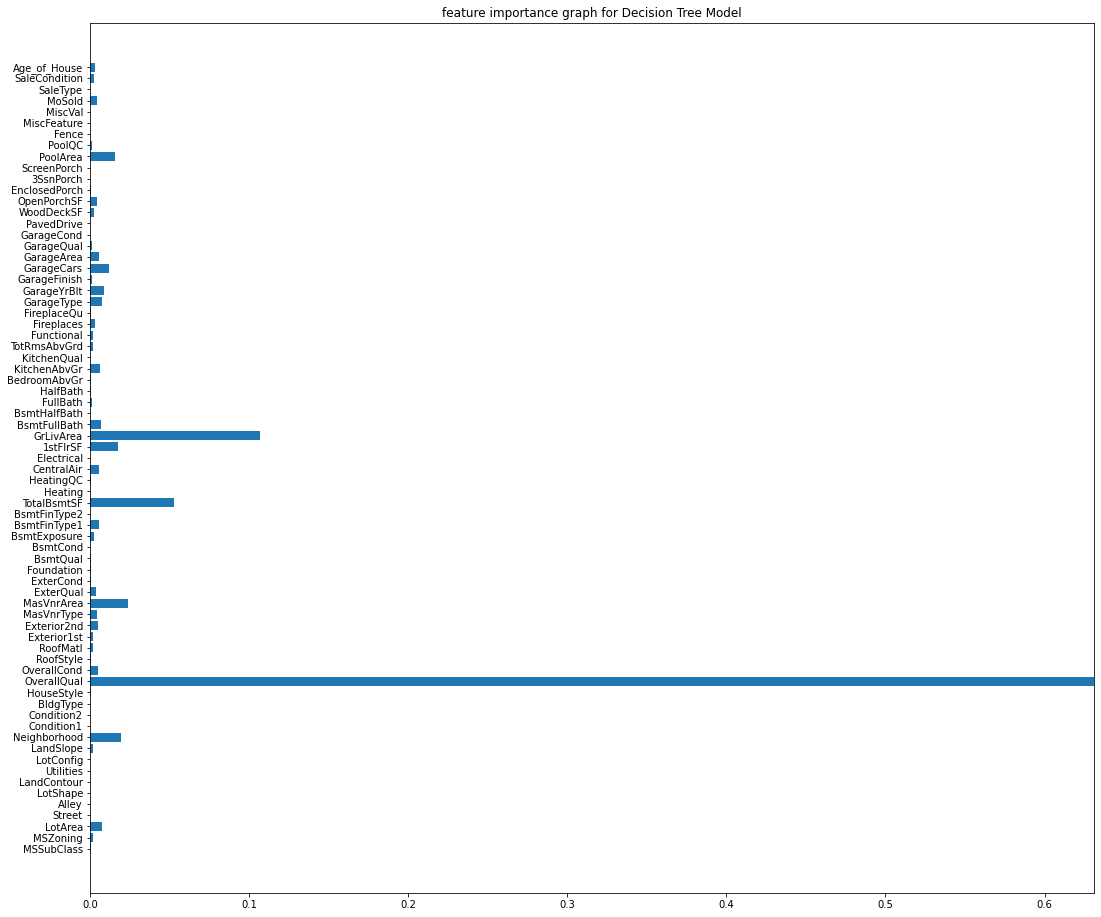

In [75]:
plot_feature_imp(dt_model.feature_importances_,X_train.columns,'Decision Tree Model')

##### observations

1. Model is overfitting, train score is 1.0 while test score is 0.66.

##### Random Forest Regressor

In [76]:
from sklearn.ensemble import RandomForestRegressor
rf_reg= RandomForestRegressor(random_state=1)
rf_reg.fit(X_train,y_train)
ytest_pred= rf_reg.predict(X_test)
ytrain_pred= rf_reg.predict(X_train)
rfreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
rfreg_test_metrics=model_score(y_test,ytest_pred,'test')


train log_mse: 0.0040742918842295705
train mae: 6863.054383141762
train r2: 0.9786388512127483
train log rmse: 0.06383018004227757
----------------------------------
test log_mse: 0.011809439518191866
test mae: 13168.812260273971
test r2: 0.8982456003941637
test log rmse: 0.10867124513040174


#### observations

1. Little overfitting compared to decision tree 

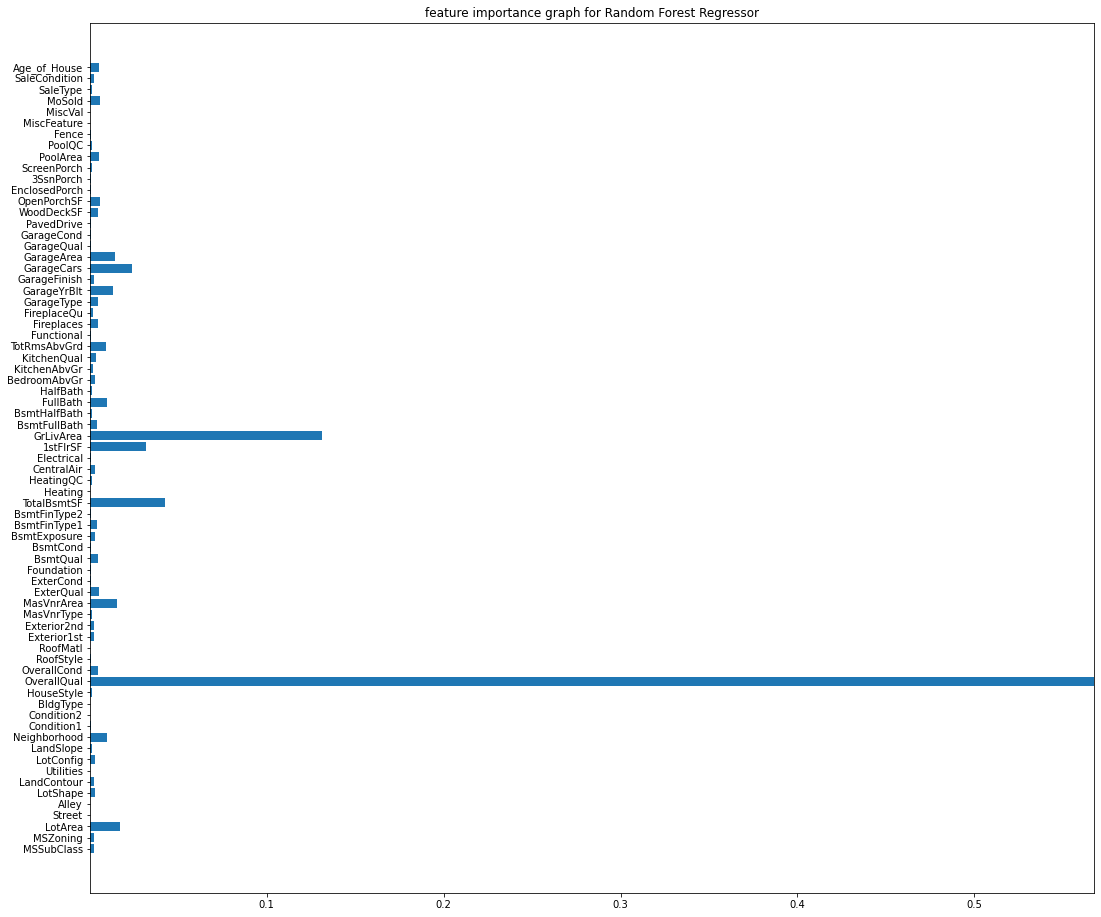

In [77]:
plot_feature_imp(rf_reg.feature_importances_,X_train.columns,'Random Forest Regressor')

#### Adaboost Regressor

In [78]:
from sklearn.ensemble import AdaBoostRegressor
adaboost_reg= AdaBoostRegressor(random_state=0)
adaboost_reg.fit(X_train,y_train)
ytest_pred= adaboost_reg.predict(X_test)
ytrain_pred= adaboost_reg.predict(X_train)
adaboostreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
adaboostreg_test_metrics=model_score(y_test,ytest_pred,'test')


train log_mse: 0.034643747605782656
train mae: 22292.904017188586
train r2: 0.8775727388653605
train log rmse: 0.18612830952271248
----------------------------------
test log_mse: 0.030865395963692897
test mae: 21427.400794284575
test r2: 0.8030517703037547
test log rmse: 0.17568550299809285


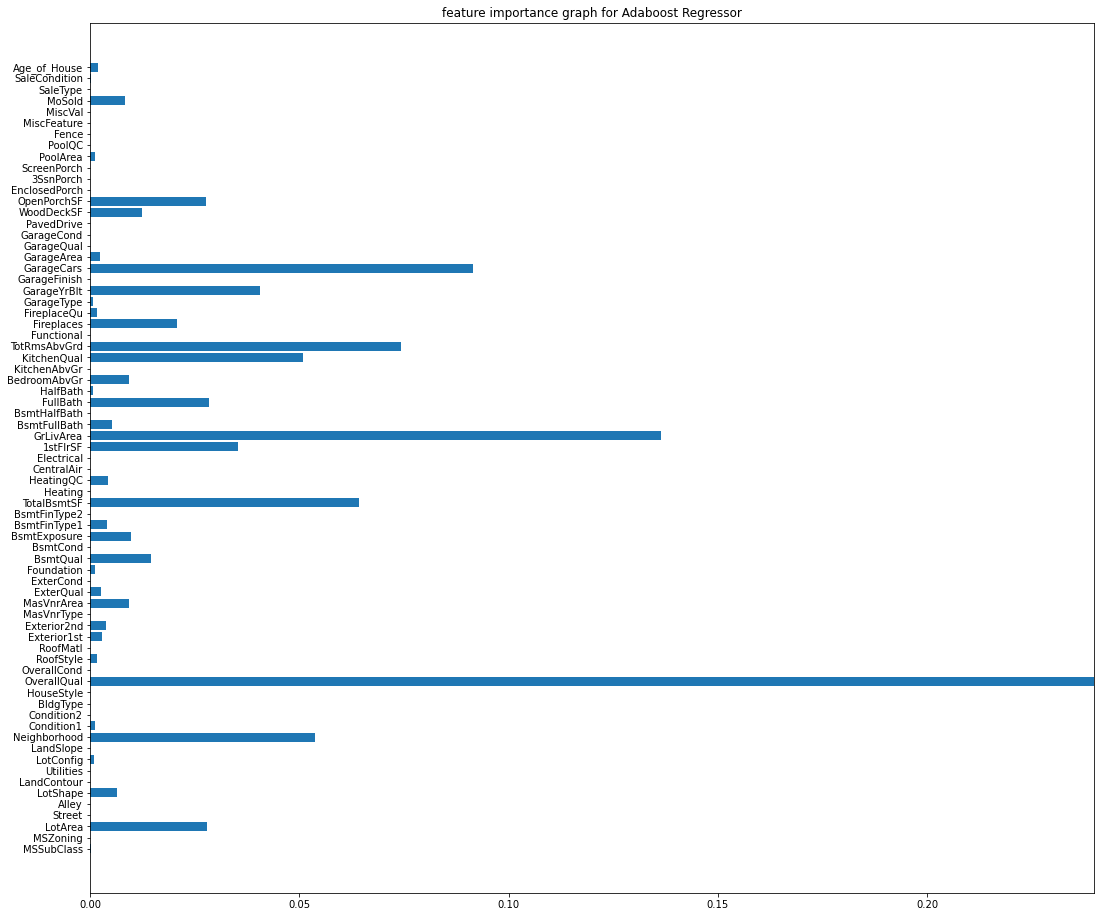

In [79]:
plot_feature_imp(adaboost_reg.feature_importances_,X_train.columns,'Adaboost Regressor')

##### Observations

1. Model seems to better than above, but has some overfitting too.need to see via tuning hyperparameters

#### GB Regressor

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg= GradientBoostingRegressor(random_state=0)
gb_reg.fit(X_train,y_train)
ytest_pred= gb_reg.predict(X_test)
ytrain_pred= gb_reg.predict(X_train)
gbreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
gbreg_test_metrics=model_score(y_test,ytest_pred,'test')


train log_mse: 0.008757741347418104
train mae: 11290.618615627756
train r2: 0.9642773141437101
train log rmse: 0.09358280476357879
----------------------------------
test log_mse: 0.012065517381703007
test mae: 13511.27540143547
test r2: 0.8936261645716675
test log rmse: 0.10984314899757293


##### observations

1. Model seems to little overfitting, need to figure out via hyperparameter tuning

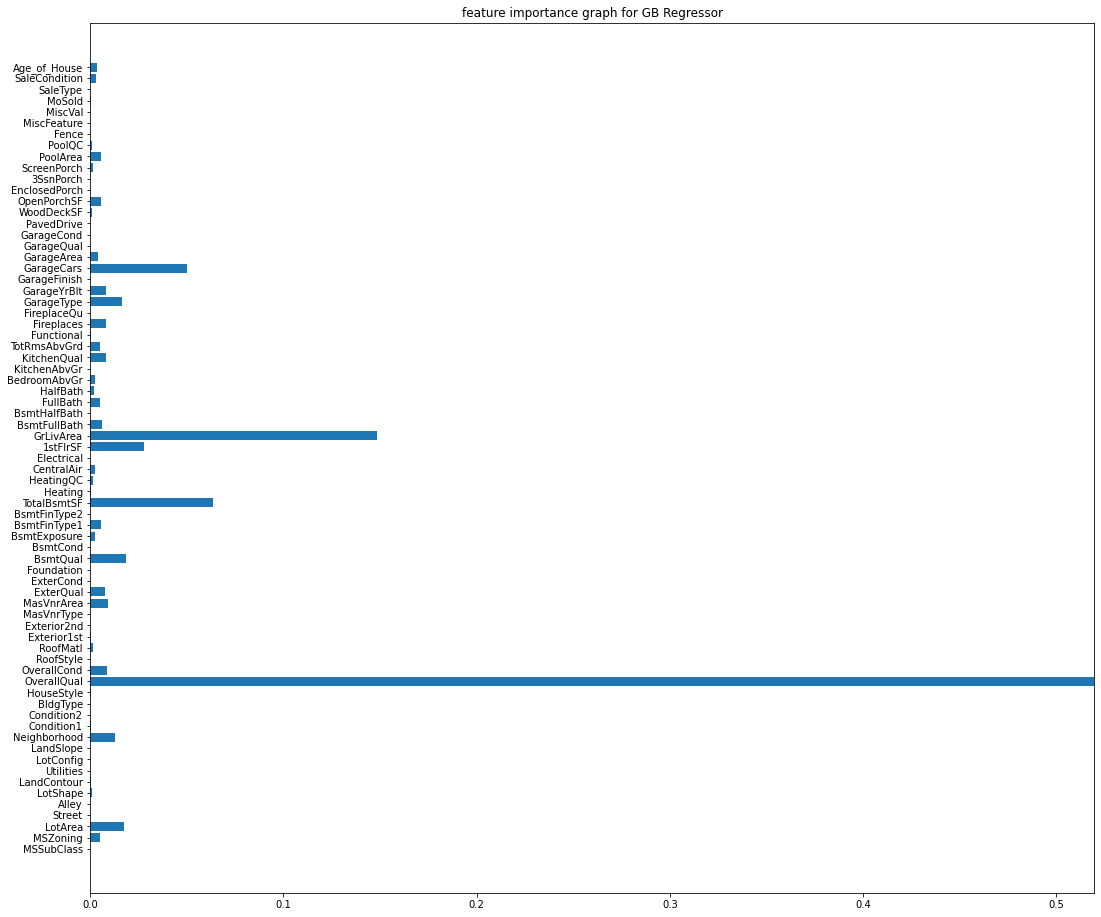

In [81]:
plot_feature_imp(gb_reg.feature_importances_,X_train.columns,'GB Regressor')

#### XGB Regressor

In [82]:
from xgboost import XGBRegressor
xgb_reg= XGBRegressor(random_state=1)
xgb_reg.fit(X_train,y_train)
ytest_pred= xgb_reg.predict(X_test)
ytrain_pred= xgb_reg.predict(X_train)
xgbreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
xgbreg_test_metrics=model_score(y_test,ytest_pred,'test')


train log_mse: 7.88062310328381e-05
train mae: 913.3558399185823
train r2: 0.9997376230082866
train log rmse: 0.008877287369058079
----------------------------------
test log_mse: 0.016157442970802505
test mae: 14878.373100385274
test r2: 0.890108157064074
test log rmse: 0.1271119308751248


#### Observations

1. Model seems to be overfitting a little

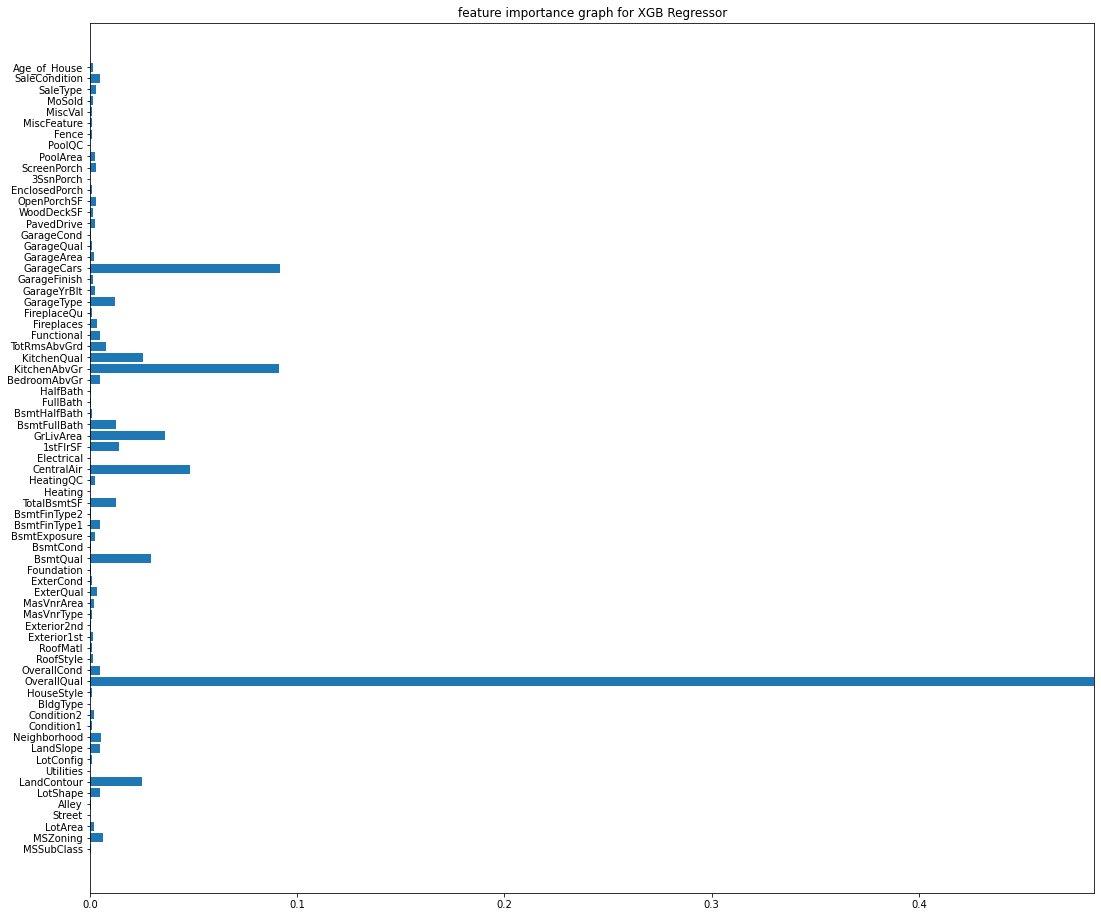

In [83]:
plot_feature_imp(xgb_reg.feature_importances_,X_train.columns,'XGB Regressor')

In [84]:
#### comparing metrics
def compare_metrics(models,metrics):
    compare_df= pd.DataFrame({'Metrics':['R2 Score','Log RMSE','MAE']})
    for i in range(len(models)):
        compare_df[models[i]]= metrics[i]
    return compare_df

In [85]:
models=['Decision Tree','RandomForest','Adaboost','GB Regressor','XGB Regressor']
train_metrics=[dtreg_train_metrics,rfreg_train_metrics,adaboostreg_train_metrics,gbreg_train_metrics,xgbreg_train_metrics]
test_metrics=[dtreg_test_metrics,rfreg_test_metrics,adaboostreg_test_metrics,gbreg_test_metrics,xgbreg_test_metrics]
train_comparedf= compare_metrics(models,train_metrics)
test_comparedf= compare_metrics(models,test_metrics)

In [86]:
train_comparedf

Metrics  Decision Tree  RandomForest      Adaboost  GB Regressor  \
0  R2 Score            1.0      0.978639      0.877573      0.964277   
1  Log RMSE            0.0      0.063830      0.186128      0.093583   
2       MAE            0.0   6863.054383  22292.904017  11290.618616   

   XGB Regressor  
0       0.999738  
1       0.008877  
2     913.355840

In [87]:
test_comparedf

Metrics  Decision Tree  RandomForest      Adaboost  GB Regressor  \
0  R2 Score       0.661857      0.898246      0.803052      0.893626   
1  Log RMSE       0.171314      0.108671      0.175686      0.109843   
2       MAE   22975.143836  13168.812260  21427.400794  13511.275401   

   XGB Regressor  
0       0.890108  
1       0.127112  
2   14878.373100

##### Randomized Search CV -----

In [88]:
### FUNCTION to create the randomized hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
def random_hyperparameter_tuning(base_model,params,X_train,y_train):
    random_model= RandomizedSearchCV(estimator=base_model,param_distributions=params,n_iter=10,scoring='neg_mean_squared_log_error',cv=5,random_state=0,error_score=0,return_train_score=True,verbose=10)
    random_model.fit(X_train,y_train)
    print()
    print(f'The best model params: {random_model.best_params_}')
    print(f'The best model score is: {random_model.best_score_}')
    return random_model

In [89]:
### tuning for decision tree
params={'max_depth':[i for i in range(3,15,3)],'min_samples_split':[i for i in range(10,100,20)],'min_samples_leaf':[i for i in range(10,50,10)]}
dt_reg_randommodel= random_hyperparameter_tuning(dt_model,params,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=9, min_samples_leaf=30, min_samples_split=10.....
[CV 1/5; 1/10] END max_depth=9, min_samples_leaf=30, min_samples_split=10;, score=(train=-0.032, test=-0.034) total time=   0.0s
[CV 2/5; 1/10] START max_depth=9, min_samples_leaf=30, min_samples_split=10.....
[CV 2/5; 1/10] END max_depth=9, min_samples_leaf=30, min_samples_split=10;, score=(train=-0.030, test=-0.039) total time=   0.0s
[CV 3/5; 1/10] START max_depth=9, min_samples_leaf=30, min_samples_split=10.....
[CV 3/5; 1/10] END max_depth=9, min_samples_leaf=30, min_samples_split=10;, score=(train=-0.031, test=-0.046) total time=   0.0s
[CV 4/5; 1/10] START max_depth=9, min_samples_leaf=30, min_samples_split=10.....
[CV 4/5; 1/10] END max_depth=9, min_samples_leaf=30, min_samples_split=10;, score=(train=-0.032, test=-0.040) total time=   0.0s
[CV 5/5; 1/10] START max_depth=9, min_samples_leaf=30, min_samples_split=10.....
[CV 5/5; 1/10] END

In [90]:
#### tuning the random forest regressor
params={'n_estimators':[i for i in range(50,600,100)],'max_depth':[i for i in range(3,15,3)],'min_samples_split':[i for i in range(10,100,20)],'min_samples_leaf':[i for i in range(10,50,10)]}
rf_reg_randommodel= random_hyperparameter_tuning(rf_reg,params,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350
[CV 1/5; 1/10] END max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350;, score=(train=-0.044, test=-0.036) total time=   1.3s
[CV 2/5; 1/10] START max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350
[CV 2/5; 1/10] END max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350;, score=(train=-0.042, test=-0.057) total time=   1.3s
[CV 3/5; 1/10] START max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350
[CV 3/5; 1/10] END max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350;, score=(train=-0.041, test=-0.050) total time=   1.2s
[CV 4/5; 1/10] START max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350
[CV 4/5; 1/10] END max_depth=3, min_samples_leaf=10, min_samples_split=50, n_estimators=350;, score=(train=-0.042, test=-0

In [91]:
#### tuning adaboost_reg
params= {'n_estimators':[i for i in range(50,550,50)],'base_estimator':[DecisionTreeRegressor(max_depth=i) for i in range(3,15,3)],'learning_rate':[0.2,0.4,0.6,0.8,0.9]}
adaboost_reg_randommodel= random_hyperparameter_tuning(adaboost_reg,params,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.4, n_estimators=450
[CV 1/5; 1/10] END base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.4, n_estimators=450;, score=(train=-0.038, test=-0.031) total time=   1.8s
[CV 2/5; 1/10] START base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.4, n_estimators=450
[CV 2/5; 1/10] END base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.4, n_estimators=450;, score=(train=-0.035, test=-0.052) total time=   1.8s
[CV 3/5; 1/10] START base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.4, n_estimators=450
[CV 3/5; 1/10] END base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.4, n_estimators=450;, score=(train=-0.035, test=-0.050) total time=   0.7s
[CV 4/5; 1/10] START base_estimator=DecisionTreeRegressor(max_depth=3), learning_rate=0.4, n_estimators=450
[CV 4/5; 1/10] END base_

In [92]:
#### tuning the GB model,
params ={'n_estimators':[i for i in range(50,550,50)],'learning_rate':[0.1,0.3,0.5,0.7,0.9,1.0],'min_samples_split':[i for i in range(10,100,20)],'min_samples_leaf':[i for i in range(10,100,15)],'max_depth':[i for i in range(3,18,3)]}
gb_reg_randommodel=random_hyperparameter_tuning(gb_reg,params,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.3, max_depth=15, min_samples_leaf=10, min_samples_split=70, n_estimators=150
[CV 1/5; 1/10] END learning_rate=0.3, max_depth=15, min_samples_leaf=10, min_samples_split=70, n_estimators=150;, score=(train=-0.000, test=-0.023) total time=   2.3s
[CV 2/5; 1/10] START learning_rate=0.3, max_depth=15, min_samples_leaf=10, min_samples_split=70, n_estimators=150
[CV 2/5; 1/10] END learning_rate=0.3, max_depth=15, min_samples_leaf=10, min_samples_split=70, n_estimators=150;, score=(train=-0.000, test=-0.023) total time=   2.4s
[CV 3/5; 1/10] START learning_rate=0.3, max_depth=15, min_samples_leaf=10, min_samples_split=70, n_estimators=150
[CV 3/5; 1/10] END learning_rate=0.3, max_depth=15, min_samples_leaf=10, min_samples_split=70, n_estimators=150;, score=(train=-0.000, test=-0.027) total time=   2.4s
[CV 4/5; 1/10] START learning_rate=0.3, max_depth=15, min_samples_leaf=10, min_samples_split=70,

In [93]:
#### xgb regressor
params={'eta':[0.3,0.5,0.6,0.9],'gamma':[i for i in range(5,20)],'max_depth':[i for i in range(3,20,2)]}
xgb_reg_randommodel= random_hyperparameter_tuning(xgb_reg,params,X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START eta=0.3, gamma=12, max_depth=19............................
[CV 1/5; 1/10] END eta=0.3, gamma=12, max_depth=19;, score=(train=-0.000, test=-0.022) total time=   1.4s
[CV 2/5; 1/10] START eta=0.3, gamma=12, max_depth=19............................
[CV 2/5; 1/10] END eta=0.3, gamma=12, max_depth=19;, score=(train=-0.000, test=-0.022) total time=   1.3s
[CV 3/5; 1/10] START eta=0.3, gamma=12, max_depth=19............................
[CV 3/5; 1/10] END eta=0.3, gamma=12, max_depth=19;, score=(train=-0.000, test=-0.032) total time=   1.4s
[CV 4/5; 1/10] START eta=0.3, gamma=12, max_depth=19............................
[CV 4/5; 1/10] END eta=0.3, gamma=12, max_depth=19;, score=(train=-0.000, test=-0.020) total time=   1.3s
[CV 5/5; 1/10] START eta=0.3, gamma=12, max_depth=19............................
[CV 5/5; 1/10] END eta=0.3, gamma=12, max_depth=19;, score=(train=-0.000, test=-0.020) total time=   1.3s
[CV 

In [94]:
#### TRYING with updated models
#Decision Tree
dt_model= DecisionTreeRegressor(**dt_reg_randommodel.best_params_,random_state=0)
dt_model.fit(X_train,y_train)
ytest_pred= dt_model.predict(X_test)
ytrain_pred= dt_model.predict(X_train)
dtreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
dtreg_test_metrics=model_score(y_test,ytest_pred,'test')

train log_mse: 0.02500177007768628
train mae: 20238.460274285673
train r2: 0.8356621992488354
train log rmse: 0.15811948038646687
----------------------------------
test log_mse: 0.024066927633659325
test mae: 19619.384987234105
test r2: 0.795350476672757
test log rmse: 0.15513519147395063


In [95]:
#Random forest regressor
rf_reg= RandomForestRegressor(**rf_reg_randommodel.best_params_,random_state=1)
rf_reg.fit(X_train,y_train)
ytest_pred= rf_reg.predict(X_test)
ytrain_pred= rf_reg.predict(X_train)
rfreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
rfreg_test_metrics=model_score(y_test,ytest_pred,'test')

train log_mse: 0.02010836080211527
train mae: 16762.473940446034
train r2: 0.8802370985653186
train log rmse: 0.1418039519975211
----------------------------------
test log_mse: 0.015119265721044295
test mae: 15231.706412971715
test r2: 0.885878408840577
test log rmse: 0.12296042339323777


In [96]:
### adaboost regressor

adaboost_reg= AdaBoostRegressor(**adaboost_reg_randommodel.best_params_,random_state=0)
adaboost_reg.fit(X_train,y_train)
ytest_pred= adaboost_reg.predict(X_test)
ytrain_pred= adaboost_reg.predict(X_train)
adaboostreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
adaboostreg_test_metrics=model_score(y_test,ytest_pred,'test')

train log_mse: 0.00022919783786326753
train mae: 1024.2532196456216
train r2: 0.9992904417100713
train log rmse: 0.015139281286219221
----------------------------------
test log_mse: 0.010845288808669445
test mae: 12388.892223718776
test r2: 0.9140142862230719
test log rmse: 0.1041407163825439


In [97]:
# gb regressor
gb_reg= GradientBoostingRegressor(**gb_reg_randommodel.best_params_,random_state=0)
gb_reg.fit(X_train,y_train)
ytest_pred= gb_reg.predict(X_test)
ytrain_pred= gb_reg.predict(X_train)
gbreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
gbreg_test_metrics=model_score(y_test,ytest_pred,'test')

train log_mse: 0.003664520890497295
train mae: 6352.59511645497
train r2: 0.9823344718050323
train log rmse: 0.06053528632539285
----------------------------------
test log_mse: 0.013141410833449402
test mae: 14147.909445689673
test r2: 0.8790500110315422
test log rmse: 0.11463599274856655


In [98]:
### XGB Regressor
xgb_reg= XGBRegressor(**xgb_reg_randommodel.best_params_,random_state=1)
xgb_reg.fit(X_train,y_train)
ytest_pred= xgb_reg.predict(X_test)
ytrain_pred= xgb_reg.predict(X_train)
xgbreg_train_metrics=model_score(y_train,ytrain_pred,'train')
print('----------------------------------')
xgbreg_test_metrics=model_score(y_test,ytest_pred,'test')

train log_mse: 0.0016831270662545736
train mae: 4519.322594887452
train r2: 0.9944901282084119
train log rmse: 0.04102593163176887
----------------------------------
test log_mse: 0.021672900040254742
test mae: 19244.24039490582
test r2: 0.7694972013785615
test log rmse: 0.1472171866334048


In [99]:
models=['Decision Tree','RandomForest','Adaboost','GB Regressor','XGB Regressor']
train_metrics=[dtreg_train_metrics,rfreg_train_metrics,adaboostreg_train_metrics,gbreg_train_metrics,xgbreg_train_metrics]
test_metrics=[dtreg_test_metrics,rfreg_test_metrics,adaboostreg_test_metrics,gbreg_test_metrics,xgbreg_test_metrics]
train_comparedf= compare_metrics(models,train_metrics)
test_comparedf= compare_metrics(models,test_metrics)

In [100]:
train_comparedf

Metrics  Decision Tree  RandomForest     Adaboost  GB Regressor  \
0  R2 Score       0.835662      0.880237     0.999290      0.982334   
1  Log RMSE       0.158119      0.141804     0.015139      0.060535   
2       MAE   20238.460274  16762.473940  1024.253220   6352.595116   

   XGB Regressor  
0       0.994490  
1       0.041026  
2    4519.322595

In [101]:
test_comparedf

Metrics  Decision Tree  RandomForest      Adaboost  GB Regressor  \
0  R2 Score       0.795350      0.885878      0.914014      0.879050   
1  Log RMSE       0.155135      0.122960      0.104141      0.114636   
2       MAE   19619.384987  15231.706413  12388.892224  14147.909446   

   XGB Regressor  
0       0.769497  
1       0.147217  
2   19244.240395

#### from this observations, Random forest regressor is better

1. R2 is balanced and is a good value (0.88)

2. RMSE , MAE are both balanced.

3. Next comes Decision Tree , adaboost and gb regressor 

In [102]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [103]:
test_df.isnull().sum()[test_df.isnull().sum()!=0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [104]:
test_df.drop('LotFrontage',axis=1,inplace=True)
test_df['Alley'].fillna('No Alley Access',inplace=True)
for c in ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']:
    test_df[c].fillna('No Basement',inplace=True)
    

test_df['FireplaceQu'].fillna('No fireplace',inplace=True)
for c1 in ['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond']:
    test_df[c1].fillna('No Garage',inplace=True)
    

test_df['PoolQC'].fillna('No Pool',inplace=True)
test_df['Fence'].fillna('No Fence',inplace=True)
test_df['MiscFeature'].fillna('No Misc Feature',inplace=True)

In [105]:
test_df.isnull().sum()[test_df.isnull().sum()!=0]

MSZoning         4
Utilities        2
Exterior1st      1
Exterior2nd      1
MasVnrType      16
MasVnrArea      15
BsmtFinSF1       1
BsmtFinSF2       1
BsmtUnfSF        1
TotalBsmtSF      1
BsmtFullBath     2
BsmtHalfBath     2
KitchenQual      1
Functional       2
GarageCars       1
GarageArea       1
SaleType         1
dtype: int64

In [106]:
test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0],inplace=True)
test_df['Utilities'].fillna(test_df['Utilities'].mode()[0],inplace=True)
test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0],inplace=True)
test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0],inplace=True)
test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0],inplace=True)
test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mean(),inplace=True)
test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean(),inplace=True)
test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean(),inplace=True)
test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean(),inplace=True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean(),inplace=True)
test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0],inplace=True)
test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0],inplace=True)
test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0],inplace=True)
test_df['Functional'].fillna(test_df['Functional'].mode()[0],inplace=True)
test_df['GarageCars'].fillna(test_df['GarageCars'].mode()[0],inplace=True)
test_df['GarageArea'].fillna(test_df['GarageArea'].mean(),inplace=True)
test_df['SaleType'].fillna(test_df['SaleType'].mode()[0],inplace=True)

In [107]:
for c in ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd']:
    test_df[c]= test_df[c].astype(object)

test_df['Age_of_House'] = np.where(test_df['YearBuilt']==test_df['YearRemodAdd'],(test_df['YrSold']-test_df['YearBuilt']),((test_df['YrSold']-test_df['YearBuilt'])-(test_df['YrSold']-test_df['YearRemodAdd'])))
test_df.drop(['YearBuilt','YearRemodAdd','YrSold'],axis=1,inplace=True)

test_df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','2ndFlrSF', 'LowQualFinSF'],axis=1,inplace=True)
for i in ['MSSubClass','OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','TotRmsAbvGrd']:
    test_df[i]= test_df[i].astype('int64')

In [108]:
for col in temp1.columns:
    test_df[col]= le_encoder_dict[col].transform(test_df[col])
test_df

Id  MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  \
0     1461          20         2    11622       1      1         3   
1     1462          20         3    14267       1      1         0   
2     1463          60         3    13830       1      1         0   
3     1464          60         3     9978       1      1         0   
4     1465         120         3     5005       1      1         0   
...    ...         ...       ...      ...     ...    ...       ...   
1454  2915         160         4     1936       1      1         3   
1455  2916         160         4     1894       1      1         3   
1456  2917          20         3    20000       1      1         3   
1457  2918          85         3    10441       1      1         3   
1458  2919          60         3     9627       1      1         3   

      LandContour  Utilities  LotConfig  ...  ScreenPorch  PoolArea  PoolQC  \
0               3          0          4  ...          120         0       3   
1               3          0          0  ...            0         0       3   
2               3          0          4  ...            0         0       3   
3               3          0          4  ...            0         0       3   
4               1          0          4  ...          144         0       3   
...           ...        ...        ...  ...          ...       ...     ...   
1454            3          0          4  ...            0         0       3   
1455            3          0          4  ...            0         0       3   
1456            3          0          4  ...            0         0       3   
1457            3          0          4  ...            0         0       3   
1458            3          0          4  ...            0         0       3   

      Fence  MiscFeature  MiscVal  MoSold  SaleType  SaleCondition  \
0         2            1        0       6         8              4   
1         4            0    12500       6         8              4   
2         2            1        0       3         8              4   
3         4            1        0       6         8              4   
4         4            1        0       1         8              4   
...     ...          ...      ...     ...       ...            ...   
1454      4            1        0       6         8              4   
1455      4            1        0       4         8              0   
1456      4            1        0       9         8              0   
1457      2            3      700       7         8              4   
1458      4            1        0      11         8              4   

      Age_of_House  
0               49  
1               52  
2                1  
3               12  
4               18  
...            ...  
1454            36  
1455            36  
1456            36  
1457            14  
1458             1  

[1459 rows x 72 columns]

In [109]:
test_df['GarageYrBlt']= test_df['GarageYrBlt'].apply(convert_year_numeric)

In [110]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   int64  
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   int64  
 5   Alley          1459 non-null   int64  
 6   LotShape       1459 non-null   int64  
 7   LandContour    1459 non-null   int64  
 8   Utilities      1459 non-null   int64  
 9   LotConfig      1459 non-null   int64  
 10  LandSlope      1459 non-null   int64  
 11  Neighborhood   1459 non-null   int64  
 12  Condition1     1459 non-null   int64  
 13  Condition2     1459 non-null   int64  
 14  BldgType       1459 non-null   int64  
 15  HouseStyle     1459 non-null   int64  
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  RoofStyl

In [111]:
X_train.shape

(1305, 71)

In [112]:
ids= test_df['Id']

In [113]:
test_df.drop('Id',axis=1,inplace=True)

In [114]:
y_pred_final=rf_reg.predict(test_df)

In [115]:
final_df= pd.DataFrame({'Id':ids,'SalePrice':y_pred_final})
final_df

Id      SalePrice
0     1461  122465.833843
1     1462  149042.418822
2     1463  170153.054690
3     1464  179656.499442
4     1465  209509.441964
...    ...            ...
1454  2915   89420.058463
1455  2916   99123.699394
1456  2917  146464.366102
1457  2918  115411.094546
1458  2919  233364.909499

[1459 rows x 2 columns]

In [116]:
final_df.to_csv('sample_submission.csv',index=False)